In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('train.csv')
df

state  account_length      area_code international_plan voice_mail_plan  \
0       OH             107  area_code_415                 no             yes   
1       NJ             137  area_code_415                 no              no   
2       OH              84  area_code_408                yes              no   
3       OK              75  area_code_415                yes              no   
4       MA             121  area_code_510                 no             yes   
...    ...             ...            ...                ...             ...   
4245    MT              83  area_code_415                 no              no   
4246    WV              73  area_code_408                 no              no   
4247    NC              75  area_code_408                 no              no   
4248    HI              50  area_code_408                 no             yes   
4249    VT              86  area_code_415                 no             yes   

      number_vmail_messages  total_day_minutes  total_day_calls  \
0                        26              161.6              123   
1                         0              243.4              114   
2                         0              299.4               71   
3                         0              166.7              113   
4                        24              218.2               88   
...                     ...                ...              ...   
4245                      0              188.3               70   
4246                      0              177.9               89   
4247                      0              170.7              101   
4248                     40              235.7              127   
4249                     34              129.4              102   

      total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  \
0                27.47              195.5              103             16.62   
1                41.38              121.2              110             10.30   
2                50.90               61.9               88              5.26   
3                28.34              148.3              122             12.61   
4                37.09              348.5              108             29.62   
...                ...                ...              ...               ...   
4245             32.01              243.8               88             20.72   
4246             30.24              131.2               82             11.15   
4247             29.02              193.1              126             16.41   
4248             40.07              223.0              126             18.96   
4249             22.00              267.1              104             22.70   

      total_night_minutes  total_night_calls  total_night_charge  \
0                   254.4                103               11.45   
1                   162.6                104                7.32   
2                   196.9                 89                8.86   
3                   186.9                121                8.41   
4                   212.6                118                9.57   
...                   ...                ...                 ...   
4245                213.7                 79                9.62   
4246                186.2                 89                8.38   
4247                129.1                104                5.81   
4248                297.5                116               13.39   
4249                154.8                100                6.97   

      total_intl_minutes  total_intl_calls  total_intl_charge  \
0                   13.7                 3               3.70   
1                   12.2                 5               3.29   
2                    6.6                 7               1.78   
3                   10.1                 3               2.73   
4                    7.5                 7               2.03   
...                  ...               ...                ...   
4245  

In [3]:
df.columns

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn'],
      dtype='object')

In [4]:
df.isna().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

In [5]:
df[['international_plan','voice_mail_plan','churn']].apply(pd.Series.value_counts)

international_plan  voice_mail_plan  churn
no                 3854             3138   3652
yes                 396             1112    598

In [6]:
# Create dataset onehot
df_dummy = pd.get_dummies(df,drop_first=True)

x = df_dummy.drop(['churn_yes'], axis = 1)
y = df_dummy['churn_yes']

x_train, x_test, y_train, y_test = train_test_split(x, y , test_size = 0.2, random_state=42, stratify = y)

In [7]:
model_xgb =  xgb.XGBClassifier(objective='binary:logistic',seed = 42, early_stopping_rounds=10)
model_xgb.fit (x_train, y_train,
              verbose = True,
              eval_metric = 'aucpr',
              eval_set = [(x_test, y_test)])

[0]	validation_0-aucpr:0.78823
[1]	validation_0-aucpr:0.82263
[2]	validation_0-aucpr:0.81561
[3]	validation_0-aucpr:0.81619
[4]	validation_0-aucpr:0.82432
[5]	validation_0-aucpr:0.83197
[6]	validation_0-aucpr:0.83632
[7]	validation_0-aucpr:0.83460
[8]	validation_0-aucpr:0.83856
[9]	validation_0-aucpr:0.84438
[10]	validation_0-aucpr:0.84542
[11]	validation_0-aucpr:0.84624
[12]	validation_0-aucpr:0.84743
[13]	validation_0-aucpr:0.84631
[14]	validation_0-aucpr:0.84591


C:\Users\vy\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-aucpr:0.84620
[16]	validation_0-aucpr:0.84701
[17]	validation_0-aucpr:0.84756
[18]	validation_0-aucpr:0.84774
[19]	validation_0-aucpr:0.84675
[20]	validation_0-aucpr:0.84665
[21]	validation_0-aucpr:0.84595
[22]	validation_0-aucpr:0.84821
[23]	validation_0-aucpr:0.84868
[24]	validation_0-aucpr:0.84998
[25]	validation_0-aucpr:0.84975
[26]	validation_0-aucpr:0.85032
[27]	validation_0-aucpr:0.85045
[28]	validation_0-aucpr:0.85042
[29]	validation_0-aucpr:0.84968
[30]	validation_0-aucpr:0.85065
[31]	validation_0-aucpr:0.84902
[32]	validation_0-aucpr:0.84953
[33]	validation_0-aucpr:0.84825
[34]	validation_0-aucpr:0.84813
[35]	validation_0-aucpr:0.84825
[36]	validation_0-aucpr:0.84769
[37]	validation_0-aucpr:0.84784
[38]	validation_0-aucpr:0.84750
[39]	validation_0-aucpr:0.84836


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

C:\Users\vy\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


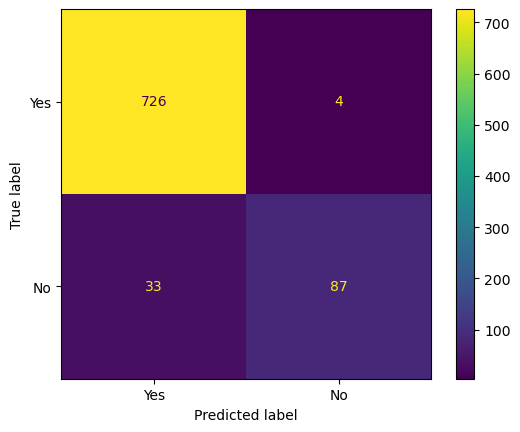

In [8]:
plot_confusion_matrix(model_xgb, x_test, y_test, values_format='d', display_labels=['Yes','No'])

In [9]:
from sklearn.metrics import classification_report

#Performance evaluation
def print_scores(y_true, y_pred):
  print(classification_report(y_true, y_pred))

#predict
y_pred = model_xgb.predict(x_test)

print_scores(y_test,y_pred)

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       730
           1       0.96      0.72      0.82       120

    accuracy                           0.96       850
   macro avg       0.96      0.86      0.90       850
weighted avg       0.96      0.96      0.95       850



# Cross validation with Gridsearch CV

In [10]:
from sklearn.model_selection import GridSearchCV


In [18]:
# defin list of parameters
param_grid = {'learning_rate': [0.1, 0.01, 0.05],
         'max_depth': [3, 4, 5],
         'gamma': [0, 0.25, 1],
         'reg_lambda': [0, 1, 10],
         'scale_pos_weight': [1, 3, 5]}

grid_search = GridSearchCV(model_xgb, 
                           param_grid,
                           scoring = 'accuracy',
                           verbose = True,
                           cv=5)
grid_search.fit(x_train,y_train, eval_set = [(x_test, y_test)])


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
[0]	validation_0-logloss:0.62643
[1]	validation_0-logloss:0.57192
[2]	validation_0-logloss:0.52508
[3]	validation_0-logloss:0.48589
[4]	validation_0-logloss:0.45365
[5]	validation_0-logloss:0.42390
[6]	validation_0-logloss:0.39789
[7]	validation_0-logloss:0.37639
[8]	validation_0-logloss:0.35728
[9]	validation_0-logloss:0.34203
[10]	validation_0-logloss:0.32717
[11]	validation_0-logloss:0.31493
[12]	validation_0-logloss:0.30413
[13]	validation_0-logloss:0.29502
[14]	validation_0-logloss:0.28654
[15]	validation_0-logloss:0.27843
[16]	validation_0-logloss:0.27287
[17]	validation_0-logloss:0.26724
[18]	validation_0-logloss:0.26190
[19]	validation_0-logloss:0.25136
[20]	validation_0-logloss:0.24314
[21]	validation_0-logloss:0.24033
[22]	validation_0-logloss:0.23437
[23]	validation_0-logloss:0.23161
[24]	validation_0-logloss:0.22700
[25]	validation_0-logloss:0.22351
[26]	validation_0-logloss:0.21859
[27]	validation_0-logloss:0.

[44]	validation_0-logloss:0.19646
[45]	validation_0-logloss:0.19581
[46]	validation_0-logloss:0.19525
[47]	validation_0-logloss:0.19493
[48]	validation_0-logloss:0.19490
[49]	validation_0-logloss:0.19430
[50]	validation_0-logloss:0.19411
[51]	validation_0-logloss:0.19359
[52]	validation_0-logloss:0.19346
[53]	validation_0-logloss:0.19278
[54]	validation_0-logloss:0.19258
[55]	validation_0-logloss:0.19248
[56]	validation_0-logloss:0.19158
[57]	validation_0-logloss:0.19172
[58]	validation_0-logloss:0.19165
[59]	validation_0-logloss:0.19167
[60]	validation_0-logloss:0.19152
[61]	validation_0-logloss:0.19126
[62]	validation_0-logloss:0.19087
[63]	validation_0-logloss:0.19055
[64]	validation_0-logloss:0.19029
[65]	validation_0-logloss:0.19048
[66]	validation_0-logloss:0.18963
[67]	validation_0-logloss:0.18932
[68]	validation_0-logloss:0.18931
[69]	validation_0-logloss:0.18932
[70]	validation_0-logloss:0.18944
[71]	validation_0-logloss:0.18909
[72]	validation_0-logloss:0.18882
[73]	validatio

[95]	validation_0-logloss:0.18752
[96]	validation_0-logloss:0.18711
[97]	validation_0-logloss:0.18686
[98]	validation_0-logloss:0.18713
[99]	validation_0-logloss:0.18725
[0]	validation_0-logloss:0.63619
[1]	validation_0-logloss:0.58832
[2]	validation_0-logloss:0.54852
[3]	validation_0-logloss:0.51670
[4]	validation_0-logloss:0.48599
[5]	validation_0-logloss:0.45916
[6]	validation_0-logloss:0.43654
[7]	validation_0-logloss:0.41698
[8]	validation_0-logloss:0.39989
[9]	validation_0-logloss:0.38488
[10]	validation_0-logloss:0.37222
[11]	validation_0-logloss:0.36112
[12]	validation_0-logloss:0.34992
[13]	validation_0-logloss:0.34069
[14]	validation_0-logloss:0.33212
[15]	validation_0-logloss:0.32375
[16]	validation_0-logloss:0.31737
[17]	validation_0-logloss:0.31068
[18]	validation_0-logloss:0.30558
[19]	validation_0-logloss:0.29801
[20]	validation_0-logloss:0.29466
[21]	validation_0-logloss:0.28934
[22]	validation_0-logloss:0.28647
[23]	validation_0-logloss:0.28097
[24]	validation_0-loglos

[37]	validation_0-logloss:0.23774
[38]	validation_0-logloss:0.23521
[39]	validation_0-logloss:0.23465
[40]	validation_0-logloss:0.23382
[41]	validation_0-logloss:0.23380
[42]	validation_0-logloss:0.23323
[43]	validation_0-logloss:0.23271
[44]	validation_0-logloss:0.23278
[45]	validation_0-logloss:0.23210
[46]	validation_0-logloss:0.23100
[47]	validation_0-logloss:0.23029
[48]	validation_0-logloss:0.22941
[49]	validation_0-logloss:0.22885
[50]	validation_0-logloss:0.22903
[51]	validation_0-logloss:0.22919
[52]	validation_0-logloss:0.22865
[53]	validation_0-logloss:0.22859
[54]	validation_0-logloss:0.22834
[55]	validation_0-logloss:0.22818
[56]	validation_0-logloss:0.22821
[57]	validation_0-logloss:0.22764
[58]	validation_0-logloss:0.22751
[59]	validation_0-logloss:0.22784
[60]	validation_0-logloss:0.22754
[61]	validation_0-logloss:0.22742
[62]	validation_0-logloss:0.22691
[63]	validation_0-logloss:0.22679
[64]	validation_0-logloss:0.22600
[65]	validation_0-logloss:0.22658
[66]	validatio

[79]	validation_0-logloss:0.22390
[80]	validation_0-logloss:0.22347
[81]	validation_0-logloss:0.22282
[82]	validation_0-logloss:0.22285
[83]	validation_0-logloss:0.22278
[84]	validation_0-logloss:0.22256
[85]	validation_0-logloss:0.22204
[86]	validation_0-logloss:0.22177
[87]	validation_0-logloss:0.22202
[88]	validation_0-logloss:0.22113
[89]	validation_0-logloss:0.22102
[90]	validation_0-logloss:0.22127
[91]	validation_0-logloss:0.22060
[92]	validation_0-logloss:0.21994
[93]	validation_0-logloss:0.21973
[94]	validation_0-logloss:0.21939
[95]	validation_0-logloss:0.21948
[96]	validation_0-logloss:0.21952
[97]	validation_0-logloss:0.21765
[98]	validation_0-logloss:0.21811
[99]	validation_0-logloss:0.21786
[0]	validation_0-logloss:0.64363
[1]	validation_0-logloss:0.60371
[2]	validation_0-logloss:0.56775
[3]	validation_0-logloss:0.53867
[4]	validation_0-logloss:0.51066
[5]	validation_0-logloss:0.48666
[6]	validation_0-logloss:0.46700
[7]	validation_0-logloss:0.45214
[8]	validation_0-loglo

[21]	validation_0-logloss:0.34129
[22]	validation_0-logloss:0.33706
[23]	validation_0-logloss:0.33024
[24]	validation_0-logloss:0.32695
[25]	validation_0-logloss:0.32418
[26]	validation_0-logloss:0.31977
[27]	validation_0-logloss:0.31591
[28]	validation_0-logloss:0.31224
[29]	validation_0-logloss:0.30970
[30]	validation_0-logloss:0.30713
[31]	validation_0-logloss:0.30581
[32]	validation_0-logloss:0.30323
[33]	validation_0-logloss:0.30255
[34]	validation_0-logloss:0.30035
[35]	validation_0-logloss:0.29890
[36]	validation_0-logloss:0.29749
[37]	validation_0-logloss:0.29566
[38]	validation_0-logloss:0.29461
[39]	validation_0-logloss:0.29382
[40]	validation_0-logloss:0.29318
[41]	validation_0-logloss:0.29238
[42]	validation_0-logloss:0.29197
[43]	validation_0-logloss:0.28986
[44]	validation_0-logloss:0.28840
[45]	validation_0-logloss:0.28747
[46]	validation_0-logloss:0.28674
[47]	validation_0-logloss:0.28567
[48]	validation_0-logloss:0.28403
[49]	validation_0-logloss:0.28380
[50]	validatio

[63]	validation_0-logloss:0.26631
[64]	validation_0-logloss:0.26583
[65]	validation_0-logloss:0.26587
[66]	validation_0-logloss:0.26540
[67]	validation_0-logloss:0.26546
[68]	validation_0-logloss:0.26497
[69]	validation_0-logloss:0.26484
[70]	validation_0-logloss:0.26317
[71]	validation_0-logloss:0.26262
[72]	validation_0-logloss:0.26154
[73]	validation_0-logloss:0.26113
[74]	validation_0-logloss:0.25983
[75]	validation_0-logloss:0.25867
[76]	validation_0-logloss:0.25899
[77]	validation_0-logloss:0.25907
[78]	validation_0-logloss:0.25876
[79]	validation_0-logloss:0.25840
[80]	validation_0-logloss:0.25822
[81]	validation_0-logloss:0.25747
[82]	validation_0-logloss:0.25731
[83]	validation_0-logloss:0.25715
[84]	validation_0-logloss:0.25637
[85]	validation_0-logloss:0.25596
[86]	validation_0-logloss:0.25605
[87]	validation_0-logloss:0.25515
[88]	validation_0-logloss:0.25508
[89]	validation_0-logloss:0.25471
[90]	validation_0-logloss:0.25346
[91]	validation_0-logloss:0.25325
[92]	validatio

[5]	validation_0-logloss:0.42508
[6]	validation_0-logloss:0.39983
[7]	validation_0-logloss:0.37901
[8]	validation_0-logloss:0.36003
[9]	validation_0-logloss:0.34460
[10]	validation_0-logloss:0.33019
[11]	validation_0-logloss:0.31764
[12]	validation_0-logloss:0.30739
[13]	validation_0-logloss:0.29882
[14]	validation_0-logloss:0.28963
[15]	validation_0-logloss:0.28081
[16]	validation_0-logloss:0.27462
[17]	validation_0-logloss:0.26825
[18]	validation_0-logloss:0.26039
[19]	validation_0-logloss:0.25694
[20]	validation_0-logloss:0.24834
[21]	validation_0-logloss:0.24273
[22]	validation_0-logloss:0.24012
[23]	validation_0-logloss:0.23733
[24]	validation_0-logloss:0.23247
[25]	validation_0-logloss:0.22850
[26]	validation_0-logloss:0.22508
[27]	validation_0-logloss:0.22297
[28]	validation_0-logloss:0.21996
[29]	validation_0-logloss:0.21787
[30]	validation_0-logloss:0.21567
[31]	validation_0-logloss:0.21493
[32]	validation_0-logloss:0.21340
[33]	validation_0-logloss:0.21142
[34]	validation_0-l

[68]	validation_0-logloss:0.19074
[69]	validation_0-logloss:0.19052
[70]	validation_0-logloss:0.19071
[71]	validation_0-logloss:0.19095
[72]	validation_0-logloss:0.19112
[73]	validation_0-logloss:0.19085
[74]	validation_0-logloss:0.19022
[75]	validation_0-logloss:0.19017
[76]	validation_0-logloss:0.19032
[77]	validation_0-logloss:0.19016
[78]	validation_0-logloss:0.18993
[79]	validation_0-logloss:0.18967
[80]	validation_0-logloss:0.18998
[81]	validation_0-logloss:0.19008
[82]	validation_0-logloss:0.18983
[83]	validation_0-logloss:0.18964
[84]	validation_0-logloss:0.18953
[85]	validation_0-logloss:0.18922
[86]	validation_0-logloss:0.18923
[87]	validation_0-logloss:0.18906
[88]	validation_0-logloss:0.18900
[89]	validation_0-logloss:0.18883
[90]	validation_0-logloss:0.18902
[91]	validation_0-logloss:0.18922
[92]	validation_0-logloss:0.18895
[93]	validation_0-logloss:0.18847
[94]	validation_0-logloss:0.18862
[95]	validation_0-logloss:0.18865
[96]	validation_0-logloss:0.18859
[97]	validatio

[17]	validation_0-logloss:0.31202
[18]	validation_0-logloss:0.30757
[19]	validation_0-logloss:0.30141
[20]	validation_0-logloss:0.29677
[21]	validation_0-logloss:0.29166
[22]	validation_0-logloss:0.28485
[23]	validation_0-logloss:0.28221
[24]	validation_0-logloss:0.27424
[25]	validation_0-logloss:0.26762
[26]	validation_0-logloss:0.26501
[27]	validation_0-logloss:0.26238
[28]	validation_0-logloss:0.26002
[29]	validation_0-logloss:0.25700
[30]	validation_0-logloss:0.25376
[31]	validation_0-logloss:0.25244
[32]	validation_0-logloss:0.25068
[33]	validation_0-logloss:0.24765
[34]	validation_0-logloss:0.24604
[35]	validation_0-logloss:0.24500
[36]	validation_0-logloss:0.24313
[37]	validation_0-logloss:0.24177
[38]	validation_0-logloss:0.24108
[39]	validation_0-logloss:0.24064
[40]	validation_0-logloss:0.23950
[41]	validation_0-logloss:0.23916
[42]	validation_0-logloss:0.23785
[43]	validation_0-logloss:0.23744
[44]	validation_0-logloss:0.23687
[45]	validation_0-logloss:0.23558
[46]	validatio

[59]	validation_0-logloss:0.23227
[60]	validation_0-logloss:0.23192
[61]	validation_0-logloss:0.23165
[62]	validation_0-logloss:0.23167
[63]	validation_0-logloss:0.23156
[64]	validation_0-logloss:0.23157
[65]	validation_0-logloss:0.23092
[66]	validation_0-logloss:0.23057
[67]	validation_0-logloss:0.23025
[68]	validation_0-logloss:0.23021
[69]	validation_0-logloss:0.23053
[70]	validation_0-logloss:0.23077
[71]	validation_0-logloss:0.23072
[72]	validation_0-logloss:0.23066
[73]	validation_0-logloss:0.23076
[74]	validation_0-logloss:0.23060
[75]	validation_0-logloss:0.23061
[76]	validation_0-logloss:0.23083
[77]	validation_0-logloss:0.23004
[78]	validation_0-logloss:0.22980
[79]	validation_0-logloss:0.22881
[80]	validation_0-logloss:0.22792
[81]	validation_0-logloss:0.22721
[82]	validation_0-logloss:0.22709
[83]	validation_0-logloss:0.22711
[84]	validation_0-logloss:0.22734
[85]	validation_0-logloss:0.22736
[86]	validation_0-logloss:0.22713
[87]	validation_0-logloss:0.22720
[88]	validatio

[1]	validation_0-logloss:0.60143
[2]	validation_0-logloss:0.56753
[3]	validation_0-logloss:0.53700
[4]	validation_0-logloss:0.51270
[5]	validation_0-logloss:0.49017
[6]	validation_0-logloss:0.47277
[7]	validation_0-logloss:0.45425
[8]	validation_0-logloss:0.43838
[9]	validation_0-logloss:0.42491
[10]	validation_0-logloss:0.41401
[11]	validation_0-logloss:0.40471
[12]	validation_0-logloss:0.39525
[13]	validation_0-logloss:0.38733
[14]	validation_0-logloss:0.38070
[15]	validation_0-logloss:0.37446
[16]	validation_0-logloss:0.36818
[17]	validation_0-logloss:0.36391
[18]	validation_0-logloss:0.35552
[19]	validation_0-logloss:0.35140
[20]	validation_0-logloss:0.34526
[21]	validation_0-logloss:0.34108
[22]	validation_0-logloss:0.33836
[23]	validation_0-logloss:0.33172
[24]	validation_0-logloss:0.32783
[25]	validation_0-logloss:0.32333
[26]	validation_0-logloss:0.31942
[27]	validation_0-logloss:0.31718
[28]	validation_0-logloss:0.31235
[29]	validation_0-logloss:0.31007
[30]	validation_0-loglo

[43]	validation_0-logloss:0.28158
[44]	validation_0-logloss:0.28005
[45]	validation_0-logloss:0.28012
[46]	validation_0-logloss:0.27792
[47]	validation_0-logloss:0.27707
[48]	validation_0-logloss:0.27578
[49]	validation_0-logloss:0.27466
[50]	validation_0-logloss:0.27480
[51]	validation_0-logloss:0.27368
[52]	validation_0-logloss:0.27294
[53]	validation_0-logloss:0.27210
[54]	validation_0-logloss:0.27108
[55]	validation_0-logloss:0.27068
[56]	validation_0-logloss:0.26968
[57]	validation_0-logloss:0.26926
[58]	validation_0-logloss:0.26914
[59]	validation_0-logloss:0.26846
[60]	validation_0-logloss:0.26777
[61]	validation_0-logloss:0.26824
[62]	validation_0-logloss:0.26802
[63]	validation_0-logloss:0.26797
[64]	validation_0-logloss:0.26776
[65]	validation_0-logloss:0.26780
[66]	validation_0-logloss:0.26733
[67]	validation_0-logloss:0.26590
[68]	validation_0-logloss:0.26572
[69]	validation_0-logloss:0.26575
[70]	validation_0-logloss:0.26546
[71]	validation_0-logloss:0.26486
[72]	validatio

[85]	validation_0-logloss:0.19023
[86]	validation_0-logloss:0.18990
[87]	validation_0-logloss:0.18987
[88]	validation_0-logloss:0.18952
[89]	validation_0-logloss:0.18914
[90]	validation_0-logloss:0.18903
[91]	validation_0-logloss:0.18869
[92]	validation_0-logloss:0.18861
[93]	validation_0-logloss:0.18860
[94]	validation_0-logloss:0.18878
[95]	validation_0-logloss:0.18876
[96]	validation_0-logloss:0.18831
[97]	validation_0-logloss:0.18759
[98]	validation_0-logloss:0.18750
[99]	validation_0-logloss:0.18695
[0]	validation_0-logloss:0.62957
[1]	validation_0-logloss:0.57554
[2]	validation_0-logloss:0.53157
[3]	validation_0-logloss:0.49323
[4]	validation_0-logloss:0.46054
[5]	validation_0-logloss:0.43342
[6]	validation_0-logloss:0.40913
[7]	validation_0-logloss:0.38762
[8]	validation_0-logloss:0.36909
[9]	validation_0-logloss:0.35302
[10]	validation_0-logloss:0.33902
[11]	validation_0-logloss:0.32680
[12]	validation_0-logloss:0.31563
[13]	validation_0-logloss:0.30626
[14]	validation_0-loglos

[27]	validation_0-logloss:0.23147
[28]	validation_0-logloss:0.22962
[29]	validation_0-logloss:0.22750
[30]	validation_0-logloss:0.22560
[31]	validation_0-logloss:0.22416
[32]	validation_0-logloss:0.22247
[33]	validation_0-logloss:0.22092
[34]	validation_0-logloss:0.21956
[35]	validation_0-logloss:0.21884
[36]	validation_0-logloss:0.21830
[37]	validation_0-logloss:0.21656
[38]	validation_0-logloss:0.21551
[39]	validation_0-logloss:0.21415
[40]	validation_0-logloss:0.21334
[41]	validation_0-logloss:0.21291
[42]	validation_0-logloss:0.21157
[43]	validation_0-logloss:0.21036
[44]	validation_0-logloss:0.20929
[45]	validation_0-logloss:0.20888
[46]	validation_0-logloss:0.20858
[47]	validation_0-logloss:0.20800
[48]	validation_0-logloss:0.20696
[49]	validation_0-logloss:0.20606
[50]	validation_0-logloss:0.20556
[51]	validation_0-logloss:0.20536
[52]	validation_0-logloss:0.20499
[53]	validation_0-logloss:0.20394
[54]	validation_0-logloss:0.20308
[55]	validation_0-logloss:0.20295
[56]	validatio

[69]	validation_0-logloss:0.22006
[70]	validation_0-logloss:0.22004
[71]	validation_0-logloss:0.22009
[72]	validation_0-logloss:0.21976
[73]	validation_0-logloss:0.21962
[74]	validation_0-logloss:0.21954
[75]	validation_0-logloss:0.21905
[76]	validation_0-logloss:0.21921
[77]	validation_0-logloss:0.21938
[78]	validation_0-logloss:0.21935
[79]	validation_0-logloss:0.21886
[80]	validation_0-logloss:0.21883
[81]	validation_0-logloss:0.21882
[82]	validation_0-logloss:0.21899
[83]	validation_0-logloss:0.21845
[84]	validation_0-logloss:0.21840
[85]	validation_0-logloss:0.21863
[86]	validation_0-logloss:0.21819
[87]	validation_0-logloss:0.21778
[88]	validation_0-logloss:0.21803
[89]	validation_0-logloss:0.21794
[90]	validation_0-logloss:0.21791
[91]	validation_0-logloss:0.21763
[92]	validation_0-logloss:0.21746
[93]	validation_0-logloss:0.21704
[94]	validation_0-logloss:0.21677
[95]	validation_0-logloss:0.21667
[96]	validation_0-logloss:0.21636
[97]	validation_0-logloss:0.21613
[98]	validatio

[11]	validation_0-logloss:0.37147
[12]	validation_0-logloss:0.35720
[13]	validation_0-logloss:0.34809
[14]	validation_0-logloss:0.33982
[15]	validation_0-logloss:0.32967
[16]	validation_0-logloss:0.32302
[17]	validation_0-logloss:0.31459
[18]	validation_0-logloss:0.30892
[19]	validation_0-logloss:0.30130
[20]	validation_0-logloss:0.29556
[21]	validation_0-logloss:0.29104
[22]	validation_0-logloss:0.28523
[23]	validation_0-logloss:0.28082
[24]	validation_0-logloss:0.27685
[25]	validation_0-logloss:0.27242
[26]	validation_0-logloss:0.26886
[27]	validation_0-logloss:0.26590
[28]	validation_0-logloss:0.26305
[29]	validation_0-logloss:0.26017
[30]	validation_0-logloss:0.25719
[31]	validation_0-logloss:0.25441
[32]	validation_0-logloss:0.25224
[33]	validation_0-logloss:0.25025
[34]	validation_0-logloss:0.24911
[35]	validation_0-logloss:0.24701
[36]	validation_0-logloss:0.24588
[37]	validation_0-logloss:0.24347
[38]	validation_0-logloss:0.24302
[39]	validation_0-logloss:0.24186
[40]	validatio

[53]	validation_0-logloss:0.27049
[54]	validation_0-logloss:0.26876
[55]	validation_0-logloss:0.26847
[56]	validation_0-logloss:0.26840
[57]	validation_0-logloss:0.26747
[58]	validation_0-logloss:0.26613
[59]	validation_0-logloss:0.26520
[60]	validation_0-logloss:0.26505
[61]	validation_0-logloss:0.26393
[62]	validation_0-logloss:0.26359
[63]	validation_0-logloss:0.26364
[64]	validation_0-logloss:0.26320
[65]	validation_0-logloss:0.26209
[66]	validation_0-logloss:0.26168
[67]	validation_0-logloss:0.26180
[68]	validation_0-logloss:0.26142
[69]	validation_0-logloss:0.26139
[70]	validation_0-logloss:0.26091
[71]	validation_0-logloss:0.26056
[72]	validation_0-logloss:0.26048
[73]	validation_0-logloss:0.26024
[74]	validation_0-logloss:0.25953
[75]	validation_0-logloss:0.25895
[76]	validation_0-logloss:0.25863
[77]	validation_0-logloss:0.25867
[78]	validation_0-logloss:0.25834
[79]	validation_0-logloss:0.25794
[80]	validation_0-logloss:0.25799
[81]	validation_0-logloss:0.25761
[82]	validatio

[95]	validation_0-logloss:0.26126
[96]	validation_0-logloss:0.26089
[97]	validation_0-logloss:0.26047
[98]	validation_0-logloss:0.26000
[99]	validation_0-logloss:0.25923
[0]	validation_0-logloss:0.64775
[1]	validation_0-logloss:0.60965
[2]	validation_0-logloss:0.57390
[3]	validation_0-logloss:0.54358
[4]	validation_0-logloss:0.52034
[5]	validation_0-logloss:0.49775
[6]	validation_0-logloss:0.47852
[7]	validation_0-logloss:0.46330
[8]	validation_0-logloss:0.44769
[9]	validation_0-logloss:0.43430
[10]	validation_0-logloss:0.42274
[11]	validation_0-logloss:0.41303
[12]	validation_0-logloss:0.40348
[13]	validation_0-logloss:0.39519
[14]	validation_0-logloss:0.38472
[15]	validation_0-logloss:0.37815
[16]	validation_0-logloss:0.36841
[17]	validation_0-logloss:0.36247
[18]	validation_0-logloss:0.35431
[19]	validation_0-logloss:0.34923
[20]	validation_0-logloss:0.34331
[21]	validation_0-logloss:0.33706
[22]	validation_0-logloss:0.33307
[23]	validation_0-logloss:0.32859
[24]	validation_0-loglos

[53]	validation_0-logloss:0.17209
[54]	validation_0-logloss:0.17181
[55]	validation_0-logloss:0.17178
[56]	validation_0-logloss:0.17206
[57]	validation_0-logloss:0.17154
[58]	validation_0-logloss:0.17187
[59]	validation_0-logloss:0.17144
[60]	validation_0-logloss:0.17174
[61]	validation_0-logloss:0.17177
[62]	validation_0-logloss:0.17201
[63]	validation_0-logloss:0.17215
[64]	validation_0-logloss:0.17220
[65]	validation_0-logloss:0.17254
[66]	validation_0-logloss:0.17213
[67]	validation_0-logloss:0.17253
[68]	validation_0-logloss:0.17266
[0]	validation_0-logloss:0.62207
[1]	validation_0-logloss:0.56296
[2]	validation_0-logloss:0.51256
[3]	validation_0-logloss:0.46913
[4]	validation_0-logloss:0.43511
[5]	validation_0-logloss:0.40360
[6]	validation_0-logloss:0.37646
[7]	validation_0-logloss:0.35299
[8]	validation_0-logloss:0.33285
[9]	validation_0-logloss:0.31460
[10]	validation_0-logloss:0.29832
[11]	validation_0-logloss:0.28306
[12]	validation_0-logloss:0.27064
[13]	validation_0-loglos

[40]	validation_0-logloss:0.20344
[41]	validation_0-logloss:0.20282
[42]	validation_0-logloss:0.20286
[43]	validation_0-logloss:0.20261
[44]	validation_0-logloss:0.20148
[45]	validation_0-logloss:0.20063
[46]	validation_0-logloss:0.20043
[47]	validation_0-logloss:0.20109
[48]	validation_0-logloss:0.20105
[49]	validation_0-logloss:0.20068
[50]	validation_0-logloss:0.20129
[51]	validation_0-logloss:0.20084
[52]	validation_0-logloss:0.20040
[53]	validation_0-logloss:0.19999
[54]	validation_0-logloss:0.19974
[55]	validation_0-logloss:0.19967
[56]	validation_0-logloss:0.19765
[57]	validation_0-logloss:0.19791
[58]	validation_0-logloss:0.19794
[59]	validation_0-logloss:0.19818
[60]	validation_0-logloss:0.19863
[61]	validation_0-logloss:0.19748
[62]	validation_0-logloss:0.19753
[63]	validation_0-logloss:0.19729
[64]	validation_0-logloss:0.19699
[65]	validation_0-logloss:0.19688
[66]	validation_0-logloss:0.19487
[67]	validation_0-logloss:0.19478
[68]	validation_0-logloss:0.19485
[69]	validatio

[81]	validation_0-logloss:0.19431
[82]	validation_0-logloss:0.19351
[83]	validation_0-logloss:0.19281
[84]	validation_0-logloss:0.19238
[85]	validation_0-logloss:0.19226
[86]	validation_0-logloss:0.19163
[87]	validation_0-logloss:0.19151
[88]	validation_0-logloss:0.19169
[89]	validation_0-logloss:0.19153
[90]	validation_0-logloss:0.19142
[91]	validation_0-logloss:0.19066
[92]	validation_0-logloss:0.19098
[93]	validation_0-logloss:0.19097
[94]	validation_0-logloss:0.19108
[95]	validation_0-logloss:0.19050
[96]	validation_0-logloss:0.19016
[97]	validation_0-logloss:0.18999
[98]	validation_0-logloss:0.19007
[99]	validation_0-logloss:0.19029
[0]	validation_0-logloss:0.63146
[1]	validation_0-logloss:0.57976
[2]	validation_0-logloss:0.53697
[3]	validation_0-logloss:0.50005
[4]	validation_0-logloss:0.46847
[5]	validation_0-logloss:0.43995
[6]	validation_0-logloss:0.41454
[7]	validation_0-logloss:0.39238
[8]	validation_0-logloss:0.37390
[9]	validation_0-logloss:0.35598
[10]	validation_0-loglos

[23]	validation_0-logloss:0.26738
[24]	validation_0-logloss:0.26323
[25]	validation_0-logloss:0.26090
[26]	validation_0-logloss:0.25660
[27]	validation_0-logloss:0.25455
[28]	validation_0-logloss:0.25210
[29]	validation_0-logloss:0.24799
[30]	validation_0-logloss:0.24661
[31]	validation_0-logloss:0.24421
[32]	validation_0-logloss:0.24350
[33]	validation_0-logloss:0.24220
[34]	validation_0-logloss:0.23940
[35]	validation_0-logloss:0.23862
[36]	validation_0-logloss:0.23767
[37]	validation_0-logloss:0.23682
[38]	validation_0-logloss:0.23659
[39]	validation_0-logloss:0.23637
[40]	validation_0-logloss:0.23567
[41]	validation_0-logloss:0.23322
[42]	validation_0-logloss:0.23300
[43]	validation_0-logloss:0.23224
[44]	validation_0-logloss:0.23185
[45]	validation_0-logloss:0.22877
[46]	validation_0-logloss:0.22833
[47]	validation_0-logloss:0.22801
[48]	validation_0-logloss:0.22538
[49]	validation_0-logloss:0.22500
[50]	validation_0-logloss:0.22468
[51]	validation_0-logloss:0.22395
[52]	validatio

[65]	validation_0-logloss:0.22676
[66]	validation_0-logloss:0.22727
[67]	validation_0-logloss:0.22578
[68]	validation_0-logloss:0.22497
[69]	validation_0-logloss:0.22491
[70]	validation_0-logloss:0.22319
[71]	validation_0-logloss:0.22246
[72]	validation_0-logloss:0.22176
[73]	validation_0-logloss:0.22099
[74]	validation_0-logloss:0.22091
[75]	validation_0-logloss:0.22091
[76]	validation_0-logloss:0.22084
[77]	validation_0-logloss:0.21911
[78]	validation_0-logloss:0.21931
[79]	validation_0-logloss:0.21895
[80]	validation_0-logloss:0.21768
[81]	validation_0-logloss:0.21688
[82]	validation_0-logloss:0.21600
[83]	validation_0-logloss:0.21539
[84]	validation_0-logloss:0.21469
[85]	validation_0-logloss:0.21467
[86]	validation_0-logloss:0.21441
[87]	validation_0-logloss:0.21429
[88]	validation_0-logloss:0.21301
[89]	validation_0-logloss:0.21290
[90]	validation_0-logloss:0.21277
[91]	validation_0-logloss:0.21226
[92]	validation_0-logloss:0.21101
[93]	validation_0-logloss:0.21090
[94]	validatio

[7]	validation_0-logloss:0.35632
[8]	validation_0-logloss:0.33557
[9]	validation_0-logloss:0.31804
[10]	validation_0-logloss:0.30188
[11]	validation_0-logloss:0.28811
[12]	validation_0-logloss:0.27516
[13]	validation_0-logloss:0.26507
[14]	validation_0-logloss:0.25530
[15]	validation_0-logloss:0.24686
[16]	validation_0-logloss:0.24002
[17]	validation_0-logloss:0.23402
[18]	validation_0-logloss:0.22849
[19]	validation_0-logloss:0.22375
[20]	validation_0-logloss:0.21884
[21]	validation_0-logloss:0.21422
[22]	validation_0-logloss:0.20881
[23]	validation_0-logloss:0.20577
[24]	validation_0-logloss:0.20264
[25]	validation_0-logloss:0.19847
[26]	validation_0-logloss:0.19557
[27]	validation_0-logloss:0.19338
[28]	validation_0-logloss:0.19083
[29]	validation_0-logloss:0.18889
[30]	validation_0-logloss:0.18632
[31]	validation_0-logloss:0.18523
[32]	validation_0-logloss:0.18352
[33]	validation_0-logloss:0.18182
[34]	validation_0-logloss:0.18033
[35]	validation_0-logloss:0.18045
[36]	validation_0

[8]	validation_0-logloss:0.33909
[9]	validation_0-logloss:0.32172
[10]	validation_0-logloss:0.30568
[11]	validation_0-logloss:0.29111
[12]	validation_0-logloss:0.27839
[13]	validation_0-logloss:0.26718
[14]	validation_0-logloss:0.25531
[15]	validation_0-logloss:0.24677
[16]	validation_0-logloss:0.23915
[17]	validation_0-logloss:0.23232
[18]	validation_0-logloss:0.22653
[19]	validation_0-logloss:0.22145
[20]	validation_0-logloss:0.21539
[21]	validation_0-logloss:0.21141
[22]	validation_0-logloss:0.20728
[23]	validation_0-logloss:0.20305
[24]	validation_0-logloss:0.20009
[25]	validation_0-logloss:0.19665
[26]	validation_0-logloss:0.19465
[27]	validation_0-logloss:0.19233
[28]	validation_0-logloss:0.18931
[29]	validation_0-logloss:0.18782
[30]	validation_0-logloss:0.18596
[31]	validation_0-logloss:0.18505
[32]	validation_0-logloss:0.18296
[33]	validation_0-logloss:0.18181
[34]	validation_0-logloss:0.18088
[35]	validation_0-logloss:0.17961
[36]	validation_0-logloss:0.17907
[37]	validation_

[22]	validation_0-logloss:0.23469
[23]	validation_0-logloss:0.22981
[24]	validation_0-logloss:0.22699
[25]	validation_0-logloss:0.22445
[26]	validation_0-logloss:0.22187
[27]	validation_0-logloss:0.21963
[28]	validation_0-logloss:0.21826
[29]	validation_0-logloss:0.21653
[30]	validation_0-logloss:0.21512
[31]	validation_0-logloss:0.21216
[32]	validation_0-logloss:0.21112
[33]	validation_0-logloss:0.20989
[34]	validation_0-logloss:0.20900
[35]	validation_0-logloss:0.20718
[36]	validation_0-logloss:0.20628
[37]	validation_0-logloss:0.20606
[38]	validation_0-logloss:0.20538
[39]	validation_0-logloss:0.20474
[40]	validation_0-logloss:0.20411
[41]	validation_0-logloss:0.20375
[42]	validation_0-logloss:0.20328
[43]	validation_0-logloss:0.20279
[44]	validation_0-logloss:0.20254
[45]	validation_0-logloss:0.20205
[46]	validation_0-logloss:0.20166
[47]	validation_0-logloss:0.20056
[48]	validation_0-logloss:0.20039
[49]	validation_0-logloss:0.20015
[50]	validation_0-logloss:0.19931
[51]	validatio

[64]	validation_0-logloss:0.18759
[65]	validation_0-logloss:0.18715
[66]	validation_0-logloss:0.18733
[67]	validation_0-logloss:0.18753
[68]	validation_0-logloss:0.18746
[69]	validation_0-logloss:0.18732
[70]	validation_0-logloss:0.18731
[71]	validation_0-logloss:0.18700
[72]	validation_0-logloss:0.18673
[73]	validation_0-logloss:0.18632
[74]	validation_0-logloss:0.18591
[75]	validation_0-logloss:0.18584
[76]	validation_0-logloss:0.18583
[77]	validation_0-logloss:0.18577
[78]	validation_0-logloss:0.18523
[79]	validation_0-logloss:0.18492
[80]	validation_0-logloss:0.18502
[81]	validation_0-logloss:0.18480
[82]	validation_0-logloss:0.18487
[83]	validation_0-logloss:0.18508
[84]	validation_0-logloss:0.18463
[85]	validation_0-logloss:0.18470
[86]	validation_0-logloss:0.18457
[87]	validation_0-logloss:0.18476
[88]	validation_0-logloss:0.18411
[89]	validation_0-logloss:0.18390
[90]	validation_0-logloss:0.18409
[91]	validation_0-logloss:0.18400
[92]	validation_0-logloss:0.18377
[93]	validatio

[6]	validation_0-logloss:0.44227
[7]	validation_0-logloss:0.42148
[8]	validation_0-logloss:0.40214
[9]	validation_0-logloss:0.38610
[10]	validation_0-logloss:0.37159
[11]	validation_0-logloss:0.35960
[12]	validation_0-logloss:0.34712
[13]	validation_0-logloss:0.33730
[14]	validation_0-logloss:0.32884
[15]	validation_0-logloss:0.32038
[16]	validation_0-logloss:0.31080
[17]	validation_0-logloss:0.30338
[18]	validation_0-logloss:0.29557
[19]	validation_0-logloss:0.29090
[20]	validation_0-logloss:0.28436
[21]	validation_0-logloss:0.27827
[22]	validation_0-logloss:0.27271
[23]	validation_0-logloss:0.26923
[24]	validation_0-logloss:0.26546
[25]	validation_0-logloss:0.26295
[26]	validation_0-logloss:0.26006
[27]	validation_0-logloss:0.25824
[28]	validation_0-logloss:0.25653
[29]	validation_0-logloss:0.25335
[30]	validation_0-logloss:0.25130
[31]	validation_0-logloss:0.24851
[32]	validation_0-logloss:0.24742
[33]	validation_0-logloss:0.24660
[34]	validation_0-logloss:0.24539
[35]	validation_0-

[48]	validation_0-logloss:0.22553
[49]	validation_0-logloss:0.22582
[50]	validation_0-logloss:0.22448
[51]	validation_0-logloss:0.22311
[52]	validation_0-logloss:0.22239
[53]	validation_0-logloss:0.22183
[54]	validation_0-logloss:0.22105
[55]	validation_0-logloss:0.21987
[56]	validation_0-logloss:0.21933
[57]	validation_0-logloss:0.21845
[58]	validation_0-logloss:0.21814
[59]	validation_0-logloss:0.21824
[60]	validation_0-logloss:0.21815
[61]	validation_0-logloss:0.21797
[62]	validation_0-logloss:0.21731
[63]	validation_0-logloss:0.21723
[64]	validation_0-logloss:0.21648
[65]	validation_0-logloss:0.21589
[66]	validation_0-logloss:0.21581
[67]	validation_0-logloss:0.21495
[68]	validation_0-logloss:0.21503
[69]	validation_0-logloss:0.21440
[70]	validation_0-logloss:0.21408
[71]	validation_0-logloss:0.21365
[72]	validation_0-logloss:0.21309
[73]	validation_0-logloss:0.21303
[74]	validation_0-logloss:0.21288
[75]	validation_0-logloss:0.21241
[76]	validation_0-logloss:0.21192
[77]	validatio

[18]	validation_0-logloss:0.24229
[19]	validation_0-logloss:0.23600
[20]	validation_0-logloss:0.23047
[21]	validation_0-logloss:0.22675
[22]	validation_0-logloss:0.22269
[23]	validation_0-logloss:0.21887
[24]	validation_0-logloss:0.21592
[25]	validation_0-logloss:0.21260
[26]	validation_0-logloss:0.21018
[27]	validation_0-logloss:0.20784
[28]	validation_0-logloss:0.20540
[29]	validation_0-logloss:0.20351
[30]	validation_0-logloss:0.20220
[31]	validation_0-logloss:0.20034
[32]	validation_0-logloss:0.19868
[33]	validation_0-logloss:0.19744
[34]	validation_0-logloss:0.19598
[35]	validation_0-logloss:0.19524
[36]	validation_0-logloss:0.19387
[37]	validation_0-logloss:0.19311
[38]	validation_0-logloss:0.19189
[39]	validation_0-logloss:0.19074
[40]	validation_0-logloss:0.18998
[41]	validation_0-logloss:0.18989
[42]	validation_0-logloss:0.18900
[43]	validation_0-logloss:0.18848
[44]	validation_0-logloss:0.18833
[45]	validation_0-logloss:0.18730
[46]	validation_0-logloss:0.18734
[47]	validatio

[60]	validation_0-logloss:0.18340
[61]	validation_0-logloss:0.18340
[62]	validation_0-logloss:0.18334
[63]	validation_0-logloss:0.18277
[64]	validation_0-logloss:0.18241
[65]	validation_0-logloss:0.18225
[66]	validation_0-logloss:0.18207
[67]	validation_0-logloss:0.18201
[68]	validation_0-logloss:0.18179
[69]	validation_0-logloss:0.18174
[70]	validation_0-logloss:0.18117
[71]	validation_0-logloss:0.18136
[72]	validation_0-logloss:0.18135
[73]	validation_0-logloss:0.18099
[74]	validation_0-logloss:0.18104
[75]	validation_0-logloss:0.18113
[76]	validation_0-logloss:0.18121
[77]	validation_0-logloss:0.18083
[78]	validation_0-logloss:0.18077
[79]	validation_0-logloss:0.18048
[80]	validation_0-logloss:0.18032
[81]	validation_0-logloss:0.18035
[82]	validation_0-logloss:0.18016
[83]	validation_0-logloss:0.18002
[84]	validation_0-logloss:0.17993
[85]	validation_0-logloss:0.17974
[86]	validation_0-logloss:0.17969
[87]	validation_0-logloss:0.17965
[88]	validation_0-logloss:0.17940
[89]	validatio

[2]	validation_0-logloss:0.53988
[3]	validation_0-logloss:0.50488
[4]	validation_0-logloss:0.47341
[5]	validation_0-logloss:0.44644
[6]	validation_0-logloss:0.42344
[7]	validation_0-logloss:0.40157
[8]	validation_0-logloss:0.38139
[9]	validation_0-logloss:0.36454
[10]	validation_0-logloss:0.34878
[11]	validation_0-logloss:0.33606
[12]	validation_0-logloss:0.32446
[13]	validation_0-logloss:0.31349
[14]	validation_0-logloss:0.30207
[15]	validation_0-logloss:0.29184
[16]	validation_0-logloss:0.28289
[17]	validation_0-logloss:0.27584
[18]	validation_0-logloss:0.26881
[19]	validation_0-logloss:0.26141
[20]	validation_0-logloss:0.25585
[21]	validation_0-logloss:0.25089
[22]	validation_0-logloss:0.24636
[23]	validation_0-logloss:0.24190
[24]	validation_0-logloss:0.23818
[25]	validation_0-logloss:0.23524
[26]	validation_0-logloss:0.23268
[27]	validation_0-logloss:0.23029
[28]	validation_0-logloss:0.22842
[29]	validation_0-logloss:0.22620
[30]	validation_0-logloss:0.22458
[31]	validation_0-logl

[44]	validation_0-logloss:0.20650
[45]	validation_0-logloss:0.20526
[46]	validation_0-logloss:0.20466
[47]	validation_0-logloss:0.20344
[48]	validation_0-logloss:0.20333
[49]	validation_0-logloss:0.20271
[50]	validation_0-logloss:0.20210
[51]	validation_0-logloss:0.20161
[52]	validation_0-logloss:0.20160
[53]	validation_0-logloss:0.20103
[54]	validation_0-logloss:0.20030
[55]	validation_0-logloss:0.19965
[56]	validation_0-logloss:0.19990
[57]	validation_0-logloss:0.19877
[58]	validation_0-logloss:0.19799
[59]	validation_0-logloss:0.19785
[60]	validation_0-logloss:0.19704
[61]	validation_0-logloss:0.19661
[62]	validation_0-logloss:0.19621
[63]	validation_0-logloss:0.19586
[64]	validation_0-logloss:0.19518
[65]	validation_0-logloss:0.19487
[66]	validation_0-logloss:0.19482
[67]	validation_0-logloss:0.19452
[68]	validation_0-logloss:0.19465
[69]	validation_0-logloss:0.19353
[70]	validation_0-logloss:0.19285
[71]	validation_0-logloss:0.19243
[72]	validation_0-logloss:0.19190
[73]	validatio

[86]	validation_0-logloss:0.23017
[87]	validation_0-logloss:0.22979
[88]	validation_0-logloss:0.22945
[89]	validation_0-logloss:0.22946
[90]	validation_0-logloss:0.22953
[91]	validation_0-logloss:0.22870
[92]	validation_0-logloss:0.22874
[93]	validation_0-logloss:0.22747
[94]	validation_0-logloss:0.22788
[95]	validation_0-logloss:0.22805
[96]	validation_0-logloss:0.22819
[97]	validation_0-logloss:0.22748
[98]	validation_0-logloss:0.22783
[99]	validation_0-logloss:0.22572
[0]	validation_0-logloss:0.64008
[1]	validation_0-logloss:0.59488
[2]	validation_0-logloss:0.55671
[3]	validation_0-logloss:0.52538
[4]	validation_0-logloss:0.49826
[5]	validation_0-logloss:0.47166
[6]	validation_0-logloss:0.45117
[7]	validation_0-logloss:0.43006
[8]	validation_0-logloss:0.41182
[9]	validation_0-logloss:0.39554
[10]	validation_0-logloss:0.38262
[11]	validation_0-logloss:0.37115
[12]	validation_0-logloss:0.36105
[13]	validation_0-logloss:0.35095
[14]	validation_0-logloss:0.34164
[15]	validation_0-loglos

[27]	validation_0-logloss:0.27296
[28]	validation_0-logloss:0.27004
[29]	validation_0-logloss:0.26745
[30]	validation_0-logloss:0.26462
[31]	validation_0-logloss:0.26280
[32]	validation_0-logloss:0.25997
[33]	validation_0-logloss:0.25791
[34]	validation_0-logloss:0.25577
[35]	validation_0-logloss:0.25383
[36]	validation_0-logloss:0.25229
[37]	validation_0-logloss:0.25042
[38]	validation_0-logloss:0.24894
[39]	validation_0-logloss:0.24756
[40]	validation_0-logloss:0.24621
[41]	validation_0-logloss:0.24608
[42]	validation_0-logloss:0.24411
[43]	validation_0-logloss:0.24243
[44]	validation_0-logloss:0.24180
[45]	validation_0-logloss:0.24065
[46]	validation_0-logloss:0.23965
[47]	validation_0-logloss:0.23822
[48]	validation_0-logloss:0.23801
[49]	validation_0-logloss:0.23689
[50]	validation_0-logloss:0.23735
[51]	validation_0-logloss:0.23638
[52]	validation_0-logloss:0.23536
[53]	validation_0-logloss:0.23315
[54]	validation_0-logloss:0.23252
[55]	validation_0-logloss:0.23126
[56]	validatio

[21]	validation_0-logloss:0.18953
[22]	validation_0-logloss:0.18539
[23]	validation_0-logloss:0.18213
[24]	validation_0-logloss:0.18007
[25]	validation_0-logloss:0.17790
[26]	validation_0-logloss:0.17617
[27]	validation_0-logloss:0.17478
[28]	validation_0-logloss:0.17238
[29]	validation_0-logloss:0.17100
[30]	validation_0-logloss:0.16991
[31]	validation_0-logloss:0.16899
[32]	validation_0-logloss:0.16746
[33]	validation_0-logloss:0.16717
[34]	validation_0-logloss:0.16580
[35]	validation_0-logloss:0.16481
[36]	validation_0-logloss:0.16402
[37]	validation_0-logloss:0.16414
[38]	validation_0-logloss:0.16402
[39]	validation_0-logloss:0.16445
[40]	validation_0-logloss:0.16401
[41]	validation_0-logloss:0.16481
[42]	validation_0-logloss:0.16475
[43]	validation_0-logloss:0.16477
[44]	validation_0-logloss:0.16517
[45]	validation_0-logloss:0.16495
[46]	validation_0-logloss:0.16453
[47]	validation_0-logloss:0.16466
[48]	validation_0-logloss:0.16428
[49]	validation_0-logloss:0.16499
[0]	validation

[59]	validation_0-logloss:0.17094
[60]	validation_0-logloss:0.17094
[61]	validation_0-logloss:0.17117
[62]	validation_0-logloss:0.17090
[63]	validation_0-logloss:0.17075
[64]	validation_0-logloss:0.17071
[65]	validation_0-logloss:0.17042
[66]	validation_0-logloss:0.17002
[67]	validation_0-logloss:0.16956
[68]	validation_0-logloss:0.16993
[69]	validation_0-logloss:0.17008
[70]	validation_0-logloss:0.17040
[71]	validation_0-logloss:0.17008
[72]	validation_0-logloss:0.16969
[73]	validation_0-logloss:0.16926
[74]	validation_0-logloss:0.16982
[75]	validation_0-logloss:0.16984
[76]	validation_0-logloss:0.16976
[77]	validation_0-logloss:0.16964
[78]	validation_0-logloss:0.16986
[79]	validation_0-logloss:0.16969
[80]	validation_0-logloss:0.16976
[81]	validation_0-logloss:0.16957
[82]	validation_0-logloss:0.16933
[0]	validation_0-logloss:0.62234
[1]	validation_0-logloss:0.56365
[2]	validation_0-logloss:0.51515
[3]	validation_0-logloss:0.47355
[4]	validation_0-logloss:0.43875
[5]	validation_0-lo

[18]	validation_0-logloss:0.22908
[19]	validation_0-logloss:0.22330
[20]	validation_0-logloss:0.21854
[21]	validation_0-logloss:0.21393
[22]	validation_0-logloss:0.20947
[23]	validation_0-logloss:0.20620
[24]	validation_0-logloss:0.20261
[25]	validation_0-logloss:0.19895
[26]	validation_0-logloss:0.19668
[27]	validation_0-logloss:0.19536
[28]	validation_0-logloss:0.19275
[29]	validation_0-logloss:0.19035
[30]	validation_0-logloss:0.18897
[31]	validation_0-logloss:0.18821
[32]	validation_0-logloss:0.18675
[33]	validation_0-logloss:0.18484
[34]	validation_0-logloss:0.18362
[35]	validation_0-logloss:0.18262
[36]	validation_0-logloss:0.18197
[37]	validation_0-logloss:0.18185
[38]	validation_0-logloss:0.18145
[39]	validation_0-logloss:0.18102
[40]	validation_0-logloss:0.17956
[41]	validation_0-logloss:0.17975
[42]	validation_0-logloss:0.17943
[43]	validation_0-logloss:0.17947
[44]	validation_0-logloss:0.17822
[45]	validation_0-logloss:0.17735
[46]	validation_0-logloss:0.17739
[47]	validatio

[60]	validation_0-logloss:0.18779
[61]	validation_0-logloss:0.18762
[62]	validation_0-logloss:0.18656
[63]	validation_0-logloss:0.18625
[64]	validation_0-logloss:0.18613
[65]	validation_0-logloss:0.18585
[66]	validation_0-logloss:0.18584
[67]	validation_0-logloss:0.18575
[68]	validation_0-logloss:0.18567
[69]	validation_0-logloss:0.18547
[70]	validation_0-logloss:0.18498
[71]	validation_0-logloss:0.18451
[72]	validation_0-logloss:0.18389
[73]	validation_0-logloss:0.18367
[74]	validation_0-logloss:0.18284
[75]	validation_0-logloss:0.18221
[76]	validation_0-logloss:0.18224
[77]	validation_0-logloss:0.18150
[78]	validation_0-logloss:0.18098
[79]	validation_0-logloss:0.18063
[80]	validation_0-logloss:0.18059
[81]	validation_0-logloss:0.18009
[82]	validation_0-logloss:0.18003
[83]	validation_0-logloss:0.17972
[84]	validation_0-logloss:0.17951
[85]	validation_0-logloss:0.17945
[86]	validation_0-logloss:0.17905
[87]	validation_0-logloss:0.17844
[88]	validation_0-logloss:0.17850
[89]	validatio

[2]	validation_0-logloss:0.52785
[3]	validation_0-logloss:0.48825
[4]	validation_0-logloss:0.45498
[5]	validation_0-logloss:0.42520
[6]	validation_0-logloss:0.40032
[7]	validation_0-logloss:0.37878
[8]	validation_0-logloss:0.36115
[9]	validation_0-logloss:0.34534
[10]	validation_0-logloss:0.33196
[11]	validation_0-logloss:0.31872
[12]	validation_0-logloss:0.30765
[13]	validation_0-logloss:0.29824
[14]	validation_0-logloss:0.28944
[15]	validation_0-logloss:0.28180
[16]	validation_0-logloss:0.27452
[17]	validation_0-logloss:0.26751
[18]	validation_0-logloss:0.26206
[19]	validation_0-logloss:0.25649
[20]	validation_0-logloss:0.25243
[21]	validation_0-logloss:0.24710
[22]	validation_0-logloss:0.24209
[23]	validation_0-logloss:0.23772
[24]	validation_0-logloss:0.23534
[25]	validation_0-logloss:0.23306
[26]	validation_0-logloss:0.22973
[27]	validation_0-logloss:0.22729
[28]	validation_0-logloss:0.22593
[29]	validation_0-logloss:0.22379
[30]	validation_0-logloss:0.22266
[31]	validation_0-logl

[44]	validation_0-logloss:0.16596
[45]	validation_0-logloss:0.16612
[46]	validation_0-logloss:0.16611
[47]	validation_0-logloss:0.16633
[48]	validation_0-logloss:0.16627
[49]	validation_0-logloss:0.16650
[50]	validation_0-logloss:0.16634
[51]	validation_0-logloss:0.16631
[52]	validation_0-logloss:0.16615
[0]	validation_0-logloss:0.61652
[1]	validation_0-logloss:0.55468
[2]	validation_0-logloss:0.50232
[3]	validation_0-logloss:0.45769
[4]	validation_0-logloss:0.41985
[5]	validation_0-logloss:0.38761
[6]	validation_0-logloss:0.35916
[7]	validation_0-logloss:0.33547
[8]	validation_0-logloss:0.31509
[9]	validation_0-logloss:0.29720
[10]	validation_0-logloss:0.28146
[11]	validation_0-logloss:0.26812
[12]	validation_0-logloss:0.25560
[13]	validation_0-logloss:0.24455
[14]	validation_0-logloss:0.23566
[15]	validation_0-logloss:0.22711
[16]	validation_0-logloss:0.22002
[17]	validation_0-logloss:0.21277
[18]	validation_0-logloss:0.20681
[19]	validation_0-logloss:0.20144
[20]	validation_0-loglos

[45]	validation_0-logloss:0.16693
[46]	validation_0-logloss:0.16738
[47]	validation_0-logloss:0.16749
[48]	validation_0-logloss:0.16767
[49]	validation_0-logloss:0.16725
[50]	validation_0-logloss:0.16691
[51]	validation_0-logloss:0.16708
[52]	validation_0-logloss:0.16720
[53]	validation_0-logloss:0.16725
[54]	validation_0-logloss:0.16719
[55]	validation_0-logloss:0.16697
[56]	validation_0-logloss:0.16669
[57]	validation_0-logloss:0.16656
[58]	validation_0-logloss:0.16648
[59]	validation_0-logloss:0.16629
[60]	validation_0-logloss:0.16647
[61]	validation_0-logloss:0.16654
[62]	validation_0-logloss:0.16656
[63]	validation_0-logloss:0.16675
[64]	validation_0-logloss:0.16717
[65]	validation_0-logloss:0.16715
[66]	validation_0-logloss:0.16718
[67]	validation_0-logloss:0.16736
[68]	validation_0-logloss:0.16742
[69]	validation_0-logloss:0.16792
[0]	validation_0-logloss:0.62107
[1]	validation_0-logloss:0.56292
[2]	validation_0-logloss:0.51364
[3]	validation_0-logloss:0.47223
[4]	validation_0-l

[27]	validation_0-logloss:0.19991
[28]	validation_0-logloss:0.19833
[29]	validation_0-logloss:0.19637
[30]	validation_0-logloss:0.19582
[31]	validation_0-logloss:0.19455
[32]	validation_0-logloss:0.19243
[33]	validation_0-logloss:0.19173
[34]	validation_0-logloss:0.19087
[35]	validation_0-logloss:0.18983
[36]	validation_0-logloss:0.18921
[37]	validation_0-logloss:0.18892
[38]	validation_0-logloss:0.18836
[39]	validation_0-logloss:0.18811
[40]	validation_0-logloss:0.18774
[41]	validation_0-logloss:0.18697
[42]	validation_0-logloss:0.18579
[43]	validation_0-logloss:0.18610
[44]	validation_0-logloss:0.18580
[45]	validation_0-logloss:0.18558
[46]	validation_0-logloss:0.18512
[47]	validation_0-logloss:0.18459
[48]	validation_0-logloss:0.18429
[49]	validation_0-logloss:0.18454
[50]	validation_0-logloss:0.18422
[51]	validation_0-logloss:0.18396
[52]	validation_0-logloss:0.18378
[53]	validation_0-logloss:0.18320
[54]	validation_0-logloss:0.18318
[55]	validation_0-logloss:0.18262
[56]	validatio

[69]	validation_0-logloss:0.18484
[70]	validation_0-logloss:0.18510
[71]	validation_0-logloss:0.18483
[72]	validation_0-logloss:0.18371
[73]	validation_0-logloss:0.18355
[74]	validation_0-logloss:0.18311
[75]	validation_0-logloss:0.18305
[76]	validation_0-logloss:0.18294
[77]	validation_0-logloss:0.18259
[78]	validation_0-logloss:0.18283
[79]	validation_0-logloss:0.18283
[80]	validation_0-logloss:0.18255
[81]	validation_0-logloss:0.18226
[82]	validation_0-logloss:0.18199
[83]	validation_0-logloss:0.18202
[84]	validation_0-logloss:0.18156
[85]	validation_0-logloss:0.18155
[86]	validation_0-logloss:0.18168
[87]	validation_0-logloss:0.18194
[88]	validation_0-logloss:0.18208
[89]	validation_0-logloss:0.18204
[90]	validation_0-logloss:0.18176
[91]	validation_0-logloss:0.18118
[92]	validation_0-logloss:0.18019
[93]	validation_0-logloss:0.17988
[94]	validation_0-logloss:0.17934
[95]	validation_0-logloss:0.17926
[96]	validation_0-logloss:0.17917
[97]	validation_0-logloss:0.17910
[98]	validatio

[11]	validation_0-logloss:0.31746
[12]	validation_0-logloss:0.30649
[13]	validation_0-logloss:0.29680
[14]	validation_0-logloss:0.28836
[15]	validation_0-logloss:0.28029
[16]	validation_0-logloss:0.27296
[17]	validation_0-logloss:0.26582
[18]	validation_0-logloss:0.25983
[19]	validation_0-logloss:0.25587
[20]	validation_0-logloss:0.25123
[21]	validation_0-logloss:0.24600
[22]	validation_0-logloss:0.24263
[23]	validation_0-logloss:0.23817
[24]	validation_0-logloss:0.23611
[25]	validation_0-logloss:0.23350
[26]	validation_0-logloss:0.23119
[27]	validation_0-logloss:0.22797
[28]	validation_0-logloss:0.22667
[29]	validation_0-logloss:0.22475
[30]	validation_0-logloss:0.22235
[31]	validation_0-logloss:0.22175
[32]	validation_0-logloss:0.22064
[33]	validation_0-logloss:0.22011
[34]	validation_0-logloss:0.21877
[35]	validation_0-logloss:0.21757
[36]	validation_0-logloss:0.21701
[37]	validation_0-logloss:0.21598
[38]	validation_0-logloss:0.21491
[39]	validation_0-logloss:0.21420
[40]	validatio

[53]	validation_0-logloss:0.21171
[54]	validation_0-logloss:0.21099
[55]	validation_0-logloss:0.21036
[56]	validation_0-logloss:0.20983
[57]	validation_0-logloss:0.20944
[58]	validation_0-logloss:0.20835
[59]	validation_0-logloss:0.20779
[60]	validation_0-logloss:0.20788
[61]	validation_0-logloss:0.20683
[62]	validation_0-logloss:0.20646
[63]	validation_0-logloss:0.20537
[64]	validation_0-logloss:0.20475
[65]	validation_0-logloss:0.20427
[66]	validation_0-logloss:0.20359
[67]	validation_0-logloss:0.20377
[68]	validation_0-logloss:0.20350
[69]	validation_0-logloss:0.20282
[70]	validation_0-logloss:0.20246
[71]	validation_0-logloss:0.20175
[72]	validation_0-logloss:0.20109
[73]	validation_0-logloss:0.20054
[74]	validation_0-logloss:0.20037
[75]	validation_0-logloss:0.20030
[76]	validation_0-logloss:0.20024
[77]	validation_0-logloss:0.20039
[78]	validation_0-logloss:0.19993
[79]	validation_0-logloss:0.19957
[80]	validation_0-logloss:0.19947
[81]	validation_0-logloss:0.19880
[82]	validatio

[2]	validation_0-logloss:0.51662
[3]	validation_0-logloss:0.47540
[4]	validation_0-logloss:0.43916
[5]	validation_0-logloss:0.40883
[6]	validation_0-logloss:0.38193
[7]	validation_0-logloss:0.35835
[8]	validation_0-logloss:0.33863
[9]	validation_0-logloss:0.32111
[10]	validation_0-logloss:0.30625
[11]	validation_0-logloss:0.29287
[12]	validation_0-logloss:0.28062
[13]	validation_0-logloss:0.27040
[14]	validation_0-logloss:0.25982
[15]	validation_0-logloss:0.25129
[16]	validation_0-logloss:0.24301
[17]	validation_0-logloss:0.23572
[18]	validation_0-logloss:0.22936
[19]	validation_0-logloss:0.22360
[20]	validation_0-logloss:0.21838
[21]	validation_0-logloss:0.21436
[22]	validation_0-logloss:0.21063
[23]	validation_0-logloss:0.20676
[24]	validation_0-logloss:0.20374
[25]	validation_0-logloss:0.20099
[26]	validation_0-logloss:0.19896
[27]	validation_0-logloss:0.19667
[28]	validation_0-logloss:0.19483
[29]	validation_0-logloss:0.19297
[30]	validation_0-logloss:0.19112
[31]	validation_0-logl

[44]	validation_0-logloss:0.18381
[45]	validation_0-logloss:0.18316
[46]	validation_0-logloss:0.18274
[47]	validation_0-logloss:0.18274
[48]	validation_0-logloss:0.18218
[49]	validation_0-logloss:0.18154
[50]	validation_0-logloss:0.18095
[51]	validation_0-logloss:0.18105
[52]	validation_0-logloss:0.18079
[53]	validation_0-logloss:0.18076
[54]	validation_0-logloss:0.18016
[55]	validation_0-logloss:0.18020
[56]	validation_0-logloss:0.17980
[57]	validation_0-logloss:0.17963
[58]	validation_0-logloss:0.17950
[59]	validation_0-logloss:0.17925
[60]	validation_0-logloss:0.17893
[61]	validation_0-logloss:0.17852
[62]	validation_0-logloss:0.17835
[63]	validation_0-logloss:0.17798
[64]	validation_0-logloss:0.17757
[65]	validation_0-logloss:0.17753
[66]	validation_0-logloss:0.17748
[67]	validation_0-logloss:0.17765
[68]	validation_0-logloss:0.17745
[69]	validation_0-logloss:0.17731
[70]	validation_0-logloss:0.17734
[71]	validation_0-logloss:0.17690
[72]	validation_0-logloss:0.17711
[73]	validatio

[5]	validation_0-logloss:0.42454
[6]	validation_0-logloss:0.40004
[7]	validation_0-logloss:0.37804
[8]	validation_0-logloss:0.35843
[9]	validation_0-logloss:0.34089
[10]	validation_0-logloss:0.32503
[11]	validation_0-logloss:0.31158
[12]	validation_0-logloss:0.29933
[13]	validation_0-logloss:0.28910
[14]	validation_0-logloss:0.27941
[15]	validation_0-logloss:0.27074
[16]	validation_0-logloss:0.26288
[17]	validation_0-logloss:0.25577
[18]	validation_0-logloss:0.24994
[19]	validation_0-logloss:0.24423
[20]	validation_0-logloss:0.23922
[21]	validation_0-logloss:0.23440
[22]	validation_0-logloss:0.23065
[23]	validation_0-logloss:0.22681
[24]	validation_0-logloss:0.22471
[25]	validation_0-logloss:0.22203
[26]	validation_0-logloss:0.21978
[27]	validation_0-logloss:0.21683
[28]	validation_0-logloss:0.21465
[29]	validation_0-logloss:0.21317
[30]	validation_0-logloss:0.21061
[31]	validation_0-logloss:0.20915
[32]	validation_0-logloss:0.20771
[33]	validation_0-logloss:0.20535
[34]	validation_0-l

[47]	validation_0-logloss:0.19951
[48]	validation_0-logloss:0.19895
[49]	validation_0-logloss:0.19868
[50]	validation_0-logloss:0.19884
[51]	validation_0-logloss:0.19783
[52]	validation_0-logloss:0.19712
[53]	validation_0-logloss:0.19709
[54]	validation_0-logloss:0.19708
[55]	validation_0-logloss:0.19655
[56]	validation_0-logloss:0.19644
[57]	validation_0-logloss:0.19659
[58]	validation_0-logloss:0.19622
[59]	validation_0-logloss:0.19617
[60]	validation_0-logloss:0.19517
[61]	validation_0-logloss:0.19496
[62]	validation_0-logloss:0.19484
[63]	validation_0-logloss:0.19480
[64]	validation_0-logloss:0.19427
[65]	validation_0-logloss:0.19358
[66]	validation_0-logloss:0.19317
[67]	validation_0-logloss:0.19304
[68]	validation_0-logloss:0.19310
[69]	validation_0-logloss:0.19237
[70]	validation_0-logloss:0.19242
[71]	validation_0-logloss:0.19217
[72]	validation_0-logloss:0.19201
[73]	validation_0-logloss:0.19145
[74]	validation_0-logloss:0.19169
[75]	validation_0-logloss:0.19083
[76]	validatio

[89]	validation_0-logloss:0.20573
[90]	validation_0-logloss:0.20572
[91]	validation_0-logloss:0.20577
[92]	validation_0-logloss:0.20484
[93]	validation_0-logloss:0.20411
[94]	validation_0-logloss:0.20396
[95]	validation_0-logloss:0.20382
[96]	validation_0-logloss:0.20392
[97]	validation_0-logloss:0.20390
[98]	validation_0-logloss:0.20373
[99]	validation_0-logloss:0.20313
[0]	validation_0-logloss:0.63317
[1]	validation_0-logloss:0.58321
[2]	validation_0-logloss:0.54137
[3]	validation_0-logloss:0.50512
[4]	validation_0-logloss:0.47431
[5]	validation_0-logloss:0.44761
[6]	validation_0-logloss:0.42394
[7]	validation_0-logloss:0.40304
[8]	validation_0-logloss:0.38491
[9]	validation_0-logloss:0.36888
[10]	validation_0-logloss:0.35363
[11]	validation_0-logloss:0.34145
[12]	validation_0-logloss:0.32975
[13]	validation_0-logloss:0.31919
[14]	validation_0-logloss:0.30983
[15]	validation_0-logloss:0.30194
[16]	validation_0-logloss:0.29444
[17]	validation_0-logloss:0.28727
[18]	validation_0-loglos

[31]	validation_0-logloss:0.24655
[32]	validation_0-logloss:0.24556
[33]	validation_0-logloss:0.24453
[34]	validation_0-logloss:0.24201
[35]	validation_0-logloss:0.24115
[36]	validation_0-logloss:0.24063
[37]	validation_0-logloss:0.23929
[38]	validation_0-logloss:0.23841
[39]	validation_0-logloss:0.23762
[40]	validation_0-logloss:0.23630
[41]	validation_0-logloss:0.23636
[42]	validation_0-logloss:0.23572
[43]	validation_0-logloss:0.23556
[44]	validation_0-logloss:0.23472
[45]	validation_0-logloss:0.23487
[46]	validation_0-logloss:0.23430
[47]	validation_0-logloss:0.23351
[48]	validation_0-logloss:0.23285
[49]	validation_0-logloss:0.23215
[50]	validation_0-logloss:0.23111
[51]	validation_0-logloss:0.23150
[52]	validation_0-logloss:0.23062
[53]	validation_0-logloss:0.22942
[54]	validation_0-logloss:0.22874
[55]	validation_0-logloss:0.22724
[56]	validation_0-logloss:0.22775
[57]	validation_0-logloss:0.22686
[58]	validation_0-logloss:0.22669
[59]	validation_0-logloss:0.22582
[60]	validatio

[73]	validation_0-logloss:0.39425
[74]	validation_0-logloss:0.39193
[75]	validation_0-logloss:0.38964
[76]	validation_0-logloss:0.38739
[77]	validation_0-logloss:0.38519
[78]	validation_0-logloss:0.38300
[79]	validation_0-logloss:0.38087
[80]	validation_0-logloss:0.37876
[81]	validation_0-logloss:0.37668
[82]	validation_0-logloss:0.37476
[83]	validation_0-logloss:0.37272
[84]	validation_0-logloss:0.37074
[85]	validation_0-logloss:0.36878
[86]	validation_0-logloss:0.36687
[87]	validation_0-logloss:0.36496
[88]	validation_0-logloss:0.36313
[89]	validation_0-logloss:0.36126
[90]	validation_0-logloss:0.35948
[91]	validation_0-logloss:0.35767
[92]	validation_0-logloss:0.35593
[93]	validation_0-logloss:0.35420
[94]	validation_0-logloss:0.35249
[95]	validation_0-logloss:0.35080
[96]	validation_0-logloss:0.34917
[97]	validation_0-logloss:0.34751
[98]	validation_0-logloss:0.34592
[99]	validation_0-logloss:0.34433
[0]	validation_0-logloss:0.68615
[1]	validation_0-logloss:0.67928
[2]	validation_0

[15]	validation_0-logloss:0.59718
[16]	validation_0-logloss:0.59210
[17]	validation_0-logloss:0.58708
[18]	validation_0-logloss:0.58218
[19]	validation_0-logloss:0.57732
[20]	validation_0-logloss:0.57259
[21]	validation_0-logloss:0.56792
[22]	validation_0-logloss:0.56309
[23]	validation_0-logloss:0.55835
[24]	validation_0-logloss:0.55389
[25]	validation_0-logloss:0.54930
[26]	validation_0-logloss:0.54479
[27]	validation_0-logloss:0.54030
[28]	validation_0-logloss:0.53585
[29]	validation_0-logloss:0.53157
[30]	validation_0-logloss:0.52726
[31]	validation_0-logloss:0.52308
[32]	validation_0-logloss:0.51891
[33]	validation_0-logloss:0.51485
[34]	validation_0-logloss:0.51114
[35]	validation_0-logloss:0.50717
[36]	validation_0-logloss:0.50325
[37]	validation_0-logloss:0.49946
[38]	validation_0-logloss:0.49571
[39]	validation_0-logloss:0.49200
[40]	validation_0-logloss:0.48861
[41]	validation_0-logloss:0.48501
[42]	validation_0-logloss:0.48153
[43]	validation_0-logloss:0.47808
[44]	validatio

[57]	validation_0-logloss:0.46484
[58]	validation_0-logloss:0.46236
[59]	validation_0-logloss:0.45992
[60]	validation_0-logloss:0.45760
[61]	validation_0-logloss:0.45522
[62]	validation_0-logloss:0.45273
[63]	validation_0-logloss:0.45042
[64]	validation_0-logloss:0.44801
[65]	validation_0-logloss:0.44576
[66]	validation_0-logloss:0.44341
[67]	validation_0-logloss:0.44124
[68]	validation_0-logloss:0.43908
[69]	validation_0-logloss:0.43712
[70]	validation_0-logloss:0.43503
[71]	validation_0-logloss:0.43297
[72]	validation_0-logloss:0.43080
[73]	validation_0-logloss:0.42880
[74]	validation_0-logloss:0.42669
[75]	validation_0-logloss:0.42475
[76]	validation_0-logloss:0.42270
[77]	validation_0-logloss:0.42082
[78]	validation_0-logloss:0.41894
[79]	validation_0-logloss:0.41723
[80]	validation_0-logloss:0.41541
[81]	validation_0-logloss:0.41361
[82]	validation_0-logloss:0.41171
[83]	validation_0-logloss:0.40997
[84]	validation_0-logloss:0.40813
[85]	validation_0-logloss:0.40644
[86]	validatio

[99]	validation_0-logloss:0.39304
[0]	validation_0-logloss:0.68720
[1]	validation_0-logloss:0.68136
[2]	validation_0-logloss:0.67563
[3]	validation_0-logloss:0.67001
[4]	validation_0-logloss:0.66449
[5]	validation_0-logloss:0.65919
[6]	validation_0-logloss:0.65387
[7]	validation_0-logloss:0.64866
[8]	validation_0-logloss:0.64352
[9]	validation_0-logloss:0.63859
[10]	validation_0-logloss:0.63365
[11]	validation_0-logloss:0.62880
[12]	validation_0-logloss:0.62403
[13]	validation_0-logloss:0.61943
[14]	validation_0-logloss:0.61483
[15]	validation_0-logloss:0.61029
[16]	validation_0-logloss:0.60592
[17]	validation_0-logloss:0.60155
[18]	validation_0-logloss:0.59723
[19]	validation_0-logloss:0.59307
[20]	validation_0-logloss:0.58891
[21]	validation_0-logloss:0.58482
[22]	validation_0-logloss:0.58105
[23]	validation_0-logloss:0.57708
[24]	validation_0-logloss:0.57319
[25]	validation_0-logloss:0.56941
[26]	validation_0-logloss:0.56587
[27]	validation_0-logloss:0.56216
[28]	validation_0-loglos

[41]	validation_0-logloss:0.53373
[42]	validation_0-logloss:0.53117
[43]	validation_0-logloss:0.52846
[44]	validation_0-logloss:0.52606
[45]	validation_0-logloss:0.52344
[46]	validation_0-logloss:0.52085
[47]	validation_0-logloss:0.51847
[48]	validation_0-logloss:0.51596
[49]	validation_0-logloss:0.51374
[50]	validation_0-logloss:0.51119
[51]	validation_0-logloss:0.50868
[52]	validation_0-logloss:0.50621
[53]	validation_0-logloss:0.50377
[54]	validation_0-logloss:0.50147
[55]	validation_0-logloss:0.49935
[56]	validation_0-logloss:0.49702
[57]	validation_0-logloss:0.49471
[58]	validation_0-logloss:0.49245
[59]	validation_0-logloss:0.49054
[60]	validation_0-logloss:0.48834
[61]	validation_0-logloss:0.48617
[62]	validation_0-logloss:0.48404
[63]	validation_0-logloss:0.48201
[64]	validation_0-logloss:0.48014
[65]	validation_0-logloss:0.47809
[66]	validation_0-logloss:0.47607
[67]	validation_0-logloss:0.47408
[68]	validation_0-logloss:0.47213
[69]	validation_0-logloss:0.47007
[70]	validatio

[83]	validation_0-logloss:0.45568
[84]	validation_0-logloss:0.45435
[85]	validation_0-logloss:0.45283
[86]	validation_0-logloss:0.45132
[87]	validation_0-logloss:0.44983
[88]	validation_0-logloss:0.44836
[89]	validation_0-logloss:0.44696
[90]	validation_0-logloss:0.44560
[91]	validation_0-logloss:0.44447
[92]	validation_0-logloss:0.44308
[93]	validation_0-logloss:0.44174
[94]	validation_0-logloss:0.44038
[95]	validation_0-logloss:0.43905
[96]	validation_0-logloss:0.43791
[97]	validation_0-logloss:0.43666
[98]	validation_0-logloss:0.43538
[99]	validation_0-logloss:0.43415
[0]	validation_0-logloss:0.68829
[1]	validation_0-logloss:0.68352
[2]	validation_0-logloss:0.67884
[3]	validation_0-logloss:0.67425
[4]	validation_0-logloss:0.66973
[5]	validation_0-logloss:0.66531
[6]	validation_0-logloss:0.66096
[7]	validation_0-logloss:0.65665
[8]	validation_0-logloss:0.65246
[9]	validation_0-logloss:0.64835
[10]	validation_0-logloss:0.64427
[11]	validation_0-logloss:0.64029
[12]	validation_0-loglos

[25]	validation_0-logloss:0.54580
[26]	validation_0-logloss:0.54133
[27]	validation_0-logloss:0.53702
[28]	validation_0-logloss:0.53269
[29]	validation_0-logloss:0.52852
[30]	validation_0-logloss:0.52434
[31]	validation_0-logloss:0.52022
[32]	validation_0-logloss:0.51625
[33]	validation_0-logloss:0.51227
[34]	validation_0-logloss:0.50842
[35]	validation_0-logloss:0.50456
[36]	validation_0-logloss:0.50077
[37]	validation_0-logloss:0.49710
[38]	validation_0-logloss:0.49343
[39]	validation_0-logloss:0.48991
[40]	validation_0-logloss:0.48635
[41]	validation_0-logloss:0.48289
[42]	validation_0-logloss:0.47943
[43]	validation_0-logloss:0.47614
[44]	validation_0-logloss:0.47282
[45]	validation_0-logloss:0.46963
[46]	validation_0-logloss:0.46638
[47]	validation_0-logloss:0.46318
[48]	validation_0-logloss:0.46013
[49]	validation_0-logloss:0.45703
[50]	validation_0-logloss:0.45407
[51]	validation_0-logloss:0.45110
[52]	validation_0-logloss:0.44813
[53]	validation_0-logloss:0.44531
[54]	validatio

[67]	validation_0-logloss:0.41213
[68]	validation_0-logloss:0.40973
[69]	validation_0-logloss:0.40739
[70]	validation_0-logloss:0.40507
[71]	validation_0-logloss:0.40293
[72]	validation_0-logloss:0.40070
[73]	validation_0-logloss:0.39847
[74]	validation_0-logloss:0.39631
[75]	validation_0-logloss:0.39408
[76]	validation_0-logloss:0.39189
[77]	validation_0-logloss:0.38978
[78]	validation_0-logloss:0.38767
[79]	validation_0-logloss:0.38557
[80]	validation_0-logloss:0.38353
[81]	validation_0-logloss:0.38151
[82]	validation_0-logloss:0.37954
[83]	validation_0-logloss:0.37755
[84]	validation_0-logloss:0.37564
[85]	validation_0-logloss:0.37372
[86]	validation_0-logloss:0.37187
[87]	validation_0-logloss:0.36999
[88]	validation_0-logloss:0.36819
[89]	validation_0-logloss:0.36642
[90]	validation_0-logloss:0.36462
[91]	validation_0-logloss:0.36290
[92]	validation_0-logloss:0.36115
[93]	validation_0-logloss:0.35948
[94]	validation_0-logloss:0.35780
[95]	validation_0-logloss:0.35617
[96]	validatio

[9]	validation_0-logloss:0.63750
[10]	validation_0-logloss:0.63251
[11]	validation_0-logloss:0.62757
[12]	validation_0-logloss:0.62275
[13]	validation_0-logloss:0.61799
[14]	validation_0-logloss:0.61334
[15]	validation_0-logloss:0.60874
[16]	validation_0-logloss:0.60422
[17]	validation_0-logloss:0.59981
[18]	validation_0-logloss:0.59544
[19]	validation_0-logloss:0.59118
[20]	validation_0-logloss:0.58696
[21]	validation_0-logloss:0.58285
[22]	validation_0-logloss:0.57877
[23]	validation_0-logloss:0.57476
[24]	validation_0-logloss:0.57085
[25]	validation_0-logloss:0.56697
[26]	validation_0-logloss:0.56316
[27]	validation_0-logloss:0.55941
[28]	validation_0-logloss:0.55572
[29]	validation_0-logloss:0.55209
[30]	validation_0-logloss:0.54852
[31]	validation_0-logloss:0.54500
[32]	validation_0-logloss:0.54155
[33]	validation_0-logloss:0.53817
[34]	validation_0-logloss:0.53459
[35]	validation_0-logloss:0.53108
[36]	validation_0-logloss:0.52762
[37]	validation_0-logloss:0.52421
[38]	validation

[51]	validation_0-logloss:0.48732
[52]	validation_0-logloss:0.48470
[53]	validation_0-logloss:0.48227
[54]	validation_0-logloss:0.47966
[55]	validation_0-logloss:0.47709
[56]	validation_0-logloss:0.47456
[57]	validation_0-logloss:0.47210
[58]	validation_0-logloss:0.46964
[59]	validation_0-logloss:0.46725
[60]	validation_0-logloss:0.46506
[61]	validation_0-logloss:0.46269
[62]	validation_0-logloss:0.46036
[63]	validation_0-logloss:0.45810
[64]	validation_0-logloss:0.45584
[65]	validation_0-logloss:0.45364
[66]	validation_0-logloss:0.45162
[67]	validation_0-logloss:0.44947
[68]	validation_0-logloss:0.44733
[69]	validation_0-logloss:0.44525
[70]	validation_0-logloss:0.44333
[71]	validation_0-logloss:0.44128
[72]	validation_0-logloss:0.43926
[73]	validation_0-logloss:0.43729
[74]	validation_0-logloss:0.43545
[75]	validation_0-logloss:0.43351
[76]	validation_0-logloss:0.43157
[77]	validation_0-logloss:0.42969
[78]	validation_0-logloss:0.42780
[79]	validation_0-logloss:0.42597
[80]	validatio

[93]	validation_0-logloss:0.43408
[94]	validation_0-logloss:0.43291
[95]	validation_0-logloss:0.43156
[96]	validation_0-logloss:0.43024
[97]	validation_0-logloss:0.42899
[98]	validation_0-logloss:0.42772
[99]	validation_0-logloss:0.42663
[0]	validation_0-logloss:0.68792
[1]	validation_0-logloss:0.68280
[2]	validation_0-logloss:0.67777
[3]	validation_0-logloss:0.67284
[4]	validation_0-logloss:0.66799
[5]	validation_0-logloss:0.66324
[6]	validation_0-logloss:0.65858
[7]	validation_0-logloss:0.65400
[8]	validation_0-logloss:0.64950
[9]	validation_0-logloss:0.64509
[10]	validation_0-logloss:0.64076
[11]	validation_0-logloss:0.63650
[12]	validation_0-logloss:0.63232
[13]	validation_0-logloss:0.62822
[14]	validation_0-logloss:0.62418
[15]	validation_0-logloss:0.62022
[16]	validation_0-logloss:0.61635
[17]	validation_0-logloss:0.61252
[18]	validation_0-logloss:0.60877
[19]	validation_0-logloss:0.60508
[20]	validation_0-logloss:0.60117
[21]	validation_0-logloss:0.59761
[22]	validation_0-loglos

[35]	validation_0-logloss:0.55788
[36]	validation_0-logloss:0.55498
[37]	validation_0-logloss:0.55242
[38]	validation_0-logloss:0.54962
[39]	validation_0-logloss:0.54716
[40]	validation_0-logloss:0.54442
[41]	validation_0-logloss:0.54203
[42]	validation_0-logloss:0.53938
[43]	validation_0-logloss:0.53677
[44]	validation_0-logloss:0.53448
[45]	validation_0-logloss:0.53195
[46]	validation_0-logloss:0.52973
[47]	validation_0-logloss:0.52726
[48]	validation_0-logloss:0.52507
[49]	validation_0-logloss:0.52252
[50]	validation_0-logloss:0.52001
[51]	validation_0-logloss:0.51768
[52]	validation_0-logloss:0.51564
[53]	validation_0-logloss:0.51323
[54]	validation_0-logloss:0.51086
[55]	validation_0-logloss:0.50853
[56]	validation_0-logloss:0.50624
[57]	validation_0-logloss:0.50411
[58]	validation_0-logloss:0.50221
[59]	validation_0-logloss:0.50001
[60]	validation_0-logloss:0.49787
[61]	validation_0-logloss:0.49570
[62]	validation_0-logloss:0.49372
[63]	validation_0-logloss:0.49197
[64]	validatio

[77]	validation_0-logloss:0.39555
[78]	validation_0-logloss:0.39350
[79]	validation_0-logloss:0.39153
[80]	validation_0-logloss:0.38951
[81]	validation_0-logloss:0.38767
[82]	validation_0-logloss:0.38578
[83]	validation_0-logloss:0.38384
[84]	validation_0-logloss:0.38200
[85]	validation_0-logloss:0.38016
[86]	validation_0-logloss:0.37833
[87]	validation_0-logloss:0.37652
[88]	validation_0-logloss:0.37475
[89]	validation_0-logloss:0.37298
[90]	validation_0-logloss:0.37126
[91]	validation_0-logloss:0.36957
[92]	validation_0-logloss:0.36788
[93]	validation_0-logloss:0.36623
[94]	validation_0-logloss:0.36459
[95]	validation_0-logloss:0.36295
[96]	validation_0-logloss:0.36133
[97]	validation_0-logloss:0.35974
[98]	validation_0-logloss:0.35815
[99]	validation_0-logloss:0.35660
[0]	validation_0-logloss:0.68635
[1]	validation_0-logloss:0.67968
[2]	validation_0-logloss:0.67314
[3]	validation_0-logloss:0.66681
[4]	validation_0-logloss:0.66050
[5]	validation_0-logloss:0.65440
[6]	validation_0-log

[19]	validation_0-logloss:0.58127
[20]	validation_0-logloss:0.57665
[21]	validation_0-logloss:0.57210
[22]	validation_0-logloss:0.56764
[23]	validation_0-logloss:0.56324
[24]	validation_0-logloss:0.55877
[25]	validation_0-logloss:0.55451
[26]	validation_0-logloss:0.55018
[27]	validation_0-logloss:0.54602
[28]	validation_0-logloss:0.54182
[29]	validation_0-logloss:0.53783
[30]	validation_0-logloss:0.53376
[31]	validation_0-logloss:0.52989
[32]	validation_0-logloss:0.52595
[33]	validation_0-logloss:0.52217
[34]	validation_0-logloss:0.51835
[35]	validation_0-logloss:0.51472
[36]	validation_0-logloss:0.51101
[37]	validation_0-logloss:0.50737
[38]	validation_0-logloss:0.50391
[39]	validation_0-logloss:0.50036
[40]	validation_0-logloss:0.49696
[41]	validation_0-logloss:0.49353
[42]	validation_0-logloss:0.49027
[43]	validation_0-logloss:0.48693
[44]	validation_0-logloss:0.48378
[45]	validation_0-logloss:0.48054
[46]	validation_0-logloss:0.47736
[47]	validation_0-logloss:0.47434
[48]	validatio

[61]	validation_0-logloss:0.46402
[62]	validation_0-logloss:0.46195
[63]	validation_0-logloss:0.45966
[64]	validation_0-logloss:0.45743
[65]	validation_0-logloss:0.45528
[66]	validation_0-logloss:0.45332
[67]	validation_0-logloss:0.45114
[68]	validation_0-logloss:0.44902
[69]	validation_0-logloss:0.44691
[70]	validation_0-logloss:0.44483
[71]	validation_0-logloss:0.44280
[72]	validation_0-logloss:0.44075
[73]	validation_0-logloss:0.43872
[74]	validation_0-logloss:0.43673
[75]	validation_0-logloss:0.43477
[76]	validation_0-logloss:0.43283
[77]	validation_0-logloss:0.43100
[78]	validation_0-logloss:0.42911
[79]	validation_0-logloss:0.42725
[80]	validation_0-logloss:0.42548
[81]	validation_0-logloss:0.42367
[82]	validation_0-logloss:0.42189
[83]	validation_0-logloss:0.42013
[84]	validation_0-logloss:0.41840
[85]	validation_0-logloss:0.41670
[86]	validation_0-logloss:0.41492
[87]	validation_0-logloss:0.41327
[88]	validation_0-logloss:0.41180
[89]	validation_0-logloss:0.41018
[90]	validatio

[3]	validation_0-logloss:0.67106
[4]	validation_0-logloss:0.66576
[5]	validation_0-logloss:0.66058
[6]	validation_0-logloss:0.65547
[7]	validation_0-logloss:0.65045
[8]	validation_0-logloss:0.64554
[9]	validation_0-logloss:0.64070
[10]	validation_0-logloss:0.63596
[11]	validation_0-logloss:0.63128
[12]	validation_0-logloss:0.62671
[13]	validation_0-logloss:0.62219
[14]	validation_0-logloss:0.61775
[15]	validation_0-logloss:0.61356
[16]	validation_0-logloss:0.60926
[17]	validation_0-logloss:0.60517
[18]	validation_0-logloss:0.60097
[19]	validation_0-logloss:0.59705
[20]	validation_0-logloss:0.59298
[21]	validation_0-logloss:0.58915
[22]	validation_0-logloss:0.58521
[23]	validation_0-logloss:0.58151
[24]	validation_0-logloss:0.57769
[25]	validation_0-logloss:0.57411
[26]	validation_0-logloss:0.57038
[27]	validation_0-logloss:0.56687
[28]	validation_0-logloss:0.56324
[29]	validation_0-logloss:0.55986
[30]	validation_0-logloss:0.55633
[31]	validation_0-logloss:0.55286
[32]	validation_0-log

[45]	validation_0-logloss:0.52965
[46]	validation_0-logloss:0.52713
[47]	validation_0-logloss:0.52498
[48]	validation_0-logloss:0.52241
[49]	validation_0-logloss:0.51985
[50]	validation_0-logloss:0.51745
[51]	validation_0-logloss:0.51540
[52]	validation_0-logloss:0.51297
[53]	validation_0-logloss:0.51052
[54]	validation_0-logloss:0.50833
[55]	validation_0-logloss:0.50595
[56]	validation_0-logloss:0.50360
[57]	validation_0-logloss:0.50128
[58]	validation_0-logloss:0.49943
[59]	validation_0-logloss:0.49718
[60]	validation_0-logloss:0.49496
[61]	validation_0-logloss:0.49292
[62]	validation_0-logloss:0.49076
[63]	validation_0-logloss:0.48864
[64]	validation_0-logloss:0.48675
[65]	validation_0-logloss:0.48508
[66]	validation_0-logloss:0.48304
[67]	validation_0-logloss:0.48102
[68]	validation_0-logloss:0.47903
[69]	validation_0-logloss:0.47708
[70]	validation_0-logloss:0.47514
[71]	validation_0-logloss:0.47336
[72]	validation_0-logloss:0.47185
[73]	validation_0-logloss:0.47000
[74]	validatio

[87]	validation_0-logloss:0.45021
[88]	validation_0-logloss:0.44868
[89]	validation_0-logloss:0.44718
[90]	validation_0-logloss:0.44572
[91]	validation_0-logloss:0.44444
[92]	validation_0-logloss:0.44300
[93]	validation_0-logloss:0.44157
[94]	validation_0-logloss:0.44019
[95]	validation_0-logloss:0.43890
[96]	validation_0-logloss:0.43775
[97]	validation_0-logloss:0.43640
[98]	validation_0-logloss:0.43507
[99]	validation_0-logloss:0.43393
[0]	validation_0-logloss:0.68835
[1]	validation_0-logloss:0.68365
[2]	validation_0-logloss:0.67903
[3]	validation_0-logloss:0.67449
[4]	validation_0-logloss:0.67003
[5]	validation_0-logloss:0.66565
[6]	validation_0-logloss:0.66136
[7]	validation_0-logloss:0.65703
[8]	validation_0-logloss:0.65288
[9]	validation_0-logloss:0.64871
[10]	validation_0-logloss:0.64461
[11]	validation_0-logloss:0.64067
[12]	validation_0-logloss:0.63663
[13]	validation_0-logloss:0.63267
[14]	validation_0-logloss:0.62893
[15]	validation_0-logloss:0.62509
[16]	validation_0-loglos

[29]	validation_0-logloss:0.51886
[30]	validation_0-logloss:0.51430
[31]	validation_0-logloss:0.50983
[32]	validation_0-logloss:0.50542
[33]	validation_0-logloss:0.50122
[34]	validation_0-logloss:0.49697
[35]	validation_0-logloss:0.49277
[36]	validation_0-logloss:0.48863
[37]	validation_0-logloss:0.48457
[38]	validation_0-logloss:0.48059
[39]	validation_0-logloss:0.47674
[40]	validation_0-logloss:0.47284
[41]	validation_0-logloss:0.46903
[42]	validation_0-logloss:0.46529
[43]	validation_0-logloss:0.46166
[44]	validation_0-logloss:0.45808
[45]	validation_0-logloss:0.45449
[46]	validation_0-logloss:0.45103
[47]	validation_0-logloss:0.44747
[48]	validation_0-logloss:0.44411
[49]	validation_0-logloss:0.44073
[50]	validation_0-logloss:0.43743
[51]	validation_0-logloss:0.43405
[52]	validation_0-logloss:0.43089
[53]	validation_0-logloss:0.42769
[54]	validation_0-logloss:0.42453
[55]	validation_0-logloss:0.42143
[56]	validation_0-logloss:0.41830
[57]	validation_0-logloss:0.41515
[58]	validatio

[71]	validation_0-logloss:0.37660
[72]	validation_0-logloss:0.37416
[73]	validation_0-logloss:0.37180
[74]	validation_0-logloss:0.36942
[75]	validation_0-logloss:0.36709
[76]	validation_0-logloss:0.36475
[77]	validation_0-logloss:0.36255
[78]	validation_0-logloss:0.36024
[79]	validation_0-logloss:0.35803
[80]	validation_0-logloss:0.35582
[81]	validation_0-logloss:0.35370
[82]	validation_0-logloss:0.35155
[83]	validation_0-logloss:0.34947
[84]	validation_0-logloss:0.34740
[85]	validation_0-logloss:0.34532
[86]	validation_0-logloss:0.34330
[87]	validation_0-logloss:0.34143
[88]	validation_0-logloss:0.33939
[89]	validation_0-logloss:0.33751
[90]	validation_0-logloss:0.33554
[91]	validation_0-logloss:0.33371
[92]	validation_0-logloss:0.33184
[93]	validation_0-logloss:0.33003
[94]	validation_0-logloss:0.32820
[95]	validation_0-logloss:0.32646
[96]	validation_0-logloss:0.32457
[97]	validation_0-logloss:0.32276
[98]	validation_0-logloss:0.32092
[99]	validation_0-logloss:0.31914
[0]	validation

[13]	validation_0-logloss:0.61059
[14]	validation_0-logloss:0.60546
[15]	validation_0-logloss:0.60035
[16]	validation_0-logloss:0.59541
[17]	validation_0-logloss:0.59048
[18]	validation_0-logloss:0.58559
[19]	validation_0-logloss:0.58080
[20]	validation_0-logloss:0.57616
[21]	validation_0-logloss:0.57150
[22]	validation_0-logloss:0.56700
[23]	validation_0-logloss:0.56250
[24]	validation_0-logloss:0.55815
[25]	validation_0-logloss:0.55379
[26]	validation_0-logloss:0.54956
[27]	validation_0-logloss:0.54534
[28]	validation_0-logloss:0.54131
[29]	validation_0-logloss:0.53717
[30]	validation_0-logloss:0.53320
[31]	validation_0-logloss:0.52923
[32]	validation_0-logloss:0.52544
[33]	validation_0-logloss:0.52161
[34]	validation_0-logloss:0.51794
[35]	validation_0-logloss:0.51415
[36]	validation_0-logloss:0.51055
[37]	validation_0-logloss:0.50694
[38]	validation_0-logloss:0.50339
[39]	validation_0-logloss:0.49997
[40]	validation_0-logloss:0.49650
[41]	validation_0-logloss:0.49319
[42]	validatio

[55]	validation_0-logloss:0.45469
[56]	validation_0-logloss:0.45203
[57]	validation_0-logloss:0.44942
[58]	validation_0-logloss:0.44675
[59]	validation_0-logloss:0.44412
[60]	validation_0-logloss:0.44137
[61]	validation_0-logloss:0.43867
[62]	validation_0-logloss:0.43600
[63]	validation_0-logloss:0.43335
[64]	validation_0-logloss:0.43076
[65]	validation_0-logloss:0.42818
[66]	validation_0-logloss:0.42568
[67]	validation_0-logloss:0.42317
[68]	validation_0-logloss:0.42069
[69]	validation_0-logloss:0.41826
[70]	validation_0-logloss:0.41587
[71]	validation_0-logloss:0.41349
[72]	validation_0-logloss:0.41122
[73]	validation_0-logloss:0.40900
[74]	validation_0-logloss:0.40672
[75]	validation_0-logloss:0.40450
[76]	validation_0-logloss:0.40232
[77]	validation_0-logloss:0.40016
[78]	validation_0-logloss:0.39802
[79]	validation_0-logloss:0.39589
[80]	validation_0-logloss:0.39382
[81]	validation_0-logloss:0.39177
[82]	validation_0-logloss:0.38966
[83]	validation_0-logloss:0.38765
[84]	validatio

[97]	validation_0-logloss:0.36646
[98]	validation_0-logloss:0.36472
[99]	validation_0-logloss:0.36305
[0]	validation_0-logloss:0.68728
[1]	validation_0-logloss:0.68150
[2]	validation_0-logloss:0.67586
[3]	validation_0-logloss:0.67030
[4]	validation_0-logloss:0.66492
[5]	validation_0-logloss:0.65948
[6]	validation_0-logloss:0.65420
[7]	validation_0-logloss:0.64905
[8]	validation_0-logloss:0.64396
[9]	validation_0-logloss:0.63898
[10]	validation_0-logloss:0.63408
[11]	validation_0-logloss:0.62927
[12]	validation_0-logloss:0.62454
[13]	validation_0-logloss:0.61982
[14]	validation_0-logloss:0.61533
[15]	validation_0-logloss:0.61080
[16]	validation_0-logloss:0.60638
[17]	validation_0-logloss:0.60200
[18]	validation_0-logloss:0.59772
[19]	validation_0-logloss:0.59348
[20]	validation_0-logloss:0.58934
[21]	validation_0-logloss:0.58508
[22]	validation_0-logloss:0.58089
[23]	validation_0-logloss:0.57678
[24]	validation_0-logloss:0.57274
[25]	validation_0-logloss:0.56881
[26]	validation_0-loglos

[38]	validation_0-logloss:0.52911
[39]	validation_0-logloss:0.52614
[40]	validation_0-logloss:0.52316
[41]	validation_0-logloss:0.51995
[42]	validation_0-logloss:0.51708
[43]	validation_0-logloss:0.51423
[44]	validation_0-logloss:0.51114
[45]	validation_0-logloss:0.50811
[46]	validation_0-logloss:0.50539
[47]	validation_0-logloss:0.50242
[48]	validation_0-logloss:0.49953
[49]	validation_0-logloss:0.49666
[50]	validation_0-logloss:0.49404
[51]	validation_0-logloss:0.49126
[52]	validation_0-logloss:0.48854
[53]	validation_0-logloss:0.48602
[54]	validation_0-logloss:0.48335
[55]	validation_0-logloss:0.48072
[56]	validation_0-logloss:0.47811
[57]	validation_0-logloss:0.47574
[58]	validation_0-logloss:0.47322
[59]	validation_0-logloss:0.47070
[60]	validation_0-logloss:0.46843
[61]	validation_0-logloss:0.46597
[62]	validation_0-logloss:0.46357
[63]	validation_0-logloss:0.46122
[64]	validation_0-logloss:0.45902
[65]	validation_0-logloss:0.45670
[66]	validation_0-logloss:0.45444
[67]	validatio

[80]	validation_0-logloss:0.43396
[81]	validation_0-logloss:0.43232
[82]	validation_0-logloss:0.43068
[83]	validation_0-logloss:0.42910
[84]	validation_0-logloss:0.42750
[85]	validation_0-logloss:0.42597
[86]	validation_0-logloss:0.42441
[87]	validation_0-logloss:0.42294
[88]	validation_0-logloss:0.42127
[89]	validation_0-logloss:0.41951
[90]	validation_0-logloss:0.41779
[91]	validation_0-logloss:0.41632
[92]	validation_0-logloss:0.41460
[93]	validation_0-logloss:0.41316
[94]	validation_0-logloss:0.41151
[95]	validation_0-logloss:0.40987
[96]	validation_0-logloss:0.40817
[97]	validation_0-logloss:0.40649
[98]	validation_0-logloss:0.40505
[99]	validation_0-logloss:0.40341
[0]	validation_0-logloss:0.68574
[1]	validation_0-logloss:0.67851
[2]	validation_0-logloss:0.67136
[3]	validation_0-logloss:0.66442
[4]	validation_0-logloss:0.65762
[5]	validation_0-logloss:0.65093
[6]	validation_0-logloss:0.64438
[7]	validation_0-logloss:0.63794
[8]	validation_0-logloss:0.63164
[9]	validation_0-loglos

[22]	validation_0-logloss:0.55311
[23]	validation_0-logloss:0.54811
[24]	validation_0-logloss:0.54332
[25]	validation_0-logloss:0.53847
[26]	validation_0-logloss:0.53365
[27]	validation_0-logloss:0.52897
[28]	validation_0-logloss:0.52445
[29]	validation_0-logloss:0.51989
[30]	validation_0-logloss:0.51534
[31]	validation_0-logloss:0.51106
[32]	validation_0-logloss:0.50665
[33]	validation_0-logloss:0.50235
[34]	validation_0-logloss:0.49820
[35]	validation_0-logloss:0.49404
[36]	validation_0-logloss:0.48990
[37]	validation_0-logloss:0.48589
[38]	validation_0-logloss:0.48199
[39]	validation_0-logloss:0.47808
[40]	validation_0-logloss:0.47419
[41]	validation_0-logloss:0.47053
[42]	validation_0-logloss:0.46676
[43]	validation_0-logloss:0.46309
[44]	validation_0-logloss:0.45953
[45]	validation_0-logloss:0.45597
[46]	validation_0-logloss:0.45243
[47]	validation_0-logloss:0.44898
[48]	validation_0-logloss:0.44555
[49]	validation_0-logloss:0.44234
[50]	validation_0-logloss:0.43898
[51]	validatio

[64]	validation_0-logloss:0.40187
[65]	validation_0-logloss:0.39912
[66]	validation_0-logloss:0.39656
[67]	validation_0-logloss:0.39385
[68]	validation_0-logloss:0.39120
[69]	validation_0-logloss:0.38866
[70]	validation_0-logloss:0.38605
[71]	validation_0-logloss:0.38357
[72]	validation_0-logloss:0.38103
[73]	validation_0-logloss:0.37852
[74]	validation_0-logloss:0.37613
[75]	validation_0-logloss:0.37386
[76]	validation_0-logloss:0.37145
[77]	validation_0-logloss:0.36917
[78]	validation_0-logloss:0.36681
[79]	validation_0-logloss:0.36457
[80]	validation_0-logloss:0.36241
[81]	validation_0-logloss:0.36015
[82]	validation_0-logloss:0.35791
[83]	validation_0-logloss:0.35578
[84]	validation_0-logloss:0.35375
[85]	validation_0-logloss:0.35163
[86]	validation_0-logloss:0.34950
[87]	validation_0-logloss:0.34753
[88]	validation_0-logloss:0.34553
[89]	validation_0-logloss:0.34361
[90]	validation_0-logloss:0.34158
[91]	validation_0-logloss:0.33967
[92]	validation_0-logloss:0.33781
[93]	validatio

[6]	validation_0-logloss:0.65029
[7]	validation_0-logloss:0.64463
[8]	validation_0-logloss:0.63901
[9]	validation_0-logloss:0.63355
[10]	validation_0-logloss:0.62813
[11]	validation_0-logloss:0.62289
[12]	validation_0-logloss:0.61764
[13]	validation_0-logloss:0.61256
[14]	validation_0-logloss:0.60748
[15]	validation_0-logloss:0.60252
[16]	validation_0-logloss:0.59758
[17]	validation_0-logloss:0.59283
[18]	validation_0-logloss:0.58813
[19]	validation_0-logloss:0.58353
[20]	validation_0-logloss:0.57896
[21]	validation_0-logloss:0.57443
[22]	validation_0-logloss:0.57003
[23]	validation_0-logloss:0.56571
[24]	validation_0-logloss:0.56141
[25]	validation_0-logloss:0.55720
[26]	validation_0-logloss:0.55304
[27]	validation_0-logloss:0.54897
[28]	validation_0-logloss:0.54495
[29]	validation_0-logloss:0.54102
[30]	validation_0-logloss:0.53712
[31]	validation_0-logloss:0.53332
[32]	validation_0-logloss:0.52953
[33]	validation_0-logloss:0.52581
[34]	validation_0-logloss:0.52206
[35]	validation_0-

[48]	validation_0-logloss:0.47896
[49]	validation_0-logloss:0.47591
[50]	validation_0-logloss:0.47314
[51]	validation_0-logloss:0.47034
[52]	validation_0-logloss:0.46741
[53]	validation_0-logloss:0.46474
[54]	validation_0-logloss:0.46194
[55]	validation_0-logloss:0.45930
[56]	validation_0-logloss:0.45672
[57]	validation_0-logloss:0.45397
[58]	validation_0-logloss:0.45130
[59]	validation_0-logloss:0.44869
[60]	validation_0-logloss:0.44622
[61]	validation_0-logloss:0.44377
[62]	validation_0-logloss:0.44120
[63]	validation_0-logloss:0.43886
[64]	validation_0-logloss:0.43653
[65]	validation_0-logloss:0.43405
[66]	validation_0-logloss:0.43164
[67]	validation_0-logloss:0.42928
[68]	validation_0-logloss:0.42702
[69]	validation_0-logloss:0.42467
[70]	validation_0-logloss:0.42251
[71]	validation_0-logloss:0.42034
[72]	validation_0-logloss:0.41812
[73]	validation_0-logloss:0.41600
[74]	validation_0-logloss:0.41395
[75]	validation_0-logloss:0.41176
[76]	validation_0-logloss:0.40947
[77]	validatio

[90]	validation_0-logloss:0.40584
[91]	validation_0-logloss:0.40415
[92]	validation_0-logloss:0.40267
[93]	validation_0-logloss:0.40104
[94]	validation_0-logloss:0.39952
[95]	validation_0-logloss:0.39789
[96]	validation_0-logloss:0.39619
[97]	validation_0-logloss:0.39460
[98]	validation_0-logloss:0.39295
[99]	validation_0-logloss:0.39152
[0]	validation_0-logloss:0.68743
[1]	validation_0-logloss:0.68183
[2]	validation_0-logloss:0.67629
[3]	validation_0-logloss:0.67090
[4]	validation_0-logloss:0.66560
[5]	validation_0-logloss:0.66040
[6]	validation_0-logloss:0.65529
[7]	validation_0-logloss:0.65031
[8]	validation_0-logloss:0.64539
[9]	validation_0-logloss:0.64058
[10]	validation_0-logloss:0.63582
[11]	validation_0-logloss:0.63114
[12]	validation_0-logloss:0.62653
[13]	validation_0-logloss:0.62200
[14]	validation_0-logloss:0.61757
[15]	validation_0-logloss:0.61320
[16]	validation_0-logloss:0.60890
[17]	validation_0-logloss:0.60469
[18]	validation_0-logloss:0.60052
[19]	validation_0-loglos

[32]	validation_0-logloss:0.55241
[33]	validation_0-logloss:0.54920
[34]	validation_0-logloss:0.54605
[35]	validation_0-logloss:0.54294
[36]	validation_0-logloss:0.53988
[37]	validation_0-logloss:0.53688
[38]	validation_0-logloss:0.53381
[39]	validation_0-logloss:0.53080
[40]	validation_0-logloss:0.52791
[41]	validation_0-logloss:0.52503
[42]	validation_0-logloss:0.52214
[43]	validation_0-logloss:0.51937
[44]	validation_0-logloss:0.51665
[45]	validation_0-logloss:0.51389
[46]	validation_0-logloss:0.51123
[47]	validation_0-logloss:0.50860
[48]	validation_0-logloss:0.50594
[49]	validation_0-logloss:0.50339
[50]	validation_0-logloss:0.50087
[51]	validation_0-logloss:0.49841
[52]	validation_0-logloss:0.49571
[53]	validation_0-logloss:0.49323
[54]	validation_0-logloss:0.49061
[55]	validation_0-logloss:0.48798
[56]	validation_0-logloss:0.48563
[57]	validation_0-logloss:0.48332
[58]	validation_0-logloss:0.48079
[59]	validation_0-logloss:0.47834
[60]	validation_0-logloss:0.47592
[61]	validatio

[74]	validation_0-logloss:0.38944
[75]	validation_0-logloss:0.38719
[76]	validation_0-logloss:0.38499
[77]	validation_0-logloss:0.38283
[78]	validation_0-logloss:0.38066
[79]	validation_0-logloss:0.37853
[80]	validation_0-logloss:0.37645
[81]	validation_0-logloss:0.37439
[82]	validation_0-logloss:0.37234
[83]	validation_0-logloss:0.37036
[84]	validation_0-logloss:0.36836
[85]	validation_0-logloss:0.36642
[86]	validation_0-logloss:0.36449
[87]	validation_0-logloss:0.36256
[88]	validation_0-logloss:0.36065
[89]	validation_0-logloss:0.35882
[90]	validation_0-logloss:0.35696
[91]	validation_0-logloss:0.35515
[92]	validation_0-logloss:0.35334
[93]	validation_0-logloss:0.35157
[94]	validation_0-logloss:0.34982
[95]	validation_0-logloss:0.34810
[96]	validation_0-logloss:0.34635
[97]	validation_0-logloss:0.34458
[98]	validation_0-logloss:0.34284
[99]	validation_0-logloss:0.34114
[0]	validation_0-logloss:0.68619
[1]	validation_0-logloss:0.67937
[2]	validation_0-logloss:0.67268
[3]	validation_0-

[16]	validation_0-logloss:0.59307
[17]	validation_0-logloss:0.58798
[18]	validation_0-logloss:0.58303
[19]	validation_0-logloss:0.57823
[20]	validation_0-logloss:0.57344
[21]	validation_0-logloss:0.56872
[22]	validation_0-logloss:0.56414
[23]	validation_0-logloss:0.55959
[24]	validation_0-logloss:0.55508
[25]	validation_0-logloss:0.55061
[26]	validation_0-logloss:0.54624
[27]	validation_0-logloss:0.54196
[28]	validation_0-logloss:0.53774
[29]	validation_0-logloss:0.53362
[30]	validation_0-logloss:0.52956
[31]	validation_0-logloss:0.52547
[32]	validation_0-logloss:0.52155
[33]	validation_0-logloss:0.51756
[34]	validation_0-logloss:0.51377
[35]	validation_0-logloss:0.50992
[36]	validation_0-logloss:0.50622
[37]	validation_0-logloss:0.50246
[38]	validation_0-logloss:0.49887
[39]	validation_0-logloss:0.49527
[40]	validation_0-logloss:0.49163
[41]	validation_0-logloss:0.48802
[42]	validation_0-logloss:0.48449
[43]	validation_0-logloss:0.48110
[44]	validation_0-logloss:0.47767
[45]	validatio

[58]	validation_0-logloss:0.45455
[59]	validation_0-logloss:0.45210
[60]	validation_0-logloss:0.44957
[61]	validation_0-logloss:0.44712
[62]	validation_0-logloss:0.44468
[63]	validation_0-logloss:0.44212
[64]	validation_0-logloss:0.43961
[65]	validation_0-logloss:0.43712
[66]	validation_0-logloss:0.43468
[67]	validation_0-logloss:0.43218
[68]	validation_0-logloss:0.42980
[69]	validation_0-logloss:0.42736
[70]	validation_0-logloss:0.42517
[71]	validation_0-logloss:0.42289
[72]	validation_0-logloss:0.42064
[73]	validation_0-logloss:0.41832
[74]	validation_0-logloss:0.41623
[75]	validation_0-logloss:0.41407
[76]	validation_0-logloss:0.41184
[77]	validation_0-logloss:0.40983
[78]	validation_0-logloss:0.40775
[79]	validation_0-logloss:0.40558
[80]	validation_0-logloss:0.40365
[81]	validation_0-logloss:0.40164
[82]	validation_0-logloss:0.39956
[83]	validation_0-logloss:0.39770
[84]	validation_0-logloss:0.39587
[85]	validation_0-logloss:0.39396
[86]	validation_0-logloss:0.39199
[87]	validatio

[0]	validation_0-logloss:0.68707
[1]	validation_0-logloss:0.68112
[2]	validation_0-logloss:0.67525
[3]	validation_0-logloss:0.66952
[4]	validation_0-logloss:0.66385
[5]	validation_0-logloss:0.65829
[6]	validation_0-logloss:0.65282
[7]	validation_0-logloss:0.64745
[8]	validation_0-logloss:0.64216
[9]	validation_0-logloss:0.63699
[10]	validation_0-logloss:0.63190
[11]	validation_0-logloss:0.62691
[12]	validation_0-logloss:0.62196
[13]	validation_0-logloss:0.61713
[14]	validation_0-logloss:0.61239
[15]	validation_0-logloss:0.60768
[16]	validation_0-logloss:0.60309
[17]	validation_0-logloss:0.59856
[18]	validation_0-logloss:0.59408
[19]	validation_0-logloss:0.58970
[20]	validation_0-logloss:0.58538
[21]	validation_0-logloss:0.58114
[22]	validation_0-logloss:0.57692
[23]	validation_0-logloss:0.57282
[24]	validation_0-logloss:0.56872
[25]	validation_0-logloss:0.56469
[26]	validation_0-logloss:0.56075
[27]	validation_0-logloss:0.55688
[28]	validation_0-logloss:0.55301
[29]	validation_0-loglos

[42]	validation_0-logloss:0.52105
[43]	validation_0-logloss:0.51831
[44]	validation_0-logloss:0.51562
[45]	validation_0-logloss:0.51295
[46]	validation_0-logloss:0.50996
[47]	validation_0-logloss:0.50722
[48]	validation_0-logloss:0.50432
[49]	validation_0-logloss:0.50145
[50]	validation_0-logloss:0.49898
[51]	validation_0-logloss:0.49617
[52]	validation_0-logloss:0.49377
[53]	validation_0-logloss:0.49104
[54]	validation_0-logloss:0.48864
[55]	validation_0-logloss:0.48599
[56]	validation_0-logloss:0.48338
[57]	validation_0-logloss:0.48114
[58]	validation_0-logloss:0.47860
[59]	validation_0-logloss:0.47637
[60]	validation_0-logloss:0.47387
[61]	validation_0-logloss:0.47143
[62]	validation_0-logloss:0.46903
[63]	validation_0-logloss:0.46691
[64]	validation_0-logloss:0.46457
[65]	validation_0-logloss:0.46250
[66]	validation_0-logloss:0.46020
[67]	validation_0-logloss:0.45794
[68]	validation_0-logloss:0.45574
[69]	validation_0-logloss:0.45383
[70]	validation_0-logloss:0.45160
[71]	validatio

[84]	validation_0-logloss:0.43597
[85]	validation_0-logloss:0.43428
[86]	validation_0-logloss:0.43276
[87]	validation_0-logloss:0.43106
[88]	validation_0-logloss:0.42940
[89]	validation_0-logloss:0.42774
[90]	validation_0-logloss:0.42611
[91]	validation_0-logloss:0.42453
[92]	validation_0-logloss:0.42294
[93]	validation_0-logloss:0.42131
[94]	validation_0-logloss:0.41993
[95]	validation_0-logloss:0.41838
[96]	validation_0-logloss:0.41685
[97]	validation_0-logloss:0.41529
[98]	validation_0-logloss:0.41392
[99]	validation_0-logloss:0.41261
[0]	validation_0-logloss:0.68785
[1]	validation_0-logloss:0.68265
[2]	validation_0-logloss:0.67754
[3]	validation_0-logloss:0.67251
[4]	validation_0-logloss:0.66758
[5]	validation_0-logloss:0.66273
[6]	validation_0-logloss:0.65796
[7]	validation_0-logloss:0.65326
[8]	validation_0-logloss:0.64866
[9]	validation_0-logloss:0.64412
[10]	validation_0-logloss:0.63966
[11]	validation_0-logloss:0.63531
[12]	validation_0-logloss:0.63099
[13]	validation_0-loglos

[26]	validation_0-logloss:0.51824
[27]	validation_0-logloss:0.51315
[28]	validation_0-logloss:0.50814
[29]	validation_0-logloss:0.50323
[30]	validation_0-logloss:0.49839
[31]	validation_0-logloss:0.49365
[32]	validation_0-logloss:0.48897
[33]	validation_0-logloss:0.48438
[34]	validation_0-logloss:0.47986
[35]	validation_0-logloss:0.47542
[36]	validation_0-logloss:0.47104
[37]	validation_0-logloss:0.46680
[38]	validation_0-logloss:0.46256
[39]	validation_0-logloss:0.45840
[40]	validation_0-logloss:0.45427
[41]	validation_0-logloss:0.45022
[42]	validation_0-logloss:0.44623
[43]	validation_0-logloss:0.44237
[44]	validation_0-logloss:0.43852
[45]	validation_0-logloss:0.43478
[46]	validation_0-logloss:0.43112
[47]	validation_0-logloss:0.42749
[48]	validation_0-logloss:0.42387
[49]	validation_0-logloss:0.42033
[50]	validation_0-logloss:0.41683
[51]	validation_0-logloss:0.41340
[52]	validation_0-logloss:0.41004
[53]	validation_0-logloss:0.40674
[54]	validation_0-logloss:0.40349
[55]	validatio

[68]	validation_0-logloss:0.36650
[69]	validation_0-logloss:0.36380
[70]	validation_0-logloss:0.36106
[71]	validation_0-logloss:0.35846
[72]	validation_0-logloss:0.35579
[73]	validation_0-logloss:0.35317
[74]	validation_0-logloss:0.35067
[75]	validation_0-logloss:0.34812
[76]	validation_0-logloss:0.34569
[77]	validation_0-logloss:0.34323
[78]	validation_0-logloss:0.34091
[79]	validation_0-logloss:0.33857
[80]	validation_0-logloss:0.33618
[81]	validation_0-logloss:0.33389
[82]	validation_0-logloss:0.33160
[83]	validation_0-logloss:0.32941
[84]	validation_0-logloss:0.32727
[85]	validation_0-logloss:0.32513
[86]	validation_0-logloss:0.32296
[87]	validation_0-logloss:0.32086
[88]	validation_0-logloss:0.31874
[89]	validation_0-logloss:0.31675
[90]	validation_0-logloss:0.31474
[91]	validation_0-logloss:0.31274
[92]	validation_0-logloss:0.31075
[93]	validation_0-logloss:0.30886
[94]	validation_0-logloss:0.30696
[95]	validation_0-logloss:0.30499
[96]	validation_0-logloss:0.30318
[97]	validatio

[10]	validation_0-logloss:0.61831
[11]	validation_0-logloss:0.61225
[12]	validation_0-logloss:0.60621
[13]	validation_0-logloss:0.60036
[14]	validation_0-logloss:0.59456
[15]	validation_0-logloss:0.58893
[16]	validation_0-logloss:0.58334
[17]	validation_0-logloss:0.57792
[18]	validation_0-logloss:0.57250
[19]	validation_0-logloss:0.56727
[20]	validation_0-logloss:0.56210
[21]	validation_0-logloss:0.55705
[22]	validation_0-logloss:0.55201
[23]	validation_0-logloss:0.54711
[24]	validation_0-logloss:0.54219
[25]	validation_0-logloss:0.53747
[26]	validation_0-logloss:0.53282
[27]	validation_0-logloss:0.52820
[28]	validation_0-logloss:0.52372
[29]	validation_0-logloss:0.51925
[30]	validation_0-logloss:0.51484
[31]	validation_0-logloss:0.51058
[32]	validation_0-logloss:0.50635
[33]	validation_0-logloss:0.50217
[34]	validation_0-logloss:0.49809
[35]	validation_0-logloss:0.49406
[36]	validation_0-logloss:0.49005
[37]	validation_0-logloss:0.48613
[38]	validation_0-logloss:0.48226
[39]	validatio

[52]	validation_0-logloss:0.43218
[53]	validation_0-logloss:0.42918
[54]	validation_0-logloss:0.42603
[55]	validation_0-logloss:0.42313
[56]	validation_0-logloss:0.42010
[57]	validation_0-logloss:0.41727
[58]	validation_0-logloss:0.41435
[59]	validation_0-logloss:0.41155
[60]	validation_0-logloss:0.40869
[61]	validation_0-logloss:0.40589
[62]	validation_0-logloss:0.40328
[63]	validation_0-logloss:0.40048
[64]	validation_0-logloss:0.39774
[65]	validation_0-logloss:0.39504
[66]	validation_0-logloss:0.39238
[67]	validation_0-logloss:0.38976
[68]	validation_0-logloss:0.38718
[69]	validation_0-logloss:0.38463
[70]	validation_0-logloss:0.38206
[71]	validation_0-logloss:0.37976
[72]	validation_0-logloss:0.37727
[73]	validation_0-logloss:0.37483
[74]	validation_0-logloss:0.37261
[75]	validation_0-logloss:0.37019
[76]	validation_0-logloss:0.36780
[77]	validation_0-logloss:0.36568
[78]	validation_0-logloss:0.36340
[79]	validation_0-logloss:0.36109
[80]	validation_0-logloss:0.35907
[81]	validatio

[94]	validation_0-logloss:0.34923
[95]	validation_0-logloss:0.34748
[96]	validation_0-logloss:0.34576
[97]	validation_0-logloss:0.34405
[98]	validation_0-logloss:0.34241
[99]	validation_0-logloss:0.34079
[0]	validation_0-logloss:0.68636
[1]	validation_0-logloss:0.67964
[2]	validation_0-logloss:0.67304
[3]	validation_0-logloss:0.66658
[4]	validation_0-logloss:0.66024
[5]	validation_0-logloss:0.65406
[6]	validation_0-logloss:0.64802
[7]	validation_0-logloss:0.64202
[8]	validation_0-logloss:0.63618
[9]	validation_0-logloss:0.63040
[10]	validation_0-logloss:0.62476
[11]	validation_0-logloss:0.61921
[12]	validation_0-logloss:0.61378
[13]	validation_0-logloss:0.60842
[14]	validation_0-logloss:0.60316
[15]	validation_0-logloss:0.59799
[16]	validation_0-logloss:0.59292
[17]	validation_0-logloss:0.58792
[18]	validation_0-logloss:0.58305
[19]	validation_0-logloss:0.57812
[20]	validation_0-logloss:0.57328
[21]	validation_0-logloss:0.56848
[22]	validation_0-logloss:0.56393
[23]	validation_0-loglos

[36]	validation_0-logloss:0.50472
[37]	validation_0-logloss:0.50092
[38]	validation_0-logloss:0.49722
[39]	validation_0-logloss:0.49366
[40]	validation_0-logloss:0.49009
[41]	validation_0-logloss:0.48646
[42]	validation_0-logloss:0.48310
[43]	validation_0-logloss:0.47958
[44]	validation_0-logloss:0.47636
[45]	validation_0-logloss:0.47306
[46]	validation_0-logloss:0.46968
[47]	validation_0-logloss:0.46636
[48]	validation_0-logloss:0.46330
[49]	validation_0-logloss:0.46013
[50]	validation_0-logloss:0.45719
[51]	validation_0-logloss:0.45431
[52]	validation_0-logloss:0.45128
[53]	validation_0-logloss:0.44841
[54]	validation_0-logloss:0.44547
[55]	validation_0-logloss:0.44272
[56]	validation_0-logloss:0.43985
[57]	validation_0-logloss:0.43711
[58]	validation_0-logloss:0.43432
[59]	validation_0-logloss:0.43171
[60]	validation_0-logloss:0.42912
[61]	validation_0-logloss:0.42646
[62]	validation_0-logloss:0.42389
[63]	validation_0-logloss:0.42130
[64]	validation_0-logloss:0.41877
[65]	validatio

[78]	validation_0-logloss:0.34377
[79]	validation_0-logloss:0.34147
[80]	validation_0-logloss:0.33926
[81]	validation_0-logloss:0.33699
[82]	validation_0-logloss:0.33478
[83]	validation_0-logloss:0.33258
[84]	validation_0-logloss:0.33042
[85]	validation_0-logloss:0.32830
[86]	validation_0-logloss:0.32619
[87]	validation_0-logloss:0.32420
[88]	validation_0-logloss:0.32221
[89]	validation_0-logloss:0.32017
[90]	validation_0-logloss:0.31818
[91]	validation_0-logloss:0.31623
[92]	validation_0-logloss:0.31428
[93]	validation_0-logloss:0.31237
[94]	validation_0-logloss:0.31047
[95]	validation_0-logloss:0.30865
[96]	validation_0-logloss:0.30682
[97]	validation_0-logloss:0.30511
[98]	validation_0-logloss:0.30333
[99]	validation_0-logloss:0.30152
[0]	validation_0-logloss:0.68511
[1]	validation_0-logloss:0.67721
[2]	validation_0-logloss:0.66950
[3]	validation_0-logloss:0.66191
[4]	validation_0-logloss:0.65446
[5]	validation_0-logloss:0.64718
[6]	validation_0-logloss:0.64003
[7]	validation_0-logl

[20]	validation_0-logloss:0.55778
[21]	validation_0-logloss:0.55259
[22]	validation_0-logloss:0.54732
[23]	validation_0-logloss:0.54229
[24]	validation_0-logloss:0.53726
[25]	validation_0-logloss:0.53221
[26]	validation_0-logloss:0.52743
[27]	validation_0-logloss:0.52265
[28]	validation_0-logloss:0.51785
[29]	validation_0-logloss:0.51321
[30]	validation_0-logloss:0.50866
[31]	validation_0-logloss:0.50417
[32]	validation_0-logloss:0.49970
[33]	validation_0-logloss:0.49528
[34]	validation_0-logloss:0.49101
[35]	validation_0-logloss:0.48678
[36]	validation_0-logloss:0.48260
[37]	validation_0-logloss:0.47850
[38]	validation_0-logloss:0.47422
[39]	validation_0-logloss:0.46999
[40]	validation_0-logloss:0.46581
[41]	validation_0-logloss:0.46175
[42]	validation_0-logloss:0.45769
[43]	validation_0-logloss:0.45372
[44]	validation_0-logloss:0.44980
[45]	validation_0-logloss:0.44598
[46]	validation_0-logloss:0.44219
[47]	validation_0-logloss:0.43844
[48]	validation_0-logloss:0.43474
[49]	validatio

[61]	validation_0-logloss:0.40577
[62]	validation_0-logloss:0.40301
[63]	validation_0-logloss:0.40034
[64]	validation_0-logloss:0.39768
[65]	validation_0-logloss:0.39506
[66]	validation_0-logloss:0.39246
[67]	validation_0-logloss:0.38990
[68]	validation_0-logloss:0.38742
[69]	validation_0-logloss:0.38495
[70]	validation_0-logloss:0.38249
[71]	validation_0-logloss:0.38011
[72]	validation_0-logloss:0.37767
[73]	validation_0-logloss:0.37534
[74]	validation_0-logloss:0.37304
[75]	validation_0-logloss:0.37074
[76]	validation_0-logloss:0.36845
[77]	validation_0-logloss:0.36621
[78]	validation_0-logloss:0.36396
[79]	validation_0-logloss:0.36176
[80]	validation_0-logloss:0.35961
[81]	validation_0-logloss:0.35746
[82]	validation_0-logloss:0.35541
[83]	validation_0-logloss:0.35331
[84]	validation_0-logloss:0.35120
[85]	validation_0-logloss:0.34916
[86]	validation_0-logloss:0.34712
[87]	validation_0-logloss:0.34518
[88]	validation_0-logloss:0.34322
[89]	validation_0-logloss:0.34132
[90]	validatio

[3]	validation_0-logloss:0.66470
[4]	validation_0-logloss:0.65790
[5]	validation_0-logloss:0.65122
[6]	validation_0-logloss:0.64457
[7]	validation_0-logloss:0.63804
[8]	validation_0-logloss:0.63159
[9]	validation_0-logloss:0.62531
[10]	validation_0-logloss:0.61913
[11]	validation_0-logloss:0.61307
[12]	validation_0-logloss:0.60706
[13]	validation_0-logloss:0.60129
[14]	validation_0-logloss:0.59553
[15]	validation_0-logloss:0.58984
[16]	validation_0-logloss:0.58426
[17]	validation_0-logloss:0.57876
[18]	validation_0-logloss:0.57339
[19]	validation_0-logloss:0.56812
[20]	validation_0-logloss:0.56288
[21]	validation_0-logloss:0.55777
[22]	validation_0-logloss:0.55276
[23]	validation_0-logloss:0.54783
[24]	validation_0-logloss:0.54297
[25]	validation_0-logloss:0.53823
[26]	validation_0-logloss:0.53362
[27]	validation_0-logloss:0.52903
[28]	validation_0-logloss:0.52453
[29]	validation_0-logloss:0.52003
[30]	validation_0-logloss:0.51564
[31]	validation_0-logloss:0.51132
[32]	validation_0-log

[45]	validation_0-logloss:0.47101
[46]	validation_0-logloss:0.46779
[47]	validation_0-logloss:0.46457
[48]	validation_0-logloss:0.46140
[49]	validation_0-logloss:0.45828
[50]	validation_0-logloss:0.45517
[51]	validation_0-logloss:0.45214
[52]	validation_0-logloss:0.44914
[53]	validation_0-logloss:0.44621
[54]	validation_0-logloss:0.44332
[55]	validation_0-logloss:0.44045
[56]	validation_0-logloss:0.43758
[57]	validation_0-logloss:0.43475
[58]	validation_0-logloss:0.43198
[59]	validation_0-logloss:0.42922
[60]	validation_0-logloss:0.42650
[61]	validation_0-logloss:0.42389
[62]	validation_0-logloss:0.42133
[63]	validation_0-logloss:0.41873
[64]	validation_0-logloss:0.41625
[65]	validation_0-logloss:0.41381
[66]	validation_0-logloss:0.41133
[67]	validation_0-logloss:0.40892
[68]	validation_0-logloss:0.40658
[69]	validation_0-logloss:0.40416
[70]	validation_0-logloss:0.40189
[71]	validation_0-logloss:0.39956
[72]	validation_0-logloss:0.39712
[73]	validation_0-logloss:0.39469
[74]	validatio

[87]	validation_0-logloss:0.37186
[88]	validation_0-logloss:0.37001
[89]	validation_0-logloss:0.36826
[90]	validation_0-logloss:0.36653
[91]	validation_0-logloss:0.36462
[92]	validation_0-logloss:0.36290
[93]	validation_0-logloss:0.36104
[94]	validation_0-logloss:0.35939
[95]	validation_0-logloss:0.35761
[96]	validation_0-logloss:0.35597
[97]	validation_0-logloss:0.35421
[98]	validation_0-logloss:0.35249
[99]	validation_0-logloss:0.35092
[0]	validation_0-logloss:0.68633
[1]	validation_0-logloss:0.67962
[2]	validation_0-logloss:0.67304
[3]	validation_0-logloss:0.66658
[4]	validation_0-logloss:0.66024
[5]	validation_0-logloss:0.65401
[6]	validation_0-logloss:0.64797
[7]	validation_0-logloss:0.64204
[8]	validation_0-logloss:0.63622
[9]	validation_0-logloss:0.63049
[10]	validation_0-logloss:0.62487
[11]	validation_0-logloss:0.61938
[12]	validation_0-logloss:0.61395
[13]	validation_0-logloss:0.60858
[14]	validation_0-logloss:0.60329
[15]	validation_0-logloss:0.59814
[16]	validation_0-loglos

[29]	validation_0-logloss:0.52362
[30]	validation_0-logloss:0.51930
[31]	validation_0-logloss:0.51509
[32]	validation_0-logloss:0.51092
[33]	validation_0-logloss:0.50681
[34]	validation_0-logloss:0.50279
[35]	validation_0-logloss:0.49880
[36]	validation_0-logloss:0.49491
[37]	validation_0-logloss:0.49108
[38]	validation_0-logloss:0.48727
[39]	validation_0-logloss:0.48351
[40]	validation_0-logloss:0.47981
[41]	validation_0-logloss:0.47620
[42]	validation_0-logloss:0.47261
[43]	validation_0-logloss:0.46911
[44]	validation_0-logloss:0.46564
[45]	validation_0-logloss:0.46217
[46]	validation_0-logloss:0.45879
[47]	validation_0-logloss:0.45546
[48]	validation_0-logloss:0.45217
[49]	validation_0-logloss:0.44873
[50]	validation_0-logloss:0.44535
[51]	validation_0-logloss:0.44221
[52]	validation_0-logloss:0.43892
[53]	validation_0-logloss:0.43567
[54]	validation_0-logloss:0.43265
[55]	validation_0-logloss:0.42948
[56]	validation_0-logloss:0.42636
[57]	validation_0-logloss:0.42350
[58]	validatio

[71]	validation_0-logloss:0.38242
[72]	validation_0-logloss:0.37998
[73]	validation_0-logloss:0.37760
[74]	validation_0-logloss:0.37531
[75]	validation_0-logloss:0.37294
[76]	validation_0-logloss:0.37069
[77]	validation_0-logloss:0.36843
[78]	validation_0-logloss:0.36619
[79]	validation_0-logloss:0.36408
[80]	validation_0-logloss:0.36189
[81]	validation_0-logloss:0.35976
[82]	validation_0-logloss:0.35766
[83]	validation_0-logloss:0.35556
[84]	validation_0-logloss:0.35353
[85]	validation_0-logloss:0.35150
[86]	validation_0-logloss:0.34950
[87]	validation_0-logloss:0.34755
[88]	validation_0-logloss:0.34561
[89]	validation_0-logloss:0.34374
[90]	validation_0-logloss:0.34177
[91]	validation_0-logloss:0.33985
[92]	validation_0-logloss:0.33806
[93]	validation_0-logloss:0.33624
[94]	validation_0-logloss:0.33444
[95]	validation_0-logloss:0.33266
[96]	validation_0-logloss:0.33091
[97]	validation_0-logloss:0.32924
[98]	validation_0-logloss:0.32753
[99]	validation_0-logloss:0.32584
[0]	validation

[13]	validation_0-logloss:0.60709
[14]	validation_0-logloss:0.60171
[15]	validation_0-logloss:0.59639
[16]	validation_0-logloss:0.59117
[17]	validation_0-logloss:0.58600
[18]	validation_0-logloss:0.58098
[19]	validation_0-logloss:0.57598
[20]	validation_0-logloss:0.57113
[21]	validation_0-logloss:0.56627
[22]	validation_0-logloss:0.56162
[23]	validation_0-logloss:0.55691
[24]	validation_0-logloss:0.55243
[25]	validation_0-logloss:0.54790
[26]	validation_0-logloss:0.54347
[27]	validation_0-logloss:0.53916
[28]	validation_0-logloss:0.53495
[29]	validation_0-logloss:0.53078
[30]	validation_0-logloss:0.52662
[31]	validation_0-logloss:0.52252
[32]	validation_0-logloss:0.51855
[33]	validation_0-logloss:0.51459
[34]	validation_0-logloss:0.51061
[35]	validation_0-logloss:0.50682
[36]	validation_0-logloss:0.50308
[37]	validation_0-logloss:0.49935
[38]	validation_0-logloss:0.49572
[39]	validation_0-logloss:0.49211
[40]	validation_0-logloss:0.48859
[41]	validation_0-logloss:0.48508
[42]	validatio

[54]	validation_0-logloss:0.44435
[55]	validation_0-logloss:0.44142
[56]	validation_0-logloss:0.43855
[57]	validation_0-logloss:0.43569
[58]	validation_0-logloss:0.43289
[59]	validation_0-logloss:0.43012
[60]	validation_0-logloss:0.42739
[61]	validation_0-logloss:0.42482
[62]	validation_0-logloss:0.42215
[63]	validation_0-logloss:0.41952
[64]	validation_0-logloss:0.41695
[65]	validation_0-logloss:0.41452
[66]	validation_0-logloss:0.41201
[67]	validation_0-logloss:0.40948
[68]	validation_0-logloss:0.40704
[69]	validation_0-logloss:0.40472
[70]	validation_0-logloss:0.40233
[71]	validation_0-logloss:0.39994
[72]	validation_0-logloss:0.39766
[73]	validation_0-logloss:0.39530
[74]	validation_0-logloss:0.39308
[75]	validation_0-logloss:0.39080
[76]	validation_0-logloss:0.38860
[77]	validation_0-logloss:0.38647
[78]	validation_0-logloss:0.38425
[79]	validation_0-logloss:0.38216
[80]	validation_0-logloss:0.38004
[81]	validation_0-logloss:0.37797
[82]	validation_0-logloss:0.37588
[83]	validatio

[96]	validation_0-logloss:0.35614
[97]	validation_0-logloss:0.35446
[98]	validation_0-logloss:0.35273
[99]	validation_0-logloss:0.35114
[0]	validation_0-logloss:0.68681
[1]	validation_0-logloss:0.68060
[2]	validation_0-logloss:0.67449
[3]	validation_0-logloss:0.66849
[4]	validation_0-logloss:0.66259
[5]	validation_0-logloss:0.65674
[6]	validation_0-logloss:0.65106
[7]	validation_0-logloss:0.64541
[8]	validation_0-logloss:0.63986
[9]	validation_0-logloss:0.63440
[10]	validation_0-logloss:0.62894
[11]	validation_0-logloss:0.62372
[12]	validation_0-logloss:0.61845
[13]	validation_0-logloss:0.61334
[14]	validation_0-logloss:0.60824
[15]	validation_0-logloss:0.60336
[16]	validation_0-logloss:0.59851
[17]	validation_0-logloss:0.59364
[18]	validation_0-logloss:0.58893
[19]	validation_0-logloss:0.58429
[20]	validation_0-logloss:0.57973
[21]	validation_0-logloss:0.57524
[22]	validation_0-logloss:0.57081
[23]	validation_0-logloss:0.56647
[24]	validation_0-logloss:0.56210
[25]	validation_0-loglos

[37]	validation_0-logloss:0.51653
[38]	validation_0-logloss:0.51313
[39]	validation_0-logloss:0.50979
[40]	validation_0-logloss:0.50651
[41]	validation_0-logloss:0.50323
[42]	validation_0-logloss:0.50006
[43]	validation_0-logloss:0.49692
[44]	validation_0-logloss:0.49383
[45]	validation_0-logloss:0.49079
[46]	validation_0-logloss:0.48774
[47]	validation_0-logloss:0.48478
[48]	validation_0-logloss:0.48190
[49]	validation_0-logloss:0.47898
[50]	validation_0-logloss:0.47604
[51]	validation_0-logloss:0.47324
[52]	validation_0-logloss:0.47045
[53]	validation_0-logloss:0.46773
[54]	validation_0-logloss:0.46503
[55]	validation_0-logloss:0.46237
[56]	validation_0-logloss:0.45973
[57]	validation_0-logloss:0.45709
[58]	validation_0-logloss:0.45454
[59]	validation_0-logloss:0.45203
[60]	validation_0-logloss:0.44946
[61]	validation_0-logloss:0.44698
[62]	validation_0-logloss:0.44460
[63]	validation_0-logloss:0.44219
[64]	validation_0-logloss:0.43977
[65]	validation_0-logloss:0.43750
[66]	validatio

[79]	validation_0-logloss:0.41328
[80]	validation_0-logloss:0.41139
[81]	validation_0-logloss:0.40955
[82]	validation_0-logloss:0.40779
[83]	validation_0-logloss:0.40603
[84]	validation_0-logloss:0.40408
[85]	validation_0-logloss:0.40234
[86]	validation_0-logloss:0.40066
[87]	validation_0-logloss:0.39900
[88]	validation_0-logloss:0.39732
[89]	validation_0-logloss:0.39571
[90]	validation_0-logloss:0.39391
[91]	validation_0-logloss:0.39233
[92]	validation_0-logloss:0.39073
[93]	validation_0-logloss:0.38917
[94]	validation_0-logloss:0.38760
[95]	validation_0-logloss:0.38608
[96]	validation_0-logloss:0.38440
[97]	validation_0-logloss:0.38290
[98]	validation_0-logloss:0.38140
[99]	validation_0-logloss:0.37977
[0]	validation_0-logloss:0.65891
[1]	validation_0-logloss:0.62792
[2]	validation_0-logloss:0.59982
[3]	validation_0-logloss:0.57346
[4]	validation_0-logloss:0.55006
[5]	validation_0-logloss:0.52790
[6]	validation_0-logloss:0.50759
[7]	validation_0-logloss:0.48938
[8]	validation_0-loglo

[21]	validation_0-logloss:0.33113
[22]	validation_0-logloss:0.32543
[23]	validation_0-logloss:0.31827
[24]	validation_0-logloss:0.31220
[25]	validation_0-logloss:0.30745
[26]	validation_0-logloss:0.30161
[27]	validation_0-logloss:0.29681
[28]	validation_0-logloss:0.29254
[29]	validation_0-logloss:0.28747
[30]	validation_0-logloss:0.28356
[31]	validation_0-logloss:0.27967
[32]	validation_0-logloss:0.27644
[33]	validation_0-logloss:0.27286
[34]	validation_0-logloss:0.26904
[35]	validation_0-logloss:0.26680
[36]	validation_0-logloss:0.26293
[37]	validation_0-logloss:0.26063
[38]	validation_0-logloss:0.25567
[39]	validation_0-logloss:0.25404
[40]	validation_0-logloss:0.25154
[41]	validation_0-logloss:0.24738
[42]	validation_0-logloss:0.24588
[43]	validation_0-logloss:0.24416
[44]	validation_0-logloss:0.24066
[45]	validation_0-logloss:0.23877
[46]	validation_0-logloss:0.23571
[47]	validation_0-logloss:0.23462
[48]	validation_0-logloss:0.23159
[49]	validation_0-logloss:0.23035
[50]	validatio

[63]	validation_0-logloss:0.20964
[64]	validation_0-logloss:0.20864
[65]	validation_0-logloss:0.20757
[66]	validation_0-logloss:0.20700
[67]	validation_0-logloss:0.20616
[68]	validation_0-logloss:0.20577
[69]	validation_0-logloss:0.20506
[70]	validation_0-logloss:0.20494
[71]	validation_0-logloss:0.20411
[72]	validation_0-logloss:0.20363
[73]	validation_0-logloss:0.20290
[74]	validation_0-logloss:0.20201
[75]	validation_0-logloss:0.20176
[76]	validation_0-logloss:0.20115
[77]	validation_0-logloss:0.20120
[78]	validation_0-logloss:0.20089
[79]	validation_0-logloss:0.20041
[80]	validation_0-logloss:0.20046
[81]	validation_0-logloss:0.20028
[82]	validation_0-logloss:0.19969
[83]	validation_0-logloss:0.19943
[84]	validation_0-logloss:0.19934
[85]	validation_0-logloss:0.19883
[86]	validation_0-logloss:0.19880
[87]	validation_0-logloss:0.19851
[88]	validation_0-logloss:0.19835
[89]	validation_0-logloss:0.19850
[90]	validation_0-logloss:0.19828
[91]	validation_0-logloss:0.19788
[92]	validatio

[5]	validation_0-logloss:0.55104
[6]	validation_0-logloss:0.53420
[7]	validation_0-logloss:0.51754
[8]	validation_0-logloss:0.50309
[9]	validation_0-logloss:0.48842
[10]	validation_0-logloss:0.47453
[11]	validation_0-logloss:0.46190
[12]	validation_0-logloss:0.44992
[13]	validation_0-logloss:0.43911
[14]	validation_0-logloss:0.42997
[15]	validation_0-logloss:0.42014
[16]	validation_0-logloss:0.41107
[17]	validation_0-logloss:0.40265
[18]	validation_0-logloss:0.39482
[19]	validation_0-logloss:0.38766
[20]	validation_0-logloss:0.38093
[21]	validation_0-logloss:0.37469
[22]	validation_0-logloss:0.36886
[23]	validation_0-logloss:0.36340
[24]	validation_0-logloss:0.35802
[25]	validation_0-logloss:0.35340
[26]	validation_0-logloss:0.34872
[27]	validation_0-logloss:0.34411
[28]	validation_0-logloss:0.33989
[29]	validation_0-logloss:0.33517
[30]	validation_0-logloss:0.33180
[31]	validation_0-logloss:0.32882
[32]	validation_0-logloss:0.32459
[33]	validation_0-logloss:0.32130
[34]	validation_0-l

[47]	validation_0-logloss:0.27215
[48]	validation_0-logloss:0.26995
[49]	validation_0-logloss:0.26807
[50]	validation_0-logloss:0.26626
[51]	validation_0-logloss:0.26478
[52]	validation_0-logloss:0.26270
[53]	validation_0-logloss:0.26108
[54]	validation_0-logloss:0.25952
[55]	validation_0-logloss:0.25824
[56]	validation_0-logloss:0.25637
[57]	validation_0-logloss:0.25527
[58]	validation_0-logloss:0.25352
[59]	validation_0-logloss:0.25180
[60]	validation_0-logloss:0.25065
[61]	validation_0-logloss:0.24931
[62]	validation_0-logloss:0.24786
[63]	validation_0-logloss:0.24698
[64]	validation_0-logloss:0.24628
[65]	validation_0-logloss:0.24503
[66]	validation_0-logloss:0.24475
[67]	validation_0-logloss:0.24408
[68]	validation_0-logloss:0.24277
[69]	validation_0-logloss:0.24226
[70]	validation_0-logloss:0.24174
[71]	validation_0-logloss:0.24095
[72]	validation_0-logloss:0.24038
[73]	validation_0-logloss:0.23977
[74]	validation_0-logloss:0.23940
[75]	validation_0-logloss:0.23907
[76]	validatio

[89]	validation_0-logloss:0.27903
[90]	validation_0-logloss:0.27885
[91]	validation_0-logloss:0.27852
[92]	validation_0-logloss:0.27688
[93]	validation_0-logloss:0.27673
[94]	validation_0-logloss:0.27628
[95]	validation_0-logloss:0.27578
[96]	validation_0-logloss:0.27509
[97]	validation_0-logloss:0.27523
[98]	validation_0-logloss:0.27449
[99]	validation_0-logloss:0.27403
[0]	validation_0-logloss:0.66794
[1]	validation_0-logloss:0.64508
[2]	validation_0-logloss:0.62426
[3]	validation_0-logloss:0.60391
[4]	validation_0-logloss:0.58540
[5]	validation_0-logloss:0.56937
[6]	validation_0-logloss:0.55373
[7]	validation_0-logloss:0.53909
[8]	validation_0-logloss:0.52655
[9]	validation_0-logloss:0.51401
[10]	validation_0-logloss:0.50368
[11]	validation_0-logloss:0.49292
[12]	validation_0-logloss:0.48415
[13]	validation_0-logloss:0.47398
[14]	validation_0-logloss:0.46452
[15]	validation_0-logloss:0.45574
[16]	validation_0-logloss:0.44762
[17]	validation_0-logloss:0.44010
[18]	validation_0-loglos

[31]	validation_0-logloss:0.37309
[32]	validation_0-logloss:0.36867
[33]	validation_0-logloss:0.36569
[34]	validation_0-logloss:0.36127
[35]	validation_0-logloss:0.35669
[36]	validation_0-logloss:0.35408
[37]	validation_0-logloss:0.34987
[38]	validation_0-logloss:0.34727
[39]	validation_0-logloss:0.34361
[40]	validation_0-logloss:0.34038
[41]	validation_0-logloss:0.33831
[42]	validation_0-logloss:0.33529
[43]	validation_0-logloss:0.33276
[44]	validation_0-logloss:0.33072
[45]	validation_0-logloss:0.32814
[46]	validation_0-logloss:0.32588
[47]	validation_0-logloss:0.32397
[48]	validation_0-logloss:0.32156
[49]	validation_0-logloss:0.31935
[50]	validation_0-logloss:0.31789
[51]	validation_0-logloss:0.31581
[52]	validation_0-logloss:0.31383
[53]	validation_0-logloss:0.31189
[54]	validation_0-logloss:0.31024
[55]	validation_0-logloss:0.30845
[56]	validation_0-logloss:0.30684
[57]	validation_0-logloss:0.30518
[58]	validation_0-logloss:0.30360
[59]	validation_0-logloss:0.30235
[60]	validatio

[73]	validation_0-logloss:0.20080
[74]	validation_0-logloss:0.20040
[75]	validation_0-logloss:0.20018
[76]	validation_0-logloss:0.19976
[77]	validation_0-logloss:0.19945
[78]	validation_0-logloss:0.19924
[79]	validation_0-logloss:0.19874
[80]	validation_0-logloss:0.19861
[81]	validation_0-logloss:0.19818
[82]	validation_0-logloss:0.19763
[83]	validation_0-logloss:0.19733
[84]	validation_0-logloss:0.19709
[85]	validation_0-logloss:0.19681
[86]	validation_0-logloss:0.19646
[87]	validation_0-logloss:0.19597
[88]	validation_0-logloss:0.19590
[89]	validation_0-logloss:0.19551
[90]	validation_0-logloss:0.19496
[91]	validation_0-logloss:0.19469
[92]	validation_0-logloss:0.19431
[93]	validation_0-logloss:0.19406
[94]	validation_0-logloss:0.19384
[95]	validation_0-logloss:0.19331
[96]	validation_0-logloss:0.19298
[97]	validation_0-logloss:0.19281
[98]	validation_0-logloss:0.19284
[99]	validation_0-logloss:0.19274
[0]	validation_0-logloss:0.65908
[1]	validation_0-logloss:0.62823
[2]	validation_0

[15]	validation_0-logloss:0.38118
[16]	validation_0-logloss:0.37136
[17]	validation_0-logloss:0.36216
[18]	validation_0-logloss:0.35373
[19]	validation_0-logloss:0.34576
[20]	validation_0-logloss:0.33852
[21]	validation_0-logloss:0.33174
[22]	validation_0-logloss:0.32317
[23]	validation_0-logloss:0.31699
[24]	validation_0-logloss:0.30951
[25]	validation_0-logloss:0.30447
[26]	validation_0-logloss:0.29772
[27]	validation_0-logloss:0.29314
[28]	validation_0-logloss:0.28895
[29]	validation_0-logloss:0.28315
[30]	validation_0-logloss:0.27878
[31]	validation_0-logloss:0.27523
[32]	validation_0-logloss:0.27043
[33]	validation_0-logloss:0.26722
[34]	validation_0-logloss:0.26325
[35]	validation_0-logloss:0.25995
[36]	validation_0-logloss:0.25659
[37]	validation_0-logloss:0.25327
[38]	validation_0-logloss:0.25031
[39]	validation_0-logloss:0.24829
[40]	validation_0-logloss:0.24554
[41]	validation_0-logloss:0.24313
[42]	validation_0-logloss:0.24110
[43]	validation_0-logloss:0.23860
[44]	validatio

[57]	validation_0-logloss:0.24944
[58]	validation_0-logloss:0.24809
[59]	validation_0-logloss:0.24694
[60]	validation_0-logloss:0.24532
[61]	validation_0-logloss:0.24469
[62]	validation_0-logloss:0.24354
[63]	validation_0-logloss:0.24286
[64]	validation_0-logloss:0.24144
[65]	validation_0-logloss:0.23995
[66]	validation_0-logloss:0.23946
[67]	validation_0-logloss:0.23818
[68]	validation_0-logloss:0.23680
[69]	validation_0-logloss:0.23556
[70]	validation_0-logloss:0.23455
[71]	validation_0-logloss:0.23382
[72]	validation_0-logloss:0.23350
[73]	validation_0-logloss:0.23262
[74]	validation_0-logloss:0.23180
[75]	validation_0-logloss:0.23121
[76]	validation_0-logloss:0.23068
[77]	validation_0-logloss:0.22972
[78]	validation_0-logloss:0.22926
[79]	validation_0-logloss:0.22887
[80]	validation_0-logloss:0.22778
[81]	validation_0-logloss:0.22745
[82]	validation_0-logloss:0.22659
[83]	validation_0-logloss:0.22619
[84]	validation_0-logloss:0.22574
[85]	validation_0-logloss:0.22542
[86]	validatio

[99]	validation_0-logloss:0.23632
[0]	validation_0-logloss:0.66406
[1]	validation_0-logloss:0.63760
[2]	validation_0-logloss:0.61396
[3]	validation_0-logloss:0.59189
[4]	validation_0-logloss:0.57160
[5]	validation_0-logloss:0.55410
[6]	validation_0-logloss:0.53609
[7]	validation_0-logloss:0.52010
[8]	validation_0-logloss:0.50450
[9]	validation_0-logloss:0.49020
[10]	validation_0-logloss:0.47663
[11]	validation_0-logloss:0.46440
[12]	validation_0-logloss:0.45262
[13]	validation_0-logloss:0.44199
[14]	validation_0-logloss:0.43223
[15]	validation_0-logloss:0.42287
[16]	validation_0-logloss:0.41422
[17]	validation_0-logloss:0.40618
[18]	validation_0-logloss:0.39860
[19]	validation_0-logloss:0.39160
[20]	validation_0-logloss:0.38491
[21]	validation_0-logloss:0.37868
[22]	validation_0-logloss:0.37255
[23]	validation_0-logloss:0.36684
[24]	validation_0-logloss:0.36163
[25]	validation_0-logloss:0.35394
[26]	validation_0-logloss:0.34944
[27]	validation_0-logloss:0.34477
[28]	validation_0-loglos

[40]	validation_0-logloss:0.33159
[41]	validation_0-logloss:0.32925
[42]	validation_0-logloss:0.32767
[43]	validation_0-logloss:0.32470
[44]	validation_0-logloss:0.32259
[45]	validation_0-logloss:0.31959
[46]	validation_0-logloss:0.31851
[47]	validation_0-logloss:0.31614
[48]	validation_0-logloss:0.31497
[49]	validation_0-logloss:0.31274
[50]	validation_0-logloss:0.31152
[51]	validation_0-logloss:0.31008
[52]	validation_0-logloss:0.30854
[53]	validation_0-logloss:0.30738
[54]	validation_0-logloss:0.30598
[55]	validation_0-logloss:0.30532
[56]	validation_0-logloss:0.30349
[57]	validation_0-logloss:0.30288
[58]	validation_0-logloss:0.30112
[59]	validation_0-logloss:0.29988
[60]	validation_0-logloss:0.29832
[61]	validation_0-logloss:0.29753
[62]	validation_0-logloss:0.29687
[63]	validation_0-logloss:0.29605
[64]	validation_0-logloss:0.29497
[65]	validation_0-logloss:0.29444
[66]	validation_0-logloss:0.29373
[67]	validation_0-logloss:0.29288
[68]	validation_0-logloss:0.29280
[69]	validatio

[82]	validation_0-logloss:0.29313
[83]	validation_0-logloss:0.29239
[84]	validation_0-logloss:0.29171
[85]	validation_0-logloss:0.29139
[86]	validation_0-logloss:0.29045
[87]	validation_0-logloss:0.28986
[88]	validation_0-logloss:0.28933
[89]	validation_0-logloss:0.28873
[90]	validation_0-logloss:0.28850
[91]	validation_0-logloss:0.28837
[92]	validation_0-logloss:0.28870
[93]	validation_0-logloss:0.28831
[94]	validation_0-logloss:0.28803
[95]	validation_0-logloss:0.28760
[96]	validation_0-logloss:0.28700
[97]	validation_0-logloss:0.28647
[98]	validation_0-logloss:0.28649
[99]	validation_0-logloss:0.28666
[0]	validation_0-logloss:0.66936
[1]	validation_0-logloss:0.64774
[2]	validation_0-logloss:0.62779
[3]	validation_0-logloss:0.60971
[4]	validation_0-logloss:0.59084
[5]	validation_0-logloss:0.57350
[6]	validation_0-logloss:0.55942
[7]	validation_0-logloss:0.54447
[8]	validation_0-logloss:0.53086
[9]	validation_0-logloss:0.51835
[10]	validation_0-logloss:0.50801
[11]	validation_0-loglos

[24]	validation_0-logloss:0.32167
[25]	validation_0-logloss:0.31636
[26]	validation_0-logloss:0.31098
[27]	validation_0-logloss:0.30626
[28]	validation_0-logloss:0.30153
[29]	validation_0-logloss:0.29675
[30]	validation_0-logloss:0.29252
[31]	validation_0-logloss:0.28894
[32]	validation_0-logloss:0.28522
[33]	validation_0-logloss:0.28217
[34]	validation_0-logloss:0.27766
[35]	validation_0-logloss:0.27326
[36]	validation_0-logloss:0.26915
[37]	validation_0-logloss:0.26539
[38]	validation_0-logloss:0.26203
[39]	validation_0-logloss:0.25945
[40]	validation_0-logloss:0.25722
[41]	validation_0-logloss:0.25453
[42]	validation_0-logloss:0.25167
[43]	validation_0-logloss:0.24899
[44]	validation_0-logloss:0.24692
[45]	validation_0-logloss:0.24438
[46]	validation_0-logloss:0.24197
[47]	validation_0-logloss:0.24020
[48]	validation_0-logloss:0.23807
[49]	validation_0-logloss:0.23611
[50]	validation_0-logloss:0.23421
[51]	validation_0-logloss:0.23292
[52]	validation_0-logloss:0.23154
[53]	validatio

[66]	validation_0-logloss:0.22287
[67]	validation_0-logloss:0.22224
[68]	validation_0-logloss:0.22142
[69]	validation_0-logloss:0.22092
[70]	validation_0-logloss:0.22006
[71]	validation_0-logloss:0.21951
[72]	validation_0-logloss:0.21880
[73]	validation_0-logloss:0.21835
[74]	validation_0-logloss:0.21791
[75]	validation_0-logloss:0.21723
[76]	validation_0-logloss:0.21678
[77]	validation_0-logloss:0.21618
[78]	validation_0-logloss:0.21578
[79]	validation_0-logloss:0.21535
[80]	validation_0-logloss:0.21480
[81]	validation_0-logloss:0.21432
[82]	validation_0-logloss:0.21367
[83]	validation_0-logloss:0.21335
[84]	validation_0-logloss:0.21295
[85]	validation_0-logloss:0.21266
[86]	validation_0-logloss:0.21236
[87]	validation_0-logloss:0.21210
[88]	validation_0-logloss:0.21176
[89]	validation_0-logloss:0.21147
[90]	validation_0-logloss:0.21113
[91]	validation_0-logloss:0.21068
[92]	validation_0-logloss:0.21030
[93]	validation_0-logloss:0.20964
[94]	validation_0-logloss:0.20940
[95]	validatio

[8]	validation_0-logloss:0.50562
[9]	validation_0-logloss:0.49112
[10]	validation_0-logloss:0.47707
[11]	validation_0-logloss:0.46457
[12]	validation_0-logloss:0.45307
[13]	validation_0-logloss:0.44240
[14]	validation_0-logloss:0.43292
[15]	validation_0-logloss:0.42335
[16]	validation_0-logloss:0.41448
[17]	validation_0-logloss:0.40570
[18]	validation_0-logloss:0.39795
[19]	validation_0-logloss:0.39075
[20]	validation_0-logloss:0.38342
[21]	validation_0-logloss:0.37693
[22]	validation_0-logloss:0.37095
[23]	validation_0-logloss:0.36528
[24]	validation_0-logloss:0.36034
[25]	validation_0-logloss:0.35535
[26]	validation_0-logloss:0.35020
[27]	validation_0-logloss:0.34557
[28]	validation_0-logloss:0.33914
[29]	validation_0-logloss:0.33495
[30]	validation_0-logloss:0.32918
[31]	validation_0-logloss:0.32550
[32]	validation_0-logloss:0.32022
[33]	validation_0-logloss:0.31652
[34]	validation_0-logloss:0.31217
[35]	validation_0-logloss:0.30770
[36]	validation_0-logloss:0.30396
[37]	validation_

[50]	validation_0-logloss:0.28415
[51]	validation_0-logloss:0.28290
[52]	validation_0-logloss:0.28076
[53]	validation_0-logloss:0.27963
[54]	validation_0-logloss:0.27802
[55]	validation_0-logloss:0.27685
[56]	validation_0-logloss:0.27581
[57]	validation_0-logloss:0.27384
[58]	validation_0-logloss:0.27243
[59]	validation_0-logloss:0.27108
[60]	validation_0-logloss:0.26996
[61]	validation_0-logloss:0.26880
[62]	validation_0-logloss:0.26706
[63]	validation_0-logloss:0.26553
[64]	validation_0-logloss:0.26438
[65]	validation_0-logloss:0.26363
[66]	validation_0-logloss:0.26244
[67]	validation_0-logloss:0.26164
[68]	validation_0-logloss:0.26079
[69]	validation_0-logloss:0.25992
[70]	validation_0-logloss:0.25924
[71]	validation_0-logloss:0.25844
[72]	validation_0-logloss:0.25744
[73]	validation_0-logloss:0.25645
[74]	validation_0-logloss:0.25578
[75]	validation_0-logloss:0.25511
[76]	validation_0-logloss:0.25439
[77]	validation_0-logloss:0.25349
[78]	validation_0-logloss:0.25296
[79]	validatio

[92]	validation_0-logloss:0.28243
[93]	validation_0-logloss:0.28152
[94]	validation_0-logloss:0.28126
[95]	validation_0-logloss:0.28111
[96]	validation_0-logloss:0.28087
[97]	validation_0-logloss:0.28074
[98]	validation_0-logloss:0.28019
[99]	validation_0-logloss:0.27998
[0]	validation_0-logloss:0.66815
[1]	validation_0-logloss:0.64538
[2]	validation_0-logloss:0.62459
[3]	validation_0-logloss:0.60556
[4]	validation_0-logloss:0.58694
[5]	validation_0-logloss:0.57091
[6]	validation_0-logloss:0.55500
[7]	validation_0-logloss:0.54132
[8]	validation_0-logloss:0.52769
[9]	validation_0-logloss:0.51508
[10]	validation_0-logloss:0.50414
[11]	validation_0-logloss:0.49322
[12]	validation_0-logloss:0.48377
[13]	validation_0-logloss:0.47381
[14]	validation_0-logloss:0.46494
[15]	validation_0-logloss:0.45625
[16]	validation_0-logloss:0.44922
[17]	validation_0-logloss:0.44153
[18]	validation_0-logloss:0.43386
[19]	validation_0-logloss:0.42724
[20]	validation_0-logloss:0.42054
[21]	validation_0-loglos

[34]	validation_0-logloss:0.37705
[35]	validation_0-logloss:0.37477
[36]	validation_0-logloss:0.37234
[37]	validation_0-logloss:0.36894
[38]	validation_0-logloss:0.36669
[39]	validation_0-logloss:0.36277
[40]	validation_0-logloss:0.35976
[41]	validation_0-logloss:0.35730
[42]	validation_0-logloss:0.35564
[43]	validation_0-logloss:0.35215
[44]	validation_0-logloss:0.35017
[45]	validation_0-logloss:0.34697
[46]	validation_0-logloss:0.34528
[47]	validation_0-logloss:0.34310
[48]	validation_0-logloss:0.34188
[49]	validation_0-logloss:0.33904
[50]	validation_0-logloss:0.33841
[51]	validation_0-logloss:0.33613
[52]	validation_0-logloss:0.33471
[53]	validation_0-logloss:0.33279
[54]	validation_0-logloss:0.33164
[55]	validation_0-logloss:0.33043
[56]	validation_0-logloss:0.32962
[57]	validation_0-logloss:0.32781
[58]	validation_0-logloss:0.32671
[59]	validation_0-logloss:0.32567
[60]	validation_0-logloss:0.32448
[61]	validation_0-logloss:0.32358
[62]	validation_0-logloss:0.32141
[63]	validatio

[75]	validation_0-logloss:0.17910
[76]	validation_0-logloss:0.17882
[77]	validation_0-logloss:0.17832
[78]	validation_0-logloss:0.17784
[79]	validation_0-logloss:0.17765
[80]	validation_0-logloss:0.17742
[81]	validation_0-logloss:0.17725
[82]	validation_0-logloss:0.17684
[83]	validation_0-logloss:0.17675
[84]	validation_0-logloss:0.17672
[85]	validation_0-logloss:0.17636
[86]	validation_0-logloss:0.17619
[87]	validation_0-logloss:0.17648
[88]	validation_0-logloss:0.17632
[89]	validation_0-logloss:0.17633
[90]	validation_0-logloss:0.17638
[91]	validation_0-logloss:0.17634
[92]	validation_0-logloss:0.17627
[93]	validation_0-logloss:0.17601
[94]	validation_0-logloss:0.17571
[95]	validation_0-logloss:0.17565
[96]	validation_0-logloss:0.17568
[97]	validation_0-logloss:0.17586
[98]	validation_0-logloss:0.17562
[99]	validation_0-logloss:0.17520
[0]	validation_0-logloss:0.65571
[1]	validation_0-logloss:0.62228
[2]	validation_0-logloss:0.59148
[3]	validation_0-logloss:0.56388
[4]	validation_0-l

[17]	validation_0-logloss:0.33865
[18]	validation_0-logloss:0.32912
[19]	validation_0-logloss:0.32043
[20]	validation_0-logloss:0.31161
[21]	validation_0-logloss:0.30384
[22]	validation_0-logloss:0.29614
[23]	validation_0-logloss:0.28902
[24]	validation_0-logloss:0.28228
[25]	validation_0-logloss:0.27603
[26]	validation_0-logloss:0.27009
[27]	validation_0-logloss:0.26467
[28]	validation_0-logloss:0.25954
[29]	validation_0-logloss:0.25468
[30]	validation_0-logloss:0.25007
[31]	validation_0-logloss:0.24590
[32]	validation_0-logloss:0.24220
[33]	validation_0-logloss:0.23877
[34]	validation_0-logloss:0.23528
[35]	validation_0-logloss:0.23212
[36]	validation_0-logloss:0.22903
[37]	validation_0-logloss:0.22665
[38]	validation_0-logloss:0.22315
[39]	validation_0-logloss:0.22054
[40]	validation_0-logloss:0.21807
[41]	validation_0-logloss:0.21592
[42]	validation_0-logloss:0.21352
[43]	validation_0-logloss:0.21067
[44]	validation_0-logloss:0.20907
[45]	validation_0-logloss:0.20664
[46]	validatio

[59]	validation_0-logloss:0.21333
[60]	validation_0-logloss:0.21321
[61]	validation_0-logloss:0.21218
[62]	validation_0-logloss:0.21166
[63]	validation_0-logloss:0.21084
[64]	validation_0-logloss:0.21017
[65]	validation_0-logloss:0.20965
[66]	validation_0-logloss:0.20912
[67]	validation_0-logloss:0.20876
[68]	validation_0-logloss:0.20835
[69]	validation_0-logloss:0.20774
[70]	validation_0-logloss:0.20714
[71]	validation_0-logloss:0.20629
[72]	validation_0-logloss:0.20562
[73]	validation_0-logloss:0.20507
[74]	validation_0-logloss:0.20449
[75]	validation_0-logloss:0.20414
[76]	validation_0-logloss:0.20404
[77]	validation_0-logloss:0.20376
[78]	validation_0-logloss:0.20352
[79]	validation_0-logloss:0.20336
[80]	validation_0-logloss:0.20315
[81]	validation_0-logloss:0.20315
[82]	validation_0-logloss:0.20252
[83]	validation_0-logloss:0.20203
[84]	validation_0-logloss:0.20194
[85]	validation_0-logloss:0.20162
[86]	validation_0-logloss:0.20203
[87]	validation_0-logloss:0.20210
[88]	validatio

[1]	validation_0-logloss:0.63249
[2]	validation_0-logloss:0.60632
[3]	validation_0-logloss:0.58192
[4]	validation_0-logloss:0.55997
[5]	validation_0-logloss:0.53943
[6]	validation_0-logloss:0.52050
[7]	validation_0-logloss:0.50265
[8]	validation_0-logloss:0.48657
[9]	validation_0-logloss:0.47095
[10]	validation_0-logloss:0.45687
[11]	validation_0-logloss:0.44332
[12]	validation_0-logloss:0.43019
[13]	validation_0-logloss:0.41874
[14]	validation_0-logloss:0.40799
[15]	validation_0-logloss:0.39743
[16]	validation_0-logloss:0.38721
[17]	validation_0-logloss:0.37774
[18]	validation_0-logloss:0.36874
[19]	validation_0-logloss:0.36051
[20]	validation_0-logloss:0.35243
[21]	validation_0-logloss:0.34484
[22]	validation_0-logloss:0.33761
[23]	validation_0-logloss:0.33079
[24]	validation_0-logloss:0.32418
[25]	validation_0-logloss:0.31799
[26]	validation_0-logloss:0.31215
[27]	validation_0-logloss:0.30550
[28]	validation_0-logloss:0.30030
[29]	validation_0-logloss:0.29517
[30]	validation_0-loglo

[43]	validation_0-logloss:0.27653
[44]	validation_0-logloss:0.27331
[45]	validation_0-logloss:0.27125
[46]	validation_0-logloss:0.26888
[47]	validation_0-logloss:0.26636
[48]	validation_0-logloss:0.26460
[49]	validation_0-logloss:0.26309
[50]	validation_0-logloss:0.26099
[51]	validation_0-logloss:0.25875
[52]	validation_0-logloss:0.25695
[53]	validation_0-logloss:0.25503
[54]	validation_0-logloss:0.25326
[55]	validation_0-logloss:0.25156
[56]	validation_0-logloss:0.25020
[57]	validation_0-logloss:0.24914
[58]	validation_0-logloss:0.24813
[59]	validation_0-logloss:0.24745
[60]	validation_0-logloss:0.24685
[61]	validation_0-logloss:0.24624
[62]	validation_0-logloss:0.24536
[63]	validation_0-logloss:0.24440
[64]	validation_0-logloss:0.24386
[65]	validation_0-logloss:0.24339
[66]	validation_0-logloss:0.24253
[67]	validation_0-logloss:0.24224
[68]	validation_0-logloss:0.24168
[69]	validation_0-logloss:0.24098
[70]	validation_0-logloss:0.24045
[71]	validation_0-logloss:0.23996
[72]	validatio

[85]	validation_0-logloss:0.24215
[86]	validation_0-logloss:0.24123
[87]	validation_0-logloss:0.24050
[88]	validation_0-logloss:0.23942
[89]	validation_0-logloss:0.23928
[90]	validation_0-logloss:0.23879
[91]	validation_0-logloss:0.23855
[92]	validation_0-logloss:0.23843
[93]	validation_0-logloss:0.23763
[94]	validation_0-logloss:0.23731
[95]	validation_0-logloss:0.23672
[96]	validation_0-logloss:0.23658
[97]	validation_0-logloss:0.23556
[98]	validation_0-logloss:0.23568
[99]	validation_0-logloss:0.23562
[0]	validation_0-logloss:0.66587
[1]	validation_0-logloss:0.64078
[2]	validation_0-logloss:0.61799
[3]	validation_0-logloss:0.59637
[4]	validation_0-logloss:0.57690
[5]	validation_0-logloss:0.55855
[6]	validation_0-logloss:0.54166
[7]	validation_0-logloss:0.52545
[8]	validation_0-logloss:0.51073
[9]	validation_0-logloss:0.49675
[10]	validation_0-logloss:0.48360
[11]	validation_0-logloss:0.47159
[12]	validation_0-logloss:0.46038
[13]	validation_0-logloss:0.44998
[14]	validation_0-loglos

[27]	validation_0-logloss:0.26665
[28]	validation_0-logloss:0.26150
[29]	validation_0-logloss:0.25724
[30]	validation_0-logloss:0.25295
[31]	validation_0-logloss:0.24914
[32]	validation_0-logloss:0.24519
[33]	validation_0-logloss:0.24158
[34]	validation_0-logloss:0.23840
[35]	validation_0-logloss:0.23486
[36]	validation_0-logloss:0.23216
[37]	validation_0-logloss:0.22945
[38]	validation_0-logloss:0.22714
[39]	validation_0-logloss:0.22465
[40]	validation_0-logloss:0.22203
[41]	validation_0-logloss:0.21979
[42]	validation_0-logloss:0.21735
[43]	validation_0-logloss:0.21495
[44]	validation_0-logloss:0.21326
[45]	validation_0-logloss:0.21056
[46]	validation_0-logloss:0.20904
[47]	validation_0-logloss:0.20738
[48]	validation_0-logloss:0.20565
[49]	validation_0-logloss:0.20345
[50]	validation_0-logloss:0.20212
[51]	validation_0-logloss:0.20033
[52]	validation_0-logloss:0.19936
[53]	validation_0-logloss:0.19829
[54]	validation_0-logloss:0.19706
[55]	validation_0-logloss:0.19517
[56]	validatio

[69]	validation_0-logloss:0.18441
[70]	validation_0-logloss:0.18403
[71]	validation_0-logloss:0.18334
[72]	validation_0-logloss:0.18291
[73]	validation_0-logloss:0.18257
[74]	validation_0-logloss:0.18198
[75]	validation_0-logloss:0.18167
[76]	validation_0-logloss:0.18133
[77]	validation_0-logloss:0.18110
[78]	validation_0-logloss:0.18081
[79]	validation_0-logloss:0.18062
[80]	validation_0-logloss:0.18015
[81]	validation_0-logloss:0.17981
[82]	validation_0-logloss:0.17956
[83]	validation_0-logloss:0.17909
[84]	validation_0-logloss:0.17871
[85]	validation_0-logloss:0.17835
[86]	validation_0-logloss:0.17828
[87]	validation_0-logloss:0.17812
[88]	validation_0-logloss:0.17797
[89]	validation_0-logloss:0.17775
[90]	validation_0-logloss:0.17766
[91]	validation_0-logloss:0.17754
[92]	validation_0-logloss:0.17731
[93]	validation_0-logloss:0.17727
[94]	validation_0-logloss:0.17722
[95]	validation_0-logloss:0.17676
[96]	validation_0-logloss:0.17659
[97]	validation_0-logloss:0.17646
[98]	validatio

[11]	validation_0-logloss:0.43803
[12]	validation_0-logloss:0.42529
[13]	validation_0-logloss:0.41334
[14]	validation_0-logloss:0.40221
[15]	validation_0-logloss:0.39111
[16]	validation_0-logloss:0.38101
[17]	validation_0-logloss:0.37115
[18]	validation_0-logloss:0.36220
[19]	validation_0-logloss:0.35378
[20]	validation_0-logloss:0.34618
[21]	validation_0-logloss:0.33861
[22]	validation_0-logloss:0.33160
[23]	validation_0-logloss:0.32487
[24]	validation_0-logloss:0.31868
[25]	validation_0-logloss:0.31287
[26]	validation_0-logloss:0.30754
[27]	validation_0-logloss:0.30202
[28]	validation_0-logloss:0.29696
[29]	validation_0-logloss:0.29208
[30]	validation_0-logloss:0.28771
[31]	validation_0-logloss:0.28234
[32]	validation_0-logloss:0.27826
[33]	validation_0-logloss:0.27446
[34]	validation_0-logloss:0.27080
[35]	validation_0-logloss:0.26734
[36]	validation_0-logloss:0.26383
[37]	validation_0-logloss:0.25970
[38]	validation_0-logloss:0.25686
[39]	validation_0-logloss:0.25412
[40]	validatio

[53]	validation_0-logloss:0.22791
[54]	validation_0-logloss:0.22610
[55]	validation_0-logloss:0.22482
[56]	validation_0-logloss:0.22331
[57]	validation_0-logloss:0.22211
[58]	validation_0-logloss:0.22075
[59]	validation_0-logloss:0.21989
[60]	validation_0-logloss:0.21850
[61]	validation_0-logloss:0.21687
[62]	validation_0-logloss:0.21594
[63]	validation_0-logloss:0.21498
[64]	validation_0-logloss:0.21439
[65]	validation_0-logloss:0.21355
[66]	validation_0-logloss:0.21256
[67]	validation_0-logloss:0.21205
[68]	validation_0-logloss:0.21152
[69]	validation_0-logloss:0.21105
[70]	validation_0-logloss:0.21075
[71]	validation_0-logloss:0.21048
[72]	validation_0-logloss:0.21010
[73]	validation_0-logloss:0.20979
[74]	validation_0-logloss:0.20949
[75]	validation_0-logloss:0.20881
[76]	validation_0-logloss:0.20868
[77]	validation_0-logloss:0.20803
[78]	validation_0-logloss:0.20724
[79]	validation_0-logloss:0.20674
[80]	validation_0-logloss:0.20618
[81]	validation_0-logloss:0.20582
[82]	validatio

[95]	validation_0-logloss:0.20400
[96]	validation_0-logloss:0.20385
[97]	validation_0-logloss:0.20388
[98]	validation_0-logloss:0.20398
[99]	validation_0-logloss:0.20337
[0]	validation_0-logloss:0.66450
[1]	validation_0-logloss:0.63823
[2]	validation_0-logloss:0.61433
[3]	validation_0-logloss:0.59231
[4]	validation_0-logloss:0.57179
[5]	validation_0-logloss:0.55254
[6]	validation_0-logloss:0.53493
[7]	validation_0-logloss:0.51840
[8]	validation_0-logloss:0.50359
[9]	validation_0-logloss:0.49005
[10]	validation_0-logloss:0.47669
[11]	validation_0-logloss:0.46372
[12]	validation_0-logloss:0.45172
[13]	validation_0-logloss:0.44026
[14]	validation_0-logloss:0.42974
[15]	validation_0-logloss:0.42056
[16]	validation_0-logloss:0.41092
[17]	validation_0-logloss:0.40199
[18]	validation_0-logloss:0.39367
[19]	validation_0-logloss:0.38609
[20]	validation_0-logloss:0.37857
[21]	validation_0-logloss:0.37146
[22]	validation_0-logloss:0.36545
[23]	validation_0-logloss:0.35859
[24]	validation_0-loglos

[37]	validation_0-logloss:0.30355
[38]	validation_0-logloss:0.30033
[39]	validation_0-logloss:0.29776
[40]	validation_0-logloss:0.29543
[41]	validation_0-logloss:0.29130
[42]	validation_0-logloss:0.28841
[43]	validation_0-logloss:0.28629
[44]	validation_0-logloss:0.28374
[45]	validation_0-logloss:0.28272
[46]	validation_0-logloss:0.28041
[47]	validation_0-logloss:0.27916
[48]	validation_0-logloss:0.27603
[49]	validation_0-logloss:0.27373
[50]	validation_0-logloss:0.27109
[51]	validation_0-logloss:0.27038
[52]	validation_0-logloss:0.26793
[53]	validation_0-logloss:0.26683
[54]	validation_0-logloss:0.26505
[55]	validation_0-logloss:0.26440
[56]	validation_0-logloss:0.26294
[57]	validation_0-logloss:0.26213
[58]	validation_0-logloss:0.26103
[59]	validation_0-logloss:0.26042
[60]	validation_0-logloss:0.25953
[61]	validation_0-logloss:0.25901
[62]	validation_0-logloss:0.25845
[63]	validation_0-logloss:0.25765
[64]	validation_0-logloss:0.25729
[65]	validation_0-logloss:0.25689
[66]	validatio

[79]	validation_0-logloss:0.24879
[80]	validation_0-logloss:0.24781
[81]	validation_0-logloss:0.24712
[82]	validation_0-logloss:0.24665
[83]	validation_0-logloss:0.24621
[84]	validation_0-logloss:0.24600
[85]	validation_0-logloss:0.24499
[86]	validation_0-logloss:0.24454
[87]	validation_0-logloss:0.24400
[88]	validation_0-logloss:0.24340
[89]	validation_0-logloss:0.24278
[90]	validation_0-logloss:0.24222
[91]	validation_0-logloss:0.24209
[92]	validation_0-logloss:0.24133
[93]	validation_0-logloss:0.24062
[94]	validation_0-logloss:0.24008
[95]	validation_0-logloss:0.23984
[96]	validation_0-logloss:0.23941
[97]	validation_0-logloss:0.23919
[98]	validation_0-logloss:0.23862
[99]	validation_0-logloss:0.23855
[0]	validation_0-logloss:0.65880
[1]	validation_0-logloss:0.62757
[2]	validation_0-logloss:0.59939
[3]	validation_0-logloss:0.57327
[4]	validation_0-logloss:0.54960
[5]	validation_0-logloss:0.52798
[6]	validation_0-logloss:0.50840
[7]	validation_0-logloss:0.48990
[8]	validation_0-loglo

[21]	validation_0-logloss:0.32759
[22]	validation_0-logloss:0.32080
[23]	validation_0-logloss:0.31436
[24]	validation_0-logloss:0.30783
[25]	validation_0-logloss:0.30150
[26]	validation_0-logloss:0.29478
[27]	validation_0-logloss:0.28953
[28]	validation_0-logloss:0.28354
[29]	validation_0-logloss:0.27795
[30]	validation_0-logloss:0.27329
[31]	validation_0-logloss:0.26839
[32]	validation_0-logloss:0.26429
[33]	validation_0-logloss:0.25968
[34]	validation_0-logloss:0.25577
[35]	validation_0-logloss:0.25169
[36]	validation_0-logloss:0.24822
[37]	validation_0-logloss:0.24465
[38]	validation_0-logloss:0.24157
[39]	validation_0-logloss:0.23842
[40]	validation_0-logloss:0.23562
[41]	validation_0-logloss:0.23283
[42]	validation_0-logloss:0.23052
[43]	validation_0-logloss:0.22803
[44]	validation_0-logloss:0.22594
[45]	validation_0-logloss:0.22366
[46]	validation_0-logloss:0.22185
[47]	validation_0-logloss:0.21968
[48]	validation_0-logloss:0.21780
[49]	validation_0-logloss:0.21630
[50]	validatio

[63]	validation_0-logloss:0.20394
[64]	validation_0-logloss:0.20320
[65]	validation_0-logloss:0.20222
[66]	validation_0-logloss:0.20130
[67]	validation_0-logloss:0.20053
[68]	validation_0-logloss:0.20001
[69]	validation_0-logloss:0.19928
[70]	validation_0-logloss:0.19910
[71]	validation_0-logloss:0.19843
[72]	validation_0-logloss:0.19772
[73]	validation_0-logloss:0.19731
[74]	validation_0-logloss:0.19670
[75]	validation_0-logloss:0.19656
[76]	validation_0-logloss:0.19629
[77]	validation_0-logloss:0.19582
[78]	validation_0-logloss:0.19544
[79]	validation_0-logloss:0.19513
[80]	validation_0-logloss:0.19481
[81]	validation_0-logloss:0.19452
[82]	validation_0-logloss:0.19426
[83]	validation_0-logloss:0.19396
[84]	validation_0-logloss:0.19377
[85]	validation_0-logloss:0.19347
[86]	validation_0-logloss:0.19303
[87]	validation_0-logloss:0.19288
[88]	validation_0-logloss:0.19263
[89]	validation_0-logloss:0.19254
[90]	validation_0-logloss:0.19204
[91]	validation_0-logloss:0.19191
[92]	validatio

[5]	validation_0-logloss:0.54566
[6]	validation_0-logloss:0.52754
[7]	validation_0-logloss:0.51047
[8]	validation_0-logloss:0.49449
[9]	validation_0-logloss:0.47983
[10]	validation_0-logloss:0.46616
[11]	validation_0-logloss:0.45317
[12]	validation_0-logloss:0.44126
[13]	validation_0-logloss:0.43000
[14]	validation_0-logloss:0.41874
[15]	validation_0-logloss:0.40803
[16]	validation_0-logloss:0.39800
[17]	validation_0-logloss:0.38867
[18]	validation_0-logloss:0.37976
[19]	validation_0-logloss:0.37188
[20]	validation_0-logloss:0.36466
[21]	validation_0-logloss:0.35726
[22]	validation_0-logloss:0.35021
[23]	validation_0-logloss:0.34344
[24]	validation_0-logloss:0.33720
[25]	validation_0-logloss:0.33130
[26]	validation_0-logloss:0.32534
[27]	validation_0-logloss:0.32003
[28]	validation_0-logloss:0.31367
[29]	validation_0-logloss:0.30894
[30]	validation_0-logloss:0.30322
[31]	validation_0-logloss:0.29883
[32]	validation_0-logloss:0.29357
[33]	validation_0-logloss:0.28869
[34]	validation_0-l

[47]	validation_0-logloss:0.24939
[48]	validation_0-logloss:0.24705
[49]	validation_0-logloss:0.24548
[50]	validation_0-logloss:0.24345
[51]	validation_0-logloss:0.24204
[52]	validation_0-logloss:0.24051
[53]	validation_0-logloss:0.23898
[54]	validation_0-logloss:0.23758
[55]	validation_0-logloss:0.23635
[56]	validation_0-logloss:0.23479
[57]	validation_0-logloss:0.23357
[58]	validation_0-logloss:0.23271
[59]	validation_0-logloss:0.23153
[60]	validation_0-logloss:0.23038
[61]	validation_0-logloss:0.22920
[62]	validation_0-logloss:0.22790
[63]	validation_0-logloss:0.22720
[64]	validation_0-logloss:0.22613
[65]	validation_0-logloss:0.22517
[66]	validation_0-logloss:0.22412
[67]	validation_0-logloss:0.22343
[68]	validation_0-logloss:0.22250
[69]	validation_0-logloss:0.22168
[70]	validation_0-logloss:0.22124
[71]	validation_0-logloss:0.22049
[72]	validation_0-logloss:0.21971
[73]	validation_0-logloss:0.21893
[74]	validation_0-logloss:0.21816
[75]	validation_0-logloss:0.21734
[76]	validatio

[89]	validation_0-logloss:0.24158
[90]	validation_0-logloss:0.24087
[91]	validation_0-logloss:0.24034
[92]	validation_0-logloss:0.24010
[93]	validation_0-logloss:0.23915
[94]	validation_0-logloss:0.23853
[95]	validation_0-logloss:0.23807
[96]	validation_0-logloss:0.23782
[97]	validation_0-logloss:0.23736
[98]	validation_0-logloss:0.23694
[99]	validation_0-logloss:0.23670
[0]	validation_0-logloss:0.66636
[1]	validation_0-logloss:0.64185
[2]	validation_0-logloss:0.61965
[3]	validation_0-logloss:0.59907
[4]	validation_0-logloss:0.58014
[5]	validation_0-logloss:0.56252
[6]	validation_0-logloss:0.54639
[7]	validation_0-logloss:0.53036
[8]	validation_0-logloss:0.51643
[9]	validation_0-logloss:0.50259
[10]	validation_0-logloss:0.49032
[11]	validation_0-logloss:0.47832
[12]	validation_0-logloss:0.46690
[13]	validation_0-logloss:0.45654
[14]	validation_0-logloss:0.44667
[15]	validation_0-logloss:0.43689
[16]	validation_0-logloss:0.42801
[17]	validation_0-logloss:0.41997
[18]	validation_0-loglos

[31]	validation_0-logloss:0.33850
[32]	validation_0-logloss:0.33418
[33]	validation_0-logloss:0.33074
[34]	validation_0-logloss:0.32713
[35]	validation_0-logloss:0.32349
[36]	validation_0-logloss:0.32008
[37]	validation_0-logloss:0.31606
[38]	validation_0-logloss:0.31299
[39]	validation_0-logloss:0.31030
[40]	validation_0-logloss:0.30728
[41]	validation_0-logloss:0.30390
[42]	validation_0-logloss:0.30163
[43]	validation_0-logloss:0.29854
[44]	validation_0-logloss:0.29607
[45]	validation_0-logloss:0.29320
[46]	validation_0-logloss:0.29138
[47]	validation_0-logloss:0.28963
[48]	validation_0-logloss:0.28812
[49]	validation_0-logloss:0.28578
[50]	validation_0-logloss:0.28408
[51]	validation_0-logloss:0.28240
[52]	validation_0-logloss:0.28097
[53]	validation_0-logloss:0.27886
[54]	validation_0-logloss:0.27736
[55]	validation_0-logloss:0.27620
[56]	validation_0-logloss:0.27503
[57]	validation_0-logloss:0.27372
[58]	validation_0-logloss:0.27261
[59]	validation_0-logloss:0.27163
[60]	validatio

[87]	validation_0-logloss:0.16301
[88]	validation_0-logloss:0.16298
[89]	validation_0-logloss:0.16294
[0]	validation_0-logloss:0.65400
[1]	validation_0-logloss:0.61893
[2]	validation_0-logloss:0.58666
[3]	validation_0-logloss:0.55601
[4]	validation_0-logloss:0.52799
[5]	validation_0-logloss:0.50279
[6]	validation_0-logloss:0.47917
[7]	validation_0-logloss:0.45830
[8]	validation_0-logloss:0.43870
[9]	validation_0-logloss:0.41991
[10]	validation_0-logloss:0.40266
[11]	validation_0-logloss:0.38685
[12]	validation_0-logloss:0.37211
[13]	validation_0-logloss:0.35858
[14]	validation_0-logloss:0.34572
[15]	validation_0-logloss:0.33388
[16]	validation_0-logloss:0.32270
[17]	validation_0-logloss:0.31266
[18]	validation_0-logloss:0.30318
[19]	validation_0-logloss:0.29430
[20]	validation_0-logloss:0.28597
[21]	validation_0-logloss:0.27813
[22]	validation_0-logloss:0.27096
[23]	validation_0-logloss:0.26418
[24]	validation_0-logloss:0.25799
[25]	validation_0-logloss:0.25216
[26]	validation_0-loglos

[57]	validation_0-logloss:0.17547
[58]	validation_0-logloss:0.17423
[59]	validation_0-logloss:0.17375
[60]	validation_0-logloss:0.17336
[61]	validation_0-logloss:0.17298
[62]	validation_0-logloss:0.17171
[63]	validation_0-logloss:0.17147
[64]	validation_0-logloss:0.17117
[65]	validation_0-logloss:0.17025
[66]	validation_0-logloss:0.16986
[67]	validation_0-logloss:0.16914
[68]	validation_0-logloss:0.16889
[69]	validation_0-logloss:0.16860
[70]	validation_0-logloss:0.16813
[71]	validation_0-logloss:0.16812
[72]	validation_0-logloss:0.16775
[73]	validation_0-logloss:0.16734
[74]	validation_0-logloss:0.16688
[75]	validation_0-logloss:0.16654
[76]	validation_0-logloss:0.16627
[77]	validation_0-logloss:0.16619
[78]	validation_0-logloss:0.16627
[79]	validation_0-logloss:0.16589
[80]	validation_0-logloss:0.16618
[81]	validation_0-logloss:0.16620
[82]	validation_0-logloss:0.16643
[83]	validation_0-logloss:0.16669
[84]	validation_0-logloss:0.16699
[85]	validation_0-logloss:0.16715
[86]	validatio

[10]	validation_0-logloss:0.42087
[11]	validation_0-logloss:0.40619
[12]	validation_0-logloss:0.39273
[13]	validation_0-logloss:0.37994
[14]	validation_0-logloss:0.36800
[15]	validation_0-logloss:0.35691
[16]	validation_0-logloss:0.34676
[17]	validation_0-logloss:0.33700
[18]	validation_0-logloss:0.32837
[19]	validation_0-logloss:0.31993
[20]	validation_0-logloss:0.31146
[21]	validation_0-logloss:0.30386
[22]	validation_0-logloss:0.29686
[23]	validation_0-logloss:0.29032
[24]	validation_0-logloss:0.28460
[25]	validation_0-logloss:0.27880
[26]	validation_0-logloss:0.27336
[27]	validation_0-logloss:0.26797
[28]	validation_0-logloss:0.26313
[29]	validation_0-logloss:0.25828
[30]	validation_0-logloss:0.25375
[31]	validation_0-logloss:0.24893
[32]	validation_0-logloss:0.24539
[33]	validation_0-logloss:0.24151
[34]	validation_0-logloss:0.23846
[35]	validation_0-logloss:0.23557
[36]	validation_0-logloss:0.23206
[37]	validation_0-logloss:0.22921
[38]	validation_0-logloss:0.22682
[39]	validatio

[52]	validation_0-logloss:0.20792
[53]	validation_0-logloss:0.20668
[54]	validation_0-logloss:0.20577
[55]	validation_0-logloss:0.20455
[56]	validation_0-logloss:0.20365
[57]	validation_0-logloss:0.20241
[58]	validation_0-logloss:0.20151
[59]	validation_0-logloss:0.20046
[60]	validation_0-logloss:0.19975
[61]	validation_0-logloss:0.19921
[62]	validation_0-logloss:0.19887
[63]	validation_0-logloss:0.19851
[64]	validation_0-logloss:0.19838
[65]	validation_0-logloss:0.19834
[66]	validation_0-logloss:0.19776
[67]	validation_0-logloss:0.19700
[68]	validation_0-logloss:0.19661
[69]	validation_0-logloss:0.19618
[70]	validation_0-logloss:0.19577
[71]	validation_0-logloss:0.19506
[72]	validation_0-logloss:0.19512
[73]	validation_0-logloss:0.19464
[74]	validation_0-logloss:0.19409
[75]	validation_0-logloss:0.19346
[76]	validation_0-logloss:0.19304
[77]	validation_0-logloss:0.19249
[78]	validation_0-logloss:0.19221
[79]	validation_0-logloss:0.19194
[80]	validation_0-logloss:0.19156
[81]	validatio

[94]	validation_0-logloss:0.20041
[95]	validation_0-logloss:0.20017
[96]	validation_0-logloss:0.19997
[97]	validation_0-logloss:0.19964
[98]	validation_0-logloss:0.19974
[99]	validation_0-logloss:0.19927
[0]	validation_0-logloss:0.65934
[1]	validation_0-logloss:0.62810
[2]	validation_0-logloss:0.59974
[3]	validation_0-logloss:0.57389
[4]	validation_0-logloss:0.55023
[5]	validation_0-logloss:0.52812
[6]	validation_0-logloss:0.50769
[7]	validation_0-logloss:0.48889
[8]	validation_0-logloss:0.47180
[9]	validation_0-logloss:0.45582
[10]	validation_0-logloss:0.44070
[11]	validation_0-logloss:0.42711
[12]	validation_0-logloss:0.41439
[13]	validation_0-logloss:0.40228
[14]	validation_0-logloss:0.39137
[15]	validation_0-logloss:0.38082
[16]	validation_0-logloss:0.37135
[17]	validation_0-logloss:0.36224
[18]	validation_0-logloss:0.35286
[19]	validation_0-logloss:0.34529
[20]	validation_0-logloss:0.33716
[21]	validation_0-logloss:0.33007
[22]	validation_0-logloss:0.32321
[23]	validation_0-loglos

[36]	validation_0-logloss:0.27498
[37]	validation_0-logloss:0.27218
[38]	validation_0-logloss:0.26881
[39]	validation_0-logloss:0.26655
[40]	validation_0-logloss:0.26317
[41]	validation_0-logloss:0.26030
[42]	validation_0-logloss:0.25785
[43]	validation_0-logloss:0.25588
[44]	validation_0-logloss:0.25417
[45]	validation_0-logloss:0.25225
[46]	validation_0-logloss:0.25101
[47]	validation_0-logloss:0.24883
[48]	validation_0-logloss:0.24752
[49]	validation_0-logloss:0.24617
[50]	validation_0-logloss:0.24449
[51]	validation_0-logloss:0.24343
[52]	validation_0-logloss:0.24143
[53]	validation_0-logloss:0.24027
[54]	validation_0-logloss:0.23851
[55]	validation_0-logloss:0.23736
[56]	validation_0-logloss:0.23681
[57]	validation_0-logloss:0.23515
[58]	validation_0-logloss:0.23424
[59]	validation_0-logloss:0.23302
[60]	validation_0-logloss:0.23238
[61]	validation_0-logloss:0.23164
[62]	validation_0-logloss:0.23063
[63]	validation_0-logloss:0.22973
[64]	validation_0-logloss:0.22909
[65]	validatio

[78]	validation_0-logloss:0.16701
[79]	validation_0-logloss:0.16694
[80]	validation_0-logloss:0.16690
[81]	validation_0-logloss:0.16651
[82]	validation_0-logloss:0.16645
[83]	validation_0-logloss:0.16627
[84]	validation_0-logloss:0.16617
[85]	validation_0-logloss:0.16616
[86]	validation_0-logloss:0.16624
[87]	validation_0-logloss:0.16625
[88]	validation_0-logloss:0.16598
[89]	validation_0-logloss:0.16625
[90]	validation_0-logloss:0.16621
[91]	validation_0-logloss:0.16624
[92]	validation_0-logloss:0.16632
[93]	validation_0-logloss:0.16654
[94]	validation_0-logloss:0.16650
[95]	validation_0-logloss:0.16624
[96]	validation_0-logloss:0.16651
[97]	validation_0-logloss:0.16661
[0]	validation_0-logloss:0.65477
[1]	validation_0-logloss:0.62030
[2]	validation_0-logloss:0.58862
[3]	validation_0-logloss:0.55867
[4]	validation_0-logloss:0.53223
[5]	validation_0-logloss:0.50657
[6]	validation_0-logloss:0.48319
[7]	validation_0-logloss:0.46157
[8]	validation_0-logloss:0.44229
[9]	validation_0-loglos

[40]	validation_0-logloss:0.20504
[41]	validation_0-logloss:0.20253
[42]	validation_0-logloss:0.20051
[43]	validation_0-logloss:0.19857
[44]	validation_0-logloss:0.19658
[45]	validation_0-logloss:0.19460
[46]	validation_0-logloss:0.19301
[47]	validation_0-logloss:0.19127
[48]	validation_0-logloss:0.18938
[49]	validation_0-logloss:0.18780
[50]	validation_0-logloss:0.18634
[51]	validation_0-logloss:0.18519
[52]	validation_0-logloss:0.18397
[53]	validation_0-logloss:0.18273
[54]	validation_0-logloss:0.18179
[55]	validation_0-logloss:0.18079
[56]	validation_0-logloss:0.17988
[57]	validation_0-logloss:0.17842
[58]	validation_0-logloss:0.17754
[59]	validation_0-logloss:0.17691
[60]	validation_0-logloss:0.17565
[61]	validation_0-logloss:0.17523
[62]	validation_0-logloss:0.17466
[63]	validation_0-logloss:0.17409
[64]	validation_0-logloss:0.17372
[65]	validation_0-logloss:0.17292
[66]	validation_0-logloss:0.17267
[67]	validation_0-logloss:0.17237
[68]	validation_0-logloss:0.17166
[69]	validatio

[92]	validation_0-logloss:0.18365
[93]	validation_0-logloss:0.18329
[94]	validation_0-logloss:0.18298
[95]	validation_0-logloss:0.18290
[96]	validation_0-logloss:0.18280
[97]	validation_0-logloss:0.18235
[98]	validation_0-logloss:0.18251
[99]	validation_0-logloss:0.18241
[0]	validation_0-logloss:0.65668
[1]	validation_0-logloss:0.62364
[2]	validation_0-logloss:0.59346
[3]	validation_0-logloss:0.56586
[4]	validation_0-logloss:0.54048
[5]	validation_0-logloss:0.51700
[6]	validation_0-logloss:0.49551
[7]	validation_0-logloss:0.47566
[8]	validation_0-logloss:0.45748
[9]	validation_0-logloss:0.44068
[10]	validation_0-logloss:0.42452
[11]	validation_0-logloss:0.40997
[12]	validation_0-logloss:0.39621
[13]	validation_0-logloss:0.38320
[14]	validation_0-logloss:0.37129
[15]	validation_0-logloss:0.36018
[16]	validation_0-logloss:0.35011
[17]	validation_0-logloss:0.34055
[18]	validation_0-logloss:0.33169
[19]	validation_0-logloss:0.32323
[20]	validation_0-logloss:0.31552
[21]	validation_0-loglos

[34]	validation_0-logloss:0.25092
[35]	validation_0-logloss:0.24700
[36]	validation_0-logloss:0.24386
[37]	validation_0-logloss:0.24028
[38]	validation_0-logloss:0.23747
[39]	validation_0-logloss:0.23432
[40]	validation_0-logloss:0.23173
[41]	validation_0-logloss:0.22877
[42]	validation_0-logloss:0.22628
[43]	validation_0-logloss:0.22407
[44]	validation_0-logloss:0.22195
[45]	validation_0-logloss:0.22000
[46]	validation_0-logloss:0.21827
[47]	validation_0-logloss:0.21623
[48]	validation_0-logloss:0.21467
[49]	validation_0-logloss:0.21324
[50]	validation_0-logloss:0.21170
[51]	validation_0-logloss:0.20999
[52]	validation_0-logloss:0.20869
[53]	validation_0-logloss:0.20732
[54]	validation_0-logloss:0.20654
[55]	validation_0-logloss:0.20519
[56]	validation_0-logloss:0.20440
[57]	validation_0-logloss:0.20350
[58]	validation_0-logloss:0.20275
[59]	validation_0-logloss:0.20212
[60]	validation_0-logloss:0.20101
[61]	validation_0-logloss:0.19974
[62]	validation_0-logloss:0.19927
[63]	validatio

[76]	validation_0-logloss:0.21175
[77]	validation_0-logloss:0.21119
[78]	validation_0-logloss:0.21089
[79]	validation_0-logloss:0.21066
[80]	validation_0-logloss:0.20999
[81]	validation_0-logloss:0.20997
[82]	validation_0-logloss:0.20954
[83]	validation_0-logloss:0.20940
[84]	validation_0-logloss:0.20858
[85]	validation_0-logloss:0.20836
[86]	validation_0-logloss:0.20814
[87]	validation_0-logloss:0.20776
[88]	validation_0-logloss:0.20737
[89]	validation_0-logloss:0.20652
[90]	validation_0-logloss:0.20619
[91]	validation_0-logloss:0.20567
[92]	validation_0-logloss:0.20526
[93]	validation_0-logloss:0.20480
[94]	validation_0-logloss:0.20442
[95]	validation_0-logloss:0.20411
[96]	validation_0-logloss:0.20385
[97]	validation_0-logloss:0.20361
[98]	validation_0-logloss:0.20339
[99]	validation_0-logloss:0.20329
[0]	validation_0-logloss:0.65974
[1]	validation_0-logloss:0.62904
[2]	validation_0-logloss:0.60123
[3]	validation_0-logloss:0.57555
[4]	validation_0-logloss:0.55229
[5]	validation_0-lo

[18]	validation_0-logloss:0.36536
[19]	validation_0-logloss:0.35724
[20]	validation_0-logloss:0.35000
[21]	validation_0-logloss:0.34321
[22]	validation_0-logloss:0.33659
[23]	validation_0-logloss:0.33058
[24]	validation_0-logloss:0.32514
[25]	validation_0-logloss:0.31984
[26]	validation_0-logloss:0.31491
[27]	validation_0-logloss:0.31041
[28]	validation_0-logloss:0.30559
[29]	validation_0-logloss:0.30091
[30]	validation_0-logloss:0.29699
[31]	validation_0-logloss:0.29369
[32]	validation_0-logloss:0.28968
[33]	validation_0-logloss:0.28636
[34]	validation_0-logloss:0.28306
[35]	validation_0-logloss:0.27998
[36]	validation_0-logloss:0.27567
[37]	validation_0-logloss:0.27276
[38]	validation_0-logloss:0.26903
[39]	validation_0-logloss:0.26553
[40]	validation_0-logloss:0.26349
[41]	validation_0-logloss:0.26156
[42]	validation_0-logloss:0.25916
[43]	validation_0-logloss:0.25682
[44]	validation_0-logloss:0.25430
[45]	validation_0-logloss:0.25233
[46]	validation_0-logloss:0.25065
[47]	validatio

[60]	validation_0-logloss:0.19567
[61]	validation_0-logloss:0.19471
[62]	validation_0-logloss:0.19407
[63]	validation_0-logloss:0.19351
[64]	validation_0-logloss:0.19314
[65]	validation_0-logloss:0.19224
[66]	validation_0-logloss:0.19147
[67]	validation_0-logloss:0.19120
[68]	validation_0-logloss:0.19059
[69]	validation_0-logloss:0.19024
[70]	validation_0-logloss:0.18957
[71]	validation_0-logloss:0.18921
[72]	validation_0-logloss:0.18868
[73]	validation_0-logloss:0.18811
[74]	validation_0-logloss:0.18796
[75]	validation_0-logloss:0.18731
[76]	validation_0-logloss:0.18677
[77]	validation_0-logloss:0.18645
[78]	validation_0-logloss:0.18592
[79]	validation_0-logloss:0.18555
[80]	validation_0-logloss:0.18524
[81]	validation_0-logloss:0.18479
[82]	validation_0-logloss:0.18442
[83]	validation_0-logloss:0.18436
[84]	validation_0-logloss:0.18389
[85]	validation_0-logloss:0.18329
[86]	validation_0-logloss:0.18290
[87]	validation_0-logloss:0.18280
[88]	validation_0-logloss:0.18245
[89]	validatio

[2]	validation_0-logloss:0.59799
[3]	validation_0-logloss:0.57161
[4]	validation_0-logloss:0.54753
[5]	validation_0-logloss:0.52537
[6]	validation_0-logloss:0.50479
[7]	validation_0-logloss:0.48560
[8]	validation_0-logloss:0.46748
[9]	validation_0-logloss:0.45091
[10]	validation_0-logloss:0.43528
[11]	validation_0-logloss:0.42093
[12]	validation_0-logloss:0.40693
[13]	validation_0-logloss:0.39455
[14]	validation_0-logloss:0.38198
[15]	validation_0-logloss:0.37041
[16]	validation_0-logloss:0.35931
[17]	validation_0-logloss:0.34902
[18]	validation_0-logloss:0.33917
[19]	validation_0-logloss:0.33044
[20]	validation_0-logloss:0.32201
[21]	validation_0-logloss:0.31377
[22]	validation_0-logloss:0.30606
[23]	validation_0-logloss:0.29884
[24]	validation_0-logloss:0.29205
[25]	validation_0-logloss:0.28598
[26]	validation_0-logloss:0.28011
[27]	validation_0-logloss:0.27474
[28]	validation_0-logloss:0.26970
[29]	validation_0-logloss:0.26498
[30]	validation_0-logloss:0.26056
[31]	validation_0-logl

[44]	validation_0-logloss:0.23634
[45]	validation_0-logloss:0.23408
[46]	validation_0-logloss:0.23236
[47]	validation_0-logloss:0.23073
[48]	validation_0-logloss:0.22917
[49]	validation_0-logloss:0.22771
[50]	validation_0-logloss:0.22621
[51]	validation_0-logloss:0.22400
[52]	validation_0-logloss:0.22303
[53]	validation_0-logloss:0.22186
[54]	validation_0-logloss:0.22021
[55]	validation_0-logloss:0.21936
[56]	validation_0-logloss:0.21841
[57]	validation_0-logloss:0.21745
[58]	validation_0-logloss:0.21624
[59]	validation_0-logloss:0.21509
[60]	validation_0-logloss:0.21363
[61]	validation_0-logloss:0.21285
[62]	validation_0-logloss:0.21146
[63]	validation_0-logloss:0.21067
[64]	validation_0-logloss:0.20941
[65]	validation_0-logloss:0.20834
[66]	validation_0-logloss:0.20738
[67]	validation_0-logloss:0.20662
[68]	validation_0-logloss:0.20554
[69]	validation_0-logloss:0.20480
[70]	validation_0-logloss:0.20423
[71]	validation_0-logloss:0.20365
[72]	validation_0-logloss:0.20250
[73]	validatio

[86]	validation_0-logloss:0.19648
[87]	validation_0-logloss:0.19608
[88]	validation_0-logloss:0.19572
[89]	validation_0-logloss:0.19552
[90]	validation_0-logloss:0.19481
[91]	validation_0-logloss:0.19469
[92]	validation_0-logloss:0.19410
[93]	validation_0-logloss:0.19395
[94]	validation_0-logloss:0.19381
[95]	validation_0-logloss:0.19327
[96]	validation_0-logloss:0.19330
[97]	validation_0-logloss:0.19297
[98]	validation_0-logloss:0.19249
[99]	validation_0-logloss:0.19236
[0]	validation_0-logloss:0.66014
[1]	validation_0-logloss:0.63021
[2]	validation_0-logloss:0.60257
[3]	validation_0-logloss:0.57740
[4]	validation_0-logloss:0.55419
[5]	validation_0-logloss:0.53292
[6]	validation_0-logloss:0.51293
[7]	validation_0-logloss:0.49497
[8]	validation_0-logloss:0.47722
[9]	validation_0-logloss:0.46126
[10]	validation_0-logloss:0.44678
[11]	validation_0-logloss:0.43292
[12]	validation_0-logloss:0.41984
[13]	validation_0-logloss:0.40767
[14]	validation_0-logloss:0.39595
[15]	validation_0-loglos

[28]	validation_0-logloss:0.31610
[29]	validation_0-logloss:0.31171
[30]	validation_0-logloss:0.30760
[31]	validation_0-logloss:0.30327
[32]	validation_0-logloss:0.29980
[33]	validation_0-logloss:0.29621
[34]	validation_0-logloss:0.29226
[35]	validation_0-logloss:0.28907
[36]	validation_0-logloss:0.28613
[37]	validation_0-logloss:0.28255
[38]	validation_0-logloss:0.27987
[39]	validation_0-logloss:0.27711
[40]	validation_0-logloss:0.27413
[41]	validation_0-logloss:0.27191
[42]	validation_0-logloss:0.26980
[43]	validation_0-logloss:0.26783
[44]	validation_0-logloss:0.26599
[45]	validation_0-logloss:0.26459
[46]	validation_0-logloss:0.26294
[47]	validation_0-logloss:0.26158
[48]	validation_0-logloss:0.25995
[49]	validation_0-logloss:0.25784
[50]	validation_0-logloss:0.25587
[51]	validation_0-logloss:0.25477
[52]	validation_0-logloss:0.25363
[53]	validation_0-logloss:0.25274
[54]	validation_0-logloss:0.25154
[55]	validation_0-logloss:0.24974
[56]	validation_0-logloss:0.24862
[57]	validatio

[70]	validation_0-logloss:0.23537
[71]	validation_0-logloss:0.23434
[72]	validation_0-logloss:0.23344
[73]	validation_0-logloss:0.23246
[74]	validation_0-logloss:0.23151
[75]	validation_0-logloss:0.23060
[76]	validation_0-logloss:0.23011
[77]	validation_0-logloss:0.22882
[78]	validation_0-logloss:0.22850
[79]	validation_0-logloss:0.22840
[80]	validation_0-logloss:0.22806
[81]	validation_0-logloss:0.22710
[82]	validation_0-logloss:0.22642
[83]	validation_0-logloss:0.22606
[84]	validation_0-logloss:0.22535
[85]	validation_0-logloss:0.22506
[86]	validation_0-logloss:0.22428
[87]	validation_0-logloss:0.22398
[88]	validation_0-logloss:0.22364
[89]	validation_0-logloss:0.22287
[90]	validation_0-logloss:0.22272
[91]	validation_0-logloss:0.22261
[92]	validation_0-logloss:0.22192
[93]	validation_0-logloss:0.22177
[94]	validation_0-logloss:0.22159
[95]	validation_0-logloss:0.22128
[96]	validation_0-logloss:0.22061
[97]	validation_0-logloss:0.21952
[98]	validation_0-logloss:0.21918
[99]	validatio

[12]	validation_0-logloss:0.30258
[13]	validation_0-logloss:0.29222
[14]	validation_0-logloss:0.27887
[15]	validation_0-logloss:0.27180
[16]	validation_0-logloss:0.26421
[17]	validation_0-logloss:0.25443
[18]	validation_0-logloss:0.25016
[19]	validation_0-logloss:0.24322
[20]	validation_0-logloss:0.23809
[21]	validation_0-logloss:0.23174
[22]	validation_0-logloss:0.22619
[23]	validation_0-logloss:0.22382
[24]	validation_0-logloss:0.22040
[25]	validation_0-logloss:0.21741
[26]	validation_0-logloss:0.21558
[27]	validation_0-logloss:0.21226
[28]	validation_0-logloss:0.21179
[29]	validation_0-logloss:0.20988
[30]	validation_0-logloss:0.20854
[31]	validation_0-logloss:0.20623
[32]	validation_0-logloss:0.20548
[33]	validation_0-logloss:0.20378
[34]	validation_0-logloss:0.20290
[35]	validation_0-logloss:0.20304
[36]	validation_0-logloss:0.20245
[37]	validation_0-logloss:0.20238
[38]	validation_0-logloss:0.20157
[39]	validation_0-logloss:0.20075
[40]	validation_0-logloss:0.19977
[41]	validatio

[54]	validation_0-logloss:0.19162
[55]	validation_0-logloss:0.19178
[56]	validation_0-logloss:0.19153
[57]	validation_0-logloss:0.19199
[58]	validation_0-logloss:0.19162
[59]	validation_0-logloss:0.19158
[60]	validation_0-logloss:0.19130
[61]	validation_0-logloss:0.19142
[62]	validation_0-logloss:0.19109
[63]	validation_0-logloss:0.19079
[64]	validation_0-logloss:0.19118
[65]	validation_0-logloss:0.19075
[66]	validation_0-logloss:0.19037
[67]	validation_0-logloss:0.19008
[68]	validation_0-logloss:0.19001
[69]	validation_0-logloss:0.19013
[70]	validation_0-logloss:0.19039
[71]	validation_0-logloss:0.19068
[72]	validation_0-logloss:0.19129
[73]	validation_0-logloss:0.19054
[74]	validation_0-logloss:0.19035
[75]	validation_0-logloss:0.19023
[76]	validation_0-logloss:0.19081
[77]	validation_0-logloss:0.19108
[0]	validation_0-logloss:0.62706
[1]	validation_0-logloss:0.57364
[2]	validation_0-logloss:0.52865
[3]	validation_0-logloss:0.48832
[4]	validation_0-logloss:0.45387
[5]	validation_0-lo

[22]	validation_0-logloss:0.26460
[23]	validation_0-logloss:0.26131
[24]	validation_0-logloss:0.25704
[25]	validation_0-logloss:0.25453
[26]	validation_0-logloss:0.25045
[27]	validation_0-logloss:0.24683
[28]	validation_0-logloss:0.24489
[29]	validation_0-logloss:0.24234
[30]	validation_0-logloss:0.24031
[31]	validation_0-logloss:0.23671
[32]	validation_0-logloss:0.23400
[33]	validation_0-logloss:0.23287
[34]	validation_0-logloss:0.23243
[35]	validation_0-logloss:0.23043
[36]	validation_0-logloss:0.22914
[37]	validation_0-logloss:0.22747
[38]	validation_0-logloss:0.22660
[39]	validation_0-logloss:0.22579
[40]	validation_0-logloss:0.22467
[41]	validation_0-logloss:0.22378
[42]	validation_0-logloss:0.22341
[43]	validation_0-logloss:0.22194
[44]	validation_0-logloss:0.22126
[45]	validation_0-logloss:0.22014
[46]	validation_0-logloss:0.21945
[47]	validation_0-logloss:0.21945
[48]	validation_0-logloss:0.21788
[49]	validation_0-logloss:0.21674
[50]	validation_0-logloss:0.21578
[51]	validatio

[64]	validation_0-logloss:0.22354
[65]	validation_0-logloss:0.22252
[66]	validation_0-logloss:0.22195
[67]	validation_0-logloss:0.22214
[68]	validation_0-logloss:0.22146
[69]	validation_0-logloss:0.22144
[70]	validation_0-logloss:0.22137
[71]	validation_0-logloss:0.22110
[72]	validation_0-logloss:0.22133
[73]	validation_0-logloss:0.22114
[74]	validation_0-logloss:0.22142
[75]	validation_0-logloss:0.22079
[76]	validation_0-logloss:0.22092
[77]	validation_0-logloss:0.22021
[78]	validation_0-logloss:0.22039
[79]	validation_0-logloss:0.22065
[80]	validation_0-logloss:0.22062
[81]	validation_0-logloss:0.22029
[82]	validation_0-logloss:0.22018
[83]	validation_0-logloss:0.22048
[84]	validation_0-logloss:0.21902
[85]	validation_0-logloss:0.21820
[86]	validation_0-logloss:0.21751
[87]	validation_0-logloss:0.21711
[88]	validation_0-logloss:0.21764
[89]	validation_0-logloss:0.21724
[90]	validation_0-logloss:0.21688
[91]	validation_0-logloss:0.21637
[92]	validation_0-logloss:0.21637
[93]	validatio

[6]	validation_0-logloss:0.46727
[7]	validation_0-logloss:0.44928
[8]	validation_0-logloss:0.43248
[9]	validation_0-logloss:0.41917
[10]	validation_0-logloss:0.40646
[11]	validation_0-logloss:0.39495
[12]	validation_0-logloss:0.38526
[13]	validation_0-logloss:0.37718
[14]	validation_0-logloss:0.36550
[15]	validation_0-logloss:0.35883
[16]	validation_0-logloss:0.35188
[17]	validation_0-logloss:0.34514
[18]	validation_0-logloss:0.33981
[19]	validation_0-logloss:0.33406
[20]	validation_0-logloss:0.33066
[21]	validation_0-logloss:0.32549
[22]	validation_0-logloss:0.32249
[23]	validation_0-logloss:0.31834
[24]	validation_0-logloss:0.31308
[25]	validation_0-logloss:0.30964
[26]	validation_0-logloss:0.30599
[27]	validation_0-logloss:0.30127
[28]	validation_0-logloss:0.29978
[29]	validation_0-logloss:0.29778
[30]	validation_0-logloss:0.29531
[31]	validation_0-logloss:0.29315
[32]	validation_0-logloss:0.29202
[33]	validation_0-logloss:0.28961
[34]	validation_0-logloss:0.28783
[35]	validation_0-

[48]	validation_0-logloss:0.28531
[49]	validation_0-logloss:0.28460
[50]	validation_0-logloss:0.28393
[51]	validation_0-logloss:0.28392
[52]	validation_0-logloss:0.28438
[53]	validation_0-logloss:0.28338
[54]	validation_0-logloss:0.28248
[55]	validation_0-logloss:0.28104
[56]	validation_0-logloss:0.28156
[57]	validation_0-logloss:0.28180
[58]	validation_0-logloss:0.28121
[59]	validation_0-logloss:0.28008
[60]	validation_0-logloss:0.27968
[61]	validation_0-logloss:0.27908
[62]	validation_0-logloss:0.27777
[63]	validation_0-logloss:0.27740
[64]	validation_0-logloss:0.27602
[65]	validation_0-logloss:0.27503
[66]	validation_0-logloss:0.27454
[67]	validation_0-logloss:0.27423
[68]	validation_0-logloss:0.27405
[69]	validation_0-logloss:0.27309
[70]	validation_0-logloss:0.27226
[71]	validation_0-logloss:0.27242
[72]	validation_0-logloss:0.27227
[73]	validation_0-logloss:0.27104
[74]	validation_0-logloss:0.27152
[75]	validation_0-logloss:0.27162
[76]	validation_0-logloss:0.27151
[77]	validatio

[90]	validation_0-logloss:0.18801
[91]	validation_0-logloss:0.18767
[92]	validation_0-logloss:0.18755
[93]	validation_0-logloss:0.18747
[94]	validation_0-logloss:0.18755
[95]	validation_0-logloss:0.18745
[96]	validation_0-logloss:0.18718
[97]	validation_0-logloss:0.18733
[98]	validation_0-logloss:0.18673
[99]	validation_0-logloss:0.18655
[0]	validation_0-logloss:0.62519
[1]	validation_0-logloss:0.57011
[2]	validation_0-logloss:0.52360
[3]	validation_0-logloss:0.48513
[4]	validation_0-logloss:0.45198
[5]	validation_0-logloss:0.42349
[6]	validation_0-logloss:0.39986
[7]	validation_0-logloss:0.37927
[8]	validation_0-logloss:0.35946
[9]	validation_0-logloss:0.34224
[10]	validation_0-logloss:0.32777
[11]	validation_0-logloss:0.31510
[12]	validation_0-logloss:0.30337
[13]	validation_0-logloss:0.29357
[14]	validation_0-logloss:0.28057
[15]	validation_0-logloss:0.27402
[16]	validation_0-logloss:0.26638
[17]	validation_0-logloss:0.25678
[18]	validation_0-logloss:0.25187
[19]	validation_0-loglos

[32]	validation_0-logloss:0.20992
[33]	validation_0-logloss:0.20885
[34]	validation_0-logloss:0.20715
[35]	validation_0-logloss:0.20569
[36]	validation_0-logloss:0.20445
[37]	validation_0-logloss:0.20334
[38]	validation_0-logloss:0.20336
[39]	validation_0-logloss:0.20232
[40]	validation_0-logloss:0.20087
[41]	validation_0-logloss:0.20007
[42]	validation_0-logloss:0.19919
[43]	validation_0-logloss:0.19921
[44]	validation_0-logloss:0.19844
[45]	validation_0-logloss:0.19770
[46]	validation_0-logloss:0.19698
[47]	validation_0-logloss:0.19638
[48]	validation_0-logloss:0.19629
[49]	validation_0-logloss:0.19564
[50]	validation_0-logloss:0.19542
[51]	validation_0-logloss:0.19490
[52]	validation_0-logloss:0.19516
[53]	validation_0-logloss:0.19470
[54]	validation_0-logloss:0.19435
[55]	validation_0-logloss:0.19423
[56]	validation_0-logloss:0.19422
[57]	validation_0-logloss:0.19372
[58]	validation_0-logloss:0.19381
[59]	validation_0-logloss:0.19365
[60]	validation_0-logloss:0.19358
[61]	validatio

[94]	validation_0-logloss:0.22158
[95]	validation_0-logloss:0.22190
[96]	validation_0-logloss:0.22183
[97]	validation_0-logloss:0.22200
[98]	validation_0-logloss:0.22137
[99]	validation_0-logloss:0.22134
[0]	validation_0-logloss:0.63509
[1]	validation_0-logloss:0.58761
[2]	validation_0-logloss:0.54776
[3]	validation_0-logloss:0.51412
[4]	validation_0-logloss:0.48313
[5]	validation_0-logloss:0.45688
[6]	validation_0-logloss:0.43276
[7]	validation_0-logloss:0.41332
[8]	validation_0-logloss:0.39528
[9]	validation_0-logloss:0.38047
[10]	validation_0-logloss:0.36570
[11]	validation_0-logloss:0.35421
[12]	validation_0-logloss:0.34405
[13]	validation_0-logloss:0.33475
[14]	validation_0-logloss:0.32135
[15]	validation_0-logloss:0.31136
[16]	validation_0-logloss:0.30397
[17]	validation_0-logloss:0.29727
[18]	validation_0-logloss:0.28938
[19]	validation_0-logloss:0.28129
[20]	validation_0-logloss:0.27756
[21]	validation_0-logloss:0.27203
[22]	validation_0-logloss:0.26958
[23]	validation_0-loglos

[36]	validation_0-logloss:0.24276
[37]	validation_0-logloss:0.24220
[38]	validation_0-logloss:0.24127
[39]	validation_0-logloss:0.24032
[40]	validation_0-logloss:0.23887
[41]	validation_0-logloss:0.23765
[42]	validation_0-logloss:0.23754
[43]	validation_0-logloss:0.23709
[44]	validation_0-logloss:0.23668
[45]	validation_0-logloss:0.23558
[46]	validation_0-logloss:0.23437
[47]	validation_0-logloss:0.23359
[48]	validation_0-logloss:0.23364
[49]	validation_0-logloss:0.23203
[50]	validation_0-logloss:0.23242
[51]	validation_0-logloss:0.23188
[52]	validation_0-logloss:0.23039
[53]	validation_0-logloss:0.23056
[54]	validation_0-logloss:0.23045
[55]	validation_0-logloss:0.23004
[56]	validation_0-logloss:0.22980
[57]	validation_0-logloss:0.22821
[58]	validation_0-logloss:0.22856
[59]	validation_0-logloss:0.22755
[60]	validation_0-logloss:0.22701
[61]	validation_0-logloss:0.22662
[62]	validation_0-logloss:0.22559
[63]	validation_0-logloss:0.22543
[64]	validation_0-logloss:0.22551
[65]	validatio

[84]	validation_0-logloss:0.26550
[85]	validation_0-logloss:0.26481
[86]	validation_0-logloss:0.26358
[87]	validation_0-logloss:0.26243
[88]	validation_0-logloss:0.26197
[89]	validation_0-logloss:0.26177
[90]	validation_0-logloss:0.26132
[91]	validation_0-logloss:0.26117
[92]	validation_0-logloss:0.25986
[93]	validation_0-logloss:0.25975
[94]	validation_0-logloss:0.25757
[95]	validation_0-logloss:0.25747
[96]	validation_0-logloss:0.25679
[97]	validation_0-logloss:0.25669
[98]	validation_0-logloss:0.25606
[99]	validation_0-logloss:0.25638
[0]	validation_0-logloss:0.64307
[1]	validation_0-logloss:0.60186
[2]	validation_0-logloss:0.56507
[3]	validation_0-logloss:0.53588
[4]	validation_0-logloss:0.50923
[5]	validation_0-logloss:0.48798
[6]	validation_0-logloss:0.46690
[7]	validation_0-logloss:0.44895
[8]	validation_0-logloss:0.43220
[9]	validation_0-logloss:0.41899
[10]	validation_0-logloss:0.40630
[11]	validation_0-logloss:0.39494
[12]	validation_0-logloss:0.38530
[13]	validation_0-loglos

[26]	validation_0-logloss:0.32553
[27]	validation_0-logloss:0.32318
[28]	validation_0-logloss:0.32053
[29]	validation_0-logloss:0.31632
[30]	validation_0-logloss:0.31100
[31]	validation_0-logloss:0.30869
[32]	validation_0-logloss:0.30681
[33]	validation_0-logloss:0.30418
[34]	validation_0-logloss:0.30170
[35]	validation_0-logloss:0.30124
[36]	validation_0-logloss:0.29890
[37]	validation_0-logloss:0.29741
[38]	validation_0-logloss:0.29617
[39]	validation_0-logloss:0.29486
[40]	validation_0-logloss:0.29503
[41]	validation_0-logloss:0.29404
[42]	validation_0-logloss:0.29221
[43]	validation_0-logloss:0.29190
[44]	validation_0-logloss:0.29166
[45]	validation_0-logloss:0.29027
[46]	validation_0-logloss:0.28903
[47]	validation_0-logloss:0.28907
[48]	validation_0-logloss:0.28792
[49]	validation_0-logloss:0.28794
[50]	validation_0-logloss:0.28800
[51]	validation_0-logloss:0.28758
[52]	validation_0-logloss:0.28641
[53]	validation_0-logloss:0.28528
[54]	validation_0-logloss:0.28519
[55]	validatio

[68]	validation_0-logloss:0.19932
[69]	validation_0-logloss:0.19865
[70]	validation_0-logloss:0.19856
[71]	validation_0-logloss:0.19833
[72]	validation_0-logloss:0.19778
[73]	validation_0-logloss:0.19801
[74]	validation_0-logloss:0.19756
[75]	validation_0-logloss:0.19751
[76]	validation_0-logloss:0.19698
[77]	validation_0-logloss:0.19695
[78]	validation_0-logloss:0.19681
[79]	validation_0-logloss:0.19614
[80]	validation_0-logloss:0.19588
[81]	validation_0-logloss:0.19550
[82]	validation_0-logloss:0.19466
[83]	validation_0-logloss:0.19470
[84]	validation_0-logloss:0.19402
[85]	validation_0-logloss:0.19380
[86]	validation_0-logloss:0.19372
[87]	validation_0-logloss:0.19314
[88]	validation_0-logloss:0.19304
[89]	validation_0-logloss:0.19272
[90]	validation_0-logloss:0.19248
[91]	validation_0-logloss:0.19192
[92]	validation_0-logloss:0.19168
[93]	validation_0-logloss:0.19096
[94]	validation_0-logloss:0.19088
[95]	validation_0-logloss:0.19039
[96]	validation_0-logloss:0.19034
[97]	validatio

[10]	validation_0-logloss:0.34160
[11]	validation_0-logloss:0.32927
[12]	validation_0-logloss:0.31856
[13]	validation_0-logloss:0.30910
[14]	validation_0-logloss:0.30094
[15]	validation_0-logloss:0.29380
[16]	validation_0-logloss:0.28659
[17]	validation_0-logloss:0.28049
[18]	validation_0-logloss:0.27532
[19]	validation_0-logloss:0.26795
[20]	validation_0-logloss:0.26091
[21]	validation_0-logloss:0.25479
[22]	validation_0-logloss:0.24975
[23]	validation_0-logloss:0.24587
[24]	validation_0-logloss:0.24142
[25]	validation_0-logloss:0.23828
[26]	validation_0-logloss:0.23464
[27]	validation_0-logloss:0.23249
[28]	validation_0-logloss:0.23035
[29]	validation_0-logloss:0.22855
[30]	validation_0-logloss:0.22645
[31]	validation_0-logloss:0.22464
[32]	validation_0-logloss:0.22315
[33]	validation_0-logloss:0.22209
[34]	validation_0-logloss:0.22054
[35]	validation_0-logloss:0.21912
[36]	validation_0-logloss:0.21777
[37]	validation_0-logloss:0.21685
[38]	validation_0-logloss:0.21570
[39]	validatio

[51]	validation_0-logloss:0.22666
[52]	validation_0-logloss:0.22572
[53]	validation_0-logloss:0.22574
[54]	validation_0-logloss:0.22477
[55]	validation_0-logloss:0.22392
[56]	validation_0-logloss:0.22331
[57]	validation_0-logloss:0.22265
[58]	validation_0-logloss:0.22242
[59]	validation_0-logloss:0.22203
[60]	validation_0-logloss:0.22198
[61]	validation_0-logloss:0.22145
[62]	validation_0-logloss:0.22125
[63]	validation_0-logloss:0.22051
[64]	validation_0-logloss:0.22009
[65]	validation_0-logloss:0.22018
[66]	validation_0-logloss:0.21977
[67]	validation_0-logloss:0.21990
[68]	validation_0-logloss:0.21954
[69]	validation_0-logloss:0.21937
[70]	validation_0-logloss:0.21950
[71]	validation_0-logloss:0.21929
[72]	validation_0-logloss:0.21896
[73]	validation_0-logloss:0.21838
[74]	validation_0-logloss:0.21731
[75]	validation_0-logloss:0.21650
[76]	validation_0-logloss:0.21630
[77]	validation_0-logloss:0.21627
[78]	validation_0-logloss:0.21568
[79]	validation_0-logloss:0.21462
[80]	validatio

[93]	validation_0-logloss:0.22601
[94]	validation_0-logloss:0.22583
[95]	validation_0-logloss:0.22562
[96]	validation_0-logloss:0.22579
[97]	validation_0-logloss:0.22567
[98]	validation_0-logloss:0.22535
[99]	validation_0-logloss:0.22481
[0]	validation_0-logloss:0.63866
[1]	validation_0-logloss:0.59328
[2]	validation_0-logloss:0.55652
[3]	validation_0-logloss:0.52279
[4]	validation_0-logloss:0.49337
[5]	validation_0-logloss:0.46838
[6]	validation_0-logloss:0.44811
[7]	validation_0-logloss:0.42868
[8]	validation_0-logloss:0.41182
[9]	validation_0-logloss:0.39700
[10]	validation_0-logloss:0.38417
[11]	validation_0-logloss:0.37272
[12]	validation_0-logloss:0.36209
[13]	validation_0-logloss:0.35297
[14]	validation_0-logloss:0.34500
[15]	validation_0-logloss:0.33760
[16]	validation_0-logloss:0.33148
[17]	validation_0-logloss:0.32485
[18]	validation_0-logloss:0.31880
[19]	validation_0-logloss:0.31200
[20]	validation_0-logloss:0.30779
[21]	validation_0-logloss:0.30184
[22]	validation_0-loglos

[35]	validation_0-logloss:0.30656
[36]	validation_0-logloss:0.30435
[37]	validation_0-logloss:0.30288
[38]	validation_0-logloss:0.30185
[39]	validation_0-logloss:0.29924
[40]	validation_0-logloss:0.29555
[41]	validation_0-logloss:0.29445
[42]	validation_0-logloss:0.29326
[43]	validation_0-logloss:0.29093
[44]	validation_0-logloss:0.29050
[45]	validation_0-logloss:0.29022
[46]	validation_0-logloss:0.28881
[47]	validation_0-logloss:0.28779
[48]	validation_0-logloss:0.28754
[49]	validation_0-logloss:0.28754
[50]	validation_0-logloss:0.28624
[51]	validation_0-logloss:0.28484
[52]	validation_0-logloss:0.28418
[53]	validation_0-logloss:0.28331
[54]	validation_0-logloss:0.28324
[55]	validation_0-logloss:0.28292
[56]	validation_0-logloss:0.28292
[57]	validation_0-logloss:0.28263
[58]	validation_0-logloss:0.28172
[59]	validation_0-logloss:0.28154
[60]	validation_0-logloss:0.28159
[61]	validation_0-logloss:0.28142
[62]	validation_0-logloss:0.28095
[63]	validation_0-logloss:0.28101
[64]	validatio

[76]	validation_0-logloss:0.26322
[77]	validation_0-logloss:0.26327
[78]	validation_0-logloss:0.26298
[79]	validation_0-logloss:0.26118
[80]	validation_0-logloss:0.26102
[81]	validation_0-logloss:0.26062
[82]	validation_0-logloss:0.26073
[83]	validation_0-logloss:0.26072
[84]	validation_0-logloss:0.25995
[85]	validation_0-logloss:0.25980
[86]	validation_0-logloss:0.26025
[87]	validation_0-logloss:0.26014
[88]	validation_0-logloss:0.25986
[89]	validation_0-logloss:0.25981
[90]	validation_0-logloss:0.25950
[91]	validation_0-logloss:0.25943
[92]	validation_0-logloss:0.25909
[93]	validation_0-logloss:0.25787
[94]	validation_0-logloss:0.25778
[95]	validation_0-logloss:0.25786
[96]	validation_0-logloss:0.25811
[97]	validation_0-logloss:0.25700
[98]	validation_0-logloss:0.25550
[99]	validation_0-logloss:0.25490
[0]	validation_0-logloss:0.64707
[1]	validation_0-logloss:0.60789
[2]	validation_0-logloss:0.57366
[3]	validation_0-logloss:0.54666
[4]	validation_0-logloss:0.52142
[5]	validation_0-lo

[17]	validation_0-logloss:0.22862
[18]	validation_0-logloss:0.22298
[19]	validation_0-logloss:0.21736
[20]	validation_0-logloss:0.21341
[21]	validation_0-logloss:0.20965
[22]	validation_0-logloss:0.20578
[23]	validation_0-logloss:0.20322
[24]	validation_0-logloss:0.20049
[25]	validation_0-logloss:0.19746
[26]	validation_0-logloss:0.19406
[27]	validation_0-logloss:0.19146
[28]	validation_0-logloss:0.18948
[29]	validation_0-logloss:0.18767
[30]	validation_0-logloss:0.18472
[31]	validation_0-logloss:0.18275
[32]	validation_0-logloss:0.18127
[33]	validation_0-logloss:0.17977
[34]	validation_0-logloss:0.17901
[35]	validation_0-logloss:0.17783
[36]	validation_0-logloss:0.17701
[37]	validation_0-logloss:0.17606
[38]	validation_0-logloss:0.17567
[39]	validation_0-logloss:0.17545
[40]	validation_0-logloss:0.17496
[41]	validation_0-logloss:0.17460
[42]	validation_0-logloss:0.17433
[43]	validation_0-logloss:0.17400
[44]	validation_0-logloss:0.17350
[45]	validation_0-logloss:0.17413
[46]	validatio

[48]	validation_0-logloss:0.16957
[49]	validation_0-logloss:0.16900
[50]	validation_0-logloss:0.16951
[51]	validation_0-logloss:0.16960
[52]	validation_0-logloss:0.16999
[53]	validation_0-logloss:0.17067
[54]	validation_0-logloss:0.17067
[55]	validation_0-logloss:0.17109
[56]	validation_0-logloss:0.17162
[57]	validation_0-logloss:0.17113
[58]	validation_0-logloss:0.17094
[0]	validation_0-logloss:0.62234
[1]	validation_0-logloss:0.56544
[2]	validation_0-logloss:0.51647
[3]	validation_0-logloss:0.47620
[4]	validation_0-logloss:0.43883
[5]	validation_0-logloss:0.40799
[6]	validation_0-logloss:0.38030
[7]	validation_0-logloss:0.35679
[8]	validation_0-logloss:0.33600
[9]	validation_0-logloss:0.31677
[10]	validation_0-logloss:0.30132
[11]	validation_0-logloss:0.28651
[12]	validation_0-logloss:0.27414
[13]	validation_0-logloss:0.26276
[14]	validation_0-logloss:0.25350
[15]	validation_0-logloss:0.24518
[16]	validation_0-logloss:0.23872
[17]	validation_0-logloss:0.23262
[18]	validation_0-loglos

[76]	validation_0-logloss:0.19124
[77]	validation_0-logloss:0.19149
[78]	validation_0-logloss:0.19164
[79]	validation_0-logloss:0.19163
[80]	validation_0-logloss:0.19165
[81]	validation_0-logloss:0.19141
[82]	validation_0-logloss:0.19134
[83]	validation_0-logloss:0.19108
[84]	validation_0-logloss:0.19133
[85]	validation_0-logloss:0.19133
[86]	validation_0-logloss:0.19139
[87]	validation_0-logloss:0.19197
[88]	validation_0-logloss:0.19237
[89]	validation_0-logloss:0.19244
[90]	validation_0-logloss:0.19218
[91]	validation_0-logloss:0.19189
[92]	validation_0-logloss:0.19119
[93]	validation_0-logloss:0.19097
[94]	validation_0-logloss:0.19112
[95]	validation_0-logloss:0.19087
[96]	validation_0-logloss:0.19095
[97]	validation_0-logloss:0.19087
[98]	validation_0-logloss:0.19021
[99]	validation_0-logloss:0.18943
[0]	validation_0-logloss:0.63081
[1]	validation_0-logloss:0.57872
[2]	validation_0-logloss:0.53570
[3]	validation_0-logloss:0.49871
[4]	validation_0-logloss:0.46682
[5]	validation_0-lo

[18]	validation_0-logloss:0.26273
[19]	validation_0-logloss:0.25556
[20]	validation_0-logloss:0.24844
[21]	validation_0-logloss:0.24439
[22]	validation_0-logloss:0.24039
[23]	validation_0-logloss:0.23514
[24]	validation_0-logloss:0.23192
[25]	validation_0-logloss:0.22936
[26]	validation_0-logloss:0.22617
[27]	validation_0-logloss:0.22474
[28]	validation_0-logloss:0.22203
[29]	validation_0-logloss:0.22183
[30]	validation_0-logloss:0.22036
[31]	validation_0-logloss:0.21982
[32]	validation_0-logloss:0.21832
[33]	validation_0-logloss:0.21787
[34]	validation_0-logloss:0.21584
[35]	validation_0-logloss:0.21494
[36]	validation_0-logloss:0.21461
[37]	validation_0-logloss:0.21245
[38]	validation_0-logloss:0.21111
[39]	validation_0-logloss:0.21005
[40]	validation_0-logloss:0.20907
[41]	validation_0-logloss:0.20809
[42]	validation_0-logloss:0.20728
[43]	validation_0-logloss:0.20684
[44]	validation_0-logloss:0.20587
[45]	validation_0-logloss:0.20532
[46]	validation_0-logloss:0.20460
[47]	validatio

[60]	validation_0-logloss:0.22236
[61]	validation_0-logloss:0.22137
[62]	validation_0-logloss:0.22041
[63]	validation_0-logloss:0.22042
[64]	validation_0-logloss:0.21971
[65]	validation_0-logloss:0.21972
[66]	validation_0-logloss:0.21973
[67]	validation_0-logloss:0.21929
[68]	validation_0-logloss:0.21879
[69]	validation_0-logloss:0.21858
[70]	validation_0-logloss:0.21798
[71]	validation_0-logloss:0.21750
[72]	validation_0-logloss:0.21660
[73]	validation_0-logloss:0.21669
[74]	validation_0-logloss:0.21718
[75]	validation_0-logloss:0.21750
[76]	validation_0-logloss:0.21744
[77]	validation_0-logloss:0.21700
[78]	validation_0-logloss:0.21675
[79]	validation_0-logloss:0.21589
[80]	validation_0-logloss:0.21467
[81]	validation_0-logloss:0.21389
[82]	validation_0-logloss:0.21347
[83]	validation_0-logloss:0.21293
[84]	validation_0-logloss:0.21330
[85]	validation_0-logloss:0.21264
[86]	validation_0-logloss:0.21269
[87]	validation_0-logloss:0.21205
[88]	validation_0-logloss:0.21166
[89]	validatio

[2]	validation_0-logloss:0.55787
[3]	validation_0-logloss:0.52529
[4]	validation_0-logloss:0.49751
[5]	validation_0-logloss:0.47404
[6]	validation_0-logloss:0.45027
[7]	validation_0-logloss:0.43019
[8]	validation_0-logloss:0.41164
[9]	validation_0-logloss:0.39761
[10]	validation_0-logloss:0.38397
[11]	validation_0-logloss:0.37253
[12]	validation_0-logloss:0.36336
[13]	validation_0-logloss:0.35253
[14]	validation_0-logloss:0.34134
[15]	validation_0-logloss:0.33221
[16]	validation_0-logloss:0.32474
[17]	validation_0-logloss:0.31486
[18]	validation_0-logloss:0.30700
[19]	validation_0-logloss:0.30071
[20]	validation_0-logloss:0.29385
[21]	validation_0-logloss:0.28794
[22]	validation_0-logloss:0.28374
[23]	validation_0-logloss:0.27869
[24]	validation_0-logloss:0.27634
[25]	validation_0-logloss:0.27196
[26]	validation_0-logloss:0.27002
[27]	validation_0-logloss:0.26596
[28]	validation_0-logloss:0.26455
[29]	validation_0-logloss:0.26260
[30]	validation_0-logloss:0.25911
[31]	validation_0-logl

[58]	validation_0-logloss:0.17378
[59]	validation_0-logloss:0.17395
[60]	validation_0-logloss:0.17427
[61]	validation_0-logloss:0.17437
[62]	validation_0-logloss:0.17399
[63]	validation_0-logloss:0.17419
[64]	validation_0-logloss:0.17446
[0]	validation_0-logloss:0.62284
[1]	validation_0-logloss:0.56424
[2]	validation_0-logloss:0.51451
[3]	validation_0-logloss:0.47134
[4]	validation_0-logloss:0.43705
[5]	validation_0-logloss:0.40544
[6]	validation_0-logloss:0.37914
[7]	validation_0-logloss:0.35567
[8]	validation_0-logloss:0.33503
[9]	validation_0-logloss:0.31764
[10]	validation_0-logloss:0.30164
[11]	validation_0-logloss:0.28710
[12]	validation_0-logloss:0.27446
[13]	validation_0-logloss:0.26397
[14]	validation_0-logloss:0.25497
[15]	validation_0-logloss:0.24627
[16]	validation_0-logloss:0.23935
[17]	validation_0-logloss:0.23359
[18]	validation_0-logloss:0.22847
[19]	validation_0-logloss:0.22154
[20]	validation_0-logloss:0.21673
[21]	validation_0-logloss:0.21085
[22]	validation_0-loglos

[57]	validation_0-logloss:0.17616
[58]	validation_0-logloss:0.17570
[59]	validation_0-logloss:0.17554
[60]	validation_0-logloss:0.17537
[61]	validation_0-logloss:0.17517
[62]	validation_0-logloss:0.17519
[63]	validation_0-logloss:0.17502
[64]	validation_0-logloss:0.17527
[65]	validation_0-logloss:0.17483
[66]	validation_0-logloss:0.17468
[67]	validation_0-logloss:0.17497
[68]	validation_0-logloss:0.17507
[69]	validation_0-logloss:0.17525
[70]	validation_0-logloss:0.17499
[71]	validation_0-logloss:0.17483
[72]	validation_0-logloss:0.17497
[73]	validation_0-logloss:0.17399
[74]	validation_0-logloss:0.17433
[75]	validation_0-logloss:0.17405
[76]	validation_0-logloss:0.17432
[77]	validation_0-logloss:0.17418
[78]	validation_0-logloss:0.17381
[79]	validation_0-logloss:0.17400
[80]	validation_0-logloss:0.17375
[81]	validation_0-logloss:0.17408
[82]	validation_0-logloss:0.17368
[83]	validation_0-logloss:0.17387
[84]	validation_0-logloss:0.17379
[85]	validation_0-logloss:0.17330
[86]	validatio

[99]	validation_0-logloss:0.18895
[0]	validation_0-logloss:0.63123
[1]	validation_0-logloss:0.57955
[2]	validation_0-logloss:0.53670
[3]	validation_0-logloss:0.50005
[4]	validation_0-logloss:0.46857
[5]	validation_0-logloss:0.44066
[6]	validation_0-logloss:0.41669
[7]	validation_0-logloss:0.39389
[8]	validation_0-logloss:0.37397
[9]	validation_0-logloss:0.35583
[10]	validation_0-logloss:0.33992
[11]	validation_0-logloss:0.32604
[12]	validation_0-logloss:0.31307
[13]	validation_0-logloss:0.30195
[14]	validation_0-logloss:0.29267
[15]	validation_0-logloss:0.28314
[16]	validation_0-logloss:0.27600
[17]	validation_0-logloss:0.26841
[18]	validation_0-logloss:0.26273
[19]	validation_0-logloss:0.25656
[20]	validation_0-logloss:0.25117
[21]	validation_0-logloss:0.24771
[22]	validation_0-logloss:0.24154
[23]	validation_0-logloss:0.23639
[24]	validation_0-logloss:0.23171
[25]	validation_0-logloss:0.22928
[26]	validation_0-logloss:0.22535
[27]	validation_0-logloss:0.22414
[28]	validation_0-loglos

[44]	validation_0-logloss:0.20687
[45]	validation_0-logloss:0.20591
[46]	validation_0-logloss:0.20524
[47]	validation_0-logloss:0.20490
[48]	validation_0-logloss:0.20383
[49]	validation_0-logloss:0.20319
[50]	validation_0-logloss:0.20285
[51]	validation_0-logloss:0.20219
[52]	validation_0-logloss:0.20226
[53]	validation_0-logloss:0.20199
[54]	validation_0-logloss:0.20141
[55]	validation_0-logloss:0.20122
[56]	validation_0-logloss:0.20034
[57]	validation_0-logloss:0.19992
[58]	validation_0-logloss:0.20008
[59]	validation_0-logloss:0.19966
[60]	validation_0-logloss:0.19921
[61]	validation_0-logloss:0.19883
[62]	validation_0-logloss:0.19861
[63]	validation_0-logloss:0.19822
[64]	validation_0-logloss:0.19758
[65]	validation_0-logloss:0.19731
[66]	validation_0-logloss:0.19713
[67]	validation_0-logloss:0.19726
[68]	validation_0-logloss:0.19737
[69]	validation_0-logloss:0.19741
[70]	validation_0-logloss:0.19659
[71]	validation_0-logloss:0.19659
[72]	validation_0-logloss:0.19658
[73]	validatio

[86]	validation_0-logloss:0.21996
[87]	validation_0-logloss:0.21913
[88]	validation_0-logloss:0.21910
[89]	validation_0-logloss:0.21895
[90]	validation_0-logloss:0.21885
[91]	validation_0-logloss:0.21848
[92]	validation_0-logloss:0.21812
[93]	validation_0-logloss:0.21830
[94]	validation_0-logloss:0.21815
[95]	validation_0-logloss:0.21780
[96]	validation_0-logloss:0.21779
[97]	validation_0-logloss:0.21741
[98]	validation_0-logloss:0.21719
[99]	validation_0-logloss:0.21698
[0]	validation_0-logloss:0.63845
[1]	validation_0-logloss:0.59300
[2]	validation_0-logloss:0.55499
[3]	validation_0-logloss:0.52232
[4]	validation_0-logloss:0.49209
[5]	validation_0-logloss:0.46757
[6]	validation_0-logloss:0.44439
[7]	validation_0-logloss:0.42436
[8]	validation_0-logloss:0.40738
[9]	validation_0-logloss:0.39211
[10]	validation_0-logloss:0.37954
[11]	validation_0-logloss:0.36758
[12]	validation_0-logloss:0.35496
[13]	validation_0-logloss:0.34279
[14]	validation_0-logloss:0.33232
[15]	validation_0-loglos

[28]	validation_0-logloss:0.26225
[29]	validation_0-logloss:0.26088
[30]	validation_0-logloss:0.25910
[31]	validation_0-logloss:0.25719
[32]	validation_0-logloss:0.25542
[33]	validation_0-logloss:0.25510
[34]	validation_0-logloss:0.25486
[35]	validation_0-logloss:0.25177
[36]	validation_0-logloss:0.25171
[37]	validation_0-logloss:0.25088
[38]	validation_0-logloss:0.24965
[39]	validation_0-logloss:0.24897
[40]	validation_0-logloss:0.24797
[41]	validation_0-logloss:0.24721
[42]	validation_0-logloss:0.24576
[43]	validation_0-logloss:0.24552
[44]	validation_0-logloss:0.24447
[45]	validation_0-logloss:0.24296
[46]	validation_0-logloss:0.24229
[47]	validation_0-logloss:0.24130
[48]	validation_0-logloss:0.24090
[49]	validation_0-logloss:0.24002
[50]	validation_0-logloss:0.23939
[51]	validation_0-logloss:0.23880
[52]	validation_0-logloss:0.23808
[53]	validation_0-logloss:0.23701
[54]	validation_0-logloss:0.23575
[55]	validation_0-logloss:0.23516
[56]	validation_0-logloss:0.23531
[57]	validatio

[96]	validation_0-logloss:0.17882
[97]	validation_0-logloss:0.17861
[98]	validation_0-logloss:0.17864
[99]	validation_0-logloss:0.17856
[0]	validation_0-logloss:0.62653
[1]	validation_0-logloss:0.57104
[2]	validation_0-logloss:0.52492
[3]	validation_0-logloss:0.48511
[4]	validation_0-logloss:0.45149
[5]	validation_0-logloss:0.42335
[6]	validation_0-logloss:0.39828
[7]	validation_0-logloss:0.37608
[8]	validation_0-logloss:0.35716
[9]	validation_0-logloss:0.33968
[10]	validation_0-logloss:0.32515
[11]	validation_0-logloss:0.31063
[12]	validation_0-logloss:0.29631
[13]	validation_0-logloss:0.28382
[14]	validation_0-logloss:0.27395
[15]	validation_0-logloss:0.26405
[16]	validation_0-logloss:0.25625
[17]	validation_0-logloss:0.24894
[18]	validation_0-logloss:0.24278
[19]	validation_0-logloss:0.23607
[20]	validation_0-logloss:0.23034
[21]	validation_0-logloss:0.22537
[22]	validation_0-logloss:0.22144
[23]	validation_0-logloss:0.21749
[24]	validation_0-logloss:0.21385
[25]	validation_0-loglos

[38]	validation_0-logloss:0.19542
[39]	validation_0-logloss:0.19433
[40]	validation_0-logloss:0.19362
[41]	validation_0-logloss:0.19311
[42]	validation_0-logloss:0.19281
[43]	validation_0-logloss:0.19215
[44]	validation_0-logloss:0.19155
[45]	validation_0-logloss:0.19115
[46]	validation_0-logloss:0.19055
[47]	validation_0-logloss:0.19022
[48]	validation_0-logloss:0.19021
[49]	validation_0-logloss:0.18925
[50]	validation_0-logloss:0.18901
[51]	validation_0-logloss:0.18877
[52]	validation_0-logloss:0.18848
[53]	validation_0-logloss:0.18823
[54]	validation_0-logloss:0.18803
[55]	validation_0-logloss:0.18785
[56]	validation_0-logloss:0.18772
[57]	validation_0-logloss:0.18749
[58]	validation_0-logloss:0.18698
[59]	validation_0-logloss:0.18677
[60]	validation_0-logloss:0.18697
[61]	validation_0-logloss:0.18653
[62]	validation_0-logloss:0.18639
[63]	validation_0-logloss:0.18556
[64]	validation_0-logloss:0.18527
[65]	validation_0-logloss:0.18534
[66]	validation_0-logloss:0.18522
[67]	validatio

[80]	validation_0-logloss:0.19515
[81]	validation_0-logloss:0.19510
[82]	validation_0-logloss:0.19434
[83]	validation_0-logloss:0.19391
[84]	validation_0-logloss:0.19415
[85]	validation_0-logloss:0.19407
[86]	validation_0-logloss:0.19421
[87]	validation_0-logloss:0.19412
[88]	validation_0-logloss:0.19387
[89]	validation_0-logloss:0.19365
[90]	validation_0-logloss:0.19331
[91]	validation_0-logloss:0.19350
[92]	validation_0-logloss:0.19312
[93]	validation_0-logloss:0.19310
[94]	validation_0-logloss:0.19322
[95]	validation_0-logloss:0.19336
[96]	validation_0-logloss:0.19318
[97]	validation_0-logloss:0.19316
[98]	validation_0-logloss:0.19265
[99]	validation_0-logloss:0.19262
[0]	validation_0-logloss:0.63425
[1]	validation_0-logloss:0.58487
[2]	validation_0-logloss:0.54329
[3]	validation_0-logloss:0.50784
[4]	validation_0-logloss:0.47700
[5]	validation_0-logloss:0.45008
[6]	validation_0-logloss:0.42732
[7]	validation_0-logloss:0.40621
[8]	validation_0-logloss:0.38663
[9]	validation_0-loglos

[22]	validation_0-logloss:0.25024
[23]	validation_0-logloss:0.24627
[24]	validation_0-logloss:0.24201
[25]	validation_0-logloss:0.23916
[26]	validation_0-logloss:0.23551
[27]	validation_0-logloss:0.23289
[28]	validation_0-logloss:0.23088
[29]	validation_0-logloss:0.22880
[30]	validation_0-logloss:0.22709
[31]	validation_0-logloss:0.22511
[32]	validation_0-logloss:0.22307
[33]	validation_0-logloss:0.22096
[34]	validation_0-logloss:0.21931
[35]	validation_0-logloss:0.21815
[36]	validation_0-logloss:0.21654
[37]	validation_0-logloss:0.21556
[38]	validation_0-logloss:0.21484
[39]	validation_0-logloss:0.21366
[40]	validation_0-logloss:0.21227
[41]	validation_0-logloss:0.21167
[42]	validation_0-logloss:0.21076
[43]	validation_0-logloss:0.20994
[44]	validation_0-logloss:0.20950
[45]	validation_0-logloss:0.20883
[46]	validation_0-logloss:0.20845
[47]	validation_0-logloss:0.20790
[48]	validation_0-logloss:0.20661
[49]	validation_0-logloss:0.20629
[50]	validation_0-logloss:0.20535
[51]	validatio

[64]	validation_0-logloss:0.22595
[65]	validation_0-logloss:0.22556
[66]	validation_0-logloss:0.22538
[67]	validation_0-logloss:0.22453
[68]	validation_0-logloss:0.22456
[69]	validation_0-logloss:0.22426
[70]	validation_0-logloss:0.22332
[71]	validation_0-logloss:0.22261
[72]	validation_0-logloss:0.22180
[73]	validation_0-logloss:0.22142
[74]	validation_0-logloss:0.22129
[75]	validation_0-logloss:0.22162
[76]	validation_0-logloss:0.22098
[77]	validation_0-logloss:0.22101
[78]	validation_0-logloss:0.22035
[79]	validation_0-logloss:0.22003
[80]	validation_0-logloss:0.22040
[81]	validation_0-logloss:0.22055
[82]	validation_0-logloss:0.22006
[83]	validation_0-logloss:0.21971
[84]	validation_0-logloss:0.21988
[85]	validation_0-logloss:0.21890
[86]	validation_0-logloss:0.21835
[87]	validation_0-logloss:0.21704
[88]	validation_0-logloss:0.21673
[89]	validation_0-logloss:0.21627
[90]	validation_0-logloss:0.21564
[91]	validation_0-logloss:0.21530
[92]	validation_0-logloss:0.21564
[93]	validatio

[6]	validation_0-logloss:0.45974
[7]	validation_0-logloss:0.43880
[8]	validation_0-logloss:0.42097
[9]	validation_0-logloss:0.40428
[10]	validation_0-logloss:0.38966
[11]	validation_0-logloss:0.37617
[12]	validation_0-logloss:0.36391
[13]	validation_0-logloss:0.35381
[14]	validation_0-logloss:0.34429
[15]	validation_0-logloss:0.33581
[16]	validation_0-logloss:0.32732
[17]	validation_0-logloss:0.31994
[18]	validation_0-logloss:0.31371
[19]	validation_0-logloss:0.30746
[20]	validation_0-logloss:0.30068
[21]	validation_0-logloss:0.29628
[22]	validation_0-logloss:0.29054
[23]	validation_0-logloss:0.28706
[24]	validation_0-logloss:0.28334
[25]	validation_0-logloss:0.27866
[26]	validation_0-logloss:0.27588
[27]	validation_0-logloss:0.27266
[28]	validation_0-logloss:0.27037
[29]	validation_0-logloss:0.26788
[30]	validation_0-logloss:0.26547
[31]	validation_0-logloss:0.26382
[32]	validation_0-logloss:0.26247
[33]	validation_0-logloss:0.26118
[34]	validation_0-logloss:0.25884
[35]	validation_0-

[50]	validation_0-logloss:0.16952
[0]	validation_0-logloss:0.61782
[1]	validation_0-logloss:0.55651
[2]	validation_0-logloss:0.50557
[3]	validation_0-logloss:0.46176
[4]	validation_0-logloss:0.42242
[5]	validation_0-logloss:0.38783
[6]	validation_0-logloss:0.35862
[7]	validation_0-logloss:0.33390
[8]	validation_0-logloss:0.31215
[9]	validation_0-logloss:0.29388
[10]	validation_0-logloss:0.27804
[11]	validation_0-logloss:0.26513
[12]	validation_0-logloss:0.25186
[13]	validation_0-logloss:0.24118
[14]	validation_0-logloss:0.23099
[15]	validation_0-logloss:0.22180
[16]	validation_0-logloss:0.21406
[17]	validation_0-logloss:0.20654
[18]	validation_0-logloss:0.20070
[19]	validation_0-logloss:0.19498
[20]	validation_0-logloss:0.19018
[21]	validation_0-logloss:0.18620
[22]	validation_0-logloss:0.18240
[23]	validation_0-logloss:0.17859
[24]	validation_0-logloss:0.17728
[25]	validation_0-logloss:0.17449
[26]	validation_0-logloss:0.17230
[27]	validation_0-logloss:0.17119
[28]	validation_0-loglos

[66]	validation_0-logloss:0.17323
[67]	validation_0-logloss:0.17318
[68]	validation_0-logloss:0.17355
[69]	validation_0-logloss:0.17375
[70]	validation_0-logloss:0.17355
[71]	validation_0-logloss:0.17345
[72]	validation_0-logloss:0.17327
[73]	validation_0-logloss:0.17291
[74]	validation_0-logloss:0.17216
[75]	validation_0-logloss:0.17208
[76]	validation_0-logloss:0.17216
[77]	validation_0-logloss:0.17167
[78]	validation_0-logloss:0.17100
[79]	validation_0-logloss:0.17061
[80]	validation_0-logloss:0.17048
[81]	validation_0-logloss:0.17096
[82]	validation_0-logloss:0.17052
[83]	validation_0-logloss:0.16983
[84]	validation_0-logloss:0.16917
[85]	validation_0-logloss:0.16893
[86]	validation_0-logloss:0.16911
[87]	validation_0-logloss:0.16911
[88]	validation_0-logloss:0.16880
[89]	validation_0-logloss:0.16849
[90]	validation_0-logloss:0.16872
[91]	validation_0-logloss:0.16877
[92]	validation_0-logloss:0.16889
[93]	validation_0-logloss:0.16851
[94]	validation_0-logloss:0.16861
[95]	validatio

[9]	validation_0-logloss:0.32597
[10]	validation_0-logloss:0.31091
[11]	validation_0-logloss:0.29853
[12]	validation_0-logloss:0.28646
[13]	validation_0-logloss:0.27548
[14]	validation_0-logloss:0.26643
[15]	validation_0-logloss:0.25841
[16]	validation_0-logloss:0.25066
[17]	validation_0-logloss:0.24250
[18]	validation_0-logloss:0.23708
[19]	validation_0-logloss:0.23128
[20]	validation_0-logloss:0.22641
[21]	validation_0-logloss:0.22269
[22]	validation_0-logloss:0.21845
[23]	validation_0-logloss:0.21384
[24]	validation_0-logloss:0.21142
[25]	validation_0-logloss:0.20829
[26]	validation_0-logloss:0.20575
[27]	validation_0-logloss:0.20286
[28]	validation_0-logloss:0.20090
[29]	validation_0-logloss:0.19955
[30]	validation_0-logloss:0.19822
[31]	validation_0-logloss:0.19631
[32]	validation_0-logloss:0.19450
[33]	validation_0-logloss:0.19374
[34]	validation_0-logloss:0.19325
[35]	validation_0-logloss:0.19274
[36]	validation_0-logloss:0.19206
[37]	validation_0-logloss:0.19121
[38]	validation

[51]	validation_0-logloss:0.20352
[52]	validation_0-logloss:0.20243
[53]	validation_0-logloss:0.20229
[54]	validation_0-logloss:0.20136
[55]	validation_0-logloss:0.20052
[56]	validation_0-logloss:0.19960
[57]	validation_0-logloss:0.19884
[58]	validation_0-logloss:0.19886
[59]	validation_0-logloss:0.19832
[60]	validation_0-logloss:0.19751
[61]	validation_0-logloss:0.19615
[62]	validation_0-logloss:0.19619
[63]	validation_0-logloss:0.19593
[64]	validation_0-logloss:0.19522
[65]	validation_0-logloss:0.19425
[66]	validation_0-logloss:0.19401
[67]	validation_0-logloss:0.19358
[68]	validation_0-logloss:0.19249
[69]	validation_0-logloss:0.19234
[70]	validation_0-logloss:0.19195
[71]	validation_0-logloss:0.19157
[72]	validation_0-logloss:0.19091
[73]	validation_0-logloss:0.19056
[74]	validation_0-logloss:0.19058
[75]	validation_0-logloss:0.18974
[76]	validation_0-logloss:0.18996
[77]	validation_0-logloss:0.18946
[78]	validation_0-logloss:0.18923
[79]	validation_0-logloss:0.18864
[80]	validatio

[93]	validation_0-logloss:0.17877
[94]	validation_0-logloss:0.17873
[95]	validation_0-logloss:0.17852
[96]	validation_0-logloss:0.17737
[97]	validation_0-logloss:0.17705
[98]	validation_0-logloss:0.17725
[99]	validation_0-logloss:0.17704
[0]	validation_0-logloss:0.62804
[1]	validation_0-logloss:0.57445
[2]	validation_0-logloss:0.52948
[3]	validation_0-logloss:0.49180
[4]	validation_0-logloss:0.45933
[5]	validation_0-logloss:0.43192
[6]	validation_0-logloss:0.40723
[7]	validation_0-logloss:0.38680
[8]	validation_0-logloss:0.36797
[9]	validation_0-logloss:0.35072
[10]	validation_0-logloss:0.33701
[11]	validation_0-logloss:0.32464
[12]	validation_0-logloss:0.31373
[13]	validation_0-logloss:0.30396
[14]	validation_0-logloss:0.29515
[15]	validation_0-logloss:0.28725
[16]	validation_0-logloss:0.27798
[17]	validation_0-logloss:0.27133
[18]	validation_0-logloss:0.26456
[19]	validation_0-logloss:0.25884
[20]	validation_0-logloss:0.25331
[21]	validation_0-logloss:0.24908
[22]	validation_0-loglos

[27]	validation_0-logloss:0.17761
[28]	validation_0-logloss:0.17623
[29]	validation_0-logloss:0.17487
[30]	validation_0-logloss:0.17478
[31]	validation_0-logloss:0.17345
[32]	validation_0-logloss:0.17276
[33]	validation_0-logloss:0.17199
[34]	validation_0-logloss:0.17110
[35]	validation_0-logloss:0.17031
[36]	validation_0-logloss:0.17004
[37]	validation_0-logloss:0.17077
[38]	validation_0-logloss:0.17044
[39]	validation_0-logloss:0.16981
[40]	validation_0-logloss:0.16988
[41]	validation_0-logloss:0.16968
[42]	validation_0-logloss:0.16954
[43]	validation_0-logloss:0.16941
[44]	validation_0-logloss:0.16911
[45]	validation_0-logloss:0.16961
[46]	validation_0-logloss:0.16937
[47]	validation_0-logloss:0.16916
[48]	validation_0-logloss:0.16891
[49]	validation_0-logloss:0.16887
[50]	validation_0-logloss:0.16867
[51]	validation_0-logloss:0.16873
[52]	validation_0-logloss:0.16826
[53]	validation_0-logloss:0.16786
[54]	validation_0-logloss:0.16752
[55]	validation_0-logloss:0.16776
[56]	validatio

[88]	validation_0-logloss:0.16834
[89]	validation_0-logloss:0.16826
[90]	validation_0-logloss:0.16817
[91]	validation_0-logloss:0.16836
[92]	validation_0-logloss:0.16816
[93]	validation_0-logloss:0.16817
[94]	validation_0-logloss:0.16777
[95]	validation_0-logloss:0.16780
[96]	validation_0-logloss:0.16773
[97]	validation_0-logloss:0.16769
[98]	validation_0-logloss:0.16735
[99]	validation_0-logloss:0.16750
[0]	validation_0-logloss:0.62292
[1]	validation_0-logloss:0.56547
[2]	validation_0-logloss:0.51766
[3]	validation_0-logloss:0.47606
[4]	validation_0-logloss:0.44066
[5]	validation_0-logloss:0.41125
[6]	validation_0-logloss:0.38495
[7]	validation_0-logloss:0.36075
[8]	validation_0-logloss:0.34011
[9]	validation_0-logloss:0.32310
[10]	validation_0-logloss:0.30834
[11]	validation_0-logloss:0.29392
[12]	validation_0-logloss:0.28200
[13]	validation_0-logloss:0.27213
[14]	validation_0-logloss:0.26159
[15]	validation_0-logloss:0.25383
[16]	validation_0-logloss:0.24536
[17]	validation_0-loglos

[30]	validation_0-logloss:0.19119
[31]	validation_0-logloss:0.18996
[32]	validation_0-logloss:0.18836
[33]	validation_0-logloss:0.18740
[34]	validation_0-logloss:0.18610
[35]	validation_0-logloss:0.18539
[36]	validation_0-logloss:0.18497
[37]	validation_0-logloss:0.18309
[38]	validation_0-logloss:0.18245
[39]	validation_0-logloss:0.18204
[40]	validation_0-logloss:0.18127
[41]	validation_0-logloss:0.18127
[42]	validation_0-logloss:0.18055
[43]	validation_0-logloss:0.18030
[44]	validation_0-logloss:0.17992
[45]	validation_0-logloss:0.18002
[46]	validation_0-logloss:0.17972
[47]	validation_0-logloss:0.17961
[48]	validation_0-logloss:0.17929
[49]	validation_0-logloss:0.17889
[50]	validation_0-logloss:0.17806
[51]	validation_0-logloss:0.17794
[52]	validation_0-logloss:0.17794
[53]	validation_0-logloss:0.17786
[54]	validation_0-logloss:0.17767
[55]	validation_0-logloss:0.17762
[56]	validation_0-logloss:0.17757
[57]	validation_0-logloss:0.17662
[58]	validation_0-logloss:0.17577
[59]	validatio

[72]	validation_0-logloss:0.18825
[73]	validation_0-logloss:0.18789
[74]	validation_0-logloss:0.18798
[75]	validation_0-logloss:0.18779
[76]	validation_0-logloss:0.18736
[77]	validation_0-logloss:0.18669
[78]	validation_0-logloss:0.18636
[79]	validation_0-logloss:0.18547
[80]	validation_0-logloss:0.18533
[81]	validation_0-logloss:0.18548
[82]	validation_0-logloss:0.18563
[83]	validation_0-logloss:0.18556
[84]	validation_0-logloss:0.18480
[85]	validation_0-logloss:0.18415
[86]	validation_0-logloss:0.18380
[87]	validation_0-logloss:0.18364
[88]	validation_0-logloss:0.18304
[89]	validation_0-logloss:0.18241
[90]	validation_0-logloss:0.18187
[91]	validation_0-logloss:0.18205
[92]	validation_0-logloss:0.18189
[93]	validation_0-logloss:0.18166
[94]	validation_0-logloss:0.18130
[95]	validation_0-logloss:0.18126
[96]	validation_0-logloss:0.18093
[97]	validation_0-logloss:0.18074
[98]	validation_0-logloss:0.18082
[99]	validation_0-logloss:0.18054
[0]	validation_0-logloss:0.62880
[1]	validation_

[14]	validation_0-logloss:0.29085
[15]	validation_0-logloss:0.28293
[16]	validation_0-logloss:0.27442
[17]	validation_0-logloss:0.26811
[18]	validation_0-logloss:0.26153
[19]	validation_0-logloss:0.25690
[20]	validation_0-logloss:0.25043
[21]	validation_0-logloss:0.24586
[22]	validation_0-logloss:0.24237
[23]	validation_0-logloss:0.23787
[24]	validation_0-logloss:0.23457
[25]	validation_0-logloss:0.23107
[26]	validation_0-logloss:0.22874
[27]	validation_0-logloss:0.22631
[28]	validation_0-logloss:0.22426
[29]	validation_0-logloss:0.22029
[30]	validation_0-logloss:0.21904
[31]	validation_0-logloss:0.21799
[32]	validation_0-logloss:0.21716
[33]	validation_0-logloss:0.21568
[34]	validation_0-logloss:0.21305
[35]	validation_0-logloss:0.21229
[36]	validation_0-logloss:0.21182
[37]	validation_0-logloss:0.21115
[38]	validation_0-logloss:0.20885
[39]	validation_0-logloss:0.20849
[40]	validation_0-logloss:0.20561
[41]	validation_0-logloss:0.20389
[42]	validation_0-logloss:0.20347
[43]	validatio

[56]	validation_0-logloss:0.17661
[57]	validation_0-logloss:0.17666
[58]	validation_0-logloss:0.17636
[59]	validation_0-logloss:0.17635
[60]	validation_0-logloss:0.17656
[61]	validation_0-logloss:0.17660
[62]	validation_0-logloss:0.17642
[63]	validation_0-logloss:0.17641
[64]	validation_0-logloss:0.17605
[65]	validation_0-logloss:0.17627
[66]	validation_0-logloss:0.17618
[67]	validation_0-logloss:0.17607
[68]	validation_0-logloss:0.17600
[69]	validation_0-logloss:0.17589
[70]	validation_0-logloss:0.17599
[71]	validation_0-logloss:0.17616
[72]	validation_0-logloss:0.17603
[73]	validation_0-logloss:0.17603
[74]	validation_0-logloss:0.17594
[75]	validation_0-logloss:0.17577
[76]	validation_0-logloss:0.17557
[77]	validation_0-logloss:0.17555
[78]	validation_0-logloss:0.17538
[79]	validation_0-logloss:0.17516
[80]	validation_0-logloss:0.17531
[81]	validation_0-logloss:0.17539
[82]	validation_0-logloss:0.17553
[83]	validation_0-logloss:0.17544
[84]	validation_0-logloss:0.17539
[85]	validatio

[20]	validation_0-logloss:0.22399
[21]	validation_0-logloss:0.22014
[22]	validation_0-logloss:0.21649
[23]	validation_0-logloss:0.21214
[24]	validation_0-logloss:0.20959
[25]	validation_0-logloss:0.20778
[26]	validation_0-logloss:0.20434
[27]	validation_0-logloss:0.20179
[28]	validation_0-logloss:0.20018
[29]	validation_0-logloss:0.19848
[30]	validation_0-logloss:0.19666
[31]	validation_0-logloss:0.19495
[32]	validation_0-logloss:0.19362
[33]	validation_0-logloss:0.19179
[34]	validation_0-logloss:0.19060
[35]	validation_0-logloss:0.18946
[36]	validation_0-logloss:0.18858
[37]	validation_0-logloss:0.18754
[38]	validation_0-logloss:0.18718
[39]	validation_0-logloss:0.18625
[40]	validation_0-logloss:0.18542
[41]	validation_0-logloss:0.18484
[42]	validation_0-logloss:0.18433
[43]	validation_0-logloss:0.18375
[44]	validation_0-logloss:0.18348
[45]	validation_0-logloss:0.18317
[46]	validation_0-logloss:0.18284
[47]	validation_0-logloss:0.18248
[48]	validation_0-logloss:0.18206
[49]	validatio

[62]	validation_0-logloss:0.18532
[63]	validation_0-logloss:0.18514
[64]	validation_0-logloss:0.18531
[65]	validation_0-logloss:0.18522
[66]	validation_0-logloss:0.18497
[67]	validation_0-logloss:0.18446
[68]	validation_0-logloss:0.18467
[69]	validation_0-logloss:0.18424
[70]	validation_0-logloss:0.18409
[71]	validation_0-logloss:0.18381
[72]	validation_0-logloss:0.18374
[73]	validation_0-logloss:0.18384
[74]	validation_0-logloss:0.18369
[75]	validation_0-logloss:0.18385
[76]	validation_0-logloss:0.18360
[77]	validation_0-logloss:0.18379
[78]	validation_0-logloss:0.18394
[79]	validation_0-logloss:0.18338
[80]	validation_0-logloss:0.18286
[81]	validation_0-logloss:0.18243
[82]	validation_0-logloss:0.18211
[83]	validation_0-logloss:0.18190
[84]	validation_0-logloss:0.18180
[85]	validation_0-logloss:0.18181
[86]	validation_0-logloss:0.18188
[87]	validation_0-logloss:0.18184
[88]	validation_0-logloss:0.18102
[89]	validation_0-logloss:0.18059
[90]	validation_0-logloss:0.18054
[91]	validatio

[37]	validation_0-logloss:0.20099
[38]	validation_0-logloss:0.20019
[39]	validation_0-logloss:0.19877
[40]	validation_0-logloss:0.19814
[41]	validation_0-logloss:0.19698
[42]	validation_0-logloss:0.19635
[43]	validation_0-logloss:0.19585
[44]	validation_0-logloss:0.19469
[45]	validation_0-logloss:0.19429
[46]	validation_0-logloss:0.19421
[47]	validation_0-logloss:0.19300
[48]	validation_0-logloss:0.19295
[49]	validation_0-logloss:0.19247
[50]	validation_0-logloss:0.19261
[51]	validation_0-logloss:0.19196
[52]	validation_0-logloss:0.19174
[53]	validation_0-logloss:0.19046
[54]	validation_0-logloss:0.18974
[55]	validation_0-logloss:0.18900
[56]	validation_0-logloss:0.18868
[57]	validation_0-logloss:0.18902
[58]	validation_0-logloss:0.18885
[59]	validation_0-logloss:0.18791
[60]	validation_0-logloss:0.18791
[61]	validation_0-logloss:0.18714
[62]	validation_0-logloss:0.18739
[63]	validation_0-logloss:0.18701
[64]	validation_0-logloss:0.18649
[65]	validation_0-logloss:0.18605
[66]	validatio

[79]	validation_0-logloss:0.19817
[80]	validation_0-logloss:0.19831
[81]	validation_0-logloss:0.19828
[82]	validation_0-logloss:0.19829
[83]	validation_0-logloss:0.19838
[84]	validation_0-logloss:0.19798
[85]	validation_0-logloss:0.19748
[86]	validation_0-logloss:0.19759
[87]	validation_0-logloss:0.19691
[88]	validation_0-logloss:0.19675
[89]	validation_0-logloss:0.19647
[90]	validation_0-logloss:0.19607
[91]	validation_0-logloss:0.19555
[92]	validation_0-logloss:0.19544
[93]	validation_0-logloss:0.19455
[94]	validation_0-logloss:0.19415
[95]	validation_0-logloss:0.19396
[96]	validation_0-logloss:0.19378
[97]	validation_0-logloss:0.19356
[98]	validation_0-logloss:0.19322
[99]	validation_0-logloss:0.19334
[0]	validation_0-logloss:0.63347
[1]	validation_0-logloss:0.58408
[2]	validation_0-logloss:0.54114
[3]	validation_0-logloss:0.50510
[4]	validation_0-logloss:0.47429
[5]	validation_0-logloss:0.44682
[6]	validation_0-logloss:0.42378
[7]	validation_0-logloss:0.40246
[8]	validation_0-loglo

[21]	validation_0-logloss:0.27149
[22]	validation_0-logloss:0.26768
[23]	validation_0-logloss:0.26442
[24]	validation_0-logloss:0.26030
[25]	validation_0-logloss:0.25586
[26]	validation_0-logloss:0.25307
[27]	validation_0-logloss:0.24943
[28]	validation_0-logloss:0.24654
[29]	validation_0-logloss:0.24405
[30]	validation_0-logloss:0.24225
[31]	validation_0-logloss:0.23980
[32]	validation_0-logloss:0.23788
[33]	validation_0-logloss:0.23660
[34]	validation_0-logloss:0.23468
[35]	validation_0-logloss:0.23268
[36]	validation_0-logloss:0.23183
[37]	validation_0-logloss:0.23118
[38]	validation_0-logloss:0.23111
[39]	validation_0-logloss:0.22945
[40]	validation_0-logloss:0.22855
[41]	validation_0-logloss:0.22612
[42]	validation_0-logloss:0.22584
[43]	validation_0-logloss:0.22407
[44]	validation_0-logloss:0.22384
[45]	validation_0-logloss:0.22313
[46]	validation_0-logloss:0.22162
[47]	validation_0-logloss:0.22058
[48]	validation_0-logloss:0.21955
[49]	validation_0-logloss:0.21911
[50]	validatio

[63]	validation_0-logloss:0.41694
[64]	validation_0-logloss:0.41439
[65]	validation_0-logloss:0.41185
[66]	validation_0-logloss:0.40952
[67]	validation_0-logloss:0.40708
[68]	validation_0-logloss:0.40468
[69]	validation_0-logloss:0.40226
[70]	validation_0-logloss:0.39999
[71]	validation_0-logloss:0.39772
[72]	validation_0-logloss:0.39548
[73]	validation_0-logloss:0.39331
[74]	validation_0-logloss:0.39107
[75]	validation_0-logloss:0.38889
[76]	validation_0-logloss:0.38671
[77]	validation_0-logloss:0.38460
[78]	validation_0-logloss:0.38249
[79]	validation_0-logloss:0.38044
[80]	validation_0-logloss:0.37842
[81]	validation_0-logloss:0.37640
[82]	validation_0-logloss:0.37444
[83]	validation_0-logloss:0.37247
[84]	validation_0-logloss:0.37053
[85]	validation_0-logloss:0.36861
[86]	validation_0-logloss:0.36672
[87]	validation_0-logloss:0.36486
[88]	validation_0-logloss:0.36305
[89]	validation_0-logloss:0.36121
[90]	validation_0-logloss:0.35943
[91]	validation_0-logloss:0.35763
[92]	validatio

[5]	validation_0-logloss:0.65320
[6]	validation_0-logloss:0.64699
[7]	validation_0-logloss:0.64090
[8]	validation_0-logloss:0.63491
[9]	validation_0-logloss:0.62905
[10]	validation_0-logloss:0.62328
[11]	validation_0-logloss:0.61763
[12]	validation_0-logloss:0.61208
[13]	validation_0-logloss:0.60663
[14]	validation_0-logloss:0.60128
[15]	validation_0-logloss:0.59603
[16]	validation_0-logloss:0.59087
[17]	validation_0-logloss:0.58580
[18]	validation_0-logloss:0.58083
[19]	validation_0-logloss:0.57593
[20]	validation_0-logloss:0.57112
[21]	validation_0-logloss:0.56645
[22]	validation_0-logloss:0.56180
[23]	validation_0-logloss:0.55712
[24]	validation_0-logloss:0.55252
[25]	validation_0-logloss:0.54809
[26]	validation_0-logloss:0.54364
[27]	validation_0-logloss:0.53937
[28]	validation_0-logloss:0.53506
[29]	validation_0-logloss:0.53093
[30]	validation_0-logloss:0.52676
[31]	validation_0-logloss:0.52266
[32]	validation_0-logloss:0.51872
[33]	validation_0-logloss:0.51475
[34]	validation_0-l

[47]	validation_0-logloss:0.49505
[48]	validation_0-logloss:0.49213
[49]	validation_0-logloss:0.48926
[50]	validation_0-logloss:0.48644
[51]	validation_0-logloss:0.48366
[52]	validation_0-logloss:0.48093
[53]	validation_0-logloss:0.47823
[54]	validation_0-logloss:0.47558
[55]	validation_0-logloss:0.47297
[56]	validation_0-logloss:0.47047
[57]	validation_0-logloss:0.46796
[58]	validation_0-logloss:0.46548
[59]	validation_0-logloss:0.46304
[60]	validation_0-logloss:0.46065
[61]	validation_0-logloss:0.45828
[62]	validation_0-logloss:0.45599
[63]	validation_0-logloss:0.45369
[64]	validation_0-logloss:0.45145
[65]	validation_0-logloss:0.44920
[66]	validation_0-logloss:0.44700
[67]	validation_0-logloss:0.44481
[68]	validation_0-logloss:0.44265
[69]	validation_0-logloss:0.44055
[70]	validation_0-logloss:0.43849
[71]	validation_0-logloss:0.43641
[72]	validation_0-logloss:0.43437
[73]	validation_0-logloss:0.43239
[74]	validation_0-logloss:0.43040
[75]	validation_0-logloss:0.42843
[76]	validatio

[89]	validation_0-logloss:0.40439
[90]	validation_0-logloss:0.40276
[91]	validation_0-logloss:0.40115
[92]	validation_0-logloss:0.39957
[93]	validation_0-logloss:0.39801
[94]	validation_0-logloss:0.39651
[95]	validation_0-logloss:0.39504
[96]	validation_0-logloss:0.39358
[97]	validation_0-logloss:0.39213
[98]	validation_0-logloss:0.39067
[99]	validation_0-logloss:0.38926
[0]	validation_0-logloss:0.68724
[1]	validation_0-logloss:0.68145
[2]	validation_0-logloss:0.67576
[3]	validation_0-logloss:0.67019
[4]	validation_0-logloss:0.66471
[5]	validation_0-logloss:0.65934
[6]	validation_0-logloss:0.65407
[7]	validation_0-logloss:0.64890
[8]	validation_0-logloss:0.64381
[9]	validation_0-logloss:0.63885
[10]	validation_0-logloss:0.63395
[11]	validation_0-logloss:0.62933
[12]	validation_0-logloss:0.62460
[13]	validation_0-logloss:0.62012
[14]	validation_0-logloss:0.61554
[15]	validation_0-logloss:0.61122
[16]	validation_0-logloss:0.60680
[17]	validation_0-logloss:0.60264
[18]	validation_0-loglos

[31]	validation_0-logloss:0.56537
[32]	validation_0-logloss:0.56218
[33]	validation_0-logloss:0.55930
[34]	validation_0-logloss:0.55608
[35]	validation_0-logloss:0.55292
[36]	validation_0-logloss:0.54992
[37]	validation_0-logloss:0.54704
[38]	validation_0-logloss:0.54437
[39]	validation_0-logloss:0.54138
[40]	validation_0-logloss:0.53845
[41]	validation_0-logloss:0.53556
[42]	validation_0-logloss:0.53282
[43]	validation_0-logloss:0.53034
[44]	validation_0-logloss:0.52758
[45]	validation_0-logloss:0.52485
[46]	validation_0-logloss:0.52218
[47]	validation_0-logloss:0.51965
[48]	validation_0-logloss:0.51727
[49]	validation_0-logloss:0.51471
[50]	validation_0-logloss:0.51218
[51]	validation_0-logloss:0.50965
[52]	validation_0-logloss:0.50717
[53]	validation_0-logloss:0.50486
[54]	validation_0-logloss:0.50287
[55]	validation_0-logloss:0.50048
[56]	validation_0-logloss:0.49814
[57]	validation_0-logloss:0.49583
[58]	validation_0-logloss:0.49355
[59]	validation_0-logloss:0.49153
[60]	validatio

[73]	validation_0-logloss:0.46780
[74]	validation_0-logloss:0.46596
[75]	validation_0-logloss:0.46439
[76]	validation_0-logloss:0.46260
[77]	validation_0-logloss:0.46084
[78]	validation_0-logloss:0.45910
[79]	validation_0-logloss:0.45738
[80]	validation_0-logloss:0.45570
[81]	validation_0-logloss:0.45428
[82]	validation_0-logloss:0.45264
[83]	validation_0-logloss:0.45102
[84]	validation_0-logloss:0.44942
[85]	validation_0-logloss:0.44785
[86]	validation_0-logloss:0.44645
[87]	validation_0-logloss:0.44492
[88]	validation_0-logloss:0.44341
[89]	validation_0-logloss:0.44193
[90]	validation_0-logloss:0.44047
[91]	validation_0-logloss:0.43913
[92]	validation_0-logloss:0.43787
[93]	validation_0-logloss:0.43646
[94]	validation_0-logloss:0.43508
[95]	validation_0-logloss:0.43371
[96]	validation_0-logloss:0.43236
[97]	validation_0-logloss:0.43114
[98]	validation_0-logloss:0.42982
[99]	validation_0-logloss:0.42853
[0]	validation_0-logloss:0.68821
[1]	validation_0-logloss:0.68336
[2]	validation_0

[15]	validation_0-logloss:0.59614
[16]	validation_0-logloss:0.59101
[17]	validation_0-logloss:0.58583
[18]	validation_0-logloss:0.58092
[19]	validation_0-logloss:0.57592
[20]	validation_0-logloss:0.57113
[21]	validation_0-logloss:0.56630
[22]	validation_0-logloss:0.56149
[23]	validation_0-logloss:0.55694
[24]	validation_0-logloss:0.55234
[25]	validation_0-logloss:0.54795
[26]	validation_0-logloss:0.54350
[27]	validation_0-logloss:0.53913
[28]	validation_0-logloss:0.53495
[29]	validation_0-logloss:0.53071
[30]	validation_0-logloss:0.52667
[31]	validation_0-logloss:0.52257
[32]	validation_0-logloss:0.51843
[33]	validation_0-logloss:0.51435
[34]	validation_0-logloss:0.51056
[35]	validation_0-logloss:0.50662
[36]	validation_0-logloss:0.50269
[37]	validation_0-logloss:0.49887
[38]	validation_0-logloss:0.49532
[39]	validation_0-logloss:0.49162
[40]	validation_0-logloss:0.48795
[41]	validation_0-logloss:0.48429
[42]	validation_0-logloss:0.48074
[43]	validation_0-logloss:0.47747
[44]	validatio

[57]	validation_0-logloss:0.43518
[58]	validation_0-logloss:0.43257
[59]	validation_0-logloss:0.42992
[60]	validation_0-logloss:0.42727
[61]	validation_0-logloss:0.42477
[62]	validation_0-logloss:0.42211
[63]	validation_0-logloss:0.41951
[64]	validation_0-logloss:0.41693
[65]	validation_0-logloss:0.41440
[66]	validation_0-logloss:0.41191
[67]	validation_0-logloss:0.40945
[68]	validation_0-logloss:0.40704
[69]	validation_0-logloss:0.40467
[70]	validation_0-logloss:0.40233
[71]	validation_0-logloss:0.40002
[72]	validation_0-logloss:0.39775
[73]	validation_0-logloss:0.39551
[74]	validation_0-logloss:0.39331
[75]	validation_0-logloss:0.39113
[76]	validation_0-logloss:0.38899
[77]	validation_0-logloss:0.38688
[78]	validation_0-logloss:0.38479
[79]	validation_0-logloss:0.38275
[80]	validation_0-logloss:0.38073
[81]	validation_0-logloss:0.37874
[82]	validation_0-logloss:0.37678
[83]	validation_0-logloss:0.37485
[84]	validation_0-logloss:0.37295
[85]	validation_0-logloss:0.37107
[86]	validatio

[99]	validation_0-logloss:0.34834
[0]	validation_0-logloss:0.68722
[1]	validation_0-logloss:0.68141
[2]	validation_0-logloss:0.67571
[3]	validation_0-logloss:0.67002
[4]	validation_0-logloss:0.66452
[5]	validation_0-logloss:0.65904
[6]	validation_0-logloss:0.65367
[7]	validation_0-logloss:0.64847
[8]	validation_0-logloss:0.64327
[9]	validation_0-logloss:0.63826
[10]	validation_0-logloss:0.63324
[11]	validation_0-logloss:0.62832
[12]	validation_0-logloss:0.62357
[13]	validation_0-logloss:0.61881
[14]	validation_0-logloss:0.61423
[15]	validation_0-logloss:0.60964
[16]	validation_0-logloss:0.60513
[17]	validation_0-logloss:0.60078
[18]	validation_0-logloss:0.59642
[19]	validation_0-logloss:0.59221
[20]	validation_0-logloss:0.58800
[21]	validation_0-logloss:0.58386
[22]	validation_0-logloss:0.57987
[23]	validation_0-logloss:0.57612
[24]	validation_0-logloss:0.57217
[25]	validation_0-logloss:0.56855
[26]	validation_0-logloss:0.56472
[27]	validation_0-logloss:0.56121
[28]	validation_0-loglos

[41]	validation_0-logloss:0.51410
[42]	validation_0-logloss:0.51123
[43]	validation_0-logloss:0.50823
[44]	validation_0-logloss:0.50544
[45]	validation_0-logloss:0.50251
[46]	validation_0-logloss:0.49949
[47]	validation_0-logloss:0.49651
[48]	validation_0-logloss:0.49360
[49]	validation_0-logloss:0.49072
[50]	validation_0-logloss:0.48788
[51]	validation_0-logloss:0.48515
[52]	validation_0-logloss:0.48266
[53]	validation_0-logloss:0.47994
[54]	validation_0-logloss:0.47726
[55]	validation_0-logloss:0.47461
[56]	validation_0-logloss:0.47209
[57]	validation_0-logloss:0.46976
[58]	validation_0-logloss:0.46722
[59]	validation_0-logloss:0.46473
[60]	validation_0-logloss:0.46234
[61]	validation_0-logloss:0.46002
[62]	validation_0-logloss:0.45785
[63]	validation_0-logloss:0.45549
[64]	validation_0-logloss:0.45315
[65]	validation_0-logloss:0.45086
[66]	validation_0-logloss:0.44868
[67]	validation_0-logloss:0.44657
[68]	validation_0-logloss:0.44436
[69]	validation_0-logloss:0.44219
[70]	validatio

[83]	validation_0-logloss:0.41791
[84]	validation_0-logloss:0.41622
[85]	validation_0-logloss:0.41456
[86]	validation_0-logloss:0.41291
[87]	validation_0-logloss:0.41127
[88]	validation_0-logloss:0.40967
[89]	validation_0-logloss:0.40809
[90]	validation_0-logloss:0.40648
[91]	validation_0-logloss:0.40494
[92]	validation_0-logloss:0.40340
[93]	validation_0-logloss:0.40190
[94]	validation_0-logloss:0.40041
[95]	validation_0-logloss:0.39896
[96]	validation_0-logloss:0.39752
[97]	validation_0-logloss:0.39606
[98]	validation_0-logloss:0.39462
[99]	validation_0-logloss:0.39323
[0]	validation_0-logloss:0.68799
[1]	validation_0-logloss:0.68294
[2]	validation_0-logloss:0.67797
[3]	validation_0-logloss:0.67311
[4]	validation_0-logloss:0.66833
[5]	validation_0-logloss:0.66364
[6]	validation_0-logloss:0.65903
[7]	validation_0-logloss:0.65451
[8]	validation_0-logloss:0.65008
[9]	validation_0-logloss:0.64573
[10]	validation_0-logloss:0.64144
[11]	validation_0-logloss:0.63734
[12]	validation_0-loglos

[25]	validation_0-logloss:0.58402
[26]	validation_0-logloss:0.58062
[27]	validation_0-logloss:0.57744
[28]	validation_0-logloss:0.57417
[29]	validation_0-logloss:0.57092
[30]	validation_0-logloss:0.56790
[31]	validation_0-logloss:0.56470
[32]	validation_0-logloss:0.56157
[33]	validation_0-logloss:0.55869
[34]	validation_0-logloss:0.55565
[35]	validation_0-logloss:0.55286
[36]	validation_0-logloss:0.54988
[37]	validation_0-logloss:0.54698
[38]	validation_0-logloss:0.54430
[39]	validation_0-logloss:0.54147
[40]	validation_0-logloss:0.53870
[41]	validation_0-logloss:0.53616
[42]	validation_0-logloss:0.53346
[43]	validation_0-logloss:0.53081
[44]	validation_0-logloss:0.52837
[45]	validation_0-logloss:0.52581
[46]	validation_0-logloss:0.52358
[47]	validation_0-logloss:0.52107
[48]	validation_0-logloss:0.51891
[49]	validation_0-logloss:0.51647
[50]	validation_0-logloss:0.51410
[51]	validation_0-logloss:0.51199
[52]	validation_0-logloss:0.50967
[53]	validation_0-logloss:0.50765
[54]	validatio

[67]	validation_0-logloss:0.48261
[68]	validation_0-logloss:0.48073
[69]	validation_0-logloss:0.47888
[70]	validation_0-logloss:0.47718
[71]	validation_0-logloss:0.47538
[72]	validation_0-logloss:0.47358
[73]	validation_0-logloss:0.47180
[74]	validation_0-logloss:0.47019
[75]	validation_0-logloss:0.46846
[76]	validation_0-logloss:0.46675
[77]	validation_0-logloss:0.46504
[78]	validation_0-logloss:0.46337
[79]	validation_0-logloss:0.46188
[80]	validation_0-logloss:0.46025
[81]	validation_0-logloss:0.45866
[82]	validation_0-logloss:0.45720
[83]	validation_0-logloss:0.45565
[84]	validation_0-logloss:0.45412
[85]	validation_0-logloss:0.45261
[86]	validation_0-logloss:0.45112
[87]	validation_0-logloss:0.44972
[88]	validation_0-logloss:0.44829
[89]	validation_0-logloss:0.44682
[90]	validation_0-logloss:0.44550
[91]	validation_0-logloss:0.44413
[92]	validation_0-logloss:0.44277
[93]	validation_0-logloss:0.44144
[94]	validation_0-logloss:0.44021
[95]	validation_0-logloss:0.43890
[96]	validatio

[9]	validation_0-logloss:0.63197
[10]	validation_0-logloss:0.62628
[11]	validation_0-logloss:0.62072
[12]	validation_0-logloss:0.61538
[13]	validation_0-logloss:0.61000
[14]	validation_0-logloss:0.60485
[15]	validation_0-logloss:0.59965
[16]	validation_0-logloss:0.59467
[17]	validation_0-logloss:0.58964
[18]	validation_0-logloss:0.58470
[19]	validation_0-logloss:0.57997
[20]	validation_0-logloss:0.57519
[21]	validation_0-logloss:0.57061
[22]	validation_0-logloss:0.56598
[23]	validation_0-logloss:0.56143
[24]	validation_0-logloss:0.55708
[25]	validation_0-logloss:0.55267
[26]	validation_0-logloss:0.54846
[27]	validation_0-logloss:0.54419
[28]	validation_0-logloss:0.53999
[29]	validation_0-logloss:0.53597
[30]	validation_0-logloss:0.53192
[31]	validation_0-logloss:0.52803
[32]	validation_0-logloss:0.52409
[33]	validation_0-logloss:0.52021
[34]	validation_0-logloss:0.51650
[35]	validation_0-logloss:0.51274
[36]	validation_0-logloss:0.50902
[37]	validation_0-logloss:0.50538
[38]	validation

[51]	validation_0-logloss:0.46250
[52]	validation_0-logloss:0.45955
[53]	validation_0-logloss:0.45666
[54]	validation_0-logloss:0.45382
[55]	validation_0-logloss:0.45098
[56]	validation_0-logloss:0.44840
[57]	validation_0-logloss:0.44565
[58]	validation_0-logloss:0.44297
[59]	validation_0-logloss:0.44033
[60]	validation_0-logloss:0.43785
[61]	validation_0-logloss:0.43528
[62]	validation_0-logloss:0.43271
[63]	validation_0-logloss:0.43021
[64]	validation_0-logloss:0.42772
[65]	validation_0-logloss:0.42546
[66]	validation_0-logloss:0.42306
[67]	validation_0-logloss:0.42067
[68]	validation_0-logloss:0.41834
[69]	validation_0-logloss:0.41604
[70]	validation_0-logloss:0.41390
[71]	validation_0-logloss:0.41167
[72]	validation_0-logloss:0.40944
[73]	validation_0-logloss:0.40727
[74]	validation_0-logloss:0.40524
[75]	validation_0-logloss:0.40313
[76]	validation_0-logloss:0.40105
[77]	validation_0-logloss:0.39896
[78]	validation_0-logloss:0.39691
[79]	validation_0-logloss:0.39488
[80]	validatio

[92]	validation_0-logloss:0.40336
[93]	validation_0-logloss:0.40191
[94]	validation_0-logloss:0.40039
[95]	validation_0-logloss:0.39889
[96]	validation_0-logloss:0.39732
[97]	validation_0-logloss:0.39586
[98]	validation_0-logloss:0.39453
[99]	validation_0-logloss:0.39309
[0]	validation_0-logloss:0.68734
[1]	validation_0-logloss:0.68165
[2]	validation_0-logloss:0.67606
[3]	validation_0-logloss:0.67057
[4]	validation_0-logloss:0.66519
[5]	validation_0-logloss:0.65990
[6]	validation_0-logloss:0.65471
[7]	validation_0-logloss:0.64960
[8]	validation_0-logloss:0.64459
[9]	validation_0-logloss:0.63967
[10]	validation_0-logloss:0.63484
[11]	validation_0-logloss:0.63008
[12]	validation_0-logloss:0.62541
[13]	validation_0-logloss:0.62083
[14]	validation_0-logloss:0.61632
[15]	validation_0-logloss:0.61189
[16]	validation_0-logloss:0.60753
[17]	validation_0-logloss:0.60325
[18]	validation_0-logloss:0.59904
[19]	validation_0-logloss:0.59490
[20]	validation_0-logloss:0.59084
[21]	validation_0-loglos

[34]	validation_0-logloss:0.54215
[35]	validation_0-logloss:0.53875
[36]	validation_0-logloss:0.53541
[37]	validation_0-logloss:0.53210
[38]	validation_0-logloss:0.52904
[39]	validation_0-logloss:0.52586
[40]	validation_0-logloss:0.52273
[41]	validation_0-logloss:0.51994
[42]	validation_0-logloss:0.51686
[43]	validation_0-logloss:0.51389
[44]	validation_0-logloss:0.51090
[45]	validation_0-logloss:0.50801
[46]	validation_0-logloss:0.50512
[47]	validation_0-logloss:0.50256
[48]	validation_0-logloss:0.49977
[49]	validation_0-logloss:0.49706
[50]	validation_0-logloss:0.49431
[51]	validation_0-logloss:0.49164
[52]	validation_0-logloss:0.48904
[53]	validation_0-logloss:0.48641
[54]	validation_0-logloss:0.48400
[55]	validation_0-logloss:0.48147
[56]	validation_0-logloss:0.47898
[57]	validation_0-logloss:0.47651
[58]	validation_0-logloss:0.47409
[59]	validation_0-logloss:0.47167
[60]	validation_0-logloss:0.46944
[61]	validation_0-logloss:0.46713
[62]	validation_0-logloss:0.46484
[63]	validatio

[75]	validation_0-logloss:0.46505
[76]	validation_0-logloss:0.46328
[77]	validation_0-logloss:0.46162
[78]	validation_0-logloss:0.46014
[79]	validation_0-logloss:0.45843
[80]	validation_0-logloss:0.45676
[81]	validation_0-logloss:0.45510
[82]	validation_0-logloss:0.45365
[83]	validation_0-logloss:0.45203
[84]	validation_0-logloss:0.45045
[85]	validation_0-logloss:0.44878
[86]	validation_0-logloss:0.44723
[87]	validation_0-logloss:0.44561
[88]	validation_0-logloss:0.44431
[89]	validation_0-logloss:0.44281
[90]	validation_0-logloss:0.44124
[91]	validation_0-logloss:0.43980
[92]	validation_0-logloss:0.43837
[93]	validation_0-logloss:0.43687
[94]	validation_0-logloss:0.43566
[95]	validation_0-logloss:0.43428
[96]	validation_0-logloss:0.43283
[97]	validation_0-logloss:0.43150
[98]	validation_0-logloss:0.43008
[99]	validation_0-logloss:0.42894
[0]	validation_0-logloss:0.68814
[1]	validation_0-logloss:0.68323
[2]	validation_0-logloss:0.67841
[3]	validation_0-logloss:0.67367
[4]	validation_0-l

[17]	validation_0-logloss:0.61921
[18]	validation_0-logloss:0.61535
[19]	validation_0-logloss:0.61155
[20]	validation_0-logloss:0.60816
[21]	validation_0-logloss:0.60448
[22]	validation_0-logloss:0.60086
[23]	validation_0-logloss:0.59763
[24]	validation_0-logloss:0.59412
[25]	validation_0-logloss:0.59065
[26]	validation_0-logloss:0.58724
[27]	validation_0-logloss:0.58426
[28]	validation_0-logloss:0.58096
[29]	validation_0-logloss:0.57771
[30]	validation_0-logloss:0.57486
[31]	validation_0-logloss:0.57171
[32]	validation_0-logloss:0.56859
[33]	validation_0-logloss:0.56586
[34]	validation_0-logloss:0.56285
[35]	validation_0-logloss:0.55987
[36]	validation_0-logloss:0.55726
[37]	validation_0-logloss:0.55438
[38]	validation_0-logloss:0.55155
[39]	validation_0-logloss:0.54874
[40]	validation_0-logloss:0.54628
[41]	validation_0-logloss:0.54356
[42]	validation_0-logloss:0.54092
[43]	validation_0-logloss:0.53857
[44]	validation_0-logloss:0.53599
[45]	validation_0-logloss:0.53345
[46]	validatio

[59]	validation_0-logloss:0.40745
[60]	validation_0-logloss:0.40457
[61]	validation_0-logloss:0.40179
[62]	validation_0-logloss:0.39902
[63]	validation_0-logloss:0.39624
[64]	validation_0-logloss:0.39353
[65]	validation_0-logloss:0.39087
[66]	validation_0-logloss:0.38822
[67]	validation_0-logloss:0.38561
[68]	validation_0-logloss:0.38306
[69]	validation_0-logloss:0.38054
[70]	validation_0-logloss:0.37805
[71]	validation_0-logloss:0.37556
[72]	validation_0-logloss:0.37315
[73]	validation_0-logloss:0.37073
[74]	validation_0-logloss:0.36843
[75]	validation_0-logloss:0.36606
[76]	validation_0-logloss:0.36378
[77]	validation_0-logloss:0.36151
[78]	validation_0-logloss:0.35928
[79]	validation_0-logloss:0.35705
[80]	validation_0-logloss:0.35489
[81]	validation_0-logloss:0.35279
[82]	validation_0-logloss:0.35068
[83]	validation_0-logloss:0.34857
[84]	validation_0-logloss:0.34652
[85]	validation_0-logloss:0.34449
[86]	validation_0-logloss:0.34247
[87]	validation_0-logloss:0.34048
[88]	validatio

[1]	validation_0-logloss:0.67842
[2]	validation_0-logloss:0.67129
[3]	validation_0-logloss:0.66436
[4]	validation_0-logloss:0.65750
[5]	validation_0-logloss:0.65083
[6]	validation_0-logloss:0.64423
[7]	validation_0-logloss:0.63789
[8]	validation_0-logloss:0.63153
[9]	validation_0-logloss:0.62544
[10]	validation_0-logloss:0.61930
[11]	validation_0-logloss:0.61342
[12]	validation_0-logloss:0.60750
[13]	validation_0-logloss:0.60183
[14]	validation_0-logloss:0.59619
[15]	validation_0-logloss:0.59065
[16]	validation_0-logloss:0.58520
[17]	validation_0-logloss:0.57985
[18]	validation_0-logloss:0.57458
[19]	validation_0-logloss:0.56940
[20]	validation_0-logloss:0.56429
[21]	validation_0-logloss:0.55928
[22]	validation_0-logloss:0.55437
[23]	validation_0-logloss:0.54951
[24]	validation_0-logloss:0.54473
[25]	validation_0-logloss:0.54009
[26]	validation_0-logloss:0.53541
[27]	validation_0-logloss:0.53092
[28]	validation_0-logloss:0.52637
[29]	validation_0-logloss:0.52202
[30]	validation_0-loglo

[43]	validation_0-logloss:0.48687
[44]	validation_0-logloss:0.48358
[45]	validation_0-logloss:0.48032
[46]	validation_0-logloss:0.47722
[47]	validation_0-logloss:0.47405
[48]	validation_0-logloss:0.47105
[49]	validation_0-logloss:0.46809
[50]	validation_0-logloss:0.46507
[51]	validation_0-logloss:0.46217
[52]	validation_0-logloss:0.45930
[53]	validation_0-logloss:0.45644
[54]	validation_0-logloss:0.45372
[55]	validation_0-logloss:0.45090
[56]	validation_0-logloss:0.44821
[57]	validation_0-logloss:0.44557
[58]	validation_0-logloss:0.44285
[59]	validation_0-logloss:0.44021
[60]	validation_0-logloss:0.43770
[61]	validation_0-logloss:0.43510
[62]	validation_0-logloss:0.43257
[63]	validation_0-logloss:0.43005
[64]	validation_0-logloss:0.42763
[65]	validation_0-logloss:0.42529
[66]	validation_0-logloss:0.42271
[67]	validation_0-logloss:0.42016
[68]	validation_0-logloss:0.41765
[69]	validation_0-logloss:0.41521
[70]	validation_0-logloss:0.41279
[71]	validation_0-logloss:0.41041
[72]	validatio

[85]	validation_0-logloss:0.38760
[86]	validation_0-logloss:0.38572
[87]	validation_0-logloss:0.38380
[88]	validation_0-logloss:0.38200
[89]	validation_0-logloss:0.38014
[90]	validation_0-logloss:0.37836
[91]	validation_0-logloss:0.37654
[92]	validation_0-logloss:0.37474
[93]	validation_0-logloss:0.37308
[94]	validation_0-logloss:0.37131
[95]	validation_0-logloss:0.36963
[96]	validation_0-logloss:0.36793
[97]	validation_0-logloss:0.36631
[98]	validation_0-logloss:0.36458
[99]	validation_0-logloss:0.36293
[0]	validation_0-logloss:0.68667
[1]	validation_0-logloss:0.68032
[2]	validation_0-logloss:0.67409
[3]	validation_0-logloss:0.66797
[4]	validation_0-logloss:0.66196
[5]	validation_0-logloss:0.65612
[6]	validation_0-logloss:0.65031
[7]	validation_0-logloss:0.64467
[8]	validation_0-logloss:0.63913
[9]	validation_0-logloss:0.63361
[10]	validation_0-logloss:0.62826
[11]	validation_0-logloss:0.62292
[12]	validation_0-logloss:0.61775
[13]	validation_0-logloss:0.61262
[14]	validation_0-loglos

[26]	validation_0-logloss:0.56698
[27]	validation_0-logloss:0.56337
[28]	validation_0-logloss:0.55982
[29]	validation_0-logloss:0.55630
[30]	validation_0-logloss:0.55271
[31]	validation_0-logloss:0.54932
[32]	validation_0-logloss:0.54602
[33]	validation_0-logloss:0.54263
[34]	validation_0-logloss:0.53925
[35]	validation_0-logloss:0.53606
[36]	validation_0-logloss:0.53292
[37]	validation_0-logloss:0.52980
[38]	validation_0-logloss:0.52666
[39]	validation_0-logloss:0.52365
[40]	validation_0-logloss:0.52058
[41]	validation_0-logloss:0.51761
[42]	validation_0-logloss:0.51474
[43]	validation_0-logloss:0.51184
[44]	validation_0-logloss:0.50895
[45]	validation_0-logloss:0.50621
[46]	validation_0-logloss:0.50338
[47]	validation_0-logloss:0.50064
[48]	validation_0-logloss:0.49800
[49]	validation_0-logloss:0.49532
[50]	validation_0-logloss:0.49246
[51]	validation_0-logloss:0.48947
[52]	validation_0-logloss:0.48700
[53]	validation_0-logloss:0.48424
[54]	validation_0-logloss:0.48137
[55]	validatio

[68]	validation_0-logloss:0.45498
[69]	validation_0-logloss:0.45302
[70]	validation_0-logloss:0.45108
[71]	validation_0-logloss:0.44917
[72]	validation_0-logloss:0.44729
[73]	validation_0-logloss:0.44530
[74]	validation_0-logloss:0.44347
[75]	validation_0-logloss:0.44169
[76]	validation_0-logloss:0.43991
[77]	validation_0-logloss:0.43814
[78]	validation_0-logloss:0.43641
[79]	validation_0-logloss:0.43444
[80]	validation_0-logloss:0.43260
[81]	validation_0-logloss:0.43069
[82]	validation_0-logloss:0.42899
[83]	validation_0-logloss:0.42712
[84]	validation_0-logloss:0.42529
[85]	validation_0-logloss:0.42364
[86]	validation_0-logloss:0.42185
[87]	validation_0-logloss:0.42015
[88]	validation_0-logloss:0.41844
[89]	validation_0-logloss:0.41666
[90]	validation_0-logloss:0.41514
[91]	validation_0-logloss:0.41349
[92]	validation_0-logloss:0.41183
[93]	validation_0-logloss:0.41035
[94]	validation_0-logloss:0.40868
[95]	validation_0-logloss:0.40708
[96]	validation_0-logloss:0.40549
[97]	validatio

[10]	validation_0-logloss:0.61818
[11]	validation_0-logloss:0.61198
[12]	validation_0-logloss:0.60604
[13]	validation_0-logloss:0.60017
[14]	validation_0-logloss:0.59445
[15]	validation_0-logloss:0.58876
[16]	validation_0-logloss:0.58323
[17]	validation_0-logloss:0.57774
[18]	validation_0-logloss:0.57230
[19]	validation_0-logloss:0.56704
[20]	validation_0-logloss:0.56184
[21]	validation_0-logloss:0.55678
[22]	validation_0-logloss:0.55164
[23]	validation_0-logloss:0.54656
[24]	validation_0-logloss:0.54159
[25]	validation_0-logloss:0.53687
[26]	validation_0-logloss:0.53206
[27]	validation_0-logloss:0.52734
[28]	validation_0-logloss:0.52281
[29]	validation_0-logloss:0.51826
[30]	validation_0-logloss:0.51379
[31]	validation_0-logloss:0.50935
[32]	validation_0-logloss:0.50497
[33]	validation_0-logloss:0.50082
[34]	validation_0-logloss:0.49661
[35]	validation_0-logloss:0.49244
[36]	validation_0-logloss:0.48840
[37]	validation_0-logloss:0.48447
[38]	validation_0-logloss:0.48055
[39]	validatio

[52]	validation_0-logloss:0.43651
[53]	validation_0-logloss:0.43332
[54]	validation_0-logloss:0.43012
[55]	validation_0-logloss:0.42699
[56]	validation_0-logloss:0.42388
[57]	validation_0-logloss:0.42095
[58]	validation_0-logloss:0.41799
[59]	validation_0-logloss:0.41504
[60]	validation_0-logloss:0.41217
[61]	validation_0-logloss:0.40930
[62]	validation_0-logloss:0.40651
[63]	validation_0-logloss:0.40365
[64]	validation_0-logloss:0.40098
[65]	validation_0-logloss:0.39831
[66]	validation_0-logloss:0.39568
[67]	validation_0-logloss:0.39310
[68]	validation_0-logloss:0.39047
[69]	validation_0-logloss:0.38788
[70]	validation_0-logloss:0.38543
[71]	validation_0-logloss:0.38298
[72]	validation_0-logloss:0.38054
[73]	validation_0-logloss:0.37811
[74]	validation_0-logloss:0.37575
[75]	validation_0-logloss:0.37330
[76]	validation_0-logloss:0.37100
[77]	validation_0-logloss:0.36871
[78]	validation_0-logloss:0.36646
[79]	validation_0-logloss:0.36427
[80]	validation_0-logloss:0.36208
[81]	validatio

[94]	validation_0-logloss:0.36461
[95]	validation_0-logloss:0.36289
[96]	validation_0-logloss:0.36114
[97]	validation_0-logloss:0.35950
[98]	validation_0-logloss:0.35781
[99]	validation_0-logloss:0.35615
[0]	validation_0-logloss:0.68654
[1]	validation_0-logloss:0.68003
[2]	validation_0-logloss:0.67366
[3]	validation_0-logloss:0.66739
[4]	validation_0-logloss:0.66128
[5]	validation_0-logloss:0.65525
[6]	validation_0-logloss:0.64931
[7]	validation_0-logloss:0.64353
[8]	validation_0-logloss:0.63780
[9]	validation_0-logloss:0.63222
[10]	validation_0-logloss:0.62669
[11]	validation_0-logloss:0.62130
[12]	validation_0-logloss:0.61601
[13]	validation_0-logloss:0.61075
[14]	validation_0-logloss:0.60569
[15]	validation_0-logloss:0.60061
[16]	validation_0-logloss:0.59573
[17]	validation_0-logloss:0.59082
[18]	validation_0-logloss:0.58598
[19]	validation_0-logloss:0.58134
[20]	validation_0-logloss:0.57666
[21]	validation_0-logloss:0.57216
[22]	validation_0-logloss:0.56762
[23]	validation_0-loglos

[36]	validation_0-logloss:0.51664
[37]	validation_0-logloss:0.51317
[38]	validation_0-logloss:0.50970
[39]	validation_0-logloss:0.50633
[40]	validation_0-logloss:0.50294
[41]	validation_0-logloss:0.49967
[42]	validation_0-logloss:0.49637
[43]	validation_0-logloss:0.49307
[44]	validation_0-logloss:0.48994
[45]	validation_0-logloss:0.48677
[46]	validation_0-logloss:0.48373
[47]	validation_0-logloss:0.48066
[48]	validation_0-logloss:0.47773
[49]	validation_0-logloss:0.47473
[50]	validation_0-logloss:0.47188
[51]	validation_0-logloss:0.46897
[52]	validation_0-logloss:0.46617
[53]	validation_0-logloss:0.46332
[54]	validation_0-logloss:0.46040
[55]	validation_0-logloss:0.45774
[56]	validation_0-logloss:0.45512
[57]	validation_0-logloss:0.45231
[58]	validation_0-logloss:0.44972
[59]	validation_0-logloss:0.44721
[60]	validation_0-logloss:0.44450
[61]	validation_0-logloss:0.44205
[62]	validation_0-logloss:0.43940
[63]	validation_0-logloss:0.43699
[64]	validation_0-logloss:0.43463
[65]	validatio

[78]	validation_0-logloss:0.42382
[79]	validation_0-logloss:0.42182
[80]	validation_0-logloss:0.41992
[81]	validation_0-logloss:0.41799
[82]	validation_0-logloss:0.41614
[83]	validation_0-logloss:0.41431
[84]	validation_0-logloss:0.41243
[85]	validation_0-logloss:0.41074
[86]	validation_0-logloss:0.40892
[87]	validation_0-logloss:0.40712
[88]	validation_0-logloss:0.40538
[89]	validation_0-logloss:0.40371
[90]	validation_0-logloss:0.40197
[91]	validation_0-logloss:0.40037
[92]	validation_0-logloss:0.39868
[93]	validation_0-logloss:0.39704
[94]	validation_0-logloss:0.39545
[95]	validation_0-logloss:0.39384
[96]	validation_0-logloss:0.39236
[97]	validation_0-logloss:0.39076
[98]	validation_0-logloss:0.38919
[99]	validation_0-logloss:0.38764
[0]	validation_0-logloss:0.68732
[1]	validation_0-logloss:0.68161
[2]	validation_0-logloss:0.67596
[3]	validation_0-logloss:0.67052
[4]	validation_0-logloss:0.66507
[5]	validation_0-logloss:0.65986
[6]	validation_0-logloss:0.65459
[7]	validation_0-logl

[20]	validation_0-logloss:0.59430
[21]	validation_0-logloss:0.59043
[22]	validation_0-logloss:0.58653
[23]	validation_0-logloss:0.58278
[24]	validation_0-logloss:0.57900
[25]	validation_0-logloss:0.57536
[26]	validation_0-logloss:0.57171
[27]	validation_0-logloss:0.56809
[28]	validation_0-logloss:0.56453
[29]	validation_0-logloss:0.56102
[30]	validation_0-logloss:0.55761
[31]	validation_0-logloss:0.55421
[32]	validation_0-logloss:0.55090
[33]	validation_0-logloss:0.54755
[34]	validation_0-logloss:0.54432
[35]	validation_0-logloss:0.54112
[36]	validation_0-logloss:0.53792
[37]	validation_0-logloss:0.53476
[38]	validation_0-logloss:0.53157
[39]	validation_0-logloss:0.52857
[40]	validation_0-logloss:0.52547
[41]	validation_0-logloss:0.52256
[42]	validation_0-logloss:0.51955
[43]	validation_0-logloss:0.51659
[44]	validation_0-logloss:0.51363
[45]	validation_0-logloss:0.51073
[46]	validation_0-logloss:0.50801
[47]	validation_0-logloss:0.50522
[48]	validation_0-logloss:0.50243
[49]	validatio

[62]	validation_0-logloss:0.42001
[63]	validation_0-logloss:0.41742
[64]	validation_0-logloss:0.41479
[65]	validation_0-logloss:0.41217
[66]	validation_0-logloss:0.40963
[67]	validation_0-logloss:0.40715
[68]	validation_0-logloss:0.40468
[69]	validation_0-logloss:0.40219
[70]	validation_0-logloss:0.39981
[71]	validation_0-logloss:0.39746
[72]	validation_0-logloss:0.39510
[73]	validation_0-logloss:0.39278
[74]	validation_0-logloss:0.39052
[75]	validation_0-logloss:0.38829
[76]	validation_0-logloss:0.38607
[77]	validation_0-logloss:0.38389
[78]	validation_0-logloss:0.38175
[79]	validation_0-logloss:0.37965
[80]	validation_0-logloss:0.37755
[81]	validation_0-logloss:0.37544
[82]	validation_0-logloss:0.37336
[83]	validation_0-logloss:0.37137
[84]	validation_0-logloss:0.36934
[85]	validation_0-logloss:0.36734
[86]	validation_0-logloss:0.36531
[87]	validation_0-logloss:0.36340
[88]	validation_0-logloss:0.36148
[89]	validation_0-logloss:0.35958
[90]	validation_0-logloss:0.35774
[91]	validatio

[4]	validation_0-logloss:0.65976
[5]	validation_0-logloss:0.65344
[6]	validation_0-logloss:0.64731
[7]	validation_0-logloss:0.64121
[8]	validation_0-logloss:0.63530
[9]	validation_0-logloss:0.62943
[10]	validation_0-logloss:0.62372
[11]	validation_0-logloss:0.61805
[12]	validation_0-logloss:0.61254
[13]	validation_0-logloss:0.60705
[14]	validation_0-logloss:0.60174
[15]	validation_0-logloss:0.59643
[16]	validation_0-logloss:0.59129
[17]	validation_0-logloss:0.58616
[18]	validation_0-logloss:0.58119
[19]	validation_0-logloss:0.57625
[20]	validation_0-logloss:0.57148
[21]	validation_0-logloss:0.56671
[22]	validation_0-logloss:0.56205
[23]	validation_0-logloss:0.55747
[24]	validation_0-logloss:0.55292
[25]	validation_0-logloss:0.54848
[26]	validation_0-logloss:0.54411
[27]	validation_0-logloss:0.53978
[28]	validation_0-logloss:0.53555
[29]	validation_0-logloss:0.53138
[30]	validation_0-logloss:0.52728
[31]	validation_0-logloss:0.52321
[32]	validation_0-logloss:0.51925
[33]	validation_0-lo

[46]	validation_0-logloss:0.48678
[47]	validation_0-logloss:0.48372
[48]	validation_0-logloss:0.48081
[49]	validation_0-logloss:0.47795
[50]	validation_0-logloss:0.47505
[51]	validation_0-logloss:0.47215
[52]	validation_0-logloss:0.46937
[53]	validation_0-logloss:0.46668
[54]	validation_0-logloss:0.46389
[55]	validation_0-logloss:0.46126
[56]	validation_0-logloss:0.45864
[57]	validation_0-logloss:0.45596
[58]	validation_0-logloss:0.45344
[59]	validation_0-logloss:0.45083
[60]	validation_0-logloss:0.44826
[61]	validation_0-logloss:0.44572
[62]	validation_0-logloss:0.44325
[63]	validation_0-logloss:0.44079
[64]	validation_0-logloss:0.43837
[65]	validation_0-logloss:0.43597
[66]	validation_0-logloss:0.43359
[67]	validation_0-logloss:0.43127
[68]	validation_0-logloss:0.42898
[69]	validation_0-logloss:0.42668
[70]	validation_0-logloss:0.42438
[71]	validation_0-logloss:0.42218
[72]	validation_0-logloss:0.42002
[73]	validation_0-logloss:0.41783
[74]	validation_0-logloss:0.41570
[75]	validatio

[88]	validation_0-logloss:0.39230
[89]	validation_0-logloss:0.39049
[90]	validation_0-logloss:0.38865
[91]	validation_0-logloss:0.38696
[92]	validation_0-logloss:0.38521
[93]	validation_0-logloss:0.38347
[94]	validation_0-logloss:0.38180
[95]	validation_0-logloss:0.38010
[96]	validation_0-logloss:0.37842
[97]	validation_0-logloss:0.37673
[98]	validation_0-logloss:0.37508
[99]	validation_0-logloss:0.37344
[0]	validation_0-logloss:0.68707
[1]	validation_0-logloss:0.68107
[2]	validation_0-logloss:0.67522
[3]	validation_0-logloss:0.66943
[4]	validation_0-logloss:0.66379
[5]	validation_0-logloss:0.65819
[6]	validation_0-logloss:0.65274
[7]	validation_0-logloss:0.64734
[8]	validation_0-logloss:0.64207
[9]	validation_0-logloss:0.63685
[10]	validation_0-logloss:0.63175
[11]	validation_0-logloss:0.62671
[12]	validation_0-logloss:0.62178
[13]	validation_0-logloss:0.61689
[14]	validation_0-logloss:0.61213
[15]	validation_0-logloss:0.60740
[16]	validation_0-logloss:0.60279
[17]	validation_0-loglos

[30]	validation_0-logloss:0.55564
[31]	validation_0-logloss:0.55231
[32]	validation_0-logloss:0.54902
[33]	validation_0-logloss:0.54564
[34]	validation_0-logloss:0.54253
[35]	validation_0-logloss:0.53924
[36]	validation_0-logloss:0.53601
[37]	validation_0-logloss:0.53282
[38]	validation_0-logloss:0.52969
[39]	validation_0-logloss:0.52662
[40]	validation_0-logloss:0.52373
[41]	validation_0-logloss:0.52077
[42]	validation_0-logloss:0.51781
[43]	validation_0-logloss:0.51492
[44]	validation_0-logloss:0.51218
[45]	validation_0-logloss:0.50935
[46]	validation_0-logloss:0.50656
[47]	validation_0-logloss:0.50373
[48]	validation_0-logloss:0.50113
[49]	validation_0-logloss:0.49841
[50]	validation_0-logloss:0.49572
[51]	validation_0-logloss:0.49323
[52]	validation_0-logloss:0.49058
[53]	validation_0-logloss:0.48797
[54]	validation_0-logloss:0.48550
[55]	validation_0-logloss:0.48297
[56]	validation_0-logloss:0.48064
[57]	validation_0-logloss:0.47815
[58]	validation_0-logloss:0.47575
[59]	validatio

[72]	validation_0-logloss:0.45216
[73]	validation_0-logloss:0.45023
[74]	validation_0-logloss:0.44833
[75]	validation_0-logloss:0.44642
[76]	validation_0-logloss:0.44456
[77]	validation_0-logloss:0.44268
[78]	validation_0-logloss:0.44080
[79]	validation_0-logloss:0.43891
[80]	validation_0-logloss:0.43714
[81]	validation_0-logloss:0.43540
[82]	validation_0-logloss:0.43356
[83]	validation_0-logloss:0.43187
[84]	validation_0-logloss:0.43004
[85]	validation_0-logloss:0.42839
[86]	validation_0-logloss:0.42676
[87]	validation_0-logloss:0.42515
[88]	validation_0-logloss:0.42359
[89]	validation_0-logloss:0.42202
[90]	validation_0-logloss:0.42050
[91]	validation_0-logloss:0.41885
[92]	validation_0-logloss:0.41734
[93]	validation_0-logloss:0.41585
[94]	validation_0-logloss:0.41440
[95]	validation_0-logloss:0.41294
[96]	validation_0-logloss:0.41152
[97]	validation_0-logloss:0.41010
[98]	validation_0-logloss:0.40875
[99]	validation_0-logloss:0.40736
[0]	validation_0-logloss:0.68797
[1]	validation_

[14]	validation_0-logloss:0.58821
[15]	validation_0-logloss:0.58210
[16]	validation_0-logloss:0.57626
[17]	validation_0-logloss:0.57051
[18]	validation_0-logloss:0.56473
[19]	validation_0-logloss:0.55919
[20]	validation_0-logloss:0.55365
[21]	validation_0-logloss:0.54817
[22]	validation_0-logloss:0.54285
[23]	validation_0-logloss:0.53754
[24]	validation_0-logloss:0.53245
[25]	validation_0-logloss:0.52713
[26]	validation_0-logloss:0.52192
[27]	validation_0-logloss:0.51677
[28]	validation_0-logloss:0.51171
[29]	validation_0-logloss:0.50673
[30]	validation_0-logloss:0.50189
[31]	validation_0-logloss:0.49715
[32]	validation_0-logloss:0.49247
[33]	validation_0-logloss:0.48789
[34]	validation_0-logloss:0.48339
[35]	validation_0-logloss:0.47894
[36]	validation_0-logloss:0.47459
[37]	validation_0-logloss:0.47030
[38]	validation_0-logloss:0.46608
[39]	validation_0-logloss:0.46193
[40]	validation_0-logloss:0.45785
[41]	validation_0-logloss:0.45385
[42]	validation_0-logloss:0.44988
[43]	validatio

[56]	validation_0-logloss:0.39901
[57]	validation_0-logloss:0.39594
[58]	validation_0-logloss:0.39278
[59]	validation_0-logloss:0.38969
[60]	validation_0-logloss:0.38667
[61]	validation_0-logloss:0.38366
[62]	validation_0-logloss:0.38074
[63]	validation_0-logloss:0.37781
[64]	validation_0-logloss:0.37494
[65]	validation_0-logloss:0.37212
[66]	validation_0-logloss:0.36937
[67]	validation_0-logloss:0.36663
[68]	validation_0-logloss:0.36398
[69]	validation_0-logloss:0.36132
[70]	validation_0-logloss:0.35873
[71]	validation_0-logloss:0.35611
[72]	validation_0-logloss:0.35357
[73]	validation_0-logloss:0.35109
[74]	validation_0-logloss:0.34860
[75]	validation_0-logloss:0.34612
[76]	validation_0-logloss:0.34370
[77]	validation_0-logloss:0.34139
[78]	validation_0-logloss:0.33904
[79]	validation_0-logloss:0.33669
[80]	validation_0-logloss:0.33446
[81]	validation_0-logloss:0.33217
[82]	validation_0-logloss:0.33000
[83]	validation_0-logloss:0.32780
[84]	validation_0-logloss:0.32569
[85]	validatio

[98]	validation_0-logloss:0.30408
[99]	validation_0-logloss:0.30229
[0]	validation_0-logloss:0.68553
[1]	validation_0-logloss:0.67801
[2]	validation_0-logloss:0.67069
[3]	validation_0-logloss:0.66346
[4]	validation_0-logloss:0.65642
[5]	validation_0-logloss:0.64946
[6]	validation_0-logloss:0.64262
[7]	validation_0-logloss:0.63595
[8]	validation_0-logloss:0.62943
[9]	validation_0-logloss:0.62296
[10]	validation_0-logloss:0.61666
[11]	validation_0-logloss:0.61043
[12]	validation_0-logloss:0.60436
[13]	validation_0-logloss:0.59834
[14]	validation_0-logloss:0.59250
[15]	validation_0-logloss:0.58675
[16]	validation_0-logloss:0.58105
[17]	validation_0-logloss:0.57545
[18]	validation_0-logloss:0.56997
[19]	validation_0-logloss:0.56460
[20]	validation_0-logloss:0.55927
[21]	validation_0-logloss:0.55406
[22]	validation_0-logloss:0.54895
[23]	validation_0-logloss:0.54392
[24]	validation_0-logloss:0.53900
[25]	validation_0-logloss:0.53413
[26]	validation_0-logloss:0.52936
[27]	validation_0-loglos

[40]	validation_0-logloss:0.47142
[41]	validation_0-logloss:0.46767
[42]	validation_0-logloss:0.46398
[43]	validation_0-logloss:0.46038
[44]	validation_0-logloss:0.45677
[45]	validation_0-logloss:0.45322
[46]	validation_0-logloss:0.44975
[47]	validation_0-logloss:0.44635
[48]	validation_0-logloss:0.44296
[49]	validation_0-logloss:0.43963
[50]	validation_0-logloss:0.43641
[51]	validation_0-logloss:0.43317
[52]	validation_0-logloss:0.43000
[53]	validation_0-logloss:0.42686
[54]	validation_0-logloss:0.42377
[55]	validation_0-logloss:0.42076
[56]	validation_0-logloss:0.41773
[57]	validation_0-logloss:0.41482
[58]	validation_0-logloss:0.41190
[59]	validation_0-logloss:0.40909
[60]	validation_0-logloss:0.40621
[61]	validation_0-logloss:0.40347
[62]	validation_0-logloss:0.40070
[63]	validation_0-logloss:0.39795
[64]	validation_0-logloss:0.39526
[65]	validation_0-logloss:0.39267
[66]	validation_0-logloss:0.39007
[67]	validation_0-logloss:0.38747
[68]	validation_0-logloss:0.38498
[69]	validatio

[82]	validation_0-logloss:0.36106
[83]	validation_0-logloss:0.35911
[84]	validation_0-logloss:0.35714
[85]	validation_0-logloss:0.35511
[86]	validation_0-logloss:0.35309
[87]	validation_0-logloss:0.35124
[88]	validation_0-logloss:0.34927
[89]	validation_0-logloss:0.34735
[90]	validation_0-logloss:0.34558
[91]	validation_0-logloss:0.34371
[92]	validation_0-logloss:0.34198
[93]	validation_0-logloss:0.34015
[94]	validation_0-logloss:0.33842
[95]	validation_0-logloss:0.33664
[96]	validation_0-logloss:0.33501
[97]	validation_0-logloss:0.33323
[98]	validation_0-logloss:0.33164
[99]	validation_0-logloss:0.32996
[0]	validation_0-logloss:0.68619
[1]	validation_0-logloss:0.67932
[2]	validation_0-logloss:0.67260
[3]	validation_0-logloss:0.66595
[4]	validation_0-logloss:0.65950
[5]	validation_0-logloss:0.65308
[6]	validation_0-logloss:0.64690
[7]	validation_0-logloss:0.64069
[8]	validation_0-logloss:0.63468
[9]	validation_0-logloss:0.62870
[10]	validation_0-logloss:0.62291
[11]	validation_0-loglos

[24]	validation_0-logloss:0.55177
[25]	validation_0-logloss:0.54728
[26]	validation_0-logloss:0.54281
[27]	validation_0-logloss:0.53846
[28]	validation_0-logloss:0.53416
[29]	validation_0-logloss:0.52991
[30]	validation_0-logloss:0.52574
[31]	validation_0-logloss:0.52162
[32]	validation_0-logloss:0.51758
[33]	validation_0-logloss:0.51362
[34]	validation_0-logloss:0.50967
[35]	validation_0-logloss:0.50581
[36]	validation_0-logloss:0.50206
[37]	validation_0-logloss:0.49830
[38]	validation_0-logloss:0.49467
[39]	validation_0-logloss:0.49101
[40]	validation_0-logloss:0.48744
[41]	validation_0-logloss:0.48399
[42]	validation_0-logloss:0.48052
[43]	validation_0-logloss:0.47717
[44]	validation_0-logloss:0.47386
[45]	validation_0-logloss:0.47064
[46]	validation_0-logloss:0.46736
[47]	validation_0-logloss:0.46424
[48]	validation_0-logloss:0.46112
[49]	validation_0-logloss:0.45797
[50]	validation_0-logloss:0.45496
[51]	validation_0-logloss:0.45195
[52]	validation_0-logloss:0.44898
[53]	validatio

[66]	validation_0-logloss:0.42038
[67]	validation_0-logloss:0.41795
[68]	validation_0-logloss:0.41557
[69]	validation_0-logloss:0.41331
[70]	validation_0-logloss:0.41105
[71]	validation_0-logloss:0.40875
[72]	validation_0-logloss:0.40657
[73]	validation_0-logloss:0.40452
[74]	validation_0-logloss:0.40225
[75]	validation_0-logloss:0.40020
[76]	validation_0-logloss:0.39820
[77]	validation_0-logloss:0.39605
[78]	validation_0-logloss:0.39406
[79]	validation_0-logloss:0.39208
[80]	validation_0-logloss:0.38997
[81]	validation_0-logloss:0.38800
[82]	validation_0-logloss:0.38604
[83]	validation_0-logloss:0.38411
[84]	validation_0-logloss:0.38224
[85]	validation_0-logloss:0.38029
[86]	validation_0-logloss:0.37849
[87]	validation_0-logloss:0.37672
[88]	validation_0-logloss:0.37484
[89]	validation_0-logloss:0.37303
[90]	validation_0-logloss:0.37123
[91]	validation_0-logloss:0.36960
[92]	validation_0-logloss:0.36783
[93]	validation_0-logloss:0.36614
[94]	validation_0-logloss:0.36442
[95]	validatio

[8]	validation_0-logloss:0.62800
[9]	validation_0-logloss:0.62146
[10]	validation_0-logloss:0.61494
[11]	validation_0-logloss:0.60865
[12]	validation_0-logloss:0.60239
[13]	validation_0-logloss:0.59631
[14]	validation_0-logloss:0.59026
[15]	validation_0-logloss:0.58412
[16]	validation_0-logloss:0.57807
[17]	validation_0-logloss:0.57237
[18]	validation_0-logloss:0.56648
[19]	validation_0-logloss:0.56078
[20]	validation_0-logloss:0.55533
[21]	validation_0-logloss:0.54979
[22]	validation_0-logloss:0.54424
[23]	validation_0-logloss:0.53879
[24]	validation_0-logloss:0.53348
[25]	validation_0-logloss:0.52833
[26]	validation_0-logloss:0.52346
[27]	validation_0-logloss:0.51839
[28]	validation_0-logloss:0.51354
[29]	validation_0-logloss:0.50863
[30]	validation_0-logloss:0.50394
[31]	validation_0-logloss:0.49918
[32]	validation_0-logloss:0.49463
[33]	validation_0-logloss:0.49006
[34]	validation_0-logloss:0.48552
[35]	validation_0-logloss:0.48114
[36]	validation_0-logloss:0.47679
[37]	validation_

[50]	validation_0-logloss:0.43082
[51]	validation_0-logloss:0.42743
[52]	validation_0-logloss:0.42407
[53]	validation_0-logloss:0.42066
[54]	validation_0-logloss:0.41734
[55]	validation_0-logloss:0.41421
[56]	validation_0-logloss:0.41098
[57]	validation_0-logloss:0.40776
[58]	validation_0-logloss:0.40471
[59]	validation_0-logloss:0.40161
[60]	validation_0-logloss:0.39859
[61]	validation_0-logloss:0.39555
[62]	validation_0-logloss:0.39273
[63]	validation_0-logloss:0.38985
[64]	validation_0-logloss:0.38698
[65]	validation_0-logloss:0.38426
[66]	validation_0-logloss:0.38146
[67]	validation_0-logloss:0.37867
[68]	validation_0-logloss:0.37607
[69]	validation_0-logloss:0.37338
[70]	validation_0-logloss:0.37081
[71]	validation_0-logloss:0.36821
[72]	validation_0-logloss:0.36560
[73]	validation_0-logloss:0.36305
[74]	validation_0-logloss:0.36052
[75]	validation_0-logloss:0.35804
[76]	validation_0-logloss:0.35554
[77]	validation_0-logloss:0.35307
[78]	validation_0-logloss:0.35060
[79]	validatio

[92]	validation_0-logloss:0.33935
[93]	validation_0-logloss:0.33748
[94]	validation_0-logloss:0.33576
[95]	validation_0-logloss:0.33397
[96]	validation_0-logloss:0.33215
[97]	validation_0-logloss:0.33045
[98]	validation_0-logloss:0.32871
[99]	validation_0-logloss:0.32705
[0]	validation_0-logloss:0.68571
[1]	validation_0-logloss:0.67842
[2]	validation_0-logloss:0.67129
[3]	validation_0-logloss:0.66430
[4]	validation_0-logloss:0.65742
[5]	validation_0-logloss:0.65069
[6]	validation_0-logloss:0.64407
[7]	validation_0-logloss:0.63757
[8]	validation_0-logloss:0.63117
[9]	validation_0-logloss:0.62488
[10]	validation_0-logloss:0.61869
[11]	validation_0-logloss:0.61263
[12]	validation_0-logloss:0.60666
[13]	validation_0-logloss:0.60082
[14]	validation_0-logloss:0.59502
[15]	validation_0-logloss:0.58937
[16]	validation_0-logloss:0.58381
[17]	validation_0-logloss:0.57837
[18]	validation_0-logloss:0.57299
[19]	validation_0-logloss:0.56770
[20]	validation_0-logloss:0.56246
[21]	validation_0-loglos

[34]	validation_0-logloss:0.50277
[35]	validation_0-logloss:0.49884
[36]	validation_0-logloss:0.49487
[37]	validation_0-logloss:0.49098
[38]	validation_0-logloss:0.48711
[39]	validation_0-logloss:0.48339
[40]	validation_0-logloss:0.47974
[41]	validation_0-logloss:0.47616
[42]	validation_0-logloss:0.47263
[43]	validation_0-logloss:0.46906
[44]	validation_0-logloss:0.46564
[45]	validation_0-logloss:0.46216
[46]	validation_0-logloss:0.45884
[47]	validation_0-logloss:0.45543
[48]	validation_0-logloss:0.45220
[49]	validation_0-logloss:0.44894
[50]	validation_0-logloss:0.44565
[51]	validation_0-logloss:0.44257
[52]	validation_0-logloss:0.43941
[53]	validation_0-logloss:0.43629
[54]	validation_0-logloss:0.43327
[55]	validation_0-logloss:0.43024
[56]	validation_0-logloss:0.42730
[57]	validation_0-logloss:0.42436
[58]	validation_0-logloss:0.42160
[59]	validation_0-logloss:0.41873
[60]	validation_0-logloss:0.41601
[61]	validation_0-logloss:0.41319
[62]	validation_0-logloss:0.41054
[63]	validatio

[76]	validation_0-logloss:0.39678
[77]	validation_0-logloss:0.39481
[78]	validation_0-logloss:0.39287
[79]	validation_0-logloss:0.39090
[80]	validation_0-logloss:0.38874
[81]	validation_0-logloss:0.38684
[82]	validation_0-logloss:0.38497
[83]	validation_0-logloss:0.38314
[84]	validation_0-logloss:0.38126
[85]	validation_0-logloss:0.37922
[86]	validation_0-logloss:0.37747
[87]	validation_0-logloss:0.37577
[88]	validation_0-logloss:0.37382
[89]	validation_0-logloss:0.37212
[90]	validation_0-logloss:0.37049
[91]	validation_0-logloss:0.36882
[92]	validation_0-logloss:0.36712
[93]	validation_0-logloss:0.36542
[94]	validation_0-logloss:0.36362
[95]	validation_0-logloss:0.36210
[96]	validation_0-logloss:0.36058
[97]	validation_0-logloss:0.35907
[98]	validation_0-logloss:0.35742
[99]	validation_0-logloss:0.35569
[0]	validation_0-logloss:0.68634
[1]	validation_0-logloss:0.67962
[2]	validation_0-logloss:0.67303
[3]	validation_0-logloss:0.66656
[4]	validation_0-logloss:0.66022
[5]	validation_0-lo

[18]	validation_0-logloss:0.58439
[19]	validation_0-logloss:0.57960
[20]	validation_0-logloss:0.57497
[21]	validation_0-logloss:0.57034
[22]	validation_0-logloss:0.56584
[23]	validation_0-logloss:0.56139
[24]	validation_0-logloss:0.55705
[25]	validation_0-logloss:0.55272
[26]	validation_0-logloss:0.54853
[27]	validation_0-logloss:0.54435
[28]	validation_0-logloss:0.54032
[29]	validation_0-logloss:0.53626
[30]	validation_0-logloss:0.53224
[31]	validation_0-logloss:0.52839
[32]	validation_0-logloss:0.52450
[33]	validation_0-logloss:0.52069
[34]	validation_0-logloss:0.51693
[35]	validation_0-logloss:0.51333
[36]	validation_0-logloss:0.50968
[37]	validation_0-logloss:0.50619
[38]	validation_0-logloss:0.50266
[39]	validation_0-logloss:0.49922
[40]	validation_0-logloss:0.49579
[41]	validation_0-logloss:0.49246
[42]	validation_0-logloss:0.48913
[43]	validation_0-logloss:0.48596
[44]	validation_0-logloss:0.48274
[45]	validation_0-logloss:0.47960
[46]	validation_0-logloss:0.47646
[47]	validatio

[60]	validation_0-logloss:0.41370
[61]	validation_0-logloss:0.41089
[62]	validation_0-logloss:0.40813
[63]	validation_0-logloss:0.40542
[64]	validation_0-logloss:0.40274
[65]	validation_0-logloss:0.40012
[66]	validation_0-logloss:0.39748
[67]	validation_0-logloss:0.39490
[68]	validation_0-logloss:0.39235
[69]	validation_0-logloss:0.38985
[70]	validation_0-logloss:0.38735
[71]	validation_0-logloss:0.38490
[72]	validation_0-logloss:0.38244
[73]	validation_0-logloss:0.38009
[74]	validation_0-logloss:0.37773
[75]	validation_0-logloss:0.37538
[76]	validation_0-logloss:0.37308
[77]	validation_0-logloss:0.37085
[78]	validation_0-logloss:0.36856
[79]	validation_0-logloss:0.36633
[80]	validation_0-logloss:0.36417
[81]	validation_0-logloss:0.36201
[82]	validation_0-logloss:0.35987
[83]	validation_0-logloss:0.35775
[84]	validation_0-logloss:0.35570
[85]	validation_0-logloss:0.35364
[86]	validation_0-logloss:0.35158
[87]	validation_0-logloss:0.34961
[88]	validation_0-logloss:0.34765
[89]	validatio

[2]	validation_0-logloss:0.67224
[3]	validation_0-logloss:0.66552
[4]	validation_0-logloss:0.65893
[5]	validation_0-logloss:0.65246
[6]	validation_0-logloss:0.64610
[7]	validation_0-logloss:0.63986
[8]	validation_0-logloss:0.63373
[9]	validation_0-logloss:0.62772
[10]	validation_0-logloss:0.62186
[11]	validation_0-logloss:0.61604
[12]	validation_0-logloss:0.61038
[13]	validation_0-logloss:0.60486
[14]	validation_0-logloss:0.59939
[15]	validation_0-logloss:0.59399
[16]	validation_0-logloss:0.58871
[17]	validation_0-logloss:0.58355
[18]	validation_0-logloss:0.57838
[19]	validation_0-logloss:0.57339
[20]	validation_0-logloss:0.56845
[21]	validation_0-logloss:0.56355
[22]	validation_0-logloss:0.55877
[23]	validation_0-logloss:0.55411
[24]	validation_0-logloss:0.54947
[25]	validation_0-logloss:0.54493
[26]	validation_0-logloss:0.54041
[27]	validation_0-logloss:0.53597
[28]	validation_0-logloss:0.53159
[29]	validation_0-logloss:0.52735
[30]	validation_0-logloss:0.52311
[31]	validation_0-logl

[44]	validation_0-logloss:0.47646
[45]	validation_0-logloss:0.47316
[46]	validation_0-logloss:0.46992
[47]	validation_0-logloss:0.46678
[48]	validation_0-logloss:0.46363
[49]	validation_0-logloss:0.46054
[50]	validation_0-logloss:0.45754
[51]	validation_0-logloss:0.45452
[52]	validation_0-logloss:0.45153
[53]	validation_0-logloss:0.44860
[54]	validation_0-logloss:0.44577
[55]	validation_0-logloss:0.44291
[56]	validation_0-logloss:0.44008
[57]	validation_0-logloss:0.43731
[58]	validation_0-logloss:0.43464
[59]	validation_0-logloss:0.43193
[60]	validation_0-logloss:0.42926
[61]	validation_0-logloss:0.42665
[62]	validation_0-logloss:0.42406
[63]	validation_0-logloss:0.42143
[64]	validation_0-logloss:0.41892
[65]	validation_0-logloss:0.41649
[66]	validation_0-logloss:0.41403
[67]	validation_0-logloss:0.41159
[68]	validation_0-logloss:0.40912
[69]	validation_0-logloss:0.40669
[70]	validation_0-logloss:0.40439
[71]	validation_0-logloss:0.40205
[72]	validation_0-logloss:0.39980
[73]	validatio

[85]	validation_0-logloss:0.37172
[86]	validation_0-logloss:0.36987
[87]	validation_0-logloss:0.36800
[88]	validation_0-logloss:0.36607
[89]	validation_0-logloss:0.36429
[90]	validation_0-logloss:0.36246
[91]	validation_0-logloss:0.36069
[92]	validation_0-logloss:0.35884
[93]	validation_0-logloss:0.35716
[94]	validation_0-logloss:0.35541
[95]	validation_0-logloss:0.35372
[96]	validation_0-logloss:0.35191
[97]	validation_0-logloss:0.35032
[98]	validation_0-logloss:0.34874
[99]	validation_0-logloss:0.34700
[0]	validation_0-logloss:0.68643
[1]	validation_0-logloss:0.67987
[2]	validation_0-logloss:0.67343
[3]	validation_0-logloss:0.66710
[4]	validation_0-logloss:0.66089
[5]	validation_0-logloss:0.65478
[6]	validation_0-logloss:0.64877
[7]	validation_0-logloss:0.64283
[8]	validation_0-logloss:0.63699
[9]	validation_0-logloss:0.63129
[10]	validation_0-logloss:0.62565
[11]	validation_0-logloss:0.62014
[12]	validation_0-logloss:0.61468
[13]	validation_0-logloss:0.60937
[14]	validation_0-loglos

[27]	validation_0-logloss:0.55327
[28]	validation_0-logloss:0.54931
[29]	validation_0-logloss:0.54544
[30]	validation_0-logloss:0.54162
[31]	validation_0-logloss:0.53788
[32]	validation_0-logloss:0.53418
[33]	validation_0-logloss:0.53055
[34]	validation_0-logloss:0.52698
[35]	validation_0-logloss:0.52338
[36]	validation_0-logloss:0.51990
[37]	validation_0-logloss:0.51647
[38]	validation_0-logloss:0.51305
[39]	validation_0-logloss:0.50972
[40]	validation_0-logloss:0.50647
[41]	validation_0-logloss:0.50319
[42]	validation_0-logloss:0.49987
[43]	validation_0-logloss:0.49676
[44]	validation_0-logloss:0.49369
[45]	validation_0-logloss:0.49068
[46]	validation_0-logloss:0.48765
[47]	validation_0-logloss:0.48455
[48]	validation_0-logloss:0.48166
[49]	validation_0-logloss:0.47877
[50]	validation_0-logloss:0.47598
[51]	validation_0-logloss:0.47317
[52]	validation_0-logloss:0.47028
[53]	validation_0-logloss:0.46760
[54]	validation_0-logloss:0.46479
[55]	validation_0-logloss:0.46198
[56]	validatio

[69]	validation_0-logloss:0.42933
[70]	validation_0-logloss:0.42716
[71]	validation_0-logloss:0.42499
[72]	validation_0-logloss:0.42279
[73]	validation_0-logloss:0.42067
[74]	validation_0-logloss:0.41859
[75]	validation_0-logloss:0.41645
[76]	validation_0-logloss:0.41447
[77]	validation_0-logloss:0.41257
[78]	validation_0-logloss:0.41059
[79]	validation_0-logloss:0.40856
[80]	validation_0-logloss:0.40671
[81]	validation_0-logloss:0.40482
[82]	validation_0-logloss:0.40302
[83]	validation_0-logloss:0.40109
[84]	validation_0-logloss:0.39934
[85]	validation_0-logloss:0.39753
[86]	validation_0-logloss:0.39585
[87]	validation_0-logloss:0.39410
[88]	validation_0-logloss:0.39229
[89]	validation_0-logloss:0.39065
[90]	validation_0-logloss:0.38897
[91]	validation_0-logloss:0.38739
[92]	validation_0-logloss:0.38568
[93]	validation_0-logloss:0.38408
[94]	validation_0-logloss:0.38239
[95]	validation_0-logloss:0.38088
[96]	validation_0-logloss:0.37939
[97]	validation_0-logloss:0.37786
[98]	validatio

[11]	validation_0-logloss:0.42597
[12]	validation_0-logloss:0.41259
[13]	validation_0-logloss:0.40117
[14]	validation_0-logloss:0.38976
[15]	validation_0-logloss:0.37865
[16]	validation_0-logloss:0.36838
[17]	validation_0-logloss:0.35889
[18]	validation_0-logloss:0.35027
[19]	validation_0-logloss:0.34203
[20]	validation_0-logloss:0.33458
[21]	validation_0-logloss:0.32755
[22]	validation_0-logloss:0.32107
[23]	validation_0-logloss:0.31506
[24]	validation_0-logloss:0.30877
[25]	validation_0-logloss:0.30361
[26]	validation_0-logloss:0.29594
[27]	validation_0-logloss:0.29123
[28]	validation_0-logloss:0.28445
[29]	validation_0-logloss:0.27976
[30]	validation_0-logloss:0.27392
[31]	validation_0-logloss:0.27071
[32]	validation_0-logloss:0.26678
[33]	validation_0-logloss:0.26180
[34]	validation_0-logloss:0.25914
[35]	validation_0-logloss:0.25580
[36]	validation_0-logloss:0.25133
[37]	validation_0-logloss:0.24924
[38]	validation_0-logloss:0.24583
[39]	validation_0-logloss:0.24312
[40]	validatio

[53]	validation_0-logloss:0.22282
[54]	validation_0-logloss:0.22128
[55]	validation_0-logloss:0.22030
[56]	validation_0-logloss:0.21877
[57]	validation_0-logloss:0.21806
[58]	validation_0-logloss:0.21626
[59]	validation_0-logloss:0.21561
[60]	validation_0-logloss:0.21493
[61]	validation_0-logloss:0.21396
[62]	validation_0-logloss:0.21276
[63]	validation_0-logloss:0.21211
[64]	validation_0-logloss:0.21140
[65]	validation_0-logloss:0.21037
[66]	validation_0-logloss:0.20923
[67]	validation_0-logloss:0.20843
[68]	validation_0-logloss:0.20790
[69]	validation_0-logloss:0.20687
[70]	validation_0-logloss:0.20606
[71]	validation_0-logloss:0.20538
[72]	validation_0-logloss:0.20479
[73]	validation_0-logloss:0.20408
[74]	validation_0-logloss:0.20329
[75]	validation_0-logloss:0.20286
[76]	validation_0-logloss:0.20222
[77]	validation_0-logloss:0.20165
[78]	validation_0-logloss:0.20107
[79]	validation_0-logloss:0.20085
[80]	validation_0-logloss:0.20037
[81]	validation_0-logloss:0.19970
[82]	validatio

[95]	validation_0-logloss:0.22804
[96]	validation_0-logloss:0.22737
[97]	validation_0-logloss:0.22682
[98]	validation_0-logloss:0.22659
[99]	validation_0-logloss:0.22659
[0]	validation_0-logloss:0.66328
[1]	validation_0-logloss:0.63637
[2]	validation_0-logloss:0.61170
[3]	validation_0-logloss:0.58933
[4]	validation_0-logloss:0.56870
[5]	validation_0-logloss:0.54979
[6]	validation_0-logloss:0.53232
[7]	validation_0-logloss:0.51505
[8]	validation_0-logloss:0.49920
[9]	validation_0-logloss:0.48376
[10]	validation_0-logloss:0.47019
[11]	validation_0-logloss:0.45765
[12]	validation_0-logloss:0.44643
[13]	validation_0-logloss:0.43544
[14]	validation_0-logloss:0.42524
[15]	validation_0-logloss:0.41509
[16]	validation_0-logloss:0.40632
[17]	validation_0-logloss:0.39743
[18]	validation_0-logloss:0.38977
[19]	validation_0-logloss:0.38215
[20]	validation_0-logloss:0.37561
[21]	validation_0-logloss:0.36920
[22]	validation_0-logloss:0.36215
[23]	validation_0-logloss:0.35661
[24]	validation_0-loglos

[37]	validation_0-logloss:0.31234
[38]	validation_0-logloss:0.30799
[39]	validation_0-logloss:0.30469
[40]	validation_0-logloss:0.30231
[41]	validation_0-logloss:0.30006
[42]	validation_0-logloss:0.29773
[43]	validation_0-logloss:0.29408
[44]	validation_0-logloss:0.29170
[45]	validation_0-logloss:0.28838
[46]	validation_0-logloss:0.28622
[47]	validation_0-logloss:0.28340
[48]	validation_0-logloss:0.28166
[49]	validation_0-logloss:0.27876
[50]	validation_0-logloss:0.27651
[51]	validation_0-logloss:0.27469
[52]	validation_0-logloss:0.27252
[53]	validation_0-logloss:0.27062
[54]	validation_0-logloss:0.26881
[55]	validation_0-logloss:0.26638
[56]	validation_0-logloss:0.26453
[57]	validation_0-logloss:0.26296
[58]	validation_0-logloss:0.26114
[59]	validation_0-logloss:0.26043
[60]	validation_0-logloss:0.25891
[61]	validation_0-logloss:0.25788
[62]	validation_0-logloss:0.25727
[63]	validation_0-logloss:0.25631
[64]	validation_0-logloss:0.25540
[65]	validation_0-logloss:0.25445
[66]	validatio

[79]	validation_0-logloss:0.29350
[80]	validation_0-logloss:0.29208
[81]	validation_0-logloss:0.29133
[82]	validation_0-logloss:0.29127
[83]	validation_0-logloss:0.29084
[84]	validation_0-logloss:0.29063
[85]	validation_0-logloss:0.28983
[86]	validation_0-logloss:0.28911
[87]	validation_0-logloss:0.28896
[88]	validation_0-logloss:0.28891
[89]	validation_0-logloss:0.28822
[90]	validation_0-logloss:0.28803
[91]	validation_0-logloss:0.28702
[92]	validation_0-logloss:0.28691
[93]	validation_0-logloss:0.28644
[94]	validation_0-logloss:0.28609
[95]	validation_0-logloss:0.28472
[96]	validation_0-logloss:0.28474
[97]	validation_0-logloss:0.28455
[98]	validation_0-logloss:0.28461
[99]	validation_0-logloss:0.28425
[0]	validation_0-logloss:0.66742
[1]	validation_0-logloss:0.64408
[2]	validation_0-logloss:0.62283
[3]	validation_0-logloss:0.60344
[4]	validation_0-logloss:0.58571
[5]	validation_0-logloss:0.56799
[6]	validation_0-logloss:0.55179
[7]	validation_0-logloss:0.53789
[8]	validation_0-loglo

[21]	validation_0-logloss:0.42100
[22]	validation_0-logloss:0.41588
[23]	validation_0-logloss:0.41065
[24]	validation_0-logloss:0.40594
[25]	validation_0-logloss:0.40166
[26]	validation_0-logloss:0.39829
[27]	validation_0-logloss:0.39430
[28]	validation_0-logloss:0.38981
[29]	validation_0-logloss:0.38625
[30]	validation_0-logloss:0.38353
[31]	validation_0-logloss:0.38032
[32]	validation_0-logloss:0.37705
[33]	validation_0-logloss:0.37345
[34]	validation_0-logloss:0.37112
[35]	validation_0-logloss:0.36845
[36]	validation_0-logloss:0.36586
[37]	validation_0-logloss:0.36355
[38]	validation_0-logloss:0.36093
[39]	validation_0-logloss:0.35643
[40]	validation_0-logloss:0.35443
[41]	validation_0-logloss:0.35154
[42]	validation_0-logloss:0.34894
[43]	validation_0-logloss:0.34488
[44]	validation_0-logloss:0.34200
[45]	validation_0-logloss:0.33955
[46]	validation_0-logloss:0.33764
[47]	validation_0-logloss:0.33526
[48]	validation_0-logloss:0.33303
[49]	validation_0-logloss:0.33089
[50]	validatio

[63]	validation_0-logloss:0.21540
[64]	validation_0-logloss:0.21489
[65]	validation_0-logloss:0.21363
[66]	validation_0-logloss:0.21232
[67]	validation_0-logloss:0.21187
[68]	validation_0-logloss:0.21056
[69]	validation_0-logloss:0.21010
[70]	validation_0-logloss:0.20964
[71]	validation_0-logloss:0.20952
[72]	validation_0-logloss:0.20905
[73]	validation_0-logloss:0.20865
[74]	validation_0-logloss:0.20853
[75]	validation_0-logloss:0.20754
[76]	validation_0-logloss:0.20725
[77]	validation_0-logloss:0.20654
[78]	validation_0-logloss:0.20657
[79]	validation_0-logloss:0.20599
[80]	validation_0-logloss:0.20529
[81]	validation_0-logloss:0.20526
[82]	validation_0-logloss:0.20467
[83]	validation_0-logloss:0.20464
[84]	validation_0-logloss:0.20459
[85]	validation_0-logloss:0.20465
[86]	validation_0-logloss:0.20438
[87]	validation_0-logloss:0.20428
[88]	validation_0-logloss:0.20348
[89]	validation_0-logloss:0.20320
[90]	validation_0-logloss:0.20258
[91]	validation_0-logloss:0.20259
[92]	validatio

[5]	validation_0-logloss:0.52968
[6]	validation_0-logloss:0.50998
[7]	validation_0-logloss:0.49133
[8]	validation_0-logloss:0.47416
[9]	validation_0-logloss:0.45854
[10]	validation_0-logloss:0.44422
[11]	validation_0-logloss:0.43032
[12]	validation_0-logloss:0.41688
[13]	validation_0-logloss:0.40523
[14]	validation_0-logloss:0.39394
[15]	validation_0-logloss:0.38323
[16]	validation_0-logloss:0.37335
[17]	validation_0-logloss:0.36418
[18]	validation_0-logloss:0.35558
[19]	validation_0-logloss:0.34774
[20]	validation_0-logloss:0.34025
[21]	validation_0-logloss:0.33342
[22]	validation_0-logloss:0.32696
[23]	validation_0-logloss:0.32065
[24]	validation_0-logloss:0.31514
[25]	validation_0-logloss:0.30973
[26]	validation_0-logloss:0.30498
[27]	validation_0-logloss:0.30032
[28]	validation_0-logloss:0.29337
[29]	validation_0-logloss:0.28932
[30]	validation_0-logloss:0.28313
[31]	validation_0-logloss:0.27991
[32]	validation_0-logloss:0.27438
[33]	validation_0-logloss:0.27103
[34]	validation_0-l

[47]	validation_0-logloss:0.27449
[48]	validation_0-logloss:0.27187
[49]	validation_0-logloss:0.27005
[50]	validation_0-logloss:0.26892
[51]	validation_0-logloss:0.26634
[52]	validation_0-logloss:0.26472
[53]	validation_0-logloss:0.26334
[54]	validation_0-logloss:0.26214
[55]	validation_0-logloss:0.25982
[56]	validation_0-logloss:0.25848
[57]	validation_0-logloss:0.25794
[58]	validation_0-logloss:0.25591
[59]	validation_0-logloss:0.25477
[60]	validation_0-logloss:0.25369
[61]	validation_0-logloss:0.25262
[62]	validation_0-logloss:0.25199
[63]	validation_0-logloss:0.25142
[64]	validation_0-logloss:0.24944
[65]	validation_0-logloss:0.24840
[66]	validation_0-logloss:0.24776
[67]	validation_0-logloss:0.24596
[68]	validation_0-logloss:0.24515
[69]	validation_0-logloss:0.24490
[70]	validation_0-logloss:0.24357
[71]	validation_0-logloss:0.24249
[72]	validation_0-logloss:0.24090
[73]	validation_0-logloss:0.24048
[74]	validation_0-logloss:0.24023
[75]	validation_0-logloss:0.23898
[76]	validatio

[89]	validation_0-logloss:0.23946
[90]	validation_0-logloss:0.23914
[91]	validation_0-logloss:0.23890
[92]	validation_0-logloss:0.23893
[93]	validation_0-logloss:0.23829
[94]	validation_0-logloss:0.23787
[95]	validation_0-logloss:0.23765
[96]	validation_0-logloss:0.23736
[97]	validation_0-logloss:0.23729
[98]	validation_0-logloss:0.23689
[99]	validation_0-logloss:0.23662
[0]	validation_0-logloss:0.66428
[1]	validation_0-logloss:0.63807
[2]	validation_0-logloss:0.61429
[3]	validation_0-logloss:0.59320
[4]	validation_0-logloss:0.57275
[5]	validation_0-logloss:0.55491
[6]	validation_0-logloss:0.53728
[7]	validation_0-logloss:0.52192
[8]	validation_0-logloss:0.50593
[9]	validation_0-logloss:0.49123
[10]	validation_0-logloss:0.47774
[11]	validation_0-logloss:0.46524
[12]	validation_0-logloss:0.45373
[13]	validation_0-logloss:0.44293
[14]	validation_0-logloss:0.43308
[15]	validation_0-logloss:0.42428
[16]	validation_0-logloss:0.41545
[17]	validation_0-logloss:0.40725
[18]	validation_0-loglos

[31]	validation_0-logloss:0.37078
[32]	validation_0-logloss:0.36820
[33]	validation_0-logloss:0.36530
[34]	validation_0-logloss:0.36239
[35]	validation_0-logloss:0.35953
[36]	validation_0-logloss:0.35733
[37]	validation_0-logloss:0.35481
[38]	validation_0-logloss:0.35118
[39]	validation_0-logloss:0.34869
[40]	validation_0-logloss:0.34710
[41]	validation_0-logloss:0.34226
[42]	validation_0-logloss:0.34016
[43]	validation_0-logloss:0.33919
[44]	validation_0-logloss:0.33611
[45]	validation_0-logloss:0.33383
[46]	validation_0-logloss:0.33211
[47]	validation_0-logloss:0.32889
[48]	validation_0-logloss:0.32767
[49]	validation_0-logloss:0.32597
[50]	validation_0-logloss:0.32293
[51]	validation_0-logloss:0.32207
[52]	validation_0-logloss:0.31980
[53]	validation_0-logloss:0.31786
[54]	validation_0-logloss:0.31719
[55]	validation_0-logloss:0.31648
[56]	validation_0-logloss:0.31485
[57]	validation_0-logloss:0.31429
[58]	validation_0-logloss:0.31258
[59]	validation_0-logloss:0.31062
[60]	validatio

[73]	validation_0-logloss:0.29686
[74]	validation_0-logloss:0.29606
[75]	validation_0-logloss:0.29574
[76]	validation_0-logloss:0.29486
[77]	validation_0-logloss:0.29447
[78]	validation_0-logloss:0.29418
[79]	validation_0-logloss:0.29354
[80]	validation_0-logloss:0.29272
[81]	validation_0-logloss:0.29195
[82]	validation_0-logloss:0.29093
[83]	validation_0-logloss:0.29036
[84]	validation_0-logloss:0.28955
[85]	validation_0-logloss:0.28923
[86]	validation_0-logloss:0.28900
[87]	validation_0-logloss:0.28845
[88]	validation_0-logloss:0.28787
[89]	validation_0-logloss:0.28759
[90]	validation_0-logloss:0.28738
[91]	validation_0-logloss:0.28725
[92]	validation_0-logloss:0.28646
[93]	validation_0-logloss:0.28631
[94]	validation_0-logloss:0.28580
[95]	validation_0-logloss:0.28495
[96]	validation_0-logloss:0.28492
[97]	validation_0-logloss:0.28487
[98]	validation_0-logloss:0.28411
[99]	validation_0-logloss:0.28372
[0]	validation_0-logloss:0.66897
[1]	validation_0-logloss:0.64699
[2]	validation_0

[15]	validation_0-logloss:0.38928
[16]	validation_0-logloss:0.38004
[17]	validation_0-logloss:0.37125
[18]	validation_0-logloss:0.36288
[19]	validation_0-logloss:0.35509
[20]	validation_0-logloss:0.34765
[21]	validation_0-logloss:0.34055
[22]	validation_0-logloss:0.33426
[23]	validation_0-logloss:0.32822
[24]	validation_0-logloss:0.32243
[25]	validation_0-logloss:0.31717
[26]	validation_0-logloss:0.31216
[27]	validation_0-logloss:0.30770
[28]	validation_0-logloss:0.30361
[29]	validation_0-logloss:0.29952
[30]	validation_0-logloss:0.29588
[31]	validation_0-logloss:0.29202
[32]	validation_0-logloss:0.28851
[33]	validation_0-logloss:0.28524
[34]	validation_0-logloss:0.28247
[35]	validation_0-logloss:0.27977
[36]	validation_0-logloss:0.27700
[37]	validation_0-logloss:0.27451
[38]	validation_0-logloss:0.27228
[39]	validation_0-logloss:0.26869
[40]	validation_0-logloss:0.26494
[41]	validation_0-logloss:0.26204
[42]	validation_0-logloss:0.25968
[43]	validation_0-logloss:0.25642
[44]	validatio

[57]	validation_0-logloss:0.22859
[58]	validation_0-logloss:0.22749
[59]	validation_0-logloss:0.22630
[60]	validation_0-logloss:0.22513
[61]	validation_0-logloss:0.22409
[62]	validation_0-logloss:0.22305
[63]	validation_0-logloss:0.22236
[64]	validation_0-logloss:0.22133
[65]	validation_0-logloss:0.22085
[66]	validation_0-logloss:0.21994
[67]	validation_0-logloss:0.21945
[68]	validation_0-logloss:0.21863
[69]	validation_0-logloss:0.21778
[70]	validation_0-logloss:0.21728
[71]	validation_0-logloss:0.21655
[72]	validation_0-logloss:0.21583
[73]	validation_0-logloss:0.21513
[74]	validation_0-logloss:0.21476
[75]	validation_0-logloss:0.21412
[76]	validation_0-logloss:0.21324
[77]	validation_0-logloss:0.21276
[78]	validation_0-logloss:0.21215
[79]	validation_0-logloss:0.21160
[80]	validation_0-logloss:0.21120
[81]	validation_0-logloss:0.21072
[82]	validation_0-logloss:0.21030
[83]	validation_0-logloss:0.20984
[84]	validation_0-logloss:0.20933
[85]	validation_0-logloss:0.20902
[86]	validatio

[99]	validation_0-logloss:0.20710
[0]	validation_0-logloss:0.66491
[1]	validation_0-logloss:0.63877
[2]	validation_0-logloss:0.61493
[3]	validation_0-logloss:0.59336
[4]	validation_0-logloss:0.57327
[5]	validation_0-logloss:0.55503
[6]	validation_0-logloss:0.53892
[7]	validation_0-logloss:0.52221
[8]	validation_0-logloss:0.50691
[9]	validation_0-logloss:0.49243
[10]	validation_0-logloss:0.47945
[11]	validation_0-logloss:0.46737
[12]	validation_0-logloss:0.45563
[13]	validation_0-logloss:0.44473
[14]	validation_0-logloss:0.43472
[15]	validation_0-logloss:0.42517
[16]	validation_0-logloss:0.41629
[17]	validation_0-logloss:0.40755
[18]	validation_0-logloss:0.39999
[19]	validation_0-logloss:0.39283
[20]	validation_0-logloss:0.38607
[21]	validation_0-logloss:0.38029
[22]	validation_0-logloss:0.37438
[23]	validation_0-logloss:0.36838
[24]	validation_0-logloss:0.36322
[25]	validation_0-logloss:0.35819
[26]	validation_0-logloss:0.35366
[27]	validation_0-logloss:0.34929
[28]	validation_0-loglos

[41]	validation_0-logloss:0.30409
[42]	validation_0-logloss:0.30090
[43]	validation_0-logloss:0.29787
[44]	validation_0-logloss:0.29587
[45]	validation_0-logloss:0.29382
[46]	validation_0-logloss:0.29146
[47]	validation_0-logloss:0.28933
[48]	validation_0-logloss:0.28679
[49]	validation_0-logloss:0.28528
[50]	validation_0-logloss:0.28294
[51]	validation_0-logloss:0.28165
[52]	validation_0-logloss:0.27942
[53]	validation_0-logloss:0.27768
[54]	validation_0-logloss:0.27565
[55]	validation_0-logloss:0.27478
[56]	validation_0-logloss:0.27289
[57]	validation_0-logloss:0.27182
[58]	validation_0-logloss:0.27006
[59]	validation_0-logloss:0.26877
[60]	validation_0-logloss:0.26736
[61]	validation_0-logloss:0.26571
[62]	validation_0-logloss:0.26458
[63]	validation_0-logloss:0.26305
[64]	validation_0-logloss:0.26234
[65]	validation_0-logloss:0.26089
[66]	validation_0-logloss:0.26014
[67]	validation_0-logloss:0.25939
[68]	validation_0-logloss:0.25804
[69]	validation_0-logloss:0.25737
[70]	validatio

[83]	validation_0-logloss:0.23912
[84]	validation_0-logloss:0.23884
[85]	validation_0-logloss:0.23838
[86]	validation_0-logloss:0.23752
[87]	validation_0-logloss:0.23706
[88]	validation_0-logloss:0.23641
[89]	validation_0-logloss:0.23554
[90]	validation_0-logloss:0.23489
[91]	validation_0-logloss:0.23438
[92]	validation_0-logloss:0.23390
[93]	validation_0-logloss:0.23310
[94]	validation_0-logloss:0.23257
[95]	validation_0-logloss:0.23224
[96]	validation_0-logloss:0.23148
[97]	validation_0-logloss:0.23129
[98]	validation_0-logloss:0.23132
[99]	validation_0-logloss:0.23088
[0]	validation_0-logloss:0.66838
[1]	validation_0-logloss:0.64579
[2]	validation_0-logloss:0.62523
[3]	validation_0-logloss:0.60628
[4]	validation_0-logloss:0.58838
[5]	validation_0-logloss:0.57271
[6]	validation_0-logloss:0.55702
[7]	validation_0-logloss:0.54366
[8]	validation_0-logloss:0.53020
[9]	validation_0-logloss:0.51816
[10]	validation_0-logloss:0.50799
[11]	validation_0-logloss:0.49619
[12]	validation_0-loglos

[25]	validation_0-logloss:0.40109
[26]	validation_0-logloss:0.39685
[27]	validation_0-logloss:0.39320
[28]	validation_0-logloss:0.38986
[29]	validation_0-logloss:0.38617
[30]	validation_0-logloss:0.38271
[31]	validation_0-logloss:0.37981
[32]	validation_0-logloss:0.37731
[33]	validation_0-logloss:0.37389
[34]	validation_0-logloss:0.37126
[35]	validation_0-logloss:0.36819
[36]	validation_0-logloss:0.36575
[37]	validation_0-logloss:0.36214
[38]	validation_0-logloss:0.35877
[39]	validation_0-logloss:0.35654
[40]	validation_0-logloss:0.35405
[41]	validation_0-logloss:0.35081
[42]	validation_0-logloss:0.34819
[43]	validation_0-logloss:0.34665
[44]	validation_0-logloss:0.34476
[45]	validation_0-logloss:0.34179
[46]	validation_0-logloss:0.33913
[47]	validation_0-logloss:0.33734
[48]	validation_0-logloss:0.33455
[49]	validation_0-logloss:0.33296
[50]	validation_0-logloss:0.33143
[51]	validation_0-logloss:0.32898
[52]	validation_0-logloss:0.32732
[53]	validation_0-logloss:0.32493
[54]	validatio

[67]	validation_0-logloss:0.30122
[68]	validation_0-logloss:0.29966
[69]	validation_0-logloss:0.29834
[70]	validation_0-logloss:0.29778
[71]	validation_0-logloss:0.29644
[72]	validation_0-logloss:0.29526
[73]	validation_0-logloss:0.29437
[74]	validation_0-logloss:0.29425
[75]	validation_0-logloss:0.29322
[76]	validation_0-logloss:0.29203
[77]	validation_0-logloss:0.29126
[78]	validation_0-logloss:0.29098
[79]	validation_0-logloss:0.28985
[80]	validation_0-logloss:0.28860
[81]	validation_0-logloss:0.28757
[82]	validation_0-logloss:0.28733
[83]	validation_0-logloss:0.28612
[84]	validation_0-logloss:0.28611
[85]	validation_0-logloss:0.28574
[86]	validation_0-logloss:0.28552
[87]	validation_0-logloss:0.28453
[88]	validation_0-logloss:0.28455
[89]	validation_0-logloss:0.28436
[90]	validation_0-logloss:0.28350
[91]	validation_0-logloss:0.28318
[92]	validation_0-logloss:0.28304
[93]	validation_0-logloss:0.28291
[94]	validation_0-logloss:0.28235
[95]	validation_0-logloss:0.28240
[96]	validatio

[9]	validation_0-logloss:0.43691
[10]	validation_0-logloss:0.42081
[11]	validation_0-logloss:0.40582
[12]	validation_0-logloss:0.39199
[13]	validation_0-logloss:0.37878
[14]	validation_0-logloss:0.36698
[15]	validation_0-logloss:0.35525
[16]	validation_0-logloss:0.34475
[17]	validation_0-logloss:0.33527
[18]	validation_0-logloss:0.32609
[19]	validation_0-logloss:0.31724
[20]	validation_0-logloss:0.30876
[21]	validation_0-logloss:0.30048
[22]	validation_0-logloss:0.29323
[23]	validation_0-logloss:0.28580
[24]	validation_0-logloss:0.27950
[25]	validation_0-logloss:0.27308
[26]	validation_0-logloss:0.26761
[27]	validation_0-logloss:0.26257
[28]	validation_0-logloss:0.25783
[29]	validation_0-logloss:0.25359
[30]	validation_0-logloss:0.24913
[31]	validation_0-logloss:0.24530
[32]	validation_0-logloss:0.24157
[33]	validation_0-logloss:0.23836
[34]	validation_0-logloss:0.23504
[35]	validation_0-logloss:0.23148
[36]	validation_0-logloss:0.22869
[37]	validation_0-logloss:0.22561
[38]	validation

[51]	validation_0-logloss:0.19932
[52]	validation_0-logloss:0.19780
[53]	validation_0-logloss:0.19618
[54]	validation_0-logloss:0.19465
[55]	validation_0-logloss:0.19367
[56]	validation_0-logloss:0.19260
[57]	validation_0-logloss:0.19131
[58]	validation_0-logloss:0.19018
[59]	validation_0-logloss:0.18906
[60]	validation_0-logloss:0.18821
[61]	validation_0-logloss:0.18762
[62]	validation_0-logloss:0.18666
[63]	validation_0-logloss:0.18592
[64]	validation_0-logloss:0.18523
[65]	validation_0-logloss:0.18483
[66]	validation_0-logloss:0.18403
[67]	validation_0-logloss:0.18366
[68]	validation_0-logloss:0.18306
[69]	validation_0-logloss:0.18290
[70]	validation_0-logloss:0.18221
[71]	validation_0-logloss:0.18167
[72]	validation_0-logloss:0.18100
[73]	validation_0-logloss:0.18053
[74]	validation_0-logloss:0.18003
[75]	validation_0-logloss:0.17965
[76]	validation_0-logloss:0.17912
[77]	validation_0-logloss:0.17887
[78]	validation_0-logloss:0.17827
[79]	validation_0-logloss:0.17788
[80]	validatio

[2]	validation_0-logloss:0.60549
[3]	validation_0-logloss:0.58128
[4]	validation_0-logloss:0.55890
[5]	validation_0-logloss:0.53776
[6]	validation_0-logloss:0.51886
[7]	validation_0-logloss:0.50105
[8]	validation_0-logloss:0.48476
[9]	validation_0-logloss:0.46941
[10]	validation_0-logloss:0.45532
[11]	validation_0-logloss:0.44176
[12]	validation_0-logloss:0.42952
[13]	validation_0-logloss:0.41794
[14]	validation_0-logloss:0.40615
[15]	validation_0-logloss:0.39499
[16]	validation_0-logloss:0.38468
[17]	validation_0-logloss:0.37507
[18]	validation_0-logloss:0.36583
[19]	validation_0-logloss:0.35681
[20]	validation_0-logloss:0.34858
[21]	validation_0-logloss:0.34130
[22]	validation_0-logloss:0.33357
[23]	validation_0-logloss:0.32665
[24]	validation_0-logloss:0.32039
[25]	validation_0-logloss:0.31357
[26]	validation_0-logloss:0.30766
[27]	validation_0-logloss:0.30244
[28]	validation_0-logloss:0.29762
[29]	validation_0-logloss:0.29245
[30]	validation_0-logloss:0.28741
[31]	validation_0-logl

[44]	validation_0-logloss:0.24428
[45]	validation_0-logloss:0.24178
[46]	validation_0-logloss:0.23956
[47]	validation_0-logloss:0.23767
[48]	validation_0-logloss:0.23555
[49]	validation_0-logloss:0.23399
[50]	validation_0-logloss:0.23259
[51]	validation_0-logloss:0.23093
[52]	validation_0-logloss:0.22923
[53]	validation_0-logloss:0.22780
[54]	validation_0-logloss:0.22615
[55]	validation_0-logloss:0.22462
[56]	validation_0-logloss:0.22304
[57]	validation_0-logloss:0.22158
[58]	validation_0-logloss:0.22007
[59]	validation_0-logloss:0.21942
[60]	validation_0-logloss:0.21806
[61]	validation_0-logloss:0.21743
[62]	validation_0-logloss:0.21665
[63]	validation_0-logloss:0.21528
[64]	validation_0-logloss:0.21489
[65]	validation_0-logloss:0.21364
[66]	validation_0-logloss:0.21285
[67]	validation_0-logloss:0.21177
[68]	validation_0-logloss:0.21106
[69]	validation_0-logloss:0.21088
[70]	validation_0-logloss:0.21006
[71]	validation_0-logloss:0.20960
[72]	validation_0-logloss:0.20944
[73]	validatio

[86]	validation_0-logloss:0.23570
[87]	validation_0-logloss:0.23535
[88]	validation_0-logloss:0.23516
[89]	validation_0-logloss:0.23475
[90]	validation_0-logloss:0.23446
[91]	validation_0-logloss:0.23354
[92]	validation_0-logloss:0.23324
[93]	validation_0-logloss:0.23271
[94]	validation_0-logloss:0.23286
[95]	validation_0-logloss:0.23235
[96]	validation_0-logloss:0.23222
[97]	validation_0-logloss:0.23191
[98]	validation_0-logloss:0.23112
[99]	validation_0-logloss:0.23120
[0]	validation_0-logloss:0.66496
[1]	validation_0-logloss:0.63934
[2]	validation_0-logloss:0.61587
[3]	validation_0-logloss:0.59444
[4]	validation_0-logloss:0.57476
[5]	validation_0-logloss:0.55652
[6]	validation_0-logloss:0.53977
[7]	validation_0-logloss:0.52418
[8]	validation_0-logloss:0.50991
[9]	validation_0-logloss:0.49498
[10]	validation_0-logloss:0.48235
[11]	validation_0-logloss:0.46952
[12]	validation_0-logloss:0.45741
[13]	validation_0-logloss:0.44693
[14]	validation_0-logloss:0.43629
[15]	validation_0-loglos

[28]	validation_0-logloss:0.34462
[29]	validation_0-logloss:0.34079
[30]	validation_0-logloss:0.33558
[31]	validation_0-logloss:0.33096
[32]	validation_0-logloss:0.32658
[33]	validation_0-logloss:0.32246
[34]	validation_0-logloss:0.31895
[35]	validation_0-logloss:0.31436
[36]	validation_0-logloss:0.31066
[37]	validation_0-logloss:0.30826
[38]	validation_0-logloss:0.30486
[39]	validation_0-logloss:0.30135
[40]	validation_0-logloss:0.29840
[41]	validation_0-logloss:0.29655
[42]	validation_0-logloss:0.29339
[43]	validation_0-logloss:0.29074
[44]	validation_0-logloss:0.28770
[45]	validation_0-logloss:0.28612
[46]	validation_0-logloss:0.28355
[47]	validation_0-logloss:0.28174
[48]	validation_0-logloss:0.27923
[49]	validation_0-logloss:0.27702
[50]	validation_0-logloss:0.27500
[51]	validation_0-logloss:0.27281
[52]	validation_0-logloss:0.27109
[53]	validation_0-logloss:0.26977
[54]	validation_0-logloss:0.26768
[55]	validation_0-logloss:0.26752
[56]	validation_0-logloss:0.26572
[57]	validatio

[70]	validation_0-logloss:0.17828
[71]	validation_0-logloss:0.17817
[72]	validation_0-logloss:0.17779
[73]	validation_0-logloss:0.17735
[74]	validation_0-logloss:0.17706
[75]	validation_0-logloss:0.17680
[76]	validation_0-logloss:0.17653
[77]	validation_0-logloss:0.17625
[78]	validation_0-logloss:0.17626
[79]	validation_0-logloss:0.17605
[80]	validation_0-logloss:0.17568
[81]	validation_0-logloss:0.17557
[82]	validation_0-logloss:0.17532
[83]	validation_0-logloss:0.17494
[84]	validation_0-logloss:0.17461
[85]	validation_0-logloss:0.17462
[86]	validation_0-logloss:0.17427
[87]	validation_0-logloss:0.17419
[88]	validation_0-logloss:0.17400
[89]	validation_0-logloss:0.17388
[90]	validation_0-logloss:0.17356
[91]	validation_0-logloss:0.17353
[92]	validation_0-logloss:0.17328
[93]	validation_0-logloss:0.17318
[94]	validation_0-logloss:0.17278
[95]	validation_0-logloss:0.17280
[96]	validation_0-logloss:0.17263
[97]	validation_0-logloss:0.17264
[98]	validation_0-logloss:0.17258
[99]	validatio

[12]	validation_0-logloss:0.39945
[13]	validation_0-logloss:0.38615
[14]	validation_0-logloss:0.37401
[15]	validation_0-logloss:0.36206
[16]	validation_0-logloss:0.35132
[17]	validation_0-logloss:0.34148
[18]	validation_0-logloss:0.33183
[19]	validation_0-logloss:0.32252
[20]	validation_0-logloss:0.31439
[21]	validation_0-logloss:0.30648
[22]	validation_0-logloss:0.29907
[23]	validation_0-logloss:0.29214
[24]	validation_0-logloss:0.28561
[25]	validation_0-logloss:0.27960
[26]	validation_0-logloss:0.27388
[27]	validation_0-logloss:0.26883
[28]	validation_0-logloss:0.26379
[29]	validation_0-logloss:0.25932
[30]	validation_0-logloss:0.25460
[31]	validation_0-logloss:0.25041
[32]	validation_0-logloss:0.24680
[33]	validation_0-logloss:0.24285
[34]	validation_0-logloss:0.23934
[35]	validation_0-logloss:0.23613
[36]	validation_0-logloss:0.23288
[37]	validation_0-logloss:0.23004
[38]	validation_0-logloss:0.22749
[39]	validation_0-logloss:0.22481
[40]	validation_0-logloss:0.22185
[41]	validatio

[54]	validation_0-logloss:0.22252
[55]	validation_0-logloss:0.22150
[56]	validation_0-logloss:0.22068
[57]	validation_0-logloss:0.22000
[58]	validation_0-logloss:0.21900
[59]	validation_0-logloss:0.21827
[60]	validation_0-logloss:0.21718
[61]	validation_0-logloss:0.21621
[62]	validation_0-logloss:0.21552
[63]	validation_0-logloss:0.21475
[64]	validation_0-logloss:0.21404
[65]	validation_0-logloss:0.21317
[66]	validation_0-logloss:0.21254
[67]	validation_0-logloss:0.21202
[68]	validation_0-logloss:0.21139
[69]	validation_0-logloss:0.21036
[70]	validation_0-logloss:0.20990
[71]	validation_0-logloss:0.20915
[72]	validation_0-logloss:0.20867
[73]	validation_0-logloss:0.20826
[74]	validation_0-logloss:0.20786
[75]	validation_0-logloss:0.20709
[76]	validation_0-logloss:0.20690
[77]	validation_0-logloss:0.20660
[78]	validation_0-logloss:0.20602
[79]	validation_0-logloss:0.20567
[80]	validation_0-logloss:0.20545
[81]	validation_0-logloss:0.20478
[82]	validation_0-logloss:0.20426
[83]	validatio

[96]	validation_0-logloss:0.19391
[97]	validation_0-logloss:0.19366
[98]	validation_0-logloss:0.19367
[99]	validation_0-logloss:0.19342
[0]	validation_0-logloss:0.66166
[1]	validation_0-logloss:0.63305
[2]	validation_0-logloss:0.60698
[3]	validation_0-logloss:0.58282
[4]	validation_0-logloss:0.56082
[5]	validation_0-logloss:0.54042
[6]	validation_0-logloss:0.52202
[7]	validation_0-logloss:0.50452
[8]	validation_0-logloss:0.48874
[9]	validation_0-logloss:0.47317
[10]	validation_0-logloss:0.45962
[11]	validation_0-logloss:0.44667
[12]	validation_0-logloss:0.43396
[13]	validation_0-logloss:0.42257
[14]	validation_0-logloss:0.41214
[15]	validation_0-logloss:0.40142
[16]	validation_0-logloss:0.39234
[17]	validation_0-logloss:0.38219
[18]	validation_0-logloss:0.37256
[19]	validation_0-logloss:0.36366
[20]	validation_0-logloss:0.35525
[21]	validation_0-logloss:0.34756
[22]	validation_0-logloss:0.34037
[23]	validation_0-logloss:0.33354
[24]	validation_0-logloss:0.32721
[25]	validation_0-loglos

[38]	validation_0-logloss:0.29465
[39]	validation_0-logloss:0.29076
[40]	validation_0-logloss:0.28774
[41]	validation_0-logloss:0.28484
[42]	validation_0-logloss:0.28240
[43]	validation_0-logloss:0.27925
[44]	validation_0-logloss:0.27654
[45]	validation_0-logloss:0.27422
[46]	validation_0-logloss:0.27267
[47]	validation_0-logloss:0.27125
[48]	validation_0-logloss:0.26991
[49]	validation_0-logloss:0.26850
[50]	validation_0-logloss:0.26739
[51]	validation_0-logloss:0.26586
[52]	validation_0-logloss:0.26463
[53]	validation_0-logloss:0.26307
[54]	validation_0-logloss:0.26215
[55]	validation_0-logloss:0.26005
[56]	validation_0-logloss:0.25920
[57]	validation_0-logloss:0.25820
[58]	validation_0-logloss:0.25615
[59]	validation_0-logloss:0.25545
[60]	validation_0-logloss:0.25470
[61]	validation_0-logloss:0.25392
[62]	validation_0-logloss:0.25312
[63]	validation_0-logloss:0.25224
[64]	validation_0-logloss:0.25175
[65]	validation_0-logloss:0.25117
[66]	validation_0-logloss:0.25039
[67]	validatio

[80]	validation_0-logloss:0.23231
[81]	validation_0-logloss:0.23220
[82]	validation_0-logloss:0.23185
[83]	validation_0-logloss:0.23151
[84]	validation_0-logloss:0.23069
[85]	validation_0-logloss:0.23028
[86]	validation_0-logloss:0.22926
[87]	validation_0-logloss:0.22930
[88]	validation_0-logloss:0.22891
[89]	validation_0-logloss:0.22852
[90]	validation_0-logloss:0.22816
[91]	validation_0-logloss:0.22748
[92]	validation_0-logloss:0.22742
[93]	validation_0-logloss:0.22694
[94]	validation_0-logloss:0.22667
[95]	validation_0-logloss:0.22645
[96]	validation_0-logloss:0.22646
[97]	validation_0-logloss:0.22622
[98]	validation_0-logloss:0.22628
[99]	validation_0-logloss:0.22565
[0]	validation_0-logloss:0.66589
[1]	validation_0-logloss:0.64104
[2]	validation_0-logloss:0.61837
[3]	validation_0-logloss:0.59755
[4]	validation_0-logloss:0.57838
[5]	validation_0-logloss:0.56071
[6]	validation_0-logloss:0.54411
[7]	validation_0-logloss:0.52894
[8]	validation_0-logloss:0.51475
[9]	validation_0-loglos

[22]	validation_0-logloss:0.31636
[23]	validation_0-logloss:0.30934
[24]	validation_0-logloss:0.30233
[25]	validation_0-logloss:0.29639
[26]	validation_0-logloss:0.29079
[27]	validation_0-logloss:0.28553
[28]	validation_0-logloss:0.27993
[29]	validation_0-logloss:0.27526
[30]	validation_0-logloss:0.27010
[31]	validation_0-logloss:0.26606
[32]	validation_0-logloss:0.26141
[33]	validation_0-logloss:0.25705
[34]	validation_0-logloss:0.25317
[35]	validation_0-logloss:0.24927
[36]	validation_0-logloss:0.24587
[37]	validation_0-logloss:0.24250
[38]	validation_0-logloss:0.23958
[39]	validation_0-logloss:0.23665
[40]	validation_0-logloss:0.23385
[41]	validation_0-logloss:0.23158
[42]	validation_0-logloss:0.22915
[43]	validation_0-logloss:0.22672
[44]	validation_0-logloss:0.22498
[45]	validation_0-logloss:0.22301
[46]	validation_0-logloss:0.22096
[47]	validation_0-logloss:0.21923
[48]	validation_0-logloss:0.21742
[49]	validation_0-logloss:0.21569
[50]	validation_0-logloss:0.21447
[51]	validatio

[64]	validation_0-logloss:0.20088
[65]	validation_0-logloss:0.20028
[66]	validation_0-logloss:0.19956
[67]	validation_0-logloss:0.19904
[68]	validation_0-logloss:0.19841
[69]	validation_0-logloss:0.19780
[70]	validation_0-logloss:0.19707
[71]	validation_0-logloss:0.19656
[72]	validation_0-logloss:0.19595
[73]	validation_0-logloss:0.19554
[74]	validation_0-logloss:0.19493
[75]	validation_0-logloss:0.19451
[76]	validation_0-logloss:0.19399
[77]	validation_0-logloss:0.19356
[78]	validation_0-logloss:0.19302
[79]	validation_0-logloss:0.19254
[80]	validation_0-logloss:0.19217
[81]	validation_0-logloss:0.19173
[82]	validation_0-logloss:0.19141
[83]	validation_0-logloss:0.19099
[84]	validation_0-logloss:0.19073
[85]	validation_0-logloss:0.19046
[86]	validation_0-logloss:0.19017
[87]	validation_0-logloss:0.18989
[88]	validation_0-logloss:0.18960
[89]	validation_0-logloss:0.18930
[90]	validation_0-logloss:0.18916
[91]	validation_0-logloss:0.18875
[92]	validation_0-logloss:0.18847
[93]	validatio

[6]	validation_0-logloss:0.52489
[7]	validation_0-logloss:0.50752
[8]	validation_0-logloss:0.49141
[9]	validation_0-logloss:0.47635
[10]	validation_0-logloss:0.46298
[11]	validation_0-logloss:0.44986
[12]	validation_0-logloss:0.43801
[13]	validation_0-logloss:0.42585
[14]	validation_0-logloss:0.41460
[15]	validation_0-logloss:0.40354
[16]	validation_0-logloss:0.39320
[17]	validation_0-logloss:0.38433
[18]	validation_0-logloss:0.37566
[19]	validation_0-logloss:0.36746
[20]	validation_0-logloss:0.35935
[21]	validation_0-logloss:0.35235
[22]	validation_0-logloss:0.34559
[23]	validation_0-logloss:0.33869
[24]	validation_0-logloss:0.33160
[25]	validation_0-logloss:0.32592
[26]	validation_0-logloss:0.32014
[27]	validation_0-logloss:0.31411
[28]	validation_0-logloss:0.30828
[29]	validation_0-logloss:0.30378
[30]	validation_0-logloss:0.29808
[31]	validation_0-logloss:0.29317
[32]	validation_0-logloss:0.28811
[33]	validation_0-logloss:0.28443
[34]	validation_0-logloss:0.28045
[35]	validation_0-

[48]	validation_0-logloss:0.24929
[49]	validation_0-logloss:0.24728
[50]	validation_0-logloss:0.24550
[51]	validation_0-logloss:0.24385
[52]	validation_0-logloss:0.24211
[53]	validation_0-logloss:0.24043
[54]	validation_0-logloss:0.23889
[55]	validation_0-logloss:0.23746
[56]	validation_0-logloss:0.23619
[57]	validation_0-logloss:0.23493
[58]	validation_0-logloss:0.23370
[59]	validation_0-logloss:0.23269
[60]	validation_0-logloss:0.23160
[61]	validation_0-logloss:0.23027
[62]	validation_0-logloss:0.22893
[63]	validation_0-logloss:0.22778
[64]	validation_0-logloss:0.22674
[65]	validation_0-logloss:0.22564
[66]	validation_0-logloss:0.22466
[67]	validation_0-logloss:0.22386
[68]	validation_0-logloss:0.22293
[69]	validation_0-logloss:0.22195
[70]	validation_0-logloss:0.22091
[71]	validation_0-logloss:0.22002
[72]	validation_0-logloss:0.21924
[73]	validation_0-logloss:0.21829
[74]	validation_0-logloss:0.21763
[75]	validation_0-logloss:0.21705
[76]	validation_0-logloss:0.21647
[77]	validatio

[90]	validation_0-logloss:0.24186
[91]	validation_0-logloss:0.24201
[92]	validation_0-logloss:0.24214
[93]	validation_0-logloss:0.24160
[94]	validation_0-logloss:0.24176
[95]	validation_0-logloss:0.24138
[96]	validation_0-logloss:0.24087
[97]	validation_0-logloss:0.24054
[98]	validation_0-logloss:0.24023
[99]	validation_0-logloss:0.23998
[0]	validation_0-logloss:0.66601
[1]	validation_0-logloss:0.64094
[2]	validation_0-logloss:0.61831
[3]	validation_0-logloss:0.59687
[4]	validation_0-logloss:0.57737
[5]	validation_0-logloss:0.55975
[6]	validation_0-logloss:0.54362
[7]	validation_0-logloss:0.52778
[8]	validation_0-logloss:0.51358
[9]	validation_0-logloss:0.50057
[10]	validation_0-logloss:0.48680
[11]	validation_0-logloss:0.47547
[12]	validation_0-logloss:0.46327
[13]	validation_0-logloss:0.45176
[14]	validation_0-logloss:0.44115
[15]	validation_0-logloss:0.43221
[16]	validation_0-logloss:0.42297
[17]	validation_0-logloss:0.41392
[18]	validation_0-logloss:0.40569
[19]	validation_0-loglos

[32]	validation_0-logloss:0.33411
[33]	validation_0-logloss:0.32999
[34]	validation_0-logloss:0.32584
[35]	validation_0-logloss:0.32167
[36]	validation_0-logloss:0.31764
[37]	validation_0-logloss:0.31419
[38]	validation_0-logloss:0.31067
[39]	validation_0-logloss:0.30738
[40]	validation_0-logloss:0.30415
[41]	validation_0-logloss:0.30111
[42]	validation_0-logloss:0.29866
[43]	validation_0-logloss:0.29586
[44]	validation_0-logloss:0.29344
[45]	validation_0-logloss:0.29138
[46]	validation_0-logloss:0.28943
[47]	validation_0-logloss:0.28710
[48]	validation_0-logloss:0.28489
[49]	validation_0-logloss:0.28318
[50]	validation_0-logloss:0.28123
[51]	validation_0-logloss:0.27949
[52]	validation_0-logloss:0.27751
[53]	validation_0-logloss:0.27595
[54]	validation_0-logloss:0.27454
[55]	validation_0-logloss:0.27286
[56]	validation_0-logloss:0.27092
[57]	validation_0-logloss:0.26913
[58]	validation_0-logloss:0.26772
[59]	validation_0-logloss:0.26620
[60]	validation_0-logloss:0.26491
[61]	validatio

[74]	validation_0-logloss:0.16368
[75]	validation_0-logloss:0.16384
[76]	validation_0-logloss:0.16353
[77]	validation_0-logloss:0.16361
[78]	validation_0-logloss:0.16365
[79]	validation_0-logloss:0.16391
[80]	validation_0-logloss:0.16369
[81]	validation_0-logloss:0.16374
[82]	validation_0-logloss:0.16378
[83]	validation_0-logloss:0.16375
[84]	validation_0-logloss:0.16411
[85]	validation_0-logloss:0.16408
[0]	validation_0-logloss:0.65301
[1]	validation_0-logloss:0.61652
[2]	validation_0-logloss:0.58358
[3]	validation_0-logloss:0.55399
[4]	validation_0-logloss:0.52650
[5]	validation_0-logloss:0.50125
[6]	validation_0-logloss:0.47778
[7]	validation_0-logloss:0.45614
[8]	validation_0-logloss:0.43627
[9]	validation_0-logloss:0.41813
[10]	validation_0-logloss:0.40146
[11]	validation_0-logloss:0.38587
[12]	validation_0-logloss:0.37141
[13]	validation_0-logloss:0.35807
[14]	validation_0-logloss:0.34551
[15]	validation_0-logloss:0.33413
[16]	validation_0-logloss:0.32362
[17]	validation_0-loglos

[52]	validation_0-logloss:0.17320
[53]	validation_0-logloss:0.17260
[54]	validation_0-logloss:0.17190
[55]	validation_0-logloss:0.17101
[56]	validation_0-logloss:0.17031
[57]	validation_0-logloss:0.16955
[58]	validation_0-logloss:0.16867
[59]	validation_0-logloss:0.16816
[60]	validation_0-logloss:0.16731
[61]	validation_0-logloss:0.16694
[62]	validation_0-logloss:0.16659
[63]	validation_0-logloss:0.16623
[64]	validation_0-logloss:0.16546
[65]	validation_0-logloss:0.16472
[66]	validation_0-logloss:0.16442
[67]	validation_0-logloss:0.16397
[68]	validation_0-logloss:0.16358
[69]	validation_0-logloss:0.16333
[70]	validation_0-logloss:0.16315
[71]	validation_0-logloss:0.16290
[72]	validation_0-logloss:0.16259
[73]	validation_0-logloss:0.16223
[74]	validation_0-logloss:0.16202
[75]	validation_0-logloss:0.16178
[76]	validation_0-logloss:0.16153
[77]	validation_0-logloss:0.16133
[78]	validation_0-logloss:0.16142
[79]	validation_0-logloss:0.16122
[80]	validation_0-logloss:0.16097
[81]	validatio

[17]	validation_0-logloss:0.33960
[18]	validation_0-logloss:0.32994
[19]	validation_0-logloss:0.32173
[20]	validation_0-logloss:0.31380
[21]	validation_0-logloss:0.30657
[22]	validation_0-logloss:0.29925
[23]	validation_0-logloss:0.29280
[24]	validation_0-logloss:0.28664
[25]	validation_0-logloss:0.28119
[26]	validation_0-logloss:0.27548
[27]	validation_0-logloss:0.27047
[28]	validation_0-logloss:0.26594
[29]	validation_0-logloss:0.26138
[30]	validation_0-logloss:0.25751
[31]	validation_0-logloss:0.25243
[32]	validation_0-logloss:0.24861
[33]	validation_0-logloss:0.24411
[34]	validation_0-logloss:0.24072
[35]	validation_0-logloss:0.23663
[36]	validation_0-logloss:0.23365
[37]	validation_0-logloss:0.23070
[38]	validation_0-logloss:0.22746
[39]	validation_0-logloss:0.22482
[40]	validation_0-logloss:0.22239
[41]	validation_0-logloss:0.21973
[42]	validation_0-logloss:0.21779
[43]	validation_0-logloss:0.21567
[44]	validation_0-logloss:0.21417
[45]	validation_0-logloss:0.21181
[46]	validatio

[59]	validation_0-logloss:0.19262
[60]	validation_0-logloss:0.19204
[61]	validation_0-logloss:0.19089
[62]	validation_0-logloss:0.18991
[63]	validation_0-logloss:0.18941
[64]	validation_0-logloss:0.18889
[65]	validation_0-logloss:0.18845
[66]	validation_0-logloss:0.18777
[67]	validation_0-logloss:0.18728
[68]	validation_0-logloss:0.18727
[69]	validation_0-logloss:0.18687
[70]	validation_0-logloss:0.18648
[71]	validation_0-logloss:0.18611
[72]	validation_0-logloss:0.18580
[73]	validation_0-logloss:0.18540
[74]	validation_0-logloss:0.18490
[75]	validation_0-logloss:0.18456
[76]	validation_0-logloss:0.18394
[77]	validation_0-logloss:0.18387
[78]	validation_0-logloss:0.18356
[79]	validation_0-logloss:0.18348
[80]	validation_0-logloss:0.18316
[81]	validation_0-logloss:0.18298
[82]	validation_0-logloss:0.18292
[83]	validation_0-logloss:0.18253
[84]	validation_0-logloss:0.18230
[85]	validation_0-logloss:0.18233
[86]	validation_0-logloss:0.18216
[87]	validation_0-logloss:0.18191
[88]	validatio

[1]	validation_0-logloss:0.62961
[2]	validation_0-logloss:0.60195
[3]	validation_0-logloss:0.57680
[4]	validation_0-logloss:0.55303
[5]	validation_0-logloss:0.53127
[6]	validation_0-logloss:0.51173
[7]	validation_0-logloss:0.49338
[8]	validation_0-logloss:0.47635
[9]	validation_0-logloss:0.46094
[10]	validation_0-logloss:0.44588
[11]	validation_0-logloss:0.43227
[12]	validation_0-logloss:0.41975
[13]	validation_0-logloss:0.40729
[14]	validation_0-logloss:0.39646
[15]	validation_0-logloss:0.38634
[16]	validation_0-logloss:0.37574
[17]	validation_0-logloss:0.36726
[18]	validation_0-logloss:0.35909
[19]	validation_0-logloss:0.35080
[20]	validation_0-logloss:0.34288
[21]	validation_0-logloss:0.33533
[22]	validation_0-logloss:0.32859
[23]	validation_0-logloss:0.32265
[24]	validation_0-logloss:0.31675
[25]	validation_0-logloss:0.31080
[26]	validation_0-logloss:0.30581
[27]	validation_0-logloss:0.30134
[28]	validation_0-logloss:0.29636
[29]	validation_0-logloss:0.29155
[30]	validation_0-loglo

[43]	validation_0-logloss:0.24809
[44]	validation_0-logloss:0.24582
[45]	validation_0-logloss:0.24383
[46]	validation_0-logloss:0.24195
[47]	validation_0-logloss:0.23973
[48]	validation_0-logloss:0.23838
[49]	validation_0-logloss:0.23726
[50]	validation_0-logloss:0.23569
[51]	validation_0-logloss:0.23457
[52]	validation_0-logloss:0.23353
[53]	validation_0-logloss:0.23096
[54]	validation_0-logloss:0.22946
[55]	validation_0-logloss:0.22878
[56]	validation_0-logloss:0.22759
[57]	validation_0-logloss:0.22596
[58]	validation_0-logloss:0.22496
[59]	validation_0-logloss:0.22382
[60]	validation_0-logloss:0.22323
[61]	validation_0-logloss:0.22243
[62]	validation_0-logloss:0.22165
[63]	validation_0-logloss:0.22063
[64]	validation_0-logloss:0.21982
[65]	validation_0-logloss:0.21918
[66]	validation_0-logloss:0.21868
[67]	validation_0-logloss:0.21800
[68]	validation_0-logloss:0.21683
[69]	validation_0-logloss:0.21604
[70]	validation_0-logloss:0.21521
[71]	validation_0-logloss:0.21521
[72]	validatio

[85]	validation_0-logloss:0.16579
[86]	validation_0-logloss:0.16578
[87]	validation_0-logloss:0.16559
[88]	validation_0-logloss:0.16543
[89]	validation_0-logloss:0.16522
[90]	validation_0-logloss:0.16523
[91]	validation_0-logloss:0.16524
[92]	validation_0-logloss:0.16536
[93]	validation_0-logloss:0.16526
[94]	validation_0-logloss:0.16538
[95]	validation_0-logloss:0.16555
[96]	validation_0-logloss:0.16574
[97]	validation_0-logloss:0.16570
[98]	validation_0-logloss:0.16561
[0]	validation_0-logloss:0.65380
[1]	validation_0-logloss:0.61816
[2]	validation_0-logloss:0.58626
[3]	validation_0-logloss:0.55652
[4]	validation_0-logloss:0.52939
[5]	validation_0-logloss:0.50443
[6]	validation_0-logloss:0.48189
[7]	validation_0-logloss:0.46041
[8]	validation_0-logloss:0.44071
[9]	validation_0-logloss:0.42259
[10]	validation_0-logloss:0.40577
[11]	validation_0-logloss:0.39020
[12]	validation_0-logloss:0.37568
[13]	validation_0-logloss:0.36217
[14]	validation_0-logloss:0.34975
[15]	validation_0-loglos

[28]	validation_0-logloss:0.24171
[29]	validation_0-logloss:0.23704
[30]	validation_0-logloss:0.23283
[31]	validation_0-logloss:0.22871
[32]	validation_0-logloss:0.22445
[33]	validation_0-logloss:0.22074
[34]	validation_0-logloss:0.21777
[35]	validation_0-logloss:0.21404
[36]	validation_0-logloss:0.21089
[37]	validation_0-logloss:0.20798
[38]	validation_0-logloss:0.20481
[39]	validation_0-logloss:0.20189
[40]	validation_0-logloss:0.19938
[41]	validation_0-logloss:0.19691
[42]	validation_0-logloss:0.19454
[43]	validation_0-logloss:0.19229
[44]	validation_0-logloss:0.19033
[45]	validation_0-logloss:0.18843
[46]	validation_0-logloss:0.18681
[47]	validation_0-logloss:0.18538
[48]	validation_0-logloss:0.18386
[49]	validation_0-logloss:0.18250
[50]	validation_0-logloss:0.18131
[51]	validation_0-logloss:0.18024
[52]	validation_0-logloss:0.17923
[53]	validation_0-logloss:0.17834
[54]	validation_0-logloss:0.17759
[55]	validation_0-logloss:0.17673
[56]	validation_0-logloss:0.17584
[57]	validatio

[71]	validation_0-logloss:0.18382
[72]	validation_0-logloss:0.18360
[73]	validation_0-logloss:0.18338
[74]	validation_0-logloss:0.18285
[75]	validation_0-logloss:0.18234
[76]	validation_0-logloss:0.18235
[77]	validation_0-logloss:0.18178
[78]	validation_0-logloss:0.18126
[79]	validation_0-logloss:0.18102
[80]	validation_0-logloss:0.18051
[81]	validation_0-logloss:0.18032
[82]	validation_0-logloss:0.18012
[83]	validation_0-logloss:0.17970
[84]	validation_0-logloss:0.17931
[85]	validation_0-logloss:0.17924
[86]	validation_0-logloss:0.17883
[87]	validation_0-logloss:0.17873
[88]	validation_0-logloss:0.17869
[89]	validation_0-logloss:0.17846
[90]	validation_0-logloss:0.17823
[91]	validation_0-logloss:0.17819
[92]	validation_0-logloss:0.17785
[93]	validation_0-logloss:0.17779
[94]	validation_0-logloss:0.17753
[95]	validation_0-logloss:0.17729
[96]	validation_0-logloss:0.17722
[97]	validation_0-logloss:0.17717
[98]	validation_0-logloss:0.17710
[99]	validation_0-logloss:0.17701
[0]	validation

[13]	validation_0-logloss:0.38592
[14]	validation_0-logloss:0.37379
[15]	validation_0-logloss:0.36225
[16]	validation_0-logloss:0.35245
[17]	validation_0-logloss:0.34203
[18]	validation_0-logloss:0.33257
[19]	validation_0-logloss:0.32447
[20]	validation_0-logloss:0.31635
[21]	validation_0-logloss:0.30933
[22]	validation_0-logloss:0.30262
[23]	validation_0-logloss:0.29584
[24]	validation_0-logloss:0.29005
[25]	validation_0-logloss:0.28376
[26]	validation_0-logloss:0.27856
[27]	validation_0-logloss:0.27310
[28]	validation_0-logloss:0.26856
[29]	validation_0-logloss:0.26347
[30]	validation_0-logloss:0.25891
[31]	validation_0-logloss:0.25524
[32]	validation_0-logloss:0.25184
[33]	validation_0-logloss:0.24776
[34]	validation_0-logloss:0.24415
[35]	validation_0-logloss:0.24150
[36]	validation_0-logloss:0.23812
[37]	validation_0-logloss:0.23525
[38]	validation_0-logloss:0.23243
[39]	validation_0-logloss:0.22957
[40]	validation_0-logloss:0.22716
[41]	validation_0-logloss:0.22466
[42]	validatio

[55]	validation_0-logloss:0.21854
[56]	validation_0-logloss:0.21715
[57]	validation_0-logloss:0.21637
[58]	validation_0-logloss:0.21567
[59]	validation_0-logloss:0.21438
[60]	validation_0-logloss:0.21365
[61]	validation_0-logloss:0.21309
[62]	validation_0-logloss:0.21221
[63]	validation_0-logloss:0.21129
[64]	validation_0-logloss:0.21073
[65]	validation_0-logloss:0.20990
[66]	validation_0-logloss:0.20899
[67]	validation_0-logloss:0.20847
[68]	validation_0-logloss:0.20782
[69]	validation_0-logloss:0.20695
[70]	validation_0-logloss:0.20686
[71]	validation_0-logloss:0.20641
[72]	validation_0-logloss:0.20593
[73]	validation_0-logloss:0.20595
[74]	validation_0-logloss:0.20543
[75]	validation_0-logloss:0.20506
[76]	validation_0-logloss:0.20461
[77]	validation_0-logloss:0.20410
[78]	validation_0-logloss:0.20393
[79]	validation_0-logloss:0.20349
[80]	validation_0-logloss:0.20297
[81]	validation_0-logloss:0.20264
[82]	validation_0-logloss:0.20221
[83]	validation_0-logloss:0.20221
[84]	validatio

[97]	validation_0-logloss:0.20925
[98]	validation_0-logloss:0.20893
[99]	validation_0-logloss:0.20851
[0]	validation_0-logloss:0.65968
[1]	validation_0-logloss:0.62917
[2]	validation_0-logloss:0.60165
[3]	validation_0-logloss:0.57660
[4]	validation_0-logloss:0.55353
[5]	validation_0-logloss:0.53176
[6]	validation_0-logloss:0.51233
[7]	validation_0-logloss:0.49349
[8]	validation_0-logloss:0.47649
[9]	validation_0-logloss:0.46037
[10]	validation_0-logloss:0.44522
[11]	validation_0-logloss:0.43112
[12]	validation_0-logloss:0.41877
[13]	validation_0-logloss:0.40655
[14]	validation_0-logloss:0.39521
[15]	validation_0-logloss:0.38521
[16]	validation_0-logloss:0.37599
[17]	validation_0-logloss:0.36731
[18]	validation_0-logloss:0.35888
[19]	validation_0-logloss:0.35129
[20]	validation_0-logloss:0.34391
[21]	validation_0-logloss:0.33661
[22]	validation_0-logloss:0.33012
[23]	validation_0-logloss:0.32417
[24]	validation_0-logloss:0.31812
[25]	validation_0-logloss:0.31298
[26]	validation_0-loglos

[38]	validation_0-logloss:0.23022
[39]	validation_0-logloss:0.22736
[40]	validation_0-logloss:0.22523
[41]	validation_0-logloss:0.22278
[42]	validation_0-logloss:0.22034
[43]	validation_0-logloss:0.21803
[44]	validation_0-logloss:0.21607
[45]	validation_0-logloss:0.21400
[46]	validation_0-logloss:0.21238
[47]	validation_0-logloss:0.21043
[48]	validation_0-logloss:0.20857
[49]	validation_0-logloss:0.20742
[50]	validation_0-logloss:0.20563
[51]	validation_0-logloss:0.20450
[52]	validation_0-logloss:0.20310
[53]	validation_0-logloss:0.20201
[54]	validation_0-logloss:0.20066
[55]	validation_0-logloss:0.19946
[56]	validation_0-logloss:0.19871
[57]	validation_0-logloss:0.19732
[58]	validation_0-logloss:0.19599
[59]	validation_0-logloss:0.19478
[60]	validation_0-logloss:0.19367
[61]	validation_0-logloss:0.19318
[62]	validation_0-logloss:0.19224
[63]	validation_0-logloss:0.19128
[64]	validation_0-logloss:0.19043
[65]	validation_0-logloss:0.18962
[66]	validation_0-logloss:0.18884
[67]	validatio

[80]	validation_0-logloss:0.18199
[81]	validation_0-logloss:0.18163
[82]	validation_0-logloss:0.18131
[83]	validation_0-logloss:0.18094
[84]	validation_0-logloss:0.18065
[85]	validation_0-logloss:0.18041
[86]	validation_0-logloss:0.18009
[87]	validation_0-logloss:0.17975
[88]	validation_0-logloss:0.17942
[89]	validation_0-logloss:0.17914
[90]	validation_0-logloss:0.17879
[91]	validation_0-logloss:0.17850
[92]	validation_0-logloss:0.17840
[93]	validation_0-logloss:0.17815
[94]	validation_0-logloss:0.17788
[95]	validation_0-logloss:0.17784
[96]	validation_0-logloss:0.17756
[97]	validation_0-logloss:0.17730
[98]	validation_0-logloss:0.17725
[99]	validation_0-logloss:0.17724
[0]	validation_0-logloss:0.65803
[1]	validation_0-logloss:0.62612
[2]	validation_0-logloss:0.59706
[3]	validation_0-logloss:0.57029
[4]	validation_0-logloss:0.54584
[5]	validation_0-logloss:0.52304
[6]	validation_0-logloss:0.50228
[7]	validation_0-logloss:0.48297
[8]	validation_0-logloss:0.46493
[9]	validation_0-loglos

[22]	validation_0-logloss:0.31889
[23]	validation_0-logloss:0.31243
[24]	validation_0-logloss:0.30578
[25]	validation_0-logloss:0.30007
[26]	validation_0-logloss:0.29391
[27]	validation_0-logloss:0.28889
[28]	validation_0-logloss:0.28395
[29]	validation_0-logloss:0.27869
[30]	validation_0-logloss:0.27440
[31]	validation_0-logloss:0.26980
[32]	validation_0-logloss:0.26603
[33]	validation_0-logloss:0.26225
[34]	validation_0-logloss:0.25830
[35]	validation_0-logloss:0.25514
[36]	validation_0-logloss:0.25191
[37]	validation_0-logloss:0.24879
[38]	validation_0-logloss:0.24574
[39]	validation_0-logloss:0.24310
[40]	validation_0-logloss:0.24074
[41]	validation_0-logloss:0.23812
[42]	validation_0-logloss:0.23573
[43]	validation_0-logloss:0.23352
[44]	validation_0-logloss:0.23107
[45]	validation_0-logloss:0.22912
[46]	validation_0-logloss:0.22725
[47]	validation_0-logloss:0.22503
[48]	validation_0-logloss:0.22329
[49]	validation_0-logloss:0.22129
[50]	validation_0-logloss:0.21983
[51]	validatio

[64]	validation_0-logloss:0.20875
[65]	validation_0-logloss:0.20804
[66]	validation_0-logloss:0.20698
[67]	validation_0-logloss:0.20596
[68]	validation_0-logloss:0.20532
[69]	validation_0-logloss:0.20425
[70]	validation_0-logloss:0.20385
[71]	validation_0-logloss:0.20307
[72]	validation_0-logloss:0.20217
[73]	validation_0-logloss:0.20188
[74]	validation_0-logloss:0.20119
[75]	validation_0-logloss:0.20080
[76]	validation_0-logloss:0.20046
[77]	validation_0-logloss:0.20023
[78]	validation_0-logloss:0.19957
[79]	validation_0-logloss:0.19920
[80]	validation_0-logloss:0.19860
[81]	validation_0-logloss:0.19843
[82]	validation_0-logloss:0.19805
[83]	validation_0-logloss:0.19781
[84]	validation_0-logloss:0.19713
[85]	validation_0-logloss:0.19688
[86]	validation_0-logloss:0.19685
[87]	validation_0-logloss:0.19654
[88]	validation_0-logloss:0.19621
[89]	validation_0-logloss:0.19608
[90]	validation_0-logloss:0.19571
[91]	validation_0-logloss:0.19513
[92]	validation_0-logloss:0.19503
[93]	validatio

[6]	validation_0-logloss:0.51987
[7]	validation_0-logloss:0.50269
[8]	validation_0-logloss:0.48622
[9]	validation_0-logloss:0.47066
[10]	validation_0-logloss:0.45656
[11]	validation_0-logloss:0.44296
[12]	validation_0-logloss:0.42992
[13]	validation_0-logloss:0.41778
[14]	validation_0-logloss:0.40634
[15]	validation_0-logloss:0.39572
[16]	validation_0-logloss:0.38593
[17]	validation_0-logloss:0.37682
[18]	validation_0-logloss:0.36792
[19]	validation_0-logloss:0.35993
[20]	validation_0-logloss:0.35238
[21]	validation_0-logloss:0.34534
[22]	validation_0-logloss:0.33862
[23]	validation_0-logloss:0.33242
[24]	validation_0-logloss:0.32627
[25]	validation_0-logloss:0.32064
[26]	validation_0-logloss:0.31471
[27]	validation_0-logloss:0.30957
[28]	validation_0-logloss:0.30482
[29]	validation_0-logloss:0.30003
[30]	validation_0-logloss:0.29590
[31]	validation_0-logloss:0.29127
[32]	validation_0-logloss:0.28689
[33]	validation_0-logloss:0.28345
[34]	validation_0-logloss:0.27984
[35]	validation_0-

[48]	validation_0-logloss:0.25985
[49]	validation_0-logloss:0.25862
[50]	validation_0-logloss:0.25684
[51]	validation_0-logloss:0.25579
[52]	validation_0-logloss:0.25445
[53]	validation_0-logloss:0.25329
[54]	validation_0-logloss:0.25203
[55]	validation_0-logloss:0.25075
[56]	validation_0-logloss:0.24921
[57]	validation_0-logloss:0.24822
[58]	validation_0-logloss:0.24651
[59]	validation_0-logloss:0.24576
[60]	validation_0-logloss:0.24471
[61]	validation_0-logloss:0.24304
[62]	validation_0-logloss:0.24225
[63]	validation_0-logloss:0.24160
[64]	validation_0-logloss:0.24084
[65]	validation_0-logloss:0.23975
[66]	validation_0-logloss:0.23854
[67]	validation_0-logloss:0.23746
[68]	validation_0-logloss:0.23674
[69]	validation_0-logloss:0.23538
[70]	validation_0-logloss:0.23419
[71]	validation_0-logloss:0.23320
[72]	validation_0-logloss:0.23270
[73]	validation_0-logloss:0.23171
[74]	validation_0-logloss:0.23051
[75]	validation_0-logloss:0.22946
[76]	validation_0-logloss:0.22913
[77]	validatio

[90]	validation_0-logloss:0.23414
[91]	validation_0-logloss:0.23420
[92]	validation_0-logloss:0.23393
[93]	validation_0-logloss:0.23331
[94]	validation_0-logloss:0.23338
[95]	validation_0-logloss:0.23329
[96]	validation_0-logloss:0.23241
[97]	validation_0-logloss:0.23209
[98]	validation_0-logloss:0.23224
[99]	validation_0-logloss:0.23156
[0]	validation_0-logloss:0.62643
[1]	validation_0-logloss:0.57192
[2]	validation_0-logloss:0.52508
[3]	validation_0-logloss:0.48589
[4]	validation_0-logloss:0.45365
[5]	validation_0-logloss:0.42390
[6]	validation_0-logloss:0.39789
[7]	validation_0-logloss:0.37639
[8]	validation_0-logloss:0.35728
[9]	validation_0-logloss:0.34203
[10]	validation_0-logloss:0.32717
[11]	validation_0-logloss:0.31493
[12]	validation_0-logloss:0.30413
[13]	validation_0-logloss:0.29502
[14]	validation_0-logloss:0.28654
[15]	validation_0-logloss:0.27843
[16]	validation_0-logloss:0.27287
[17]	validation_0-logloss:0.26724
[18]	validation_0-logloss:0.26190
[19]	validation_0-loglos

[42]	validation_0-logloss:0.19925
[43]	validation_0-logloss:0.19792
[44]	validation_0-logloss:0.19751
[45]	validation_0-logloss:0.19766
[46]	validation_0-logloss:0.19711
[47]	validation_0-logloss:0.19706
[48]	validation_0-logloss:0.19599
[49]	validation_0-logloss:0.19548
[50]	validation_0-logloss:0.19478
[51]	validation_0-logloss:0.19492
[52]	validation_0-logloss:0.19444
[53]	validation_0-logloss:0.19426
[54]	validation_0-logloss:0.19449
[55]	validation_0-logloss:0.19421
[56]	validation_0-logloss:0.19432
[57]	validation_0-logloss:0.19385
[58]	validation_0-logloss:0.19394
[59]	validation_0-logloss:0.19339
[60]	validation_0-logloss:0.19333
[61]	validation_0-logloss:0.19333
[62]	validation_0-logloss:0.19230
[63]	validation_0-logloss:0.19226
[64]	validation_0-logloss:0.19176
[65]	validation_0-logloss:0.19172
[66]	validation_0-logloss:0.19186
[67]	validation_0-logloss:0.19198
[68]	validation_0-logloss:0.19194
[69]	validation_0-logloss:0.19198
[70]	validation_0-logloss:0.19206
[71]	validatio

[99]	validation_0-logloss:0.18496
[0]	validation_0-logloss:0.63619
[1]	validation_0-logloss:0.58832
[2]	validation_0-logloss:0.54852
[3]	validation_0-logloss:0.51670
[4]	validation_0-logloss:0.48599
[5]	validation_0-logloss:0.45916
[6]	validation_0-logloss:0.43654
[7]	validation_0-logloss:0.41698
[8]	validation_0-logloss:0.39989
[9]	validation_0-logloss:0.38488
[10]	validation_0-logloss:0.37222
[11]	validation_0-logloss:0.36112
[12]	validation_0-logloss:0.34992
[13]	validation_0-logloss:0.34069
[14]	validation_0-logloss:0.33212
[15]	validation_0-logloss:0.32375
[16]	validation_0-logloss:0.31737
[17]	validation_0-logloss:0.31068
[18]	validation_0-logloss:0.30559
[19]	validation_0-logloss:0.29801
[20]	validation_0-logloss:0.29466
[21]	validation_0-logloss:0.28934
[22]	validation_0-logloss:0.28648
[23]	validation_0-logloss:0.28097
[24]	validation_0-logloss:0.27771
[25]	validation_0-logloss:0.27191
[26]	validation_0-logloss:0.26911
[27]	validation_0-logloss:0.26574
[28]	validation_0-loglos

[41]	validation_0-logloss:0.23408
[42]	validation_0-logloss:0.23161
[43]	validation_0-logloss:0.23149
[44]	validation_0-logloss:0.23096
[45]	validation_0-logloss:0.23057
[46]	validation_0-logloss:0.23064
[47]	validation_0-logloss:0.23004
[48]	validation_0-logloss:0.22910
[49]	validation_0-logloss:0.22905
[50]	validation_0-logloss:0.22892
[51]	validation_0-logloss:0.22870
[52]	validation_0-logloss:0.22888
[53]	validation_0-logloss:0.22917
[54]	validation_0-logloss:0.22925
[55]	validation_0-logloss:0.22881
[56]	validation_0-logloss:0.22816
[57]	validation_0-logloss:0.22859
[58]	validation_0-logloss:0.22861
[59]	validation_0-logloss:0.22857
[60]	validation_0-logloss:0.22899
[61]	validation_0-logloss:0.22888
[62]	validation_0-logloss:0.22874
[63]	validation_0-logloss:0.22888
[64]	validation_0-logloss:0.22726
[65]	validation_0-logloss:0.22695
[66]	validation_0-logloss:0.22673
[67]	validation_0-logloss:0.22671
[68]	validation_0-logloss:0.22663
[69]	validation_0-logloss:0.22628
[70]	validatio

[83]	validation_0-logloss:0.22864
[84]	validation_0-logloss:0.22853
[85]	validation_0-logloss:0.22824
[86]	validation_0-logloss:0.22829
[87]	validation_0-logloss:0.22764
[88]	validation_0-logloss:0.22793
[89]	validation_0-logloss:0.22733
[90]	validation_0-logloss:0.22570
[91]	validation_0-logloss:0.22575
[92]	validation_0-logloss:0.22572
[93]	validation_0-logloss:0.22624
[94]	validation_0-logloss:0.22566
[95]	validation_0-logloss:0.22563
[96]	validation_0-logloss:0.22582
[97]	validation_0-logloss:0.22548
[98]	validation_0-logloss:0.22521
[99]	validation_0-logloss:0.22515
[0]	validation_0-logloss:0.64363
[1]	validation_0-logloss:0.60371
[2]	validation_0-logloss:0.56775
[3]	validation_0-logloss:0.53867
[4]	validation_0-logloss:0.51066
[5]	validation_0-logloss:0.48666
[6]	validation_0-logloss:0.46700
[7]	validation_0-logloss:0.45214
[8]	validation_0-logloss:0.43603
[9]	validation_0-logloss:0.42255
[10]	validation_0-logloss:0.41078
[11]	validation_0-logloss:0.40061
[12]	validation_0-loglos

[25]	validation_0-logloss:0.32217
[26]	validation_0-logloss:0.31909
[27]	validation_0-logloss:0.31530
[28]	validation_0-logloss:0.31301
[29]	validation_0-logloss:0.31144
[30]	validation_0-logloss:0.30890
[31]	validation_0-logloss:0.30830
[32]	validation_0-logloss:0.30662
[33]	validation_0-logloss:0.30564
[34]	validation_0-logloss:0.30361
[35]	validation_0-logloss:0.30324
[36]	validation_0-logloss:0.30190
[37]	validation_0-logloss:0.30155
[38]	validation_0-logloss:0.29969
[39]	validation_0-logloss:0.29860
[40]	validation_0-logloss:0.29652
[41]	validation_0-logloss:0.29533
[42]	validation_0-logloss:0.29510
[43]	validation_0-logloss:0.29391
[44]	validation_0-logloss:0.29273
[45]	validation_0-logloss:0.29152
[46]	validation_0-logloss:0.28959
[47]	validation_0-logloss:0.28935
[48]	validation_0-logloss:0.28903
[49]	validation_0-logloss:0.28776
[50]	validation_0-logloss:0.28774
[51]	validation_0-logloss:0.28726
[52]	validation_0-logloss:0.28674
[53]	validation_0-logloss:0.28554
[54]	validatio

[67]	validation_0-logloss:0.26459
[68]	validation_0-logloss:0.26407
[69]	validation_0-logloss:0.26337
[70]	validation_0-logloss:0.26319
[71]	validation_0-logloss:0.26259
[72]	validation_0-logloss:0.26271
[73]	validation_0-logloss:0.26171
[74]	validation_0-logloss:0.26022
[75]	validation_0-logloss:0.26024
[76]	validation_0-logloss:0.26006
[77]	validation_0-logloss:0.25934
[78]	validation_0-logloss:0.25923
[79]	validation_0-logloss:0.25872
[80]	validation_0-logloss:0.25775
[81]	validation_0-logloss:0.25804
[82]	validation_0-logloss:0.25688
[83]	validation_0-logloss:0.25698
[84]	validation_0-logloss:0.25654
[85]	validation_0-logloss:0.25665
[86]	validation_0-logloss:0.25660
[87]	validation_0-logloss:0.25693
[88]	validation_0-logloss:0.25576
[89]	validation_0-logloss:0.25554
[90]	validation_0-logloss:0.25559
[91]	validation_0-logloss:0.25543
[92]	validation_0-logloss:0.25517
[93]	validation_0-logloss:0.25489
[94]	validation_0-logloss:0.25525
[95]	validation_0-logloss:0.25523
[96]	validatio

[10]	validation_0-logloss:0.33019
[11]	validation_0-logloss:0.31764
[12]	validation_0-logloss:0.30739
[13]	validation_0-logloss:0.29882
[14]	validation_0-logloss:0.28963
[15]	validation_0-logloss:0.28081
[16]	validation_0-logloss:0.27462
[17]	validation_0-logloss:0.26825
[18]	validation_0-logloss:0.26039
[19]	validation_0-logloss:0.25694
[20]	validation_0-logloss:0.24834
[21]	validation_0-logloss:0.24273
[22]	validation_0-logloss:0.24012
[23]	validation_0-logloss:0.23733
[24]	validation_0-logloss:0.23247
[25]	validation_0-logloss:0.22850
[26]	validation_0-logloss:0.22508
[27]	validation_0-logloss:0.22297
[28]	validation_0-logloss:0.21996
[29]	validation_0-logloss:0.21787
[30]	validation_0-logloss:0.21567
[31]	validation_0-logloss:0.21493
[32]	validation_0-logloss:0.21340
[33]	validation_0-logloss:0.21142
[34]	validation_0-logloss:0.21038
[35]	validation_0-logloss:0.21026
[36]	validation_0-logloss:0.20851
[37]	validation_0-logloss:0.20724
[38]	validation_0-logloss:0.20629
[39]	validatio

[58]	validation_0-logloss:0.19234
[59]	validation_0-logloss:0.19262
[60]	validation_0-logloss:0.19212
[61]	validation_0-logloss:0.19173
[62]	validation_0-logloss:0.19183
[63]	validation_0-logloss:0.19208
[64]	validation_0-logloss:0.19184
[65]	validation_0-logloss:0.19161
[66]	validation_0-logloss:0.19156
[67]	validation_0-logloss:0.19137
[68]	validation_0-logloss:0.19173
[69]	validation_0-logloss:0.19135
[70]	validation_0-logloss:0.19076
[71]	validation_0-logloss:0.19047
[72]	validation_0-logloss:0.19003
[73]	validation_0-logloss:0.18923
[74]	validation_0-logloss:0.18906
[75]	validation_0-logloss:0.18922
[76]	validation_0-logloss:0.18965
[77]	validation_0-logloss:0.18997
[78]	validation_0-logloss:0.19001
[79]	validation_0-logloss:0.18976
[80]	validation_0-logloss:0.18941
[81]	validation_0-logloss:0.18924
[82]	validation_0-logloss:0.18904
[83]	validation_0-logloss:0.18898
[84]	validation_0-logloss:0.18874
[85]	validation_0-logloss:0.18863
[86]	validation_0-logloss:0.18880
[87]	validatio

[0]	validation_0-logloss:0.63589
[1]	validation_0-logloss:0.58891
[2]	validation_0-logloss:0.54960
[3]	validation_0-logloss:0.51540
[4]	validation_0-logloss:0.48734
[5]	validation_0-logloss:0.46025
[6]	validation_0-logloss:0.43720
[7]	validation_0-logloss:0.41768
[8]	validation_0-logloss:0.40118
[9]	validation_0-logloss:0.38699
[10]	validation_0-logloss:0.37336
[11]	validation_0-logloss:0.36196
[12]	validation_0-logloss:0.35201
[13]	validation_0-logloss:0.34329
[14]	validation_0-logloss:0.33343
[15]	validation_0-logloss:0.32642
[16]	validation_0-logloss:0.31962
[17]	validation_0-logloss:0.31202
[18]	validation_0-logloss:0.30757
[19]	validation_0-logloss:0.30141
[20]	validation_0-logloss:0.29677
[21]	validation_0-logloss:0.29166
[22]	validation_0-logloss:0.28485
[23]	validation_0-logloss:0.28221
[24]	validation_0-logloss:0.27424
[25]	validation_0-logloss:0.26762
[26]	validation_0-logloss:0.26501
[27]	validation_0-logloss:0.26242
[28]	validation_0-logloss:0.26005
[29]	validation_0-loglos

[42]	validation_0-logloss:0.23938
[43]	validation_0-logloss:0.23855
[44]	validation_0-logloss:0.23810
[45]	validation_0-logloss:0.23762
[46]	validation_0-logloss:0.23764
[47]	validation_0-logloss:0.23707
[48]	validation_0-logloss:0.23644
[49]	validation_0-logloss:0.23562
[50]	validation_0-logloss:0.23497
[51]	validation_0-logloss:0.23466
[52]	validation_0-logloss:0.23476
[53]	validation_0-logloss:0.23402
[54]	validation_0-logloss:0.23382
[55]	validation_0-logloss:0.23323
[56]	validation_0-logloss:0.23260
[57]	validation_0-logloss:0.23249
[58]	validation_0-logloss:0.23252
[59]	validation_0-logloss:0.23277
[60]	validation_0-logloss:0.23278
[61]	validation_0-logloss:0.23254
[62]	validation_0-logloss:0.23288
[63]	validation_0-logloss:0.23233
[64]	validation_0-logloss:0.23160
[65]	validation_0-logloss:0.23146
[66]	validation_0-logloss:0.23061
[67]	validation_0-logloss:0.22998
[68]	validation_0-logloss:0.22953
[69]	validation_0-logloss:0.22913
[70]	validation_0-logloss:0.22871
[71]	validatio

[84]	validation_0-logloss:0.26245
[85]	validation_0-logloss:0.26190
[86]	validation_0-logloss:0.25972
[87]	validation_0-logloss:0.25946
[88]	validation_0-logloss:0.25941
[89]	validation_0-logloss:0.25942
[90]	validation_0-logloss:0.25911
[91]	validation_0-logloss:0.25921
[92]	validation_0-logloss:0.25933
[93]	validation_0-logloss:0.25895
[94]	validation_0-logloss:0.25796
[95]	validation_0-logloss:0.25810
[96]	validation_0-logloss:0.25812
[97]	validation_0-logloss:0.25769
[98]	validation_0-logloss:0.25746
[99]	validation_0-logloss:0.25736
[0]	validation_0-logloss:0.64406
[1]	validation_0-logloss:0.60143
[2]	validation_0-logloss:0.56753
[3]	validation_0-logloss:0.53700
[4]	validation_0-logloss:0.51270
[5]	validation_0-logloss:0.49017
[6]	validation_0-logloss:0.47277
[7]	validation_0-logloss:0.45425
[8]	validation_0-logloss:0.43838
[9]	validation_0-logloss:0.42491
[10]	validation_0-logloss:0.41401
[11]	validation_0-logloss:0.40471
[12]	validation_0-logloss:0.39525
[13]	validation_0-loglos

[26]	validation_0-logloss:0.30877
[27]	validation_0-logloss:0.30546
[28]	validation_0-logloss:0.30146
[29]	validation_0-logloss:0.29861
[30]	validation_0-logloss:0.29584
[31]	validation_0-logloss:0.29357
[32]	validation_0-logloss:0.29222
[33]	validation_0-logloss:0.29129
[34]	validation_0-logloss:0.28985
[35]	validation_0-logloss:0.28925
[36]	validation_0-logloss:0.28875
[37]	validation_0-logloss:0.28785
[38]	validation_0-logloss:0.28576
[39]	validation_0-logloss:0.28478
[40]	validation_0-logloss:0.28375
[41]	validation_0-logloss:0.28304
[42]	validation_0-logloss:0.28259
[43]	validation_0-logloss:0.28154
[44]	validation_0-logloss:0.28001
[45]	validation_0-logloss:0.28004
[46]	validation_0-logloss:0.27785
[47]	validation_0-logloss:0.27700
[48]	validation_0-logloss:0.27571
[49]	validation_0-logloss:0.27459
[50]	validation_0-logloss:0.27473
[51]	validation_0-logloss:0.27319
[52]	validation_0-logloss:0.27234
[53]	validation_0-logloss:0.27149
[54]	validation_0-logloss:0.27075
[55]	validatio

[68]	validation_0-logloss:0.19499
[69]	validation_0-logloss:0.19458
[70]	validation_0-logloss:0.19429
[71]	validation_0-logloss:0.19426
[72]	validation_0-logloss:0.19369
[73]	validation_0-logloss:0.19351
[74]	validation_0-logloss:0.19281
[75]	validation_0-logloss:0.19268
[76]	validation_0-logloss:0.19199
[77]	validation_0-logloss:0.19199
[78]	validation_0-logloss:0.19193
[79]	validation_0-logloss:0.19187
[80]	validation_0-logloss:0.19157
[81]	validation_0-logloss:0.19121
[82]	validation_0-logloss:0.19107
[83]	validation_0-logloss:0.19054
[84]	validation_0-logloss:0.19019
[85]	validation_0-logloss:0.19020
[86]	validation_0-logloss:0.18971
[87]	validation_0-logloss:0.18983
[88]	validation_0-logloss:0.18938
[89]	validation_0-logloss:0.18863
[90]	validation_0-logloss:0.18818
[91]	validation_0-logloss:0.18798
[92]	validation_0-logloss:0.18762
[93]	validation_0-logloss:0.18757
[94]	validation_0-logloss:0.18748
[95]	validation_0-logloss:0.18769
[96]	validation_0-logloss:0.18736
[97]	validatio

[10]	validation_0-logloss:0.34215
[11]	validation_0-logloss:0.32987
[12]	validation_0-logloss:0.31909
[13]	validation_0-logloss:0.30971
[14]	validation_0-logloss:0.30092
[15]	validation_0-logloss:0.29345
[16]	validation_0-logloss:0.28370
[17]	validation_0-logloss:0.27534
[18]	validation_0-logloss:0.26868
[19]	validation_0-logloss:0.26191
[20]	validation_0-logloss:0.25582
[21]	validation_0-logloss:0.25162
[22]	validation_0-logloss:0.24772
[23]	validation_0-logloss:0.24431
[24]	validation_0-logloss:0.24067
[25]	validation_0-logloss:0.23700
[26]	validation_0-logloss:0.23410
[27]	validation_0-logloss:0.23147
[28]	validation_0-logloss:0.22962
[29]	validation_0-logloss:0.22750
[30]	validation_0-logloss:0.22560
[31]	validation_0-logloss:0.22416
[32]	validation_0-logloss:0.22247
[33]	validation_0-logloss:0.22092
[34]	validation_0-logloss:0.21956
[35]	validation_0-logloss:0.21884
[36]	validation_0-logloss:0.21830
[37]	validation_0-logloss:0.21656
[38]	validation_0-logloss:0.21551
[39]	validatio

[52]	validation_0-logloss:0.22696
[53]	validation_0-logloss:0.22666
[54]	validation_0-logloss:0.22630
[55]	validation_0-logloss:0.22552
[56]	validation_0-logloss:0.22510
[57]	validation_0-logloss:0.22482
[58]	validation_0-logloss:0.22435
[59]	validation_0-logloss:0.22419
[60]	validation_0-logloss:0.22354
[61]	validation_0-logloss:0.22313
[62]	validation_0-logloss:0.22275
[63]	validation_0-logloss:0.22200
[64]	validation_0-logloss:0.22115
[65]	validation_0-logloss:0.22112
[66]	validation_0-logloss:0.22141
[67]	validation_0-logloss:0.22121
[68]	validation_0-logloss:0.22098
[69]	validation_0-logloss:0.22060
[70]	validation_0-logloss:0.22057
[71]	validation_0-logloss:0.22028
[72]	validation_0-logloss:0.21946
[73]	validation_0-logloss:0.21956
[74]	validation_0-logloss:0.21947
[75]	validation_0-logloss:0.21935
[76]	validation_0-logloss:0.21934
[77]	validation_0-logloss:0.21910
[78]	validation_0-logloss:0.21857
[79]	validation_0-logloss:0.21850
[80]	validation_0-logloss:0.21872
[81]	validatio

[94]	validation_0-logloss:0.22468
[95]	validation_0-logloss:0.22423
[96]	validation_0-logloss:0.22382
[97]	validation_0-logloss:0.22389
[98]	validation_0-logloss:0.22411
[99]	validation_0-logloss:0.22349
[0]	validation_0-logloss:0.63821
[1]	validation_0-logloss:0.59259
[2]	validation_0-logloss:0.55476
[3]	validation_0-logloss:0.52028
[4]	validation_0-logloss:0.49348
[5]	validation_0-logloss:0.46771
[6]	validation_0-logloss:0.44576
[7]	validation_0-logloss:0.42612
[8]	validation_0-logloss:0.40945
[9]	validation_0-logloss:0.39545
[10]	validation_0-logloss:0.38276
[11]	validation_0-logloss:0.37147
[12]	validation_0-logloss:0.35720
[13]	validation_0-logloss:0.34809
[14]	validation_0-logloss:0.33982
[15]	validation_0-logloss:0.32967
[16]	validation_0-logloss:0.32302
[17]	validation_0-logloss:0.31459
[18]	validation_0-logloss:0.30892
[19]	validation_0-logloss:0.30130
[20]	validation_0-logloss:0.29556
[21]	validation_0-logloss:0.29104
[22]	validation_0-logloss:0.28523
[23]	validation_0-loglos

[36]	validation_0-logloss:0.28728
[37]	validation_0-logloss:0.28608
[38]	validation_0-logloss:0.28459
[39]	validation_0-logloss:0.28405
[40]	validation_0-logloss:0.28294
[41]	validation_0-logloss:0.28261
[42]	validation_0-logloss:0.28169
[43]	validation_0-logloss:0.27963
[44]	validation_0-logloss:0.27941
[45]	validation_0-logloss:0.27757
[46]	validation_0-logloss:0.27507
[47]	validation_0-logloss:0.27447
[48]	validation_0-logloss:0.27431
[49]	validation_0-logloss:0.27324
[50]	validation_0-logloss:0.27301
[51]	validation_0-logloss:0.27225
[52]	validation_0-logloss:0.27070
[53]	validation_0-logloss:0.27048
[54]	validation_0-logloss:0.27019
[55]	validation_0-logloss:0.26854
[56]	validation_0-logloss:0.26761
[57]	validation_0-logloss:0.26722
[58]	validation_0-logloss:0.26708
[59]	validation_0-logloss:0.26639
[60]	validation_0-logloss:0.26598
[61]	validation_0-logloss:0.26481
[62]	validation_0-logloss:0.26435
[63]	validation_0-logloss:0.26398
[64]	validation_0-logloss:0.26334
[65]	validatio

[78]	validation_0-logloss:0.27217
[79]	validation_0-logloss:0.27175
[80]	validation_0-logloss:0.27064
[81]	validation_0-logloss:0.27106
[82]	validation_0-logloss:0.27070
[83]	validation_0-logloss:0.27037
[84]	validation_0-logloss:0.27013
[85]	validation_0-logloss:0.26956
[86]	validation_0-logloss:0.26970
[87]	validation_0-logloss:0.26805
[88]	validation_0-logloss:0.26835
[89]	validation_0-logloss:0.26826
[90]	validation_0-logloss:0.26828
[91]	validation_0-logloss:0.26806
[92]	validation_0-logloss:0.26815
[93]	validation_0-logloss:0.26743
[94]	validation_0-logloss:0.26723
[95]	validation_0-logloss:0.26694
[96]	validation_0-logloss:0.26645
[97]	validation_0-logloss:0.26578
[98]	validation_0-logloss:0.26521
[99]	validation_0-logloss:0.26477
[0]	validation_0-logloss:0.64775
[1]	validation_0-logloss:0.60965
[2]	validation_0-logloss:0.57390
[3]	validation_0-logloss:0.54358
[4]	validation_0-logloss:0.52034
[5]	validation_0-logloss:0.49775
[6]	validation_0-logloss:0.47852
[7]	validation_0-logl

[42]	validation_0-logloss:0.17385
[43]	validation_0-logloss:0.17368
[44]	validation_0-logloss:0.17308
[45]	validation_0-logloss:0.17276
[46]	validation_0-logloss:0.17203
[47]	validation_0-logloss:0.17159
[48]	validation_0-logloss:0.17178
[49]	validation_0-logloss:0.17151
[50]	validation_0-logloss:0.17106
[51]	validation_0-logloss:0.17082
[52]	validation_0-logloss:0.17043
[53]	validation_0-logloss:0.17066
[54]	validation_0-logloss:0.17066
[55]	validation_0-logloss:0.17083
[56]	validation_0-logloss:0.17097
[57]	validation_0-logloss:0.17121
[58]	validation_0-logloss:0.17142
[59]	validation_0-logloss:0.17177
[60]	validation_0-logloss:0.17193
[61]	validation_0-logloss:0.17220
[62]	validation_0-logloss:0.17215
[0]	validation_0-logloss:0.62206
[1]	validation_0-logloss:0.56296
[2]	validation_0-logloss:0.51252
[3]	validation_0-logloss:0.46907
[4]	validation_0-logloss:0.43507
[5]	validation_0-logloss:0.40354
[6]	validation_0-logloss:0.37642
[7]	validation_0-logloss:0.35294
[8]	validation_0-loglo

[30]	validation_0-logloss:0.21302
[31]	validation_0-logloss:0.21061
[32]	validation_0-logloss:0.20933
[33]	validation_0-logloss:0.20822
[34]	validation_0-logloss:0.20719
[35]	validation_0-logloss:0.20650
[36]	validation_0-logloss:0.20546
[37]	validation_0-logloss:0.20482
[38]	validation_0-logloss:0.20391
[39]	validation_0-logloss:0.20340
[40]	validation_0-logloss:0.20258
[41]	validation_0-logloss:0.20166
[42]	validation_0-logloss:0.20076
[43]	validation_0-logloss:0.20149
[44]	validation_0-logloss:0.20062
[45]	validation_0-logloss:0.20053
[46]	validation_0-logloss:0.20042
[47]	validation_0-logloss:0.20061
[48]	validation_0-logloss:0.20067
[49]	validation_0-logloss:0.19985
[50]	validation_0-logloss:0.19931
[51]	validation_0-logloss:0.19963
[52]	validation_0-logloss:0.19945
[53]	validation_0-logloss:0.19847
[54]	validation_0-logloss:0.19838
[55]	validation_0-logloss:0.19868
[56]	validation_0-logloss:0.19855
[57]	validation_0-logloss:0.19874
[58]	validation_0-logloss:0.19868
[59]	validatio

[72]	validation_0-logloss:0.19960
[73]	validation_0-logloss:0.19890
[74]	validation_0-logloss:0.19875
[75]	validation_0-logloss:0.19853
[76]	validation_0-logloss:0.19821
[77]	validation_0-logloss:0.19795
[78]	validation_0-logloss:0.19771
[79]	validation_0-logloss:0.19745
[80]	validation_0-logloss:0.19645
[81]	validation_0-logloss:0.19642
[82]	validation_0-logloss:0.19621
[83]	validation_0-logloss:0.19560
[84]	validation_0-logloss:0.19583
[85]	validation_0-logloss:0.19557
[86]	validation_0-logloss:0.19539
[87]	validation_0-logloss:0.19417
[88]	validation_0-logloss:0.19383
[89]	validation_0-logloss:0.19381
[90]	validation_0-logloss:0.19357
[91]	validation_0-logloss:0.19345
[92]	validation_0-logloss:0.19357
[93]	validation_0-logloss:0.19333
[94]	validation_0-logloss:0.19334
[95]	validation_0-logloss:0.19249
[96]	validation_0-logloss:0.19155
[97]	validation_0-logloss:0.19156
[98]	validation_0-logloss:0.19084
[99]	validation_0-logloss:0.19085
[0]	validation_0-logloss:0.63146
[1]	validation_

[14]	validation_0-logloss:0.32200
[15]	validation_0-logloss:0.31347
[16]	validation_0-logloss:0.30633
[17]	validation_0-logloss:0.29992
[18]	validation_0-logloss:0.29289
[19]	validation_0-logloss:0.28726
[20]	validation_0-logloss:0.28066
[21]	validation_0-logloss:0.27625
[22]	validation_0-logloss:0.27105
[23]	validation_0-logloss:0.26779
[24]	validation_0-logloss:0.26261
[25]	validation_0-logloss:0.25849
[26]	validation_0-logloss:0.25506
[27]	validation_0-logloss:0.25328
[28]	validation_0-logloss:0.24977
[29]	validation_0-logloss:0.24887
[30]	validation_0-logloss:0.24769
[31]	validation_0-logloss:0.24584
[32]	validation_0-logloss:0.24253
[33]	validation_0-logloss:0.24114
[34]	validation_0-logloss:0.24055
[35]	validation_0-logloss:0.23988
[36]	validation_0-logloss:0.23807
[37]	validation_0-logloss:0.23599
[38]	validation_0-logloss:0.23539
[39]	validation_0-logloss:0.23432
[40]	validation_0-logloss:0.23370
[41]	validation_0-logloss:0.23382
[42]	validation_0-logloss:0.23354
[43]	validatio

[56]	validation_0-logloss:0.24097
[57]	validation_0-logloss:0.24091
[58]	validation_0-logloss:0.23977
[59]	validation_0-logloss:0.23643
[60]	validation_0-logloss:0.23638
[61]	validation_0-logloss:0.23618
[62]	validation_0-logloss:0.23415
[63]	validation_0-logloss:0.23366
[64]	validation_0-logloss:0.23247
[65]	validation_0-logloss:0.23170
[66]	validation_0-logloss:0.22961
[67]	validation_0-logloss:0.22972
[68]	validation_0-logloss:0.22914
[69]	validation_0-logloss:0.22904
[70]	validation_0-logloss:0.22796
[71]	validation_0-logloss:0.22579
[72]	validation_0-logloss:0.22570
[73]	validation_0-logloss:0.22544
[74]	validation_0-logloss:0.22559
[75]	validation_0-logloss:0.22572
[76]	validation_0-logloss:0.22509
[77]	validation_0-logloss:0.22333
[78]	validation_0-logloss:0.22278
[79]	validation_0-logloss:0.22238
[80]	validation_0-logloss:0.22152
[81]	validation_0-logloss:0.22145
[82]	validation_0-logloss:0.22141
[83]	validation_0-logloss:0.22143
[84]	validation_0-logloss:0.22144
[85]	validatio

[98]	validation_0-logloss:0.21093
[99]	validation_0-logloss:0.21106
[0]	validation_0-logloss:0.62237
[1]	validation_0-logloss:0.56438
[2]	validation_0-logloss:0.51598
[3]	validation_0-logloss:0.47342
[4]	validation_0-logloss:0.43728
[5]	validation_0-logloss:0.40600
[6]	validation_0-logloss:0.37916
[7]	validation_0-logloss:0.35622
[8]	validation_0-logloss:0.33548
[9]	validation_0-logloss:0.31801
[10]	validation_0-logloss:0.30186
[11]	validation_0-logloss:0.28808
[12]	validation_0-logloss:0.27518
[13]	validation_0-logloss:0.26411
[14]	validation_0-logloss:0.25524
[15]	validation_0-logloss:0.24679
[16]	validation_0-logloss:0.23980
[17]	validation_0-logloss:0.23370
[18]	validation_0-logloss:0.22775
[19]	validation_0-logloss:0.22284
[20]	validation_0-logloss:0.21797
[21]	validation_0-logloss:0.21442
[22]	validation_0-logloss:0.21060
[23]	validation_0-logloss:0.20548
[24]	validation_0-logloss:0.20310
[25]	validation_0-logloss:0.20028
[26]	validation_0-logloss:0.19763
[27]	validation_0-loglos

[66]	validation_0-logloss:0.17236
[67]	validation_0-logloss:0.17209
[68]	validation_0-logloss:0.17184
[69]	validation_0-logloss:0.17128
[70]	validation_0-logloss:0.17147
[71]	validation_0-logloss:0.17171
[72]	validation_0-logloss:0.17145
[73]	validation_0-logloss:0.17173
[74]	validation_0-logloss:0.17152
[75]	validation_0-logloss:0.17118
[76]	validation_0-logloss:0.17134
[77]	validation_0-logloss:0.17105
[78]	validation_0-logloss:0.17101
[79]	validation_0-logloss:0.17108
[80]	validation_0-logloss:0.17129
[81]	validation_0-logloss:0.17163
[82]	validation_0-logloss:0.17137
[83]	validation_0-logloss:0.17166
[84]	validation_0-logloss:0.17147
[85]	validation_0-logloss:0.17151
[86]	validation_0-logloss:0.17165
[87]	validation_0-logloss:0.17151
[0]	validation_0-logloss:0.62258
[1]	validation_0-logloss:0.56553
[2]	validation_0-logloss:0.51758
[3]	validation_0-logloss:0.47681
[4]	validation_0-logloss:0.44010
[5]	validation_0-logloss:0.41131
[6]	validation_0-logloss:0.38331
[7]	validation_0-logl

[41]	validation_0-logloss:0.20040
[42]	validation_0-logloss:0.19957
[43]	validation_0-logloss:0.19891
[44]	validation_0-logloss:0.19904
[45]	validation_0-logloss:0.19902
[46]	validation_0-logloss:0.19848
[47]	validation_0-logloss:0.19813
[48]	validation_0-logloss:0.19778
[49]	validation_0-logloss:0.19756
[50]	validation_0-logloss:0.19742
[51]	validation_0-logloss:0.19696
[52]	validation_0-logloss:0.19675
[53]	validation_0-logloss:0.19679
[54]	validation_0-logloss:0.19620
[55]	validation_0-logloss:0.19597
[56]	validation_0-logloss:0.19458
[57]	validation_0-logloss:0.19418
[58]	validation_0-logloss:0.19388
[59]	validation_0-logloss:0.19382
[60]	validation_0-logloss:0.19334
[61]	validation_0-logloss:0.19334
[62]	validation_0-logloss:0.19304
[63]	validation_0-logloss:0.19300
[64]	validation_0-logloss:0.19260
[65]	validation_0-logloss:0.19221
[66]	validation_0-logloss:0.19239
[67]	validation_0-logloss:0.19272
[68]	validation_0-logloss:0.19292
[69]	validation_0-logloss:0.19182
[70]	validatio

[83]	validation_0-logloss:0.19356
[84]	validation_0-logloss:0.19357
[85]	validation_0-logloss:0.19325
[86]	validation_0-logloss:0.19292
[87]	validation_0-logloss:0.19297
[88]	validation_0-logloss:0.19279
[89]	validation_0-logloss:0.19249
[90]	validation_0-logloss:0.19253
[91]	validation_0-logloss:0.19277
[92]	validation_0-logloss:0.19224
[93]	validation_0-logloss:0.19192
[94]	validation_0-logloss:0.19202
[95]	validation_0-logloss:0.19185
[96]	validation_0-logloss:0.19149
[97]	validation_0-logloss:0.19147
[98]	validation_0-logloss:0.19112
[99]	validation_0-logloss:0.19095
[0]	validation_0-logloss:0.63195
[1]	validation_0-logloss:0.58060
[2]	validation_0-logloss:0.53840
[3]	validation_0-logloss:0.50150
[4]	validation_0-logloss:0.47015
[5]	validation_0-logloss:0.44187
[6]	validation_0-logloss:0.41666
[7]	validation_0-logloss:0.39487
[8]	validation_0-logloss:0.37625
[9]	validation_0-logloss:0.35915
[10]	validation_0-logloss:0.34478
[11]	validation_0-logloss:0.33099
[12]	validation_0-loglos

[38]	validation_0-logloss:0.23928
[39]	validation_0-logloss:0.23849
[40]	validation_0-logloss:0.23794
[41]	validation_0-logloss:0.23717
[42]	validation_0-logloss:0.23579
[43]	validation_0-logloss:0.23556
[44]	validation_0-logloss:0.23469
[45]	validation_0-logloss:0.23431
[46]	validation_0-logloss:0.23367
[47]	validation_0-logloss:0.23199
[48]	validation_0-logloss:0.23153
[49]	validation_0-logloss:0.23063
[50]	validation_0-logloss:0.22971
[51]	validation_0-logloss:0.22882
[52]	validation_0-logloss:0.22899
[53]	validation_0-logloss:0.22922
[54]	validation_0-logloss:0.22940
[55]	validation_0-logloss:0.22901
[56]	validation_0-logloss:0.22935
[57]	validation_0-logloss:0.22886
[58]	validation_0-logloss:0.22862
[59]	validation_0-logloss:0.22765
[60]	validation_0-logloss:0.22701
[61]	validation_0-logloss:0.22660
[62]	validation_0-logloss:0.22649
[63]	validation_0-logloss:0.22515
[64]	validation_0-logloss:0.22493
[65]	validation_0-logloss:0.22381
[66]	validation_0-logloss:0.22362
[67]	validatio

[80]	validation_0-logloss:0.22939
[81]	validation_0-logloss:0.22872
[82]	validation_0-logloss:0.22889
[83]	validation_0-logloss:0.22830
[84]	validation_0-logloss:0.22827
[85]	validation_0-logloss:0.22778
[86]	validation_0-logloss:0.22682
[87]	validation_0-logloss:0.22606
[88]	validation_0-logloss:0.22496
[89]	validation_0-logloss:0.22443
[90]	validation_0-logloss:0.22446
[91]	validation_0-logloss:0.22448
[92]	validation_0-logloss:0.22407
[93]	validation_0-logloss:0.22202
[94]	validation_0-logloss:0.22066
[95]	validation_0-logloss:0.22019
[96]	validation_0-logloss:0.22016
[97]	validation_0-logloss:0.21964
[98]	validation_0-logloss:0.21981
[99]	validation_0-logloss:0.21823
[0]	validation_0-logloss:0.64004
[1]	validation_0-logloss:0.59469
[2]	validation_0-logloss:0.55810
[3]	validation_0-logloss:0.52498
[4]	validation_0-logloss:0.49523
[5]	validation_0-logloss:0.46988
[6]	validation_0-logloss:0.44847
[7]	validation_0-logloss:0.43025
[8]	validation_0-logloss:0.41405
[9]	validation_0-loglos

[22]	validation_0-logloss:0.22555
[23]	validation_0-logloss:0.22222
[24]	validation_0-logloss:0.21828
[25]	validation_0-logloss:0.21478
[26]	validation_0-logloss:0.21197
[27]	validation_0-logloss:0.20926
[28]	validation_0-logloss:0.20648
[29]	validation_0-logloss:0.20470
[30]	validation_0-logloss:0.20252
[31]	validation_0-logloss:0.20101
[32]	validation_0-logloss:0.19923
[33]	validation_0-logloss:0.19764
[34]	validation_0-logloss:0.19678
[35]	validation_0-logloss:0.19537
[36]	validation_0-logloss:0.19427
[37]	validation_0-logloss:0.19347
[38]	validation_0-logloss:0.19277
[39]	validation_0-logloss:0.19194
[40]	validation_0-logloss:0.19114
[41]	validation_0-logloss:0.19098
[42]	validation_0-logloss:0.19026
[43]	validation_0-logloss:0.18970
[44]	validation_0-logloss:0.18883
[45]	validation_0-logloss:0.18880
[46]	validation_0-logloss:0.18834
[47]	validation_0-logloss:0.18765
[48]	validation_0-logloss:0.18727
[49]	validation_0-logloss:0.18729
[50]	validation_0-logloss:0.18701
[51]	validatio

[64]	validation_0-logloss:0.18295
[65]	validation_0-logloss:0.18288
[66]	validation_0-logloss:0.18259
[67]	validation_0-logloss:0.18248
[68]	validation_0-logloss:0.18254
[69]	validation_0-logloss:0.18240
[70]	validation_0-logloss:0.18190
[71]	validation_0-logloss:0.18188
[72]	validation_0-logloss:0.18152
[73]	validation_0-logloss:0.18107
[74]	validation_0-logloss:0.18112
[75]	validation_0-logloss:0.18121
[76]	validation_0-logloss:0.18131
[77]	validation_0-logloss:0.18086
[78]	validation_0-logloss:0.18071
[79]	validation_0-logloss:0.18078
[80]	validation_0-logloss:0.18085
[81]	validation_0-logloss:0.18074
[82]	validation_0-logloss:0.18052
[83]	validation_0-logloss:0.18008
[84]	validation_0-logloss:0.18023
[85]	validation_0-logloss:0.18002
[86]	validation_0-logloss:0.17990
[87]	validation_0-logloss:0.17979
[88]	validation_0-logloss:0.17967
[89]	validation_0-logloss:0.17967
[90]	validation_0-logloss:0.17956
[91]	validation_0-logloss:0.17958
[92]	validation_0-logloss:0.17957
[93]	validatio

[6]	validation_0-logloss:0.42271
[7]	validation_0-logloss:0.40137
[8]	validation_0-logloss:0.38223
[9]	validation_0-logloss:0.36557
[10]	validation_0-logloss:0.35055
[11]	validation_0-logloss:0.33744
[12]	validation_0-logloss:0.32563
[13]	validation_0-logloss:0.31471
[14]	validation_0-logloss:0.30509
[15]	validation_0-logloss:0.29657
[16]	validation_0-logloss:0.28892
[17]	validation_0-logloss:0.28041
[18]	validation_0-logloss:0.27358
[19]	validation_0-logloss:0.26845
[20]	validation_0-logloss:0.26183
[21]	validation_0-logloss:0.25591
[22]	validation_0-logloss:0.25060
[23]	validation_0-logloss:0.24601
[24]	validation_0-logloss:0.24116
[25]	validation_0-logloss:0.23677
[26]	validation_0-logloss:0.23341
[27]	validation_0-logloss:0.23135
[28]	validation_0-logloss:0.22839
[29]	validation_0-logloss:0.22584
[30]	validation_0-logloss:0.22383
[31]	validation_0-logloss:0.22283
[32]	validation_0-logloss:0.22048
[33]	validation_0-logloss:0.21948
[34]	validation_0-logloss:0.21720
[35]	validation_0-

[48]	validation_0-logloss:0.20373
[49]	validation_0-logloss:0.20349
[50]	validation_0-logloss:0.20289
[51]	validation_0-logloss:0.20224
[52]	validation_0-logloss:0.20171
[53]	validation_0-logloss:0.20092
[54]	validation_0-logloss:0.20092
[55]	validation_0-logloss:0.20033
[56]	validation_0-logloss:0.19987
[57]	validation_0-logloss:0.19904
[58]	validation_0-logloss:0.19908
[59]	validation_0-logloss:0.19833
[60]	validation_0-logloss:0.19835
[61]	validation_0-logloss:0.19787
[62]	validation_0-logloss:0.19794
[63]	validation_0-logloss:0.19779
[64]	validation_0-logloss:0.19784
[65]	validation_0-logloss:0.19709
[66]	validation_0-logloss:0.19671
[67]	validation_0-logloss:0.19625
[68]	validation_0-logloss:0.19613
[69]	validation_0-logloss:0.19574
[70]	validation_0-logloss:0.19591
[71]	validation_0-logloss:0.19598
[72]	validation_0-logloss:0.19549
[73]	validation_0-logloss:0.19536
[74]	validation_0-logloss:0.19519
[75]	validation_0-logloss:0.19512
[76]	validation_0-logloss:0.19510
[77]	validatio

[90]	validation_0-logloss:0.19700
[91]	validation_0-logloss:0.19734
[92]	validation_0-logloss:0.19701
[93]	validation_0-logloss:0.19687
[94]	validation_0-logloss:0.19664
[95]	validation_0-logloss:0.19641
[96]	validation_0-logloss:0.19635
[97]	validation_0-logloss:0.19596
[98]	validation_0-logloss:0.19617
[99]	validation_0-logloss:0.19601
[0]	validation_0-logloss:0.63855
[1]	validation_0-logloss:0.59330
[2]	validation_0-logloss:0.55476
[3]	validation_0-logloss:0.52275
[4]	validation_0-logloss:0.49364
[5]	validation_0-logloss:0.46994
[6]	validation_0-logloss:0.44692
[7]	validation_0-logloss:0.42728
[8]	validation_0-logloss:0.40959
[9]	validation_0-logloss:0.39365
[10]	validation_0-logloss:0.38081
[11]	validation_0-logloss:0.36773
[12]	validation_0-logloss:0.35677
[13]	validation_0-logloss:0.34770
[14]	validation_0-logloss:0.33810
[15]	validation_0-logloss:0.32976
[16]	validation_0-logloss:0.32171
[17]	validation_0-logloss:0.31296
[18]	validation_0-logloss:0.30660
[19]	validation_0-loglos

[32]	validation_0-logloss:0.26108
[33]	validation_0-logloss:0.26055
[34]	validation_0-logloss:0.25969
[35]	validation_0-logloss:0.25703
[36]	validation_0-logloss:0.25591
[37]	validation_0-logloss:0.25420
[38]	validation_0-logloss:0.25351
[39]	validation_0-logloss:0.25205
[40]	validation_0-logloss:0.25041
[41]	validation_0-logloss:0.24847
[42]	validation_0-logloss:0.24764
[43]	validation_0-logloss:0.24551
[44]	validation_0-logloss:0.24427
[45]	validation_0-logloss:0.24280
[46]	validation_0-logloss:0.24284
[47]	validation_0-logloss:0.24146
[48]	validation_0-logloss:0.23962
[49]	validation_0-logloss:0.23883
[50]	validation_0-logloss:0.23819
[51]	validation_0-logloss:0.23743
[52]	validation_0-logloss:0.23696
[53]	validation_0-logloss:0.23622
[54]	validation_0-logloss:0.23560
[55]	validation_0-logloss:0.23458
[56]	validation_0-logloss:0.23398
[57]	validation_0-logloss:0.23303
[58]	validation_0-logloss:0.23302
[59]	validation_0-logloss:0.23303
[60]	validation_0-logloss:0.23239
[61]	validatio

[74]	validation_0-logloss:0.23154
[75]	validation_0-logloss:0.23116
[76]	validation_0-logloss:0.22992
[77]	validation_0-logloss:0.22977
[78]	validation_0-logloss:0.22977
[79]	validation_0-logloss:0.23016
[80]	validation_0-logloss:0.22967
[81]	validation_0-logloss:0.22953
[82]	validation_0-logloss:0.22942
[83]	validation_0-logloss:0.22880
[84]	validation_0-logloss:0.22892
[85]	validation_0-logloss:0.22911
[86]	validation_0-logloss:0.22856
[87]	validation_0-logloss:0.22802
[88]	validation_0-logloss:0.22665
[89]	validation_0-logloss:0.22667
[90]	validation_0-logloss:0.22619
[91]	validation_0-logloss:0.22554
[92]	validation_0-logloss:0.22508
[93]	validation_0-logloss:0.22439
[94]	validation_0-logloss:0.22409
[95]	validation_0-logloss:0.22375
[96]	validation_0-logloss:0.22427
[97]	validation_0-logloss:0.22400
[98]	validation_0-logloss:0.22397
[99]	validation_0-logloss:0.22285
[0]	validation_0-logloss:0.61678
[1]	validation_0-logloss:0.55341
[2]	validation_0-logloss:0.50211
[3]	validation_0-

[15]	validation_0-logloss:0.22658
[16]	validation_0-logloss:0.21856
[17]	validation_0-logloss:0.21201
[18]	validation_0-logloss:0.20661
[19]	validation_0-logloss:0.20191
[20]	validation_0-logloss:0.19840
[21]	validation_0-logloss:0.19347
[22]	validation_0-logloss:0.18996
[23]	validation_0-logloss:0.18665
[24]	validation_0-logloss:0.18351
[25]	validation_0-logloss:0.18093
[26]	validation_0-logloss:0.17914
[27]	validation_0-logloss:0.17647
[28]	validation_0-logloss:0.17576
[29]	validation_0-logloss:0.17314
[30]	validation_0-logloss:0.17122
[31]	validation_0-logloss:0.17053
[32]	validation_0-logloss:0.16945
[33]	validation_0-logloss:0.16888
[34]	validation_0-logloss:0.16808
[35]	validation_0-logloss:0.16764
[36]	validation_0-logloss:0.16682
[37]	validation_0-logloss:0.16683
[38]	validation_0-logloss:0.16591
[39]	validation_0-logloss:0.16575
[40]	validation_0-logloss:0.16556
[41]	validation_0-logloss:0.16570
[42]	validation_0-logloss:0.16636
[43]	validation_0-logloss:0.16689
[44]	validatio

[7]	validation_0-logloss:0.35486
[8]	validation_0-logloss:0.33521
[9]	validation_0-logloss:0.31817
[10]	validation_0-logloss:0.30293
[11]	validation_0-logloss:0.29011
[12]	validation_0-logloss:0.27815
[13]	validation_0-logloss:0.26793
[14]	validation_0-logloss:0.25753
[15]	validation_0-logloss:0.24791
[16]	validation_0-logloss:0.24119
[17]	validation_0-logloss:0.23544
[18]	validation_0-logloss:0.23074
[19]	validation_0-logloss:0.22563
[20]	validation_0-logloss:0.22067
[21]	validation_0-logloss:0.21654
[22]	validation_0-logloss:0.21157
[23]	validation_0-logloss:0.20932
[24]	validation_0-logloss:0.20634
[25]	validation_0-logloss:0.20363
[26]	validation_0-logloss:0.20066
[27]	validation_0-logloss:0.19818
[28]	validation_0-logloss:0.19673
[29]	validation_0-logloss:0.19497
[30]	validation_0-logloss:0.19337
[31]	validation_0-logloss:0.19264
[32]	validation_0-logloss:0.19295
[33]	validation_0-logloss:0.19245
[34]	validation_0-logloss:0.19201
[35]	validation_0-logloss:0.19095
[36]	validation_0

[49]	validation_0-logloss:0.18664
[50]	validation_0-logloss:0.18627
[51]	validation_0-logloss:0.18648
[52]	validation_0-logloss:0.18588
[53]	validation_0-logloss:0.18564
[54]	validation_0-logloss:0.18545
[55]	validation_0-logloss:0.18506
[56]	validation_0-logloss:0.18505
[57]	validation_0-logloss:0.18448
[58]	validation_0-logloss:0.18372
[59]	validation_0-logloss:0.18356
[60]	validation_0-logloss:0.18322
[61]	validation_0-logloss:0.18259
[62]	validation_0-logloss:0.18226
[63]	validation_0-logloss:0.18182
[64]	validation_0-logloss:0.18159
[65]	validation_0-logloss:0.18175
[66]	validation_0-logloss:0.18170
[67]	validation_0-logloss:0.18110
[68]	validation_0-logloss:0.18106
[69]	validation_0-logloss:0.18069
[70]	validation_0-logloss:0.18090
[71]	validation_0-logloss:0.18026
[72]	validation_0-logloss:0.17982
[73]	validation_0-logloss:0.17998
[74]	validation_0-logloss:0.17973
[75]	validation_0-logloss:0.17992
[76]	validation_0-logloss:0.17969
[77]	validation_0-logloss:0.17952
[78]	validatio

[91]	validation_0-logloss:0.18146
[92]	validation_0-logloss:0.18100
[93]	validation_0-logloss:0.18070
[94]	validation_0-logloss:0.18093
[95]	validation_0-logloss:0.18054
[96]	validation_0-logloss:0.18001
[97]	validation_0-logloss:0.18031
[98]	validation_0-logloss:0.18005
[99]	validation_0-logloss:0.17978
[0]	validation_0-logloss:0.62718
[1]	validation_0-logloss:0.57198
[2]	validation_0-logloss:0.52637
[3]	validation_0-logloss:0.48644
[4]	validation_0-logloss:0.45372
[5]	validation_0-logloss:0.42583
[6]	validation_0-logloss:0.40052
[7]	validation_0-logloss:0.37895
[8]	validation_0-logloss:0.35931
[9]	validation_0-logloss:0.34296
[10]	validation_0-logloss:0.32835
[11]	validation_0-logloss:0.31420
[12]	validation_0-logloss:0.30309
[13]	validation_0-logloss:0.29336
[14]	validation_0-logloss:0.28475
[15]	validation_0-logloss:0.27768
[16]	validation_0-logloss:0.27093
[17]	validation_0-logloss:0.26684
[18]	validation_0-logloss:0.26108
[19]	validation_0-logloss:0.25836
[20]	validation_0-loglos

[33]	validation_0-logloss:0.22507
[34]	validation_0-logloss:0.22410
[35]	validation_0-logloss:0.22336
[36]	validation_0-logloss:0.22252
[37]	validation_0-logloss:0.22165
[38]	validation_0-logloss:0.22051
[39]	validation_0-logloss:0.21820
[40]	validation_0-logloss:0.21754
[41]	validation_0-logloss:0.21649
[42]	validation_0-logloss:0.21629
[43]	validation_0-logloss:0.21482
[44]	validation_0-logloss:0.21369
[45]	validation_0-logloss:0.21208
[46]	validation_0-logloss:0.20972
[47]	validation_0-logloss:0.20864
[48]	validation_0-logloss:0.20815
[49]	validation_0-logloss:0.20788
[50]	validation_0-logloss:0.20711
[51]	validation_0-logloss:0.20691
[52]	validation_0-logloss:0.20656
[53]	validation_0-logloss:0.20528
[54]	validation_0-logloss:0.20487
[55]	validation_0-logloss:0.20420
[56]	validation_0-logloss:0.20364
[57]	validation_0-logloss:0.20297
[58]	validation_0-logloss:0.20169
[59]	validation_0-logloss:0.20163
[60]	validation_0-logloss:0.20179
[61]	validation_0-logloss:0.20163
[62]	validatio

[60]	validation_0-logloss:0.16837
[61]	validation_0-logloss:0.16823
[62]	validation_0-logloss:0.16771
[63]	validation_0-logloss:0.16754
[64]	validation_0-logloss:0.16775
[65]	validation_0-logloss:0.16797
[66]	validation_0-logloss:0.16823
[67]	validation_0-logloss:0.16833
[68]	validation_0-logloss:0.16881
[69]	validation_0-logloss:0.16840
[70]	validation_0-logloss:0.16798
[71]	validation_0-logloss:0.16804
[72]	validation_0-logloss:0.16798
[0]	validation_0-logloss:0.61897
[1]	validation_0-logloss:0.55841
[2]	validation_0-logloss:0.50862
[3]	validation_0-logloss:0.46517
[4]	validation_0-logloss:0.42599
[5]	validation_0-logloss:0.39206
[6]	validation_0-logloss:0.36560
[7]	validation_0-logloss:0.34063
[8]	validation_0-logloss:0.31833
[9]	validation_0-logloss:0.29952
[10]	validation_0-logloss:0.28310
[11]	validation_0-logloss:0.27006
[12]	validation_0-logloss:0.25680
[13]	validation_0-logloss:0.24571
[14]	validation_0-logloss:0.23613
[15]	validation_0-logloss:0.22875
[16]	validation_0-loglos

[14]	validation_0-logloss:0.26236
[15]	validation_0-logloss:0.25240
[16]	validation_0-logloss:0.24543
[17]	validation_0-logloss:0.23776
[18]	validation_0-logloss:0.23186
[19]	validation_0-logloss:0.22659
[20]	validation_0-logloss:0.22055
[21]	validation_0-logloss:0.21665
[22]	validation_0-logloss:0.21223
[23]	validation_0-logloss:0.20909
[24]	validation_0-logloss:0.20627
[25]	validation_0-logloss:0.20357
[26]	validation_0-logloss:0.20093
[27]	validation_0-logloss:0.19867
[28]	validation_0-logloss:0.19670
[29]	validation_0-logloss:0.19383
[30]	validation_0-logloss:0.19234
[31]	validation_0-logloss:0.19097
[32]	validation_0-logloss:0.19000
[33]	validation_0-logloss:0.18949
[34]	validation_0-logloss:0.18860
[35]	validation_0-logloss:0.18703
[36]	validation_0-logloss:0.18633
[37]	validation_0-logloss:0.18644
[38]	validation_0-logloss:0.18560
[39]	validation_0-logloss:0.18482
[40]	validation_0-logloss:0.18412
[41]	validation_0-logloss:0.18377
[42]	validation_0-logloss:0.18333
[43]	validatio

[56]	validation_0-logloss:0.17671
[57]	validation_0-logloss:0.17647
[58]	validation_0-logloss:0.17650
[59]	validation_0-logloss:0.17607
[60]	validation_0-logloss:0.17615
[61]	validation_0-logloss:0.17541
[62]	validation_0-logloss:0.17486
[63]	validation_0-logloss:0.17448
[64]	validation_0-logloss:0.17388
[65]	validation_0-logloss:0.17374
[66]	validation_0-logloss:0.17318
[67]	validation_0-logloss:0.17277
[68]	validation_0-logloss:0.17254
[69]	validation_0-logloss:0.17169
[70]	validation_0-logloss:0.17098
[71]	validation_0-logloss:0.17077
[72]	validation_0-logloss:0.17043
[73]	validation_0-logloss:0.17049
[74]	validation_0-logloss:0.17050
[75]	validation_0-logloss:0.16982
[76]	validation_0-logloss:0.17013
[77]	validation_0-logloss:0.16983
[78]	validation_0-logloss:0.16987
[79]	validation_0-logloss:0.16980
[80]	validation_0-logloss:0.16958
[81]	validation_0-logloss:0.16922
[82]	validation_0-logloss:0.16912
[83]	validation_0-logloss:0.16863
[84]	validation_0-logloss:0.16876
[85]	validatio

[98]	validation_0-logloss:0.18146
[99]	validation_0-logloss:0.18166
[0]	validation_0-logloss:0.62880
[1]	validation_0-logloss:0.57615
[2]	validation_0-logloss:0.53063
[3]	validation_0-logloss:0.49282
[4]	validation_0-logloss:0.45967
[5]	validation_0-logloss:0.43092
[6]	validation_0-logloss:0.40691
[7]	validation_0-logloss:0.38690
[8]	validation_0-logloss:0.36836
[9]	validation_0-logloss:0.35055
[10]	validation_0-logloss:0.33527
[11]	validation_0-logloss:0.32371
[12]	validation_0-logloss:0.31230
[13]	validation_0-logloss:0.30241
[14]	validation_0-logloss:0.29340
[15]	validation_0-logloss:0.28606
[16]	validation_0-logloss:0.27842
[17]	validation_0-logloss:0.27191
[18]	validation_0-logloss:0.26518
[19]	validation_0-logloss:0.25795
[20]	validation_0-logloss:0.25319
[21]	validation_0-logloss:0.24651
[22]	validation_0-logloss:0.24306
[23]	validation_0-logloss:0.24015
[24]	validation_0-logloss:0.23585
[25]	validation_0-logloss:0.23214
[26]	validation_0-logloss:0.22976
[27]	validation_0-loglos

[40]	validation_0-logloss:0.20773
[41]	validation_0-logloss:0.20635
[42]	validation_0-logloss:0.20479
[43]	validation_0-logloss:0.20415
[44]	validation_0-logloss:0.20347
[45]	validation_0-logloss:0.20257
[46]	validation_0-logloss:0.20197
[47]	validation_0-logloss:0.20152
[48]	validation_0-logloss:0.20149
[49]	validation_0-logloss:0.20074
[50]	validation_0-logloss:0.20015
[51]	validation_0-logloss:0.19964
[52]	validation_0-logloss:0.19879
[53]	validation_0-logloss:0.19810
[54]	validation_0-logloss:0.19757
[55]	validation_0-logloss:0.19713
[56]	validation_0-logloss:0.19592
[57]	validation_0-logloss:0.19586
[58]	validation_0-logloss:0.19586
[59]	validation_0-logloss:0.19529
[60]	validation_0-logloss:0.19478
[61]	validation_0-logloss:0.19385
[62]	validation_0-logloss:0.19302
[63]	validation_0-logloss:0.19139
[64]	validation_0-logloss:0.19141
[65]	validation_0-logloss:0.19094
[66]	validation_0-logloss:0.18950
[67]	validation_0-logloss:0.18883
[68]	validation_0-logloss:0.18807
[69]	validatio

[2]	validation_0-logloss:0.51800
[3]	validation_0-logloss:0.47654
[4]	validation_0-logloss:0.44117
[5]	validation_0-logloss:0.41071
[6]	validation_0-logloss:0.38379
[7]	validation_0-logloss:0.36033
[8]	validation_0-logloss:0.33998
[9]	validation_0-logloss:0.32232
[10]	validation_0-logloss:0.30638
[11]	validation_0-logloss:0.29279
[12]	validation_0-logloss:0.28048
[13]	validation_0-logloss:0.26940
[14]	validation_0-logloss:0.26043
[15]	validation_0-logloss:0.25196
[16]	validation_0-logloss:0.24366
[17]	validation_0-logloss:0.23694
[18]	validation_0-logloss:0.23082
[19]	validation_0-logloss:0.22534
[20]	validation_0-logloss:0.22114
[21]	validation_0-logloss:0.21626
[22]	validation_0-logloss:0.21216
[23]	validation_0-logloss:0.20834
[24]	validation_0-logloss:0.20612
[25]	validation_0-logloss:0.20306
[26]	validation_0-logloss:0.20084
[27]	validation_0-logloss:0.19910
[28]	validation_0-logloss:0.19712
[29]	validation_0-logloss:0.19556
[30]	validation_0-logloss:0.19411
[31]	validation_0-logl

[54]	validation_0-logloss:0.17904
[55]	validation_0-logloss:0.17874
[56]	validation_0-logloss:0.17883
[57]	validation_0-logloss:0.17842
[58]	validation_0-logloss:0.17855
[59]	validation_0-logloss:0.17814
[60]	validation_0-logloss:0.17786
[61]	validation_0-logloss:0.17771
[62]	validation_0-logloss:0.17757
[63]	validation_0-logloss:0.17754
[64]	validation_0-logloss:0.17732
[65]	validation_0-logloss:0.17689
[66]	validation_0-logloss:0.17648
[67]	validation_0-logloss:0.17630
[68]	validation_0-logloss:0.17620
[69]	validation_0-logloss:0.17621
[70]	validation_0-logloss:0.17607
[71]	validation_0-logloss:0.17601
[72]	validation_0-logloss:0.17610
[73]	validation_0-logloss:0.17608
[74]	validation_0-logloss:0.17580
[75]	validation_0-logloss:0.17590
[76]	validation_0-logloss:0.17583
[77]	validation_0-logloss:0.17591
[78]	validation_0-logloss:0.17604
[79]	validation_0-logloss:0.17597
[80]	validation_0-logloss:0.17566
[81]	validation_0-logloss:0.17578
[82]	validation_0-logloss:0.17558
[83]	validatio

[96]	validation_0-logloss:0.18368
[97]	validation_0-logloss:0.18324
[98]	validation_0-logloss:0.18289
[99]	validation_0-logloss:0.18299
[0]	validation_0-logloss:0.62755
[1]	validation_0-logloss:0.57347
[2]	validation_0-logloss:0.52731
[3]	validation_0-logloss:0.48911
[4]	validation_0-logloss:0.45557
[5]	validation_0-logloss:0.42682
[6]	validation_0-logloss:0.40056
[7]	validation_0-logloss:0.37830
[8]	validation_0-logloss:0.35879
[9]	validation_0-logloss:0.34167
[10]	validation_0-logloss:0.32668
[11]	validation_0-logloss:0.31327
[12]	validation_0-logloss:0.30021
[13]	validation_0-logloss:0.28993
[14]	validation_0-logloss:0.28080
[15]	validation_0-logloss:0.27231
[16]	validation_0-logloss:0.26412
[17]	validation_0-logloss:0.25776
[18]	validation_0-logloss:0.25118
[19]	validation_0-logloss:0.24630
[20]	validation_0-logloss:0.24154
[21]	validation_0-logloss:0.23744
[22]	validation_0-logloss:0.23174
[23]	validation_0-logloss:0.22893
[24]	validation_0-logloss:0.22576
[25]	validation_0-loglos

[38]	validation_0-logloss:0.20039
[39]	validation_0-logloss:0.19961
[40]	validation_0-logloss:0.19838
[41]	validation_0-logloss:0.19721
[42]	validation_0-logloss:0.19642
[43]	validation_0-logloss:0.19561
[44]	validation_0-logloss:0.19534
[45]	validation_0-logloss:0.19422
[46]	validation_0-logloss:0.19364
[47]	validation_0-logloss:0.19358
[48]	validation_0-logloss:0.19252
[49]	validation_0-logloss:0.19223
[50]	validation_0-logloss:0.19220
[51]	validation_0-logloss:0.19161
[52]	validation_0-logloss:0.19050
[53]	validation_0-logloss:0.19049
[54]	validation_0-logloss:0.18997
[55]	validation_0-logloss:0.18955
[56]	validation_0-logloss:0.18896
[57]	validation_0-logloss:0.18876
[58]	validation_0-logloss:0.18877
[59]	validation_0-logloss:0.18793
[60]	validation_0-logloss:0.18807
[61]	validation_0-logloss:0.18695
[62]	validation_0-logloss:0.18681
[63]	validation_0-logloss:0.18617
[64]	validation_0-logloss:0.18615
[65]	validation_0-logloss:0.18571
[66]	validation_0-logloss:0.18507
[67]	validatio

[80]	validation_0-logloss:0.19915
[81]	validation_0-logloss:0.19930
[82]	validation_0-logloss:0.19906
[83]	validation_0-logloss:0.19882
[84]	validation_0-logloss:0.19860
[85]	validation_0-logloss:0.19829
[86]	validation_0-logloss:0.19768
[87]	validation_0-logloss:0.19730
[88]	validation_0-logloss:0.19727
[89]	validation_0-logloss:0.19691
[90]	validation_0-logloss:0.19705
[91]	validation_0-logloss:0.19683
[92]	validation_0-logloss:0.19667
[93]	validation_0-logloss:0.19555
[94]	validation_0-logloss:0.19514
[95]	validation_0-logloss:0.19475
[96]	validation_0-logloss:0.19470
[97]	validation_0-logloss:0.19470
[98]	validation_0-logloss:0.19429
[99]	validation_0-logloss:0.19381
[0]	validation_0-logloss:0.63347
[1]	validation_0-logloss:0.58413
[2]	validation_0-logloss:0.54101
[3]	validation_0-logloss:0.50507
[4]	validation_0-logloss:0.47415
[5]	validation_0-logloss:0.44676
[6]	validation_0-logloss:0.42378
[7]	validation_0-logloss:0.40247
[8]	validation_0-logloss:0.38377
[9]	validation_0-loglos

[22]	validation_0-logloss:0.26903
[23]	validation_0-logloss:0.26575
[24]	validation_0-logloss:0.26180
[25]	validation_0-logloss:0.25910
[26]	validation_0-logloss:0.25557
[27]	validation_0-logloss:0.25196
[28]	validation_0-logloss:0.24944
[29]	validation_0-logloss:0.24632
[30]	validation_0-logloss:0.24384
[31]	validation_0-logloss:0.24109
[32]	validation_0-logloss:0.23893
[33]	validation_0-logloss:0.23728
[34]	validation_0-logloss:0.23514
[35]	validation_0-logloss:0.23288
[36]	validation_0-logloss:0.23171
[37]	validation_0-logloss:0.23070
[38]	validation_0-logloss:0.22890
[39]	validation_0-logloss:0.22703
[40]	validation_0-logloss:0.22687
[41]	validation_0-logloss:0.22553
[42]	validation_0-logloss:0.22538
[43]	validation_0-logloss:0.22416
[44]	validation_0-logloss:0.22222
[45]	validation_0-logloss:0.22201
[46]	validation_0-logloss:0.22129
[47]	validation_0-logloss:0.22002
[48]	validation_0-logloss:0.21893
[49]	validation_0-logloss:0.21839
[50]	validation_0-logloss:0.21726
[51]	validatio

[64]	validation_0-logloss:0.41439
[65]	validation_0-logloss:0.41185
[66]	validation_0-logloss:0.40952
[67]	validation_0-logloss:0.40708
[68]	validation_0-logloss:0.40468
[69]	validation_0-logloss:0.40226
[70]	validation_0-logloss:0.39999
[71]	validation_0-logloss:0.39772
[72]	validation_0-logloss:0.39548
[73]	validation_0-logloss:0.39331
[74]	validation_0-logloss:0.39107
[75]	validation_0-logloss:0.38889
[76]	validation_0-logloss:0.38671
[77]	validation_0-logloss:0.38460
[78]	validation_0-logloss:0.38249
[79]	validation_0-logloss:0.38044
[80]	validation_0-logloss:0.37842
[81]	validation_0-logloss:0.37640
[82]	validation_0-logloss:0.37444
[83]	validation_0-logloss:0.37247
[84]	validation_0-logloss:0.37053
[85]	validation_0-logloss:0.36861
[86]	validation_0-logloss:0.36672
[87]	validation_0-logloss:0.36486
[88]	validation_0-logloss:0.36305
[89]	validation_0-logloss:0.36121
[90]	validation_0-logloss:0.35943
[91]	validation_0-logloss:0.35763
[92]	validation_0-logloss:0.35591
[93]	validatio

[6]	validation_0-logloss:0.64699
[7]	validation_0-logloss:0.64090
[8]	validation_0-logloss:0.63491
[9]	validation_0-logloss:0.62905
[10]	validation_0-logloss:0.62328
[11]	validation_0-logloss:0.61763
[12]	validation_0-logloss:0.61208
[13]	validation_0-logloss:0.60663
[14]	validation_0-logloss:0.60128
[15]	validation_0-logloss:0.59603
[16]	validation_0-logloss:0.59087
[17]	validation_0-logloss:0.58580
[18]	validation_0-logloss:0.58083
[19]	validation_0-logloss:0.57593
[20]	validation_0-logloss:0.57112
[21]	validation_0-logloss:0.56645
[22]	validation_0-logloss:0.56180
[23]	validation_0-logloss:0.55712
[24]	validation_0-logloss:0.55252
[25]	validation_0-logloss:0.54809
[26]	validation_0-logloss:0.54364
[27]	validation_0-logloss:0.53937
[28]	validation_0-logloss:0.53506
[29]	validation_0-logloss:0.53093
[30]	validation_0-logloss:0.52676
[31]	validation_0-logloss:0.52266
[32]	validation_0-logloss:0.51872
[33]	validation_0-logloss:0.51475
[34]	validation_0-logloss:0.51095
[35]	validation_0-

[48]	validation_0-logloss:0.49213
[49]	validation_0-logloss:0.48926
[50]	validation_0-logloss:0.48644
[51]	validation_0-logloss:0.48366
[52]	validation_0-logloss:0.48093
[53]	validation_0-logloss:0.47823
[54]	validation_0-logloss:0.47558
[55]	validation_0-logloss:0.47297
[56]	validation_0-logloss:0.47047
[57]	validation_0-logloss:0.46796
[58]	validation_0-logloss:0.46548
[59]	validation_0-logloss:0.46304
[60]	validation_0-logloss:0.46065
[61]	validation_0-logloss:0.45828
[62]	validation_0-logloss:0.45599
[63]	validation_0-logloss:0.45369
[64]	validation_0-logloss:0.45145
[65]	validation_0-logloss:0.44920
[66]	validation_0-logloss:0.44700
[67]	validation_0-logloss:0.44481
[68]	validation_0-logloss:0.44265
[69]	validation_0-logloss:0.44055
[70]	validation_0-logloss:0.43849
[71]	validation_0-logloss:0.43641
[72]	validation_0-logloss:0.43437
[73]	validation_0-logloss:0.43239
[74]	validation_0-logloss:0.43040
[75]	validation_0-logloss:0.42843
[76]	validation_0-logloss:0.42653
[77]	validatio

[90]	validation_0-logloss:0.40276
[91]	validation_0-logloss:0.40115
[92]	validation_0-logloss:0.39957
[93]	validation_0-logloss:0.39801
[94]	validation_0-logloss:0.39651
[95]	validation_0-logloss:0.39504
[96]	validation_0-logloss:0.39358
[97]	validation_0-logloss:0.39213
[98]	validation_0-logloss:0.39067
[99]	validation_0-logloss:0.38926
[0]	validation_0-logloss:0.68724
[1]	validation_0-logloss:0.68145
[2]	validation_0-logloss:0.67576
[3]	validation_0-logloss:0.67019
[4]	validation_0-logloss:0.66471
[5]	validation_0-logloss:0.65934
[6]	validation_0-logloss:0.65407
[7]	validation_0-logloss:0.64890
[8]	validation_0-logloss:0.64381
[9]	validation_0-logloss:0.63885
[10]	validation_0-logloss:0.63395
[11]	validation_0-logloss:0.62933
[12]	validation_0-logloss:0.62460
[13]	validation_0-logloss:0.62012
[14]	validation_0-logloss:0.61554
[15]	validation_0-logloss:0.61122
[16]	validation_0-logloss:0.60680
[17]	validation_0-logloss:0.60264
[18]	validation_0-logloss:0.59836
[19]	validation_0-loglos

[32]	validation_0-logloss:0.56218
[33]	validation_0-logloss:0.55930
[34]	validation_0-logloss:0.55608
[35]	validation_0-logloss:0.55292
[36]	validation_0-logloss:0.54992
[37]	validation_0-logloss:0.54704
[38]	validation_0-logloss:0.54437
[39]	validation_0-logloss:0.54138
[40]	validation_0-logloss:0.53845
[41]	validation_0-logloss:0.53556
[42]	validation_0-logloss:0.53282
[43]	validation_0-logloss:0.53034
[44]	validation_0-logloss:0.52758
[45]	validation_0-logloss:0.52485
[46]	validation_0-logloss:0.52218
[47]	validation_0-logloss:0.51965
[48]	validation_0-logloss:0.51727
[49]	validation_0-logloss:0.51471
[50]	validation_0-logloss:0.51218
[51]	validation_0-logloss:0.50965
[52]	validation_0-logloss:0.50717
[53]	validation_0-logloss:0.50486
[54]	validation_0-logloss:0.50287
[55]	validation_0-logloss:0.50048
[56]	validation_0-logloss:0.49814
[57]	validation_0-logloss:0.49583
[58]	validation_0-logloss:0.49355
[59]	validation_0-logloss:0.49153
[60]	validation_0-logloss:0.48931
[61]	validatio

[74]	validation_0-logloss:0.46596
[75]	validation_0-logloss:0.46439
[76]	validation_0-logloss:0.46260
[77]	validation_0-logloss:0.46084
[78]	validation_0-logloss:0.45910
[79]	validation_0-logloss:0.45738
[80]	validation_0-logloss:0.45570
[81]	validation_0-logloss:0.45428
[82]	validation_0-logloss:0.45264
[83]	validation_0-logloss:0.45102
[84]	validation_0-logloss:0.44942
[85]	validation_0-logloss:0.44785
[86]	validation_0-logloss:0.44645
[87]	validation_0-logloss:0.44492
[88]	validation_0-logloss:0.44341
[89]	validation_0-logloss:0.44193
[90]	validation_0-logloss:0.44047
[91]	validation_0-logloss:0.43913
[92]	validation_0-logloss:0.43787
[93]	validation_0-logloss:0.43646
[94]	validation_0-logloss:0.43508
[95]	validation_0-logloss:0.43371
[96]	validation_0-logloss:0.43236
[97]	validation_0-logloss:0.43114
[98]	validation_0-logloss:0.42982
[99]	validation_0-logloss:0.42853
[0]	validation_0-logloss:0.68821
[1]	validation_0-logloss:0.68336
[2]	validation_0-logloss:0.67860
[3]	validation_0-

[16]	validation_0-logloss:0.59101
[17]	validation_0-logloss:0.58583
[18]	validation_0-logloss:0.58092
[19]	validation_0-logloss:0.57592
[20]	validation_0-logloss:0.57113
[21]	validation_0-logloss:0.56630
[22]	validation_0-logloss:0.56149
[23]	validation_0-logloss:0.55694
[24]	validation_0-logloss:0.55234
[25]	validation_0-logloss:0.54795
[26]	validation_0-logloss:0.54350
[27]	validation_0-logloss:0.53913
[28]	validation_0-logloss:0.53495
[29]	validation_0-logloss:0.53071
[30]	validation_0-logloss:0.52667
[31]	validation_0-logloss:0.52257
[32]	validation_0-logloss:0.51843
[33]	validation_0-logloss:0.51435
[34]	validation_0-logloss:0.51056
[35]	validation_0-logloss:0.50662
[36]	validation_0-logloss:0.50269
[37]	validation_0-logloss:0.49887
[38]	validation_0-logloss:0.49532
[39]	validation_0-logloss:0.49162
[40]	validation_0-logloss:0.48795
[41]	validation_0-logloss:0.48429
[42]	validation_0-logloss:0.48074
[43]	validation_0-logloss:0.47747
[44]	validation_0-logloss:0.47402
[45]	validatio

[58]	validation_0-logloss:0.43257
[59]	validation_0-logloss:0.42992
[60]	validation_0-logloss:0.42727
[61]	validation_0-logloss:0.42477
[62]	validation_0-logloss:0.42211
[63]	validation_0-logloss:0.41951
[64]	validation_0-logloss:0.41693
[65]	validation_0-logloss:0.41440
[66]	validation_0-logloss:0.41191
[67]	validation_0-logloss:0.40945
[68]	validation_0-logloss:0.40704
[69]	validation_0-logloss:0.40467
[70]	validation_0-logloss:0.40233
[71]	validation_0-logloss:0.40002
[72]	validation_0-logloss:0.39775
[73]	validation_0-logloss:0.39551
[74]	validation_0-logloss:0.39331
[75]	validation_0-logloss:0.39113
[76]	validation_0-logloss:0.38899
[77]	validation_0-logloss:0.38688
[78]	validation_0-logloss:0.38479
[79]	validation_0-logloss:0.38275
[80]	validation_0-logloss:0.38073
[81]	validation_0-logloss:0.37874
[82]	validation_0-logloss:0.37678
[83]	validation_0-logloss:0.37485
[84]	validation_0-logloss:0.37295
[85]	validation_0-logloss:0.37107
[86]	validation_0-logloss:0.36934
[87]	validatio

[0]	validation_0-logloss:0.68722
[1]	validation_0-logloss:0.68141
[2]	validation_0-logloss:0.67571
[3]	validation_0-logloss:0.67002
[4]	validation_0-logloss:0.66452
[5]	validation_0-logloss:0.65904
[6]	validation_0-logloss:0.65367
[7]	validation_0-logloss:0.64847
[8]	validation_0-logloss:0.64327
[9]	validation_0-logloss:0.63826
[10]	validation_0-logloss:0.63324
[11]	validation_0-logloss:0.62832
[12]	validation_0-logloss:0.62357
[13]	validation_0-logloss:0.61881
[14]	validation_0-logloss:0.61423
[15]	validation_0-logloss:0.60964
[16]	validation_0-logloss:0.60513
[17]	validation_0-logloss:0.60078
[18]	validation_0-logloss:0.59642
[19]	validation_0-logloss:0.59221
[20]	validation_0-logloss:0.58800
[21]	validation_0-logloss:0.58386
[22]	validation_0-logloss:0.57987
[23]	validation_0-logloss:0.57612
[24]	validation_0-logloss:0.57217
[25]	validation_0-logloss:0.56855
[26]	validation_0-logloss:0.56472
[27]	validation_0-logloss:0.56121
[28]	validation_0-logloss:0.55751
[29]	validation_0-loglos

[42]	validation_0-logloss:0.51123
[43]	validation_0-logloss:0.50823
[44]	validation_0-logloss:0.50544
[45]	validation_0-logloss:0.50251
[46]	validation_0-logloss:0.49949
[47]	validation_0-logloss:0.49651
[48]	validation_0-logloss:0.49360
[49]	validation_0-logloss:0.49072
[50]	validation_0-logloss:0.48788
[51]	validation_0-logloss:0.48515
[52]	validation_0-logloss:0.48266
[53]	validation_0-logloss:0.47994
[54]	validation_0-logloss:0.47726
[55]	validation_0-logloss:0.47461
[56]	validation_0-logloss:0.47209
[57]	validation_0-logloss:0.46976
[58]	validation_0-logloss:0.46722
[59]	validation_0-logloss:0.46473
[60]	validation_0-logloss:0.46234
[61]	validation_0-logloss:0.46002
[62]	validation_0-logloss:0.45785
[63]	validation_0-logloss:0.45549
[64]	validation_0-logloss:0.45315
[65]	validation_0-logloss:0.45086
[66]	validation_0-logloss:0.44868
[67]	validation_0-logloss:0.44657
[68]	validation_0-logloss:0.44436
[69]	validation_0-logloss:0.44219
[70]	validation_0-logloss:0.44011
[71]	validatio

[84]	validation_0-logloss:0.41622
[85]	validation_0-logloss:0.41456
[86]	validation_0-logloss:0.41291
[87]	validation_0-logloss:0.41127
[88]	validation_0-logloss:0.40967
[89]	validation_0-logloss:0.40809
[90]	validation_0-logloss:0.40648
[91]	validation_0-logloss:0.40494
[92]	validation_0-logloss:0.40340
[93]	validation_0-logloss:0.40190
[94]	validation_0-logloss:0.40041
[95]	validation_0-logloss:0.39896
[96]	validation_0-logloss:0.39752
[97]	validation_0-logloss:0.39606
[98]	validation_0-logloss:0.39462
[99]	validation_0-logloss:0.39323
[0]	validation_0-logloss:0.68799
[1]	validation_0-logloss:0.68294
[2]	validation_0-logloss:0.67797
[3]	validation_0-logloss:0.67311
[4]	validation_0-logloss:0.66833
[5]	validation_0-logloss:0.66364
[6]	validation_0-logloss:0.65903
[7]	validation_0-logloss:0.65451
[8]	validation_0-logloss:0.65008
[9]	validation_0-logloss:0.64573
[10]	validation_0-logloss:0.64144
[11]	validation_0-logloss:0.63734
[12]	validation_0-logloss:0.63321
[13]	validation_0-loglos

[26]	validation_0-logloss:0.58062
[27]	validation_0-logloss:0.57744
[28]	validation_0-logloss:0.57417
[29]	validation_0-logloss:0.57092
[30]	validation_0-logloss:0.56790
[31]	validation_0-logloss:0.56470
[32]	validation_0-logloss:0.56157
[33]	validation_0-logloss:0.55869
[34]	validation_0-logloss:0.55565
[35]	validation_0-logloss:0.55286
[36]	validation_0-logloss:0.54988
[37]	validation_0-logloss:0.54698
[38]	validation_0-logloss:0.54430
[39]	validation_0-logloss:0.54147
[40]	validation_0-logloss:0.53870
[41]	validation_0-logloss:0.53616
[42]	validation_0-logloss:0.53346
[43]	validation_0-logloss:0.53081
[44]	validation_0-logloss:0.52837
[45]	validation_0-logloss:0.52581
[46]	validation_0-logloss:0.52358
[47]	validation_0-logloss:0.52107
[48]	validation_0-logloss:0.51891
[49]	validation_0-logloss:0.51647
[50]	validation_0-logloss:0.51410
[51]	validation_0-logloss:0.51199
[52]	validation_0-logloss:0.50967
[53]	validation_0-logloss:0.50765
[54]	validation_0-logloss:0.50538
[55]	validatio

[68]	validation_0-logloss:0.48073
[69]	validation_0-logloss:0.47888
[70]	validation_0-logloss:0.47718
[71]	validation_0-logloss:0.47538
[72]	validation_0-logloss:0.47358
[73]	validation_0-logloss:0.47180
[74]	validation_0-logloss:0.47019
[75]	validation_0-logloss:0.46846
[76]	validation_0-logloss:0.46675
[77]	validation_0-logloss:0.46504
[78]	validation_0-logloss:0.46337
[79]	validation_0-logloss:0.46188
[80]	validation_0-logloss:0.46025
[81]	validation_0-logloss:0.45866
[82]	validation_0-logloss:0.45720
[83]	validation_0-logloss:0.45565
[84]	validation_0-logloss:0.45412
[85]	validation_0-logloss:0.45261
[86]	validation_0-logloss:0.45112
[87]	validation_0-logloss:0.44972
[88]	validation_0-logloss:0.44829
[89]	validation_0-logloss:0.44682
[90]	validation_0-logloss:0.44550
[91]	validation_0-logloss:0.44413
[92]	validation_0-logloss:0.44277
[93]	validation_0-logloss:0.44144
[94]	validation_0-logloss:0.44021
[95]	validation_0-logloss:0.43890
[96]	validation_0-logloss:0.43762
[97]	validatio

[10]	validation_0-logloss:0.62628
[11]	validation_0-logloss:0.62071
[12]	validation_0-logloss:0.61537
[13]	validation_0-logloss:0.60999
[14]	validation_0-logloss:0.60484
[15]	validation_0-logloss:0.59964
[16]	validation_0-logloss:0.59466
[17]	validation_0-logloss:0.58963
[18]	validation_0-logloss:0.58469
[19]	validation_0-logloss:0.57995
[20]	validation_0-logloss:0.57517
[21]	validation_0-logloss:0.57059
[22]	validation_0-logloss:0.56597
[23]	validation_0-logloss:0.56142
[24]	validation_0-logloss:0.55706
[25]	validation_0-logloss:0.55265
[26]	validation_0-logloss:0.54843
[27]	validation_0-logloss:0.54417
[28]	validation_0-logloss:0.53997
[29]	validation_0-logloss:0.53595
[30]	validation_0-logloss:0.53189
[31]	validation_0-logloss:0.52800
[32]	validation_0-logloss:0.52406
[33]	validation_0-logloss:0.52018
[34]	validation_0-logloss:0.51647
[35]	validation_0-logloss:0.51271
[36]	validation_0-logloss:0.50899
[37]	validation_0-logloss:0.50545
[38]	validation_0-logloss:0.50186
[39]	validatio

[52]	validation_0-logloss:0.45955
[53]	validation_0-logloss:0.45666
[54]	validation_0-logloss:0.45382
[55]	validation_0-logloss:0.45098
[56]	validation_0-logloss:0.44840
[57]	validation_0-logloss:0.44565
[58]	validation_0-logloss:0.44297
[59]	validation_0-logloss:0.44033
[60]	validation_0-logloss:0.43785
[61]	validation_0-logloss:0.43528
[62]	validation_0-logloss:0.43271
[63]	validation_0-logloss:0.43021
[64]	validation_0-logloss:0.42772
[65]	validation_0-logloss:0.42546
[66]	validation_0-logloss:0.42306
[67]	validation_0-logloss:0.42067
[68]	validation_0-logloss:0.41834
[69]	validation_0-logloss:0.41604
[70]	validation_0-logloss:0.41390
[71]	validation_0-logloss:0.41167
[72]	validation_0-logloss:0.40944
[73]	validation_0-logloss:0.40727
[74]	validation_0-logloss:0.40524
[75]	validation_0-logloss:0.40313
[76]	validation_0-logloss:0.40105
[77]	validation_0-logloss:0.39896
[78]	validation_0-logloss:0.39691
[79]	validation_0-logloss:0.39488
[80]	validation_0-logloss:0.39289
[81]	validatio

[94]	validation_0-logloss:0.40039
[95]	validation_0-logloss:0.39889
[96]	validation_0-logloss:0.39732
[97]	validation_0-logloss:0.39586
[98]	validation_0-logloss:0.39453
[99]	validation_0-logloss:0.39309
[0]	validation_0-logloss:0.68734
[1]	validation_0-logloss:0.68165
[2]	validation_0-logloss:0.67606
[3]	validation_0-logloss:0.67057
[4]	validation_0-logloss:0.66519
[5]	validation_0-logloss:0.65990
[6]	validation_0-logloss:0.65471
[7]	validation_0-logloss:0.64960
[8]	validation_0-logloss:0.64459
[9]	validation_0-logloss:0.63967
[10]	validation_0-logloss:0.63484
[11]	validation_0-logloss:0.63008
[12]	validation_0-logloss:0.62541
[13]	validation_0-logloss:0.62083
[14]	validation_0-logloss:0.61632
[15]	validation_0-logloss:0.61189
[16]	validation_0-logloss:0.60753
[17]	validation_0-logloss:0.60325
[18]	validation_0-logloss:0.59904
[19]	validation_0-logloss:0.59490
[20]	validation_0-logloss:0.59084
[21]	validation_0-logloss:0.58684
[22]	validation_0-logloss:0.58290
[23]	validation_0-loglos

[36]	validation_0-logloss:0.53541
[37]	validation_0-logloss:0.53210
[38]	validation_0-logloss:0.52904
[39]	validation_0-logloss:0.52586
[40]	validation_0-logloss:0.52273
[41]	validation_0-logloss:0.51994
[42]	validation_0-logloss:0.51686
[43]	validation_0-logloss:0.51389
[44]	validation_0-logloss:0.51090
[45]	validation_0-logloss:0.50801
[46]	validation_0-logloss:0.50512
[47]	validation_0-logloss:0.50256
[48]	validation_0-logloss:0.49977
[49]	validation_0-logloss:0.49706
[50]	validation_0-logloss:0.49431
[51]	validation_0-logloss:0.49164
[52]	validation_0-logloss:0.48904
[53]	validation_0-logloss:0.48641
[54]	validation_0-logloss:0.48400
[55]	validation_0-logloss:0.48147
[56]	validation_0-logloss:0.47898
[57]	validation_0-logloss:0.47651
[58]	validation_0-logloss:0.47409
[59]	validation_0-logloss:0.47167
[60]	validation_0-logloss:0.46944
[61]	validation_0-logloss:0.46713
[62]	validation_0-logloss:0.46484
[63]	validation_0-logloss:0.46255
[64]	validation_0-logloss:0.46033
[65]	validatio

[78]	validation_0-logloss:0.46014
[79]	validation_0-logloss:0.45843
[80]	validation_0-logloss:0.45676
[81]	validation_0-logloss:0.45510
[82]	validation_0-logloss:0.45365
[83]	validation_0-logloss:0.45203
[84]	validation_0-logloss:0.45045
[85]	validation_0-logloss:0.44878
[86]	validation_0-logloss:0.44723
[87]	validation_0-logloss:0.44561
[88]	validation_0-logloss:0.44431
[89]	validation_0-logloss:0.44281
[90]	validation_0-logloss:0.44124
[91]	validation_0-logloss:0.43980
[92]	validation_0-logloss:0.43837
[93]	validation_0-logloss:0.43687
[94]	validation_0-logloss:0.43566
[95]	validation_0-logloss:0.43428
[96]	validation_0-logloss:0.43283
[97]	validation_0-logloss:0.43150
[98]	validation_0-logloss:0.43008
[99]	validation_0-logloss:0.42894
[0]	validation_0-logloss:0.68814
[1]	validation_0-logloss:0.68323
[2]	validation_0-logloss:0.67841
[3]	validation_0-logloss:0.67367
[4]	validation_0-logloss:0.66903
[5]	validation_0-logloss:0.66446
[6]	validation_0-logloss:0.65998
[7]	validation_0-logl

[20]	validation_0-logloss:0.60816
[21]	validation_0-logloss:0.60448
[22]	validation_0-logloss:0.60086
[23]	validation_0-logloss:0.59763
[24]	validation_0-logloss:0.59412
[25]	validation_0-logloss:0.59065
[26]	validation_0-logloss:0.58724
[27]	validation_0-logloss:0.58426
[28]	validation_0-logloss:0.58096
[29]	validation_0-logloss:0.57771
[30]	validation_0-logloss:0.57486
[31]	validation_0-logloss:0.57171
[32]	validation_0-logloss:0.56859
[33]	validation_0-logloss:0.56586
[34]	validation_0-logloss:0.56285
[35]	validation_0-logloss:0.55987
[36]	validation_0-logloss:0.55726
[37]	validation_0-logloss:0.55438
[38]	validation_0-logloss:0.55155
[39]	validation_0-logloss:0.54874
[40]	validation_0-logloss:0.54628
[41]	validation_0-logloss:0.54356
[42]	validation_0-logloss:0.54092
[43]	validation_0-logloss:0.53857
[44]	validation_0-logloss:0.53599
[45]	validation_0-logloss:0.53345
[46]	validation_0-logloss:0.53095
[47]	validation_0-logloss:0.52873
[48]	validation_0-logloss:0.52629
[49]	validatio

[62]	validation_0-logloss:0.39902
[63]	validation_0-logloss:0.39624
[64]	validation_0-logloss:0.39353
[65]	validation_0-logloss:0.39087
[66]	validation_0-logloss:0.38822
[67]	validation_0-logloss:0.38561
[68]	validation_0-logloss:0.38306
[69]	validation_0-logloss:0.38054
[70]	validation_0-logloss:0.37805
[71]	validation_0-logloss:0.37556
[72]	validation_0-logloss:0.37315
[73]	validation_0-logloss:0.37072
[74]	validation_0-logloss:0.36842
[75]	validation_0-logloss:0.36606
[76]	validation_0-logloss:0.36378
[77]	validation_0-logloss:0.36149
[78]	validation_0-logloss:0.35927
[79]	validation_0-logloss:0.35703
[80]	validation_0-logloss:0.35487
[81]	validation_0-logloss:0.35276
[82]	validation_0-logloss:0.35066
[83]	validation_0-logloss:0.34855
[84]	validation_0-logloss:0.34650
[85]	validation_0-logloss:0.34447
[86]	validation_0-logloss:0.34245
[87]	validation_0-logloss:0.34045
[88]	validation_0-logloss:0.33850
[89]	validation_0-logloss:0.33658
[90]	validation_0-logloss:0.33450
[91]	validatio

[4]	validation_0-logloss:0.65746
[5]	validation_0-logloss:0.65077
[6]	validation_0-logloss:0.64416
[7]	validation_0-logloss:0.63782
[8]	validation_0-logloss:0.63145
[9]	validation_0-logloss:0.62534
[10]	validation_0-logloss:0.61920
[11]	validation_0-logloss:0.61331
[12]	validation_0-logloss:0.60739
[13]	validation_0-logloss:0.60171
[14]	validation_0-logloss:0.59606
[15]	validation_0-logloss:0.59052
[16]	validation_0-logloss:0.58506
[17]	validation_0-logloss:0.57971
[18]	validation_0-logloss:0.57442
[19]	validation_0-logloss:0.56923
[20]	validation_0-logloss:0.56412
[21]	validation_0-logloss:0.55913
[22]	validation_0-logloss:0.55419
[23]	validation_0-logloss:0.54932
[24]	validation_0-logloss:0.54455
[25]	validation_0-logloss:0.53989
[26]	validation_0-logloss:0.53521
[27]	validation_0-logloss:0.53070
[28]	validation_0-logloss:0.52615
[29]	validation_0-logloss:0.52179
[30]	validation_0-logloss:0.51741
[31]	validation_0-logloss:0.51319
[32]	validation_0-logloss:0.50900
[33]	validation_0-lo

[46]	validation_0-logloss:0.47722
[47]	validation_0-logloss:0.47405
[48]	validation_0-logloss:0.47105
[49]	validation_0-logloss:0.46809
[50]	validation_0-logloss:0.46507
[51]	validation_0-logloss:0.46217
[52]	validation_0-logloss:0.45930
[53]	validation_0-logloss:0.45644
[54]	validation_0-logloss:0.45372
[55]	validation_0-logloss:0.45090
[56]	validation_0-logloss:0.44821
[57]	validation_0-logloss:0.44557
[58]	validation_0-logloss:0.44285
[59]	validation_0-logloss:0.44021
[60]	validation_0-logloss:0.43770
[61]	validation_0-logloss:0.43510
[62]	validation_0-logloss:0.43257
[63]	validation_0-logloss:0.43005
[64]	validation_0-logloss:0.42763
[65]	validation_0-logloss:0.42529
[66]	validation_0-logloss:0.42271
[67]	validation_0-logloss:0.42016
[68]	validation_0-logloss:0.41765
[69]	validation_0-logloss:0.41521
[70]	validation_0-logloss:0.41279
[71]	validation_0-logloss:0.41041
[72]	validation_0-logloss:0.40806
[73]	validation_0-logloss:0.40574
[74]	validation_0-logloss:0.40345
[75]	validatio

[88]	validation_0-logloss:0.38200
[89]	validation_0-logloss:0.38014
[90]	validation_0-logloss:0.37836
[91]	validation_0-logloss:0.37654
[92]	validation_0-logloss:0.37474
[93]	validation_0-logloss:0.37308
[94]	validation_0-logloss:0.37131
[95]	validation_0-logloss:0.36963
[96]	validation_0-logloss:0.36793
[97]	validation_0-logloss:0.36631
[98]	validation_0-logloss:0.36458
[99]	validation_0-logloss:0.36293
[0]	validation_0-logloss:0.68667
[1]	validation_0-logloss:0.68032
[2]	validation_0-logloss:0.67409
[3]	validation_0-logloss:0.66797
[4]	validation_0-logloss:0.66196
[5]	validation_0-logloss:0.65612
[6]	validation_0-logloss:0.65031
[7]	validation_0-logloss:0.64467
[8]	validation_0-logloss:0.63913
[9]	validation_0-logloss:0.63361
[10]	validation_0-logloss:0.62826
[11]	validation_0-logloss:0.62292
[12]	validation_0-logloss:0.61775
[13]	validation_0-logloss:0.61262
[14]	validation_0-logloss:0.60762
[15]	validation_0-logloss:0.60271
[16]	validation_0-logloss:0.59782
[17]	validation_0-loglos

[30]	validation_0-logloss:0.55271
[31]	validation_0-logloss:0.54932
[32]	validation_0-logloss:0.54602
[33]	validation_0-logloss:0.54263
[34]	validation_0-logloss:0.53925
[35]	validation_0-logloss:0.53606
[36]	validation_0-logloss:0.53292
[37]	validation_0-logloss:0.52980
[38]	validation_0-logloss:0.52666
[39]	validation_0-logloss:0.52365
[40]	validation_0-logloss:0.52058
[41]	validation_0-logloss:0.51761
[42]	validation_0-logloss:0.51474
[43]	validation_0-logloss:0.51184
[44]	validation_0-logloss:0.50895
[45]	validation_0-logloss:0.50621
[46]	validation_0-logloss:0.50338
[47]	validation_0-logloss:0.50064
[48]	validation_0-logloss:0.49800
[49]	validation_0-logloss:0.49532
[50]	validation_0-logloss:0.49246
[51]	validation_0-logloss:0.48947
[52]	validation_0-logloss:0.48700
[53]	validation_0-logloss:0.48424
[54]	validation_0-logloss:0.48137
[55]	validation_0-logloss:0.47857
[56]	validation_0-logloss:0.47594
[57]	validation_0-logloss:0.47320
[58]	validation_0-logloss:0.47092
[59]	validatio

[72]	validation_0-logloss:0.44729
[73]	validation_0-logloss:0.44530
[74]	validation_0-logloss:0.44347
[75]	validation_0-logloss:0.44169
[76]	validation_0-logloss:0.43991
[77]	validation_0-logloss:0.43814
[78]	validation_0-logloss:0.43641
[79]	validation_0-logloss:0.43444
[80]	validation_0-logloss:0.43260
[81]	validation_0-logloss:0.43069
[82]	validation_0-logloss:0.42899
[83]	validation_0-logloss:0.42712
[84]	validation_0-logloss:0.42529
[85]	validation_0-logloss:0.42364
[86]	validation_0-logloss:0.42185
[87]	validation_0-logloss:0.42015
[88]	validation_0-logloss:0.41844
[89]	validation_0-logloss:0.41666
[90]	validation_0-logloss:0.41514
[91]	validation_0-logloss:0.41349
[92]	validation_0-logloss:0.41183
[93]	validation_0-logloss:0.41035
[94]	validation_0-logloss:0.40868
[95]	validation_0-logloss:0.40708
[96]	validation_0-logloss:0.40549
[97]	validation_0-logloss:0.40394
[98]	validation_0-logloss:0.40241
[99]	validation_0-logloss:0.40084
[0]	validation_0-logloss:0.68758
[1]	validation_

[14]	validation_0-logloss:0.59445
[15]	validation_0-logloss:0.58876
[16]	validation_0-logloss:0.58323
[17]	validation_0-logloss:0.57774
[18]	validation_0-logloss:0.57230
[19]	validation_0-logloss:0.56704
[20]	validation_0-logloss:0.56184
[21]	validation_0-logloss:0.55678
[22]	validation_0-logloss:0.55164
[23]	validation_0-logloss:0.54656
[24]	validation_0-logloss:0.54159
[25]	validation_0-logloss:0.53687
[26]	validation_0-logloss:0.53206
[27]	validation_0-logloss:0.52734
[28]	validation_0-logloss:0.52281
[29]	validation_0-logloss:0.51826
[30]	validation_0-logloss:0.51379
[31]	validation_0-logloss:0.50935
[32]	validation_0-logloss:0.50497
[33]	validation_0-logloss:0.50082
[34]	validation_0-logloss:0.49661
[35]	validation_0-logloss:0.49244
[36]	validation_0-logloss:0.48840
[37]	validation_0-logloss:0.48447
[38]	validation_0-logloss:0.48055
[39]	validation_0-logloss:0.47663
[40]	validation_0-logloss:0.47283
[41]	validation_0-logloss:0.46913
[42]	validation_0-logloss:0.46542
[43]	validatio

[56]	validation_0-logloss:0.42387
[57]	validation_0-logloss:0.42093
[58]	validation_0-logloss:0.41798
[59]	validation_0-logloss:0.41502
[60]	validation_0-logloss:0.41218
[61]	validation_0-logloss:0.40928
[62]	validation_0-logloss:0.40649
[63]	validation_0-logloss:0.40370
[64]	validation_0-logloss:0.40099
[65]	validation_0-logloss:0.39821
[66]	validation_0-logloss:0.39561
[67]	validation_0-logloss:0.39301
[68]	validation_0-logloss:0.39046
[69]	validation_0-logloss:0.38794
[70]	validation_0-logloss:0.38538
[71]	validation_0-logloss:0.38294
[72]	validation_0-logloss:0.38051
[73]	validation_0-logloss:0.37811
[74]	validation_0-logloss:0.37575
[75]	validation_0-logloss:0.37331
[76]	validation_0-logloss:0.37101
[77]	validation_0-logloss:0.36868
[78]	validation_0-logloss:0.36644
[79]	validation_0-logloss:0.36421
[80]	validation_0-logloss:0.36203
[81]	validation_0-logloss:0.35989
[82]	validation_0-logloss:0.35788
[83]	validation_0-logloss:0.35577
[84]	validation_0-logloss:0.35362
[85]	validatio

[98]	validation_0-logloss:0.35798
[99]	validation_0-logloss:0.35634
[0]	validation_0-logloss:0.68654
[1]	validation_0-logloss:0.68003
[2]	validation_0-logloss:0.67366
[3]	validation_0-logloss:0.66739
[4]	validation_0-logloss:0.66128
[5]	validation_0-logloss:0.65525
[6]	validation_0-logloss:0.64931
[7]	validation_0-logloss:0.64353
[8]	validation_0-logloss:0.63780
[9]	validation_0-logloss:0.63222
[10]	validation_0-logloss:0.62669
[11]	validation_0-logloss:0.62130
[12]	validation_0-logloss:0.61601
[13]	validation_0-logloss:0.61075
[14]	validation_0-logloss:0.60569
[15]	validation_0-logloss:0.60061
[16]	validation_0-logloss:0.59573
[17]	validation_0-logloss:0.59082
[18]	validation_0-logloss:0.58598
[19]	validation_0-logloss:0.58134
[20]	validation_0-logloss:0.57666
[21]	validation_0-logloss:0.57216
[22]	validation_0-logloss:0.56762
[23]	validation_0-logloss:0.56326
[24]	validation_0-logloss:0.55898
[25]	validation_0-logloss:0.55466
[26]	validation_0-logloss:0.55050
[27]	validation_0-loglos

[40]	validation_0-logloss:0.50294
[41]	validation_0-logloss:0.49967
[42]	validation_0-logloss:0.49637
[43]	validation_0-logloss:0.49307
[44]	validation_0-logloss:0.48994
[45]	validation_0-logloss:0.48677
[46]	validation_0-logloss:0.48373
[47]	validation_0-logloss:0.48066
[48]	validation_0-logloss:0.47773
[49]	validation_0-logloss:0.47473
[50]	validation_0-logloss:0.47188
[51]	validation_0-logloss:0.46897
[52]	validation_0-logloss:0.46617
[53]	validation_0-logloss:0.46332
[54]	validation_0-logloss:0.46040
[55]	validation_0-logloss:0.45774
[56]	validation_0-logloss:0.45512
[57]	validation_0-logloss:0.45231
[58]	validation_0-logloss:0.44972
[59]	validation_0-logloss:0.44721
[60]	validation_0-logloss:0.44450
[61]	validation_0-logloss:0.44205
[62]	validation_0-logloss:0.43940
[63]	validation_0-logloss:0.43699
[64]	validation_0-logloss:0.43463
[65]	validation_0-logloss:0.43214
[66]	validation_0-logloss:0.42982
[67]	validation_0-logloss:0.42750
[68]	validation_0-logloss:0.42528
[69]	validatio

[82]	validation_0-logloss:0.41632
[83]	validation_0-logloss:0.41449
[84]	validation_0-logloss:0.41263
[85]	validation_0-logloss:0.41079
[86]	validation_0-logloss:0.40905
[87]	validation_0-logloss:0.40726
[88]	validation_0-logloss:0.40552
[89]	validation_0-logloss:0.40376
[90]	validation_0-logloss:0.40207
[91]	validation_0-logloss:0.40049
[92]	validation_0-logloss:0.39881
[93]	validation_0-logloss:0.39716
[94]	validation_0-logloss:0.39553
[95]	validation_0-logloss:0.39389
[96]	validation_0-logloss:0.39234
[97]	validation_0-logloss:0.39075
[98]	validation_0-logloss:0.38927
[99]	validation_0-logloss:0.38772
[0]	validation_0-logloss:0.68732
[1]	validation_0-logloss:0.68161
[2]	validation_0-logloss:0.67596
[3]	validation_0-logloss:0.67052
[4]	validation_0-logloss:0.66507
[5]	validation_0-logloss:0.65986
[6]	validation_0-logloss:0.65459
[7]	validation_0-logloss:0.64957
[8]	validation_0-logloss:0.64449
[9]	validation_0-logloss:0.63960
[10]	validation_0-logloss:0.63474
[11]	validation_0-loglos

[24]	validation_0-logloss:0.57900
[25]	validation_0-logloss:0.57536
[26]	validation_0-logloss:0.57171
[27]	validation_0-logloss:0.56809
[28]	validation_0-logloss:0.56453
[29]	validation_0-logloss:0.56102
[30]	validation_0-logloss:0.55761
[31]	validation_0-logloss:0.55421
[32]	validation_0-logloss:0.55090
[33]	validation_0-logloss:0.54755
[34]	validation_0-logloss:0.54432
[35]	validation_0-logloss:0.54112
[36]	validation_0-logloss:0.53792
[37]	validation_0-logloss:0.53476
[38]	validation_0-logloss:0.53157
[39]	validation_0-logloss:0.52857
[40]	validation_0-logloss:0.52547
[41]	validation_0-logloss:0.52256
[42]	validation_0-logloss:0.51955
[43]	validation_0-logloss:0.51659
[44]	validation_0-logloss:0.51363
[45]	validation_0-logloss:0.51073
[46]	validation_0-logloss:0.50801
[47]	validation_0-logloss:0.50522
[48]	validation_0-logloss:0.50243
[49]	validation_0-logloss:0.49970
[50]	validation_0-logloss:0.49706
[51]	validation_0-logloss:0.49444
[52]	validation_0-logloss:0.49182
[53]	validatio

[66]	validation_0-logloss:0.40953
[67]	validation_0-logloss:0.40708
[68]	validation_0-logloss:0.40460
[69]	validation_0-logloss:0.40212
[70]	validation_0-logloss:0.39969
[71]	validation_0-logloss:0.39735
[72]	validation_0-logloss:0.39504
[73]	validation_0-logloss:0.39271
[74]	validation_0-logloss:0.39045
[75]	validation_0-logloss:0.38823
[76]	validation_0-logloss:0.38599
[77]	validation_0-logloss:0.38383
[78]	validation_0-logloss:0.38168
[79]	validation_0-logloss:0.37957
[80]	validation_0-logloss:0.37745
[81]	validation_0-logloss:0.37533
[82]	validation_0-logloss:0.37329
[83]	validation_0-logloss:0.37123
[84]	validation_0-logloss:0.36916
[85]	validation_0-logloss:0.36720
[86]	validation_0-logloss:0.36522
[87]	validation_0-logloss:0.36327
[88]	validation_0-logloss:0.36141
[89]	validation_0-logloss:0.35949
[90]	validation_0-logloss:0.35766
[91]	validation_0-logloss:0.35575
[92]	validation_0-logloss:0.35399
[93]	validation_0-logloss:0.35218
[94]	validation_0-logloss:0.35041
[95]	validatio

[8]	validation_0-logloss:0.63531
[9]	validation_0-logloss:0.62943
[10]	validation_0-logloss:0.62373
[11]	validation_0-logloss:0.61806
[12]	validation_0-logloss:0.61255
[13]	validation_0-logloss:0.60707
[14]	validation_0-logloss:0.60175
[15]	validation_0-logloss:0.59644
[16]	validation_0-logloss:0.59131
[17]	validation_0-logloss:0.58618
[18]	validation_0-logloss:0.58121
[19]	validation_0-logloss:0.57627
[20]	validation_0-logloss:0.57150
[21]	validation_0-logloss:0.56674
[22]	validation_0-logloss:0.56208
[23]	validation_0-logloss:0.55750
[24]	validation_0-logloss:0.55295
[25]	validation_0-logloss:0.54851
[26]	validation_0-logloss:0.54414
[27]	validation_0-logloss:0.53982
[28]	validation_0-logloss:0.53558
[29]	validation_0-logloss:0.53142
[30]	validation_0-logloss:0.52731
[31]	validation_0-logloss:0.52325
[32]	validation_0-logloss:0.51929
[33]	validation_0-logloss:0.51536
[34]	validation_0-logloss:0.51148
[35]	validation_0-logloss:0.50768
[36]	validation_0-logloss:0.50400
[37]	validation_

[50]	validation_0-logloss:0.47513
[51]	validation_0-logloss:0.47235
[52]	validation_0-logloss:0.46956
[53]	validation_0-logloss:0.46674
[54]	validation_0-logloss:0.46408
[55]	validation_0-logloss:0.46147
[56]	validation_0-logloss:0.45878
[57]	validation_0-logloss:0.45619
[58]	validation_0-logloss:0.45357
[59]	validation_0-logloss:0.45109
[60]	validation_0-logloss:0.44860
[61]	validation_0-logloss:0.44605
[62]	validation_0-logloss:0.44354
[63]	validation_0-logloss:0.44106
[64]	validation_0-logloss:0.43864
[65]	validation_0-logloss:0.43623
[66]	validation_0-logloss:0.43387
[67]	validation_0-logloss:0.43153
[68]	validation_0-logloss:0.42924
[69]	validation_0-logloss:0.42696
[70]	validation_0-logloss:0.42473
[71]	validation_0-logloss:0.42248
[72]	validation_0-logloss:0.42031
[73]	validation_0-logloss:0.41816
[74]	validation_0-logloss:0.41600
[75]	validation_0-logloss:0.41391
[76]	validation_0-logloss:0.41182
[77]	validation_0-logloss:0.40974
[78]	validation_0-logloss:0.40767
[79]	validatio

[92]	validation_0-logloss:0.38534
[93]	validation_0-logloss:0.38357
[94]	validation_0-logloss:0.38186
[95]	validation_0-logloss:0.38013
[96]	validation_0-logloss:0.37852
[97]	validation_0-logloss:0.37687
[98]	validation_0-logloss:0.37524
[99]	validation_0-logloss:0.37362
[0]	validation_0-logloss:0.68707
[1]	validation_0-logloss:0.68107
[2]	validation_0-logloss:0.67522
[3]	validation_0-logloss:0.66943
[4]	validation_0-logloss:0.66379
[5]	validation_0-logloss:0.65819
[6]	validation_0-logloss:0.65274
[7]	validation_0-logloss:0.64734
[8]	validation_0-logloss:0.64207
[9]	validation_0-logloss:0.63685
[10]	validation_0-logloss:0.63175
[11]	validation_0-logloss:0.62671
[12]	validation_0-logloss:0.62178
[13]	validation_0-logloss:0.61689
[14]	validation_0-logloss:0.61213
[15]	validation_0-logloss:0.60740
[16]	validation_0-logloss:0.60279
[17]	validation_0-logloss:0.59821
[18]	validation_0-logloss:0.59377
[19]	validation_0-logloss:0.58933
[20]	validation_0-logloss:0.58501
[21]	validation_0-loglos

[34]	validation_0-logloss:0.54253
[35]	validation_0-logloss:0.53924
[36]	validation_0-logloss:0.53601
[37]	validation_0-logloss:0.53282
[38]	validation_0-logloss:0.52969
[39]	validation_0-logloss:0.52662
[40]	validation_0-logloss:0.52373
[41]	validation_0-logloss:0.52077
[42]	validation_0-logloss:0.51781
[43]	validation_0-logloss:0.51492
[44]	validation_0-logloss:0.51218
[45]	validation_0-logloss:0.50935
[46]	validation_0-logloss:0.50656
[47]	validation_0-logloss:0.50373
[48]	validation_0-logloss:0.50113
[49]	validation_0-logloss:0.49841
[50]	validation_0-logloss:0.49572
[51]	validation_0-logloss:0.49323
[52]	validation_0-logloss:0.49058
[53]	validation_0-logloss:0.48797
[54]	validation_0-logloss:0.48550
[55]	validation_0-logloss:0.48297
[56]	validation_0-logloss:0.48064
[57]	validation_0-logloss:0.47815
[58]	validation_0-logloss:0.47575
[59]	validation_0-logloss:0.47351
[60]	validation_0-logloss:0.47111
[61]	validation_0-logloss:0.46876
[62]	validation_0-logloss:0.46648
[63]	validatio

[76]	validation_0-logloss:0.44456
[77]	validation_0-logloss:0.44267
[78]	validation_0-logloss:0.44080
[79]	validation_0-logloss:0.43901
[80]	validation_0-logloss:0.43724
[81]	validation_0-logloss:0.43547
[82]	validation_0-logloss:0.43363
[83]	validation_0-logloss:0.43194
[84]	validation_0-logloss:0.43011
[85]	validation_0-logloss:0.42846
[86]	validation_0-logloss:0.42683
[87]	validation_0-logloss:0.42522
[88]	validation_0-logloss:0.42366
[89]	validation_0-logloss:0.42191
[90]	validation_0-logloss:0.42036
[91]	validation_0-logloss:0.41882
[92]	validation_0-logloss:0.41734
[93]	validation_0-logloss:0.41584
[94]	validation_0-logloss:0.41439
[95]	validation_0-logloss:0.41294
[96]	validation_0-logloss:0.41152
[97]	validation_0-logloss:0.41014
[98]	validation_0-logloss:0.40875
[99]	validation_0-logloss:0.40740
[0]	validation_0-logloss:0.68797
[1]	validation_0-logloss:0.68285
[2]	validation_0-logloss:0.67785
[3]	validation_0-logloss:0.67291
[4]	validation_0-logloss:0.66809
[5]	validation_0-lo

[18]	validation_0-logloss:0.56473
[19]	validation_0-logloss:0.55920
[20]	validation_0-logloss:0.55365
[21]	validation_0-logloss:0.54817
[22]	validation_0-logloss:0.54285
[23]	validation_0-logloss:0.53754
[24]	validation_0-logloss:0.53245
[25]	validation_0-logloss:0.52714
[26]	validation_0-logloss:0.52194
[27]	validation_0-logloss:0.51680
[28]	validation_0-logloss:0.51175
[29]	validation_0-logloss:0.50678
[30]	validation_0-logloss:0.50195
[31]	validation_0-logloss:0.49721
[32]	validation_0-logloss:0.49254
[33]	validation_0-logloss:0.48796
[34]	validation_0-logloss:0.48345
[35]	validation_0-logloss:0.47900
[36]	validation_0-logloss:0.47464
[37]	validation_0-logloss:0.47035
[38]	validation_0-logloss:0.46615
[39]	validation_0-logloss:0.46199
[40]	validation_0-logloss:0.45791
[41]	validation_0-logloss:0.45391
[42]	validation_0-logloss:0.44992
[43]	validation_0-logloss:0.44604
[44]	validation_0-logloss:0.44222
[45]	validation_0-logloss:0.43845
[46]	validation_0-logloss:0.43467
[47]	validatio

[60]	validation_0-logloss:0.38636
[61]	validation_0-logloss:0.38347
[62]	validation_0-logloss:0.38058
[63]	validation_0-logloss:0.37780
[64]	validation_0-logloss:0.37493
[65]	validation_0-logloss:0.37209
[66]	validation_0-logloss:0.36931
[67]	validation_0-logloss:0.36650
[68]	validation_0-logloss:0.36378
[69]	validation_0-logloss:0.36116
[70]	validation_0-logloss:0.35856
[71]	validation_0-logloss:0.35601
[72]	validation_0-logloss:0.35342
[73]	validation_0-logloss:0.35094
[74]	validation_0-logloss:0.34853
[75]	validation_0-logloss:0.34608
[76]	validation_0-logloss:0.34360
[77]	validation_0-logloss:0.34126
[78]	validation_0-logloss:0.33891
[79]	validation_0-logloss:0.33664
[80]	validation_0-logloss:0.33440
[81]	validation_0-logloss:0.33212
[82]	validation_0-logloss:0.32990
[83]	validation_0-logloss:0.32776
[84]	validation_0-logloss:0.32557
[85]	validation_0-logloss:0.32349
[86]	validation_0-logloss:0.32142
[87]	validation_0-logloss:0.31936
[88]	validation_0-logloss:0.31731
[89]	validatio

[2]	validation_0-logloss:0.67069
[3]	validation_0-logloss:0.66346
[4]	validation_0-logloss:0.65642
[5]	validation_0-logloss:0.64946
[6]	validation_0-logloss:0.64262
[7]	validation_0-logloss:0.63595
[8]	validation_0-logloss:0.62943
[9]	validation_0-logloss:0.62296
[10]	validation_0-logloss:0.61666
[11]	validation_0-logloss:0.61043
[12]	validation_0-logloss:0.60436
[13]	validation_0-logloss:0.59834
[14]	validation_0-logloss:0.59250
[15]	validation_0-logloss:0.58675
[16]	validation_0-logloss:0.58105
[17]	validation_0-logloss:0.57545
[18]	validation_0-logloss:0.56997
[19]	validation_0-logloss:0.56460
[20]	validation_0-logloss:0.55927
[21]	validation_0-logloss:0.55406
[22]	validation_0-logloss:0.54895
[23]	validation_0-logloss:0.54392
[24]	validation_0-logloss:0.53900
[25]	validation_0-logloss:0.53413
[26]	validation_0-logloss:0.52936
[27]	validation_0-logloss:0.52461
[28]	validation_0-logloss:0.52002
[29]	validation_0-logloss:0.51549
[30]	validation_0-logloss:0.51102
[31]	validation_0-logl

[44]	validation_0-logloss:0.45677
[45]	validation_0-logloss:0.45323
[46]	validation_0-logloss:0.44976
[47]	validation_0-logloss:0.44636
[48]	validation_0-logloss:0.44296
[49]	validation_0-logloss:0.43963
[50]	validation_0-logloss:0.43639
[51]	validation_0-logloss:0.43312
[52]	validation_0-logloss:0.42999
[53]	validation_0-logloss:0.42685
[54]	validation_0-logloss:0.42376
[55]	validation_0-logloss:0.42075
[56]	validation_0-logloss:0.41772
[57]	validation_0-logloss:0.41475
[58]	validation_0-logloss:0.41193
[59]	validation_0-logloss:0.40902
[60]	validation_0-logloss:0.40618
[61]	validation_0-logloss:0.40344
[62]	validation_0-logloss:0.40067
[63]	validation_0-logloss:0.39796
[64]	validation_0-logloss:0.39524
[65]	validation_0-logloss:0.39266
[66]	validation_0-logloss:0.39003
[67]	validation_0-logloss:0.38746
[68]	validation_0-logloss:0.38493
[69]	validation_0-logloss:0.38247
[70]	validation_0-logloss:0.38001
[71]	validation_0-logloss:0.37763
[72]	validation_0-logloss:0.37521
[73]	validatio

[86]	validation_0-logloss:0.35309
[87]	validation_0-logloss:0.35109
[88]	validation_0-logloss:0.34914
[89]	validation_0-logloss:0.34735
[90]	validation_0-logloss:0.34545
[91]	validation_0-logloss:0.34370
[92]	validation_0-logloss:0.34184
[93]	validation_0-logloss:0.34000
[94]	validation_0-logloss:0.33833
[95]	validation_0-logloss:0.33648
[96]	validation_0-logloss:0.33473
[97]	validation_0-logloss:0.33312
[98]	validation_0-logloss:0.33136
[99]	validation_0-logloss:0.32980
[0]	validation_0-logloss:0.68619
[1]	validation_0-logloss:0.67932
[2]	validation_0-logloss:0.67260
[3]	validation_0-logloss:0.66595
[4]	validation_0-logloss:0.65950
[5]	validation_0-logloss:0.65308
[6]	validation_0-logloss:0.64690
[7]	validation_0-logloss:0.64069
[8]	validation_0-logloss:0.63468
[9]	validation_0-logloss:0.62870
[10]	validation_0-logloss:0.62291
[11]	validation_0-logloss:0.61714
[12]	validation_0-logloss:0.61155
[13]	validation_0-logloss:0.60599
[14]	validation_0-logloss:0.60059
[15]	validation_0-loglos

[28]	validation_0-logloss:0.53417
[29]	validation_0-logloss:0.52992
[30]	validation_0-logloss:0.52575
[31]	validation_0-logloss:0.52163
[32]	validation_0-logloss:0.51759
[33]	validation_0-logloss:0.51365
[34]	validation_0-logloss:0.50970
[35]	validation_0-logloss:0.50584
[36]	validation_0-logloss:0.50209
[37]	validation_0-logloss:0.49833
[38]	validation_0-logloss:0.49470
[39]	validation_0-logloss:0.49104
[40]	validation_0-logloss:0.48747
[41]	validation_0-logloss:0.48402
[42]	validation_0-logloss:0.48055
[43]	validation_0-logloss:0.47720
[44]	validation_0-logloss:0.47389
[45]	validation_0-logloss:0.47067
[46]	validation_0-logloss:0.46738
[47]	validation_0-logloss:0.46427
[48]	validation_0-logloss:0.46114
[49]	validation_0-logloss:0.45799
[50]	validation_0-logloss:0.45498
[51]	validation_0-logloss:0.45197
[52]	validation_0-logloss:0.44900
[53]	validation_0-logloss:0.44609
[54]	validation_0-logloss:0.44325
[55]	validation_0-logloss:0.44036
[56]	validation_0-logloss:0.43756
[57]	validatio

[70]	validation_0-logloss:0.41116
[71]	validation_0-logloss:0.40885
[72]	validation_0-logloss:0.40667
[73]	validation_0-logloss:0.40451
[74]	validation_0-logloss:0.40240
[75]	validation_0-logloss:0.40034
[76]	validation_0-logloss:0.39824
[77]	validation_0-logloss:0.39609
[78]	validation_0-logloss:0.39405
[79]	validation_0-logloss:0.39211
[80]	validation_0-logloss:0.39005
[81]	validation_0-logloss:0.38807
[82]	validation_0-logloss:0.38618
[83]	validation_0-logloss:0.38421
[84]	validation_0-logloss:0.38224
[85]	validation_0-logloss:0.38036
[86]	validation_0-logloss:0.37855
[87]	validation_0-logloss:0.37668
[88]	validation_0-logloss:0.37481
[89]	validation_0-logloss:0.37303
[90]	validation_0-logloss:0.37121
[91]	validation_0-logloss:0.36963
[92]	validation_0-logloss:0.36787
[93]	validation_0-logloss:0.36615
[94]	validation_0-logloss:0.36459
[95]	validation_0-logloss:0.36285
[96]	validation_0-logloss:0.36122
[97]	validation_0-logloss:0.35958
[98]	validation_0-logloss:0.35801
[99]	validatio

[12]	validation_0-logloss:0.60232
[13]	validation_0-logloss:0.59624
[14]	validation_0-logloss:0.58995
[15]	validation_0-logloss:0.58404
[16]	validation_0-logloss:0.57797
[17]	validation_0-logloss:0.57225
[18]	validation_0-logloss:0.56636
[19]	validation_0-logloss:0.56065
[20]	validation_0-logloss:0.55520
[21]	validation_0-logloss:0.54960
[22]	validation_0-logloss:0.54412
[23]	validation_0-logloss:0.53867
[24]	validation_0-logloss:0.53347
[25]	validation_0-logloss:0.52820
[26]	validation_0-logloss:0.52317
[27]	validation_0-logloss:0.51810
[28]	validation_0-logloss:0.51336
[29]	validation_0-logloss:0.50845
[30]	validation_0-logloss:0.50374
[31]	validation_0-logloss:0.49898
[32]	validation_0-logloss:0.49443
[33]	validation_0-logloss:0.48987
[34]	validation_0-logloss:0.48536
[35]	validation_0-logloss:0.48090
[36]	validation_0-logloss:0.47678
[37]	validation_0-logloss:0.47248
[38]	validation_0-logloss:0.46819
[39]	validation_0-logloss:0.46408
[40]	validation_0-logloss:0.45997
[41]	validatio

[54]	validation_0-logloss:0.41714
[55]	validation_0-logloss:0.41396
[56]	validation_0-logloss:0.41073
[57]	validation_0-logloss:0.40767
[58]	validation_0-logloss:0.40451
[59]	validation_0-logloss:0.40134
[60]	validation_0-logloss:0.39840
[61]	validation_0-logloss:0.39535
[62]	validation_0-logloss:0.39240
[63]	validation_0-logloss:0.38960
[64]	validation_0-logloss:0.38668
[65]	validation_0-logloss:0.38393
[66]	validation_0-logloss:0.38111
[67]	validation_0-logloss:0.37842
[68]	validation_0-logloss:0.37582
[69]	validation_0-logloss:0.37309
[70]	validation_0-logloss:0.37055
[71]	validation_0-logloss:0.36792
[72]	validation_0-logloss:0.36532
[73]	validation_0-logloss:0.36278
[74]	validation_0-logloss:0.36025
[75]	validation_0-logloss:0.35772
[76]	validation_0-logloss:0.35522
[77]	validation_0-logloss:0.35275
[78]	validation_0-logloss:0.35028
[79]	validation_0-logloss:0.34785
[80]	validation_0-logloss:0.34549
[81]	validation_0-logloss:0.34313
[82]	validation_0-logloss:0.34079
[83]	validatio

[96]	validation_0-logloss:0.33185
[97]	validation_0-logloss:0.33013
[98]	validation_0-logloss:0.32838
[99]	validation_0-logloss:0.32677
[0]	validation_0-logloss:0.68571
[1]	validation_0-logloss:0.67843
[2]	validation_0-logloss:0.67129
[3]	validation_0-logloss:0.66431
[4]	validation_0-logloss:0.65743
[5]	validation_0-logloss:0.65070
[6]	validation_0-logloss:0.64408
[7]	validation_0-logloss:0.63759
[8]	validation_0-logloss:0.63119
[9]	validation_0-logloss:0.62489
[10]	validation_0-logloss:0.61870
[11]	validation_0-logloss:0.61264
[12]	validation_0-logloss:0.60667
[13]	validation_0-logloss:0.60083
[14]	validation_0-logloss:0.59506
[15]	validation_0-logloss:0.58942
[16]	validation_0-logloss:0.58385
[17]	validation_0-logloss:0.57838
[18]	validation_0-logloss:0.57300
[19]	validation_0-logloss:0.56772
[20]	validation_0-logloss:0.56247
[21]	validation_0-logloss:0.55734
[22]	validation_0-logloss:0.55234
[23]	validation_0-logloss:0.54733
[24]	validation_0-logloss:0.54248
[25]	validation_0-loglos

[38]	validation_0-logloss:0.48703
[39]	validation_0-logloss:0.48334
[40]	validation_0-logloss:0.47964
[41]	validation_0-logloss:0.47595
[42]	validation_0-logloss:0.47242
[43]	validation_0-logloss:0.46887
[44]	validation_0-logloss:0.46534
[45]	validation_0-logloss:0.46197
[46]	validation_0-logloss:0.45855
[47]	validation_0-logloss:0.45528
[48]	validation_0-logloss:0.45191
[49]	validation_0-logloss:0.44861
[50]	validation_0-logloss:0.44551
[51]	validation_0-logloss:0.44230
[52]	validation_0-logloss:0.43920
[53]	validation_0-logloss:0.43609
[54]	validation_0-logloss:0.43308
[55]	validation_0-logloss:0.43003
[56]	validation_0-logloss:0.42719
[57]	validation_0-logloss:0.42424
[58]	validation_0-logloss:0.42140
[59]	validation_0-logloss:0.41853
[60]	validation_0-logloss:0.41580
[61]	validation_0-logloss:0.41307
[62]	validation_0-logloss:0.41033
[63]	validation_0-logloss:0.40775
[64]	validation_0-logloss:0.40503
[65]	validation_0-logloss:0.40251
[66]	validation_0-logloss:0.39991
[67]	validatio

[79]	validation_0-logloss:0.39086
[80]	validation_0-logloss:0.38868
[81]	validation_0-logloss:0.38678
[82]	validation_0-logloss:0.38495
[83]	validation_0-logloss:0.38306
[84]	validation_0-logloss:0.38101
[85]	validation_0-logloss:0.37925
[86]	validation_0-logloss:0.37726
[87]	validation_0-logloss:0.37555
[88]	validation_0-logloss:0.37387
[89]	validation_0-logloss:0.37213
[90]	validation_0-logloss:0.37020
[91]	validation_0-logloss:0.36865
[92]	validation_0-logloss:0.36702
[93]	validation_0-logloss:0.36533
[94]	validation_0-logloss:0.36352
[95]	validation_0-logloss:0.36193
[96]	validation_0-logloss:0.36018
[97]	validation_0-logloss:0.35870
[98]	validation_0-logloss:0.35720
[99]	validation_0-logloss:0.35578
[0]	validation_0-logloss:0.68634
[1]	validation_0-logloss:0.67962
[2]	validation_0-logloss:0.67303
[3]	validation_0-logloss:0.66656
[4]	validation_0-logloss:0.66022
[5]	validation_0-logloss:0.65398
[6]	validation_0-logloss:0.64787
[7]	validation_0-logloss:0.64183
[8]	validation_0-loglo

[21]	validation_0-logloss:0.57041
[22]	validation_0-logloss:0.56593
[23]	validation_0-logloss:0.56147
[24]	validation_0-logloss:0.55712
[25]	validation_0-logloss:0.55281
[26]	validation_0-logloss:0.54861
[27]	validation_0-logloss:0.54443
[28]	validation_0-logloss:0.54049
[29]	validation_0-logloss:0.53643
[30]	validation_0-logloss:0.53241
[31]	validation_0-logloss:0.52857
[32]	validation_0-logloss:0.52466
[33]	validation_0-logloss:0.52086
[34]	validation_0-logloss:0.51710
[35]	validation_0-logloss:0.51349
[36]	validation_0-logloss:0.50986
[37]	validation_0-logloss:0.50637
[38]	validation_0-logloss:0.50283
[39]	validation_0-logloss:0.49939
[40]	validation_0-logloss:0.49595
[41]	validation_0-logloss:0.49262
[42]	validation_0-logloss:0.48930
[43]	validation_0-logloss:0.48613
[44]	validation_0-logloss:0.48291
[45]	validation_0-logloss:0.47977
[46]	validation_0-logloss:0.47664
[47]	validation_0-logloss:0.47366
[48]	validation_0-logloss:0.47062
[49]	validation_0-logloss:0.46769
[50]	validatio

[63]	validation_0-logloss:0.40461
[64]	validation_0-logloss:0.40190
[65]	validation_0-logloss:0.39926
[66]	validation_0-logloss:0.39667
[67]	validation_0-logloss:0.39409
[68]	validation_0-logloss:0.39153
[69]	validation_0-logloss:0.38904
[70]	validation_0-logloss:0.38652
[71]	validation_0-logloss:0.38405
[72]	validation_0-logloss:0.38159
[73]	validation_0-logloss:0.37922
[74]	validation_0-logloss:0.37688
[75]	validation_0-logloss:0.37452
[76]	validation_0-logloss:0.37219
[77]	validation_0-logloss:0.36992
[78]	validation_0-logloss:0.36770
[79]	validation_0-logloss:0.36548
[80]	validation_0-logloss:0.36330
[81]	validation_0-logloss:0.36113
[82]	validation_0-logloss:0.35897
[83]	validation_0-logloss:0.35687
[84]	validation_0-logloss:0.35478
[85]	validation_0-logloss:0.35276
[86]	validation_0-logloss:0.35075
[87]	validation_0-logloss:0.34872
[88]	validation_0-logloss:0.34677
[89]	validation_0-logloss:0.34475
[90]	validation_0-logloss:0.34282
[91]	validation_0-logloss:0.34095
[92]	validatio

[5]	validation_0-logloss:0.65250
[6]	validation_0-logloss:0.64615
[7]	validation_0-logloss:0.63992
[8]	validation_0-logloss:0.63379
[9]	validation_0-logloss:0.62778
[10]	validation_0-logloss:0.62193
[11]	validation_0-logloss:0.61612
[12]	validation_0-logloss:0.61047
[13]	validation_0-logloss:0.60496
[14]	validation_0-logloss:0.59949
[15]	validation_0-logloss:0.59407
[16]	validation_0-logloss:0.58883
[17]	validation_0-logloss:0.58364
[18]	validation_0-logloss:0.57851
[19]	validation_0-logloss:0.57349
[20]	validation_0-logloss:0.56859
[21]	validation_0-logloss:0.56368
[22]	validation_0-logloss:0.55893
[23]	validation_0-logloss:0.55423
[24]	validation_0-logloss:0.54961
[25]	validation_0-logloss:0.54508
[26]	validation_0-logloss:0.54057
[27]	validation_0-logloss:0.53614
[28]	validation_0-logloss:0.53177
[29]	validation_0-logloss:0.52754
[30]	validation_0-logloss:0.52330
[31]	validation_0-logloss:0.51918
[32]	validation_0-logloss:0.51506
[33]	validation_0-logloss:0.51101
[34]	validation_0-l

[47]	validation_0-logloss:0.46690
[48]	validation_0-logloss:0.46374
[49]	validation_0-logloss:0.46061
[50]	validation_0-logloss:0.45762
[51]	validation_0-logloss:0.45460
[52]	validation_0-logloss:0.45162
[53]	validation_0-logloss:0.44868
[54]	validation_0-logloss:0.44585
[55]	validation_0-logloss:0.44299
[56]	validation_0-logloss:0.44017
[57]	validation_0-logloss:0.43741
[58]	validation_0-logloss:0.43466
[59]	validation_0-logloss:0.43202
[60]	validation_0-logloss:0.42936
[61]	validation_0-logloss:0.42675
[62]	validation_0-logloss:0.42417
[63]	validation_0-logloss:0.42154
[64]	validation_0-logloss:0.41894
[65]	validation_0-logloss:0.41652
[66]	validation_0-logloss:0.41406
[67]	validation_0-logloss:0.41161
[68]	validation_0-logloss:0.40915
[69]	validation_0-logloss:0.40672
[70]	validation_0-logloss:0.40442
[71]	validation_0-logloss:0.40208
[72]	validation_0-logloss:0.39978
[73]	validation_0-logloss:0.39755
[74]	validation_0-logloss:0.39531
[75]	validation_0-logloss:0.39306
[76]	validatio

[89]	validation_0-logloss:0.36438
[90]	validation_0-logloss:0.36256
[91]	validation_0-logloss:0.36082
[92]	validation_0-logloss:0.35899
[93]	validation_0-logloss:0.35725
[94]	validation_0-logloss:0.35552
[95]	validation_0-logloss:0.35388
[96]	validation_0-logloss:0.35226
[97]	validation_0-logloss:0.35050
[98]	validation_0-logloss:0.34891
[99]	validation_0-logloss:0.34718
[0]	validation_0-logloss:0.68643
[1]	validation_0-logloss:0.67987
[2]	validation_0-logloss:0.67343
[3]	validation_0-logloss:0.66711
[4]	validation_0-logloss:0.66089
[5]	validation_0-logloss:0.65478
[6]	validation_0-logloss:0.64878
[7]	validation_0-logloss:0.64285
[8]	validation_0-logloss:0.63700
[9]	validation_0-logloss:0.63131
[10]	validation_0-logloss:0.62567
[11]	validation_0-logloss:0.62017
[12]	validation_0-logloss:0.61471
[13]	validation_0-logloss:0.60940
[14]	validation_0-logloss:0.60417
[15]	validation_0-logloss:0.59904
[16]	validation_0-logloss:0.59394
[17]	validation_0-logloss:0.58897
[18]	validation_0-loglos

[31]	validation_0-logloss:0.53790
[32]	validation_0-logloss:0.53415
[33]	validation_0-logloss:0.53053
[34]	validation_0-logloss:0.52695
[35]	validation_0-logloss:0.52342
[36]	validation_0-logloss:0.51987
[37]	validation_0-logloss:0.51641
[38]	validation_0-logloss:0.51306
[39]	validation_0-logloss:0.50973
[40]	validation_0-logloss:0.50647
[41]	validation_0-logloss:0.50326
[42]	validation_0-logloss:0.50004
[43]	validation_0-logloss:0.49693
[44]	validation_0-logloss:0.49381
[45]	validation_0-logloss:0.49071
[46]	validation_0-logloss:0.48777
[47]	validation_0-logloss:0.48478
[48]	validation_0-logloss:0.48173
[49]	validation_0-logloss:0.47890
[50]	validation_0-logloss:0.47606
[51]	validation_0-logloss:0.47313
[52]	validation_0-logloss:0.47043
[53]	validation_0-logloss:0.46764
[54]	validation_0-logloss:0.46490
[55]	validation_0-logloss:0.46210
[56]	validation_0-logloss:0.45943
[57]	validation_0-logloss:0.45685
[58]	validation_0-logloss:0.45416
[59]	validation_0-logloss:0.45164
[60]	validatio

[73]	validation_0-logloss:0.42134
[74]	validation_0-logloss:0.41937
[75]	validation_0-logloss:0.41733
[76]	validation_0-logloss:0.41529
[77]	validation_0-logloss:0.41329
[78]	validation_0-logloss:0.41136
[79]	validation_0-logloss:0.40932
[80]	validation_0-logloss:0.40747
[81]	validation_0-logloss:0.40565
[82]	validation_0-logloss:0.40372
[83]	validation_0-logloss:0.40194
[84]	validation_0-logloss:0.40013
[85]	validation_0-logloss:0.39825
[86]	validation_0-logloss:0.39653
[87]	validation_0-logloss:0.39479
[88]	validation_0-logloss:0.39315
[89]	validation_0-logloss:0.39146
[90]	validation_0-logloss:0.38968
[91]	validation_0-logloss:0.38808
[92]	validation_0-logloss:0.38644
[93]	validation_0-logloss:0.38473
[94]	validation_0-logloss:0.38321
[95]	validation_0-logloss:0.38169
[96]	validation_0-logloss:0.38016
[97]	validation_0-logloss:0.37854
[98]	validation_0-logloss:0.37709
[99]	validation_0-logloss:0.37550
[0]	validation_0-logloss:0.68703
[1]	validation_0-logloss:0.68102
[2]	validation_0

[15]	validation_0-logloss:0.37865
[16]	validation_0-logloss:0.36838
[17]	validation_0-logloss:0.35889
[18]	validation_0-logloss:0.35027
[19]	validation_0-logloss:0.34203
[20]	validation_0-logloss:0.33458
[21]	validation_0-logloss:0.32755
[22]	validation_0-logloss:0.32107
[23]	validation_0-logloss:0.31506
[24]	validation_0-logloss:0.30877
[25]	validation_0-logloss:0.30361
[26]	validation_0-logloss:0.29594
[27]	validation_0-logloss:0.29087
[28]	validation_0-logloss:0.28411
[29]	validation_0-logloss:0.28023
[30]	validation_0-logloss:0.27659
[31]	validation_0-logloss:0.27079
[32]	validation_0-logloss:0.26682
[33]	validation_0-logloss:0.26186
[34]	validation_0-logloss:0.25919
[35]	validation_0-logloss:0.25584
[36]	validation_0-logloss:0.25152
[37]	validation_0-logloss:0.24944
[38]	validation_0-logloss:0.24609
[39]	validation_0-logloss:0.24335
[40]	validation_0-logloss:0.24136
[41]	validation_0-logloss:0.23840
[42]	validation_0-logloss:0.23525
[43]	validation_0-logloss:0.23308
[44]	validatio

[57]	validation_0-logloss:0.21819
[58]	validation_0-logloss:0.21684
[59]	validation_0-logloss:0.21577
[60]	validation_0-logloss:0.21453
[61]	validation_0-logloss:0.21396
[62]	validation_0-logloss:0.21335
[63]	validation_0-logloss:0.21257
[64]	validation_0-logloss:0.21135
[65]	validation_0-logloss:0.21081
[66]	validation_0-logloss:0.21043
[67]	validation_0-logloss:0.20944
[68]	validation_0-logloss:0.20866
[69]	validation_0-logloss:0.20776
[70]	validation_0-logloss:0.20704
[71]	validation_0-logloss:0.20641
[72]	validation_0-logloss:0.20601
[73]	validation_0-logloss:0.20564
[74]	validation_0-logloss:0.20487
[75]	validation_0-logloss:0.20432
[76]	validation_0-logloss:0.20371
[77]	validation_0-logloss:0.20307
[78]	validation_0-logloss:0.20291
[79]	validation_0-logloss:0.20240
[80]	validation_0-logloss:0.20203
[81]	validation_0-logloss:0.20127
[82]	validation_0-logloss:0.20120
[83]	validation_0-logloss:0.20070
[84]	validation_0-logloss:0.20009
[85]	validation_0-logloss:0.19968
[86]	validatio

[99]	validation_0-logloss:0.22783
[0]	validation_0-logloss:0.66328
[1]	validation_0-logloss:0.63637
[2]	validation_0-logloss:0.61170
[3]	validation_0-logloss:0.58933
[4]	validation_0-logloss:0.56870
[5]	validation_0-logloss:0.54979
[6]	validation_0-logloss:0.53232
[7]	validation_0-logloss:0.51505
[8]	validation_0-logloss:0.49920
[9]	validation_0-logloss:0.48376
[10]	validation_0-logloss:0.47019
[11]	validation_0-logloss:0.45765
[12]	validation_0-logloss:0.44643
[13]	validation_0-logloss:0.43544
[14]	validation_0-logloss:0.42524
[15]	validation_0-logloss:0.41509
[16]	validation_0-logloss:0.40632
[17]	validation_0-logloss:0.39743
[18]	validation_0-logloss:0.38977
[19]	validation_0-logloss:0.38215
[20]	validation_0-logloss:0.37561
[21]	validation_0-logloss:0.36920
[22]	validation_0-logloss:0.36215
[23]	validation_0-logloss:0.35661
[24]	validation_0-logloss:0.35074
[25]	validation_0-logloss:0.34571
[26]	validation_0-logloss:0.34059
[27]	validation_0-logloss:0.33333
[28]	validation_0-loglos

[41]	validation_0-logloss:0.30005
[42]	validation_0-logloss:0.29773
[43]	validation_0-logloss:0.29407
[44]	validation_0-logloss:0.29170
[45]	validation_0-logloss:0.28838
[46]	validation_0-logloss:0.28622
[47]	validation_0-logloss:0.28340
[48]	validation_0-logloss:0.28166
[49]	validation_0-logloss:0.27875
[50]	validation_0-logloss:0.27651
[51]	validation_0-logloss:0.27468
[52]	validation_0-logloss:0.27252
[53]	validation_0-logloss:0.27061
[54]	validation_0-logloss:0.26888
[55]	validation_0-logloss:0.26645
[56]	validation_0-logloss:0.26460
[57]	validation_0-logloss:0.26311
[58]	validation_0-logloss:0.26131
[59]	validation_0-logloss:0.26032
[60]	validation_0-logloss:0.25880
[61]	validation_0-logloss:0.25728
[62]	validation_0-logloss:0.25627
[63]	validation_0-logloss:0.25533
[64]	validation_0-logloss:0.25424
[65]	validation_0-logloss:0.25332
[66]	validation_0-logloss:0.25248
[67]	validation_0-logloss:0.25176
[68]	validation_0-logloss:0.25065
[69]	validation_0-logloss:0.24984
[70]	validatio

[83]	validation_0-logloss:0.29056
[84]	validation_0-logloss:0.28974
[85]	validation_0-logloss:0.28930
[86]	validation_0-logloss:0.28948
[87]	validation_0-logloss:0.28908
[88]	validation_0-logloss:0.28813
[89]	validation_0-logloss:0.28754
[90]	validation_0-logloss:0.28722
[91]	validation_0-logloss:0.28704
[92]	validation_0-logloss:0.28615
[93]	validation_0-logloss:0.28632
[94]	validation_0-logloss:0.28554
[95]	validation_0-logloss:0.28423
[96]	validation_0-logloss:0.28402
[97]	validation_0-logloss:0.28200
[98]	validation_0-logloss:0.28109
[99]	validation_0-logloss:0.28060
[0]	validation_0-logloss:0.66742
[1]	validation_0-logloss:0.64408
[2]	validation_0-logloss:0.62283
[3]	validation_0-logloss:0.60344
[4]	validation_0-logloss:0.58571
[5]	validation_0-logloss:0.56799
[6]	validation_0-logloss:0.55179
[7]	validation_0-logloss:0.53789
[8]	validation_0-logloss:0.52404
[9]	validation_0-logloss:0.51129
[10]	validation_0-logloss:0.50067
[11]	validation_0-logloss:0.48901
[12]	validation_0-loglos

[25]	validation_0-logloss:0.40166
[26]	validation_0-logloss:0.39829
[27]	validation_0-logloss:0.39430
[28]	validation_0-logloss:0.38981
[29]	validation_0-logloss:0.38625
[30]	validation_0-logloss:0.38353
[31]	validation_0-logloss:0.38032
[32]	validation_0-logloss:0.37705
[33]	validation_0-logloss:0.37345
[34]	validation_0-logloss:0.37112
[35]	validation_0-logloss:0.36845
[36]	validation_0-logloss:0.36586
[37]	validation_0-logloss:0.36355
[38]	validation_0-logloss:0.36093
[39]	validation_0-logloss:0.35643
[40]	validation_0-logloss:0.35443
[41]	validation_0-logloss:0.35154
[42]	validation_0-logloss:0.34894
[43]	validation_0-logloss:0.34488
[44]	validation_0-logloss:0.34200
[45]	validation_0-logloss:0.33955
[46]	validation_0-logloss:0.33764
[47]	validation_0-logloss:0.33526
[48]	validation_0-logloss:0.33303
[49]	validation_0-logloss:0.33089
[50]	validation_0-logloss:0.32940
[51]	validation_0-logloss:0.32774
[52]	validation_0-logloss:0.32579
[53]	validation_0-logloss:0.32487
[54]	validatio

[67]	validation_0-logloss:0.21193
[68]	validation_0-logloss:0.21062
[69]	validation_0-logloss:0.21015
[70]	validation_0-logloss:0.20969
[71]	validation_0-logloss:0.20958
[72]	validation_0-logloss:0.20910
[73]	validation_0-logloss:0.20870
[74]	validation_0-logloss:0.20859
[75]	validation_0-logloss:0.20760
[76]	validation_0-logloss:0.20719
[77]	validation_0-logloss:0.20648
[78]	validation_0-logloss:0.20608
[79]	validation_0-logloss:0.20616
[80]	validation_0-logloss:0.20612
[81]	validation_0-logloss:0.20542
[82]	validation_0-logloss:0.20539
[83]	validation_0-logloss:0.20502
[84]	validation_0-logloss:0.20419
[85]	validation_0-logloss:0.20363
[86]	validation_0-logloss:0.20365
[87]	validation_0-logloss:0.20374
[88]	validation_0-logloss:0.20296
[89]	validation_0-logloss:0.20268
[90]	validation_0-logloss:0.20272
[91]	validation_0-logloss:0.20203
[92]	validation_0-logloss:0.20194
[93]	validation_0-logloss:0.20194
[94]	validation_0-logloss:0.20131
[95]	validation_0-logloss:0.20134
[96]	validatio

[9]	validation_0-logloss:0.45854
[10]	validation_0-logloss:0.44422
[11]	validation_0-logloss:0.43032
[12]	validation_0-logloss:0.41688
[13]	validation_0-logloss:0.40523
[14]	validation_0-logloss:0.39394
[15]	validation_0-logloss:0.38323
[16]	validation_0-logloss:0.37335
[17]	validation_0-logloss:0.36418
[18]	validation_0-logloss:0.35558
[19]	validation_0-logloss:0.34774
[20]	validation_0-logloss:0.34025
[21]	validation_0-logloss:0.33342
[22]	validation_0-logloss:0.32696
[23]	validation_0-logloss:0.32065
[24]	validation_0-logloss:0.31514
[25]	validation_0-logloss:0.30973
[26]	validation_0-logloss:0.30498
[27]	validation_0-logloss:0.30032
[28]	validation_0-logloss:0.29337
[29]	validation_0-logloss:0.28932
[30]	validation_0-logloss:0.28313
[31]	validation_0-logloss:0.27991
[32]	validation_0-logloss:0.27438
[33]	validation_0-logloss:0.27103
[34]	validation_0-logloss:0.26820
[35]	validation_0-logloss:0.26342
[36]	validation_0-logloss:0.26013
[37]	validation_0-logloss:0.25627
[38]	validation

[51]	validation_0-logloss:0.26634
[52]	validation_0-logloss:0.26472
[53]	validation_0-logloss:0.26334
[54]	validation_0-logloss:0.26214
[55]	validation_0-logloss:0.25982
[56]	validation_0-logloss:0.25849
[57]	validation_0-logloss:0.25794
[58]	validation_0-logloss:0.25592
[59]	validation_0-logloss:0.25477
[60]	validation_0-logloss:0.25370
[61]	validation_0-logloss:0.25262
[62]	validation_0-logloss:0.25199
[63]	validation_0-logloss:0.25143
[64]	validation_0-logloss:0.24944
[65]	validation_0-logloss:0.24840
[66]	validation_0-logloss:0.24776
[67]	validation_0-logloss:0.24596
[68]	validation_0-logloss:0.24515
[69]	validation_0-logloss:0.24490
[70]	validation_0-logloss:0.24358
[71]	validation_0-logloss:0.24249
[72]	validation_0-logloss:0.24090
[73]	validation_0-logloss:0.24048
[74]	validation_0-logloss:0.24023
[75]	validation_0-logloss:0.23898
[76]	validation_0-logloss:0.23806
[77]	validation_0-logloss:0.23691
[78]	validation_0-logloss:0.23643
[79]	validation_0-logloss:0.23590
[80]	validatio

[93]	validation_0-logloss:0.23930
[94]	validation_0-logloss:0.23890
[95]	validation_0-logloss:0.23893
[96]	validation_0-logloss:0.23877
[97]	validation_0-logloss:0.23825
[98]	validation_0-logloss:0.23807
[99]	validation_0-logloss:0.23806
[0]	validation_0-logloss:0.66428
[1]	validation_0-logloss:0.63807
[2]	validation_0-logloss:0.61429
[3]	validation_0-logloss:0.59320
[4]	validation_0-logloss:0.57275
[5]	validation_0-logloss:0.55491
[6]	validation_0-logloss:0.53728
[7]	validation_0-logloss:0.52192
[8]	validation_0-logloss:0.50593
[9]	validation_0-logloss:0.49123
[10]	validation_0-logloss:0.47774
[11]	validation_0-logloss:0.46524
[12]	validation_0-logloss:0.45373
[13]	validation_0-logloss:0.44293
[14]	validation_0-logloss:0.43308
[15]	validation_0-logloss:0.42428
[16]	validation_0-logloss:0.41545
[17]	validation_0-logloss:0.40725
[18]	validation_0-logloss:0.39961
[19]	validation_0-logloss:0.39240
[20]	validation_0-logloss:0.38570
[21]	validation_0-logloss:0.37934
[22]	validation_0-loglos

[35]	validation_0-logloss:0.35953
[36]	validation_0-logloss:0.35733
[37]	validation_0-logloss:0.35481
[38]	validation_0-logloss:0.35118
[39]	validation_0-logloss:0.34869
[40]	validation_0-logloss:0.34710
[41]	validation_0-logloss:0.34226
[42]	validation_0-logloss:0.34016
[43]	validation_0-logloss:0.33919
[44]	validation_0-logloss:0.33611
[45]	validation_0-logloss:0.33383
[46]	validation_0-logloss:0.33211
[47]	validation_0-logloss:0.32889
[48]	validation_0-logloss:0.32767
[49]	validation_0-logloss:0.32597
[50]	validation_0-logloss:0.32293
[51]	validation_0-logloss:0.32207
[52]	validation_0-logloss:0.31980
[53]	validation_0-logloss:0.31786
[54]	validation_0-logloss:0.31718
[55]	validation_0-logloss:0.31647
[56]	validation_0-logloss:0.31484
[57]	validation_0-logloss:0.31277
[58]	validation_0-logloss:0.31110
[59]	validation_0-logloss:0.30994
[60]	validation_0-logloss:0.30878
[61]	validation_0-logloss:0.30628
[62]	validation_0-logloss:0.30455
[63]	validation_0-logloss:0.30221
[64]	validatio

[77]	validation_0-logloss:0.29425
[78]	validation_0-logloss:0.29343
[79]	validation_0-logloss:0.29250
[80]	validation_0-logloss:0.29226
[81]	validation_0-logloss:0.29198
[82]	validation_0-logloss:0.29143
[83]	validation_0-logloss:0.29083
[84]	validation_0-logloss:0.29022
[85]	validation_0-logloss:0.29000
[86]	validation_0-logloss:0.28944
[87]	validation_0-logloss:0.28899
[88]	validation_0-logloss:0.28870
[89]	validation_0-logloss:0.28833
[90]	validation_0-logloss:0.28738
[91]	validation_0-logloss:0.28651
[92]	validation_0-logloss:0.28631
[93]	validation_0-logloss:0.28610
[94]	validation_0-logloss:0.28580
[95]	validation_0-logloss:0.28555
[96]	validation_0-logloss:0.28500
[97]	validation_0-logloss:0.28426
[98]	validation_0-logloss:0.28431
[99]	validation_0-logloss:0.28361
[0]	validation_0-logloss:0.66897
[1]	validation_0-logloss:0.64699
[2]	validation_0-logloss:0.62654
[3]	validation_0-logloss:0.60733
[4]	validation_0-logloss:0.59040
[5]	validation_0-logloss:0.57350
[6]	validation_0-log

[19]	validation_0-logloss:0.35512
[20]	validation_0-logloss:0.34769
[21]	validation_0-logloss:0.34059
[22]	validation_0-logloss:0.33429
[23]	validation_0-logloss:0.32825
[24]	validation_0-logloss:0.32247
[25]	validation_0-logloss:0.31720
[26]	validation_0-logloss:0.31219
[27]	validation_0-logloss:0.30773
[28]	validation_0-logloss:0.30364
[29]	validation_0-logloss:0.29956
[30]	validation_0-logloss:0.29591
[31]	validation_0-logloss:0.29205
[32]	validation_0-logloss:0.28854
[33]	validation_0-logloss:0.28527
[34]	validation_0-logloss:0.28251
[35]	validation_0-logloss:0.27981
[36]	validation_0-logloss:0.27699
[37]	validation_0-logloss:0.27450
[38]	validation_0-logloss:0.27233
[39]	validation_0-logloss:0.26873
[40]	validation_0-logloss:0.26498
[41]	validation_0-logloss:0.26208
[42]	validation_0-logloss:0.25971
[43]	validation_0-logloss:0.25648
[44]	validation_0-logloss:0.25402
[45]	validation_0-logloss:0.25212
[46]	validation_0-logloss:0.24938
[47]	validation_0-logloss:0.24715
[48]	validatio

[61]	validation_0-logloss:0.22505
[62]	validation_0-logloss:0.22390
[63]	validation_0-logloss:0.22257
[64]	validation_0-logloss:0.22159
[65]	validation_0-logloss:0.22109
[66]	validation_0-logloss:0.22016
[67]	validation_0-logloss:0.21930
[68]	validation_0-logloss:0.21883
[69]	validation_0-logloss:0.21801
[70]	validation_0-logloss:0.21762
[71]	validation_0-logloss:0.21683
[72]	validation_0-logloss:0.21644
[73]	validation_0-logloss:0.21570
[74]	validation_0-logloss:0.21500
[75]	validation_0-logloss:0.21455
[76]	validation_0-logloss:0.21377
[77]	validation_0-logloss:0.21311
[78]	validation_0-logloss:0.21266
[79]	validation_0-logloss:0.21222
[80]	validation_0-logloss:0.21164
[81]	validation_0-logloss:0.21126
[82]	validation_0-logloss:0.21073
[83]	validation_0-logloss:0.21017
[84]	validation_0-logloss:0.20968
[85]	validation_0-logloss:0.20929
[86]	validation_0-logloss:0.20884
[87]	validation_0-logloss:0.20863
[88]	validation_0-logloss:0.20811
[89]	validation_0-logloss:0.20767
[90]	validatio

[3]	validation_0-logloss:0.59336
[4]	validation_0-logloss:0.57327
[5]	validation_0-logloss:0.55503
[6]	validation_0-logloss:0.53892
[7]	validation_0-logloss:0.52221
[8]	validation_0-logloss:0.50691
[9]	validation_0-logloss:0.49243
[10]	validation_0-logloss:0.47945
[11]	validation_0-logloss:0.46737
[12]	validation_0-logloss:0.45563
[13]	validation_0-logloss:0.44473
[14]	validation_0-logloss:0.43472
[15]	validation_0-logloss:0.42517
[16]	validation_0-logloss:0.41629
[17]	validation_0-logloss:0.40755
[18]	validation_0-logloss:0.39999
[19]	validation_0-logloss:0.39283
[20]	validation_0-logloss:0.38607
[21]	validation_0-logloss:0.38029
[22]	validation_0-logloss:0.37438
[23]	validation_0-logloss:0.36838
[24]	validation_0-logloss:0.36322
[25]	validation_0-logloss:0.35819
[26]	validation_0-logloss:0.35366
[27]	validation_0-logloss:0.34929
[28]	validation_0-logloss:0.34481
[29]	validation_0-logloss:0.34094
[30]	validation_0-logloss:0.33704
[31]	validation_0-logloss:0.33355
[32]	validation_0-log

[45]	validation_0-logloss:0.29382
[46]	validation_0-logloss:0.29146
[47]	validation_0-logloss:0.28933
[48]	validation_0-logloss:0.28679
[49]	validation_0-logloss:0.28528
[50]	validation_0-logloss:0.28294
[51]	validation_0-logloss:0.28165
[52]	validation_0-logloss:0.27942
[53]	validation_0-logloss:0.27768
[54]	validation_0-logloss:0.27565
[55]	validation_0-logloss:0.27478
[56]	validation_0-logloss:0.27289
[57]	validation_0-logloss:0.27182
[58]	validation_0-logloss:0.27006
[59]	validation_0-logloss:0.26877
[60]	validation_0-logloss:0.26736
[61]	validation_0-logloss:0.26571
[62]	validation_0-logloss:0.26458
[63]	validation_0-logloss:0.26305
[64]	validation_0-logloss:0.26234
[65]	validation_0-logloss:0.26089
[66]	validation_0-logloss:0.26014
[67]	validation_0-logloss:0.25939
[68]	validation_0-logloss:0.25804
[69]	validation_0-logloss:0.25737
[70]	validation_0-logloss:0.25678
[71]	validation_0-logloss:0.25553
[72]	validation_0-logloss:0.25493
[73]	validation_0-logloss:0.25440
[74]	validatio

[87]	validation_0-logloss:0.23704
[88]	validation_0-logloss:0.23639
[89]	validation_0-logloss:0.23552
[90]	validation_0-logloss:0.23528
[91]	validation_0-logloss:0.23477
[92]	validation_0-logloss:0.23419
[93]	validation_0-logloss:0.23365
[94]	validation_0-logloss:0.23346
[95]	validation_0-logloss:0.23297
[96]	validation_0-logloss:0.23304
[97]	validation_0-logloss:0.23271
[98]	validation_0-logloss:0.23201
[99]	validation_0-logloss:0.23190
[0]	validation_0-logloss:0.66838
[1]	validation_0-logloss:0.64579
[2]	validation_0-logloss:0.62523
[3]	validation_0-logloss:0.60628
[4]	validation_0-logloss:0.58838
[5]	validation_0-logloss:0.57271
[6]	validation_0-logloss:0.55702
[7]	validation_0-logloss:0.54366
[8]	validation_0-logloss:0.53020
[9]	validation_0-logloss:0.51816
[10]	validation_0-logloss:0.50799
[11]	validation_0-logloss:0.49619
[12]	validation_0-logloss:0.48548
[13]	validation_0-logloss:0.47535
[14]	validation_0-logloss:0.46597
[15]	validation_0-logloss:0.45730
[16]	validation_0-loglos

[29]	validation_0-logloss:0.38617
[30]	validation_0-logloss:0.38271
[31]	validation_0-logloss:0.37981
[32]	validation_0-logloss:0.37731
[33]	validation_0-logloss:0.37389
[34]	validation_0-logloss:0.37126
[35]	validation_0-logloss:0.36819
[36]	validation_0-logloss:0.36575
[37]	validation_0-logloss:0.36214
[38]	validation_0-logloss:0.35877
[39]	validation_0-logloss:0.35654
[40]	validation_0-logloss:0.35405
[41]	validation_0-logloss:0.35081
[42]	validation_0-logloss:0.34819
[43]	validation_0-logloss:0.34665
[44]	validation_0-logloss:0.34476
[45]	validation_0-logloss:0.34179
[46]	validation_0-logloss:0.33913
[47]	validation_0-logloss:0.33734
[48]	validation_0-logloss:0.33455
[49]	validation_0-logloss:0.33296
[50]	validation_0-logloss:0.33143
[51]	validation_0-logloss:0.32898
[52]	validation_0-logloss:0.32732
[53]	validation_0-logloss:0.32493
[54]	validation_0-logloss:0.32385
[55]	validation_0-logloss:0.32162
[56]	validation_0-logloss:0.32005
[57]	validation_0-logloss:0.31855
[58]	validatio

[71]	validation_0-logloss:0.29656
[72]	validation_0-logloss:0.29538
[73]	validation_0-logloss:0.29449
[74]	validation_0-logloss:0.29436
[75]	validation_0-logloss:0.29334
[76]	validation_0-logloss:0.29214
[77]	validation_0-logloss:0.29186
[78]	validation_0-logloss:0.29089
[79]	validation_0-logloss:0.29014
[80]	validation_0-logloss:0.28890
[81]	validation_0-logloss:0.28763
[82]	validation_0-logloss:0.28640
[83]	validation_0-logloss:0.28640
[84]	validation_0-logloss:0.28551
[85]	validation_0-logloss:0.28529
[86]	validation_0-logloss:0.28507
[87]	validation_0-logloss:0.28472
[88]	validation_0-logloss:0.28446
[89]	validation_0-logloss:0.28346
[90]	validation_0-logloss:0.28284
[91]	validation_0-logloss:0.28287
[92]	validation_0-logloss:0.28262
[93]	validation_0-logloss:0.28179
[94]	validation_0-logloss:0.28154
[95]	validation_0-logloss:0.28099
[96]	validation_0-logloss:0.28104
[97]	validation_0-logloss:0.28092
[98]	validation_0-logloss:0.28077
[99]	validation_0-logloss:0.28068
[0]	validation

[13]	validation_0-logloss:0.37881
[14]	validation_0-logloss:0.36703
[15]	validation_0-logloss:0.35528
[16]	validation_0-logloss:0.34480
[17]	validation_0-logloss:0.33531
[18]	validation_0-logloss:0.32612
[19]	validation_0-logloss:0.31727
[20]	validation_0-logloss:0.30878
[21]	validation_0-logloss:0.30050
[22]	validation_0-logloss:0.29325
[23]	validation_0-logloss:0.28581
[24]	validation_0-logloss:0.27949
[25]	validation_0-logloss:0.27368
[26]	validation_0-logloss:0.26793
[27]	validation_0-logloss:0.26290
[28]	validation_0-logloss:0.25820
[29]	validation_0-logloss:0.25397
[30]	validation_0-logloss:0.24980
[31]	validation_0-logloss:0.24585
[32]	validation_0-logloss:0.24187
[33]	validation_0-logloss:0.23867
[34]	validation_0-logloss:0.23534
[35]	validation_0-logloss:0.23221
[36]	validation_0-logloss:0.22903
[37]	validation_0-logloss:0.22637
[38]	validation_0-logloss:0.22399
[39]	validation_0-logloss:0.22092
[40]	validation_0-logloss:0.21828
[41]	validation_0-logloss:0.21535
[42]	validatio

[55]	validation_0-logloss:0.19358
[56]	validation_0-logloss:0.19237
[57]	validation_0-logloss:0.19120
[58]	validation_0-logloss:0.19038
[59]	validation_0-logloss:0.18943
[60]	validation_0-logloss:0.18863
[61]	validation_0-logloss:0.18794
[62]	validation_0-logloss:0.18706
[63]	validation_0-logloss:0.18653
[64]	validation_0-logloss:0.18580
[65]	validation_0-logloss:0.18522
[66]	validation_0-logloss:0.18434
[67]	validation_0-logloss:0.18389
[68]	validation_0-logloss:0.18312
[69]	validation_0-logloss:0.18254
[70]	validation_0-logloss:0.18186
[71]	validation_0-logloss:0.18129
[72]	validation_0-logloss:0.18077
[73]	validation_0-logloss:0.18003
[74]	validation_0-logloss:0.17967
[75]	validation_0-logloss:0.17921
[76]	validation_0-logloss:0.17908
[77]	validation_0-logloss:0.17831
[78]	validation_0-logloss:0.17836
[79]	validation_0-logloss:0.17832
[80]	validation_0-logloss:0.17831
[81]	validation_0-logloss:0.17774
[82]	validation_0-logloss:0.17790
[83]	validation_0-logloss:0.17825
[84]	validatio

[5]	validation_0-logloss:0.53776
[6]	validation_0-logloss:0.51886
[7]	validation_0-logloss:0.50105
[8]	validation_0-logloss:0.48476
[9]	validation_0-logloss:0.46941
[10]	validation_0-logloss:0.45532
[11]	validation_0-logloss:0.44176
[12]	validation_0-logloss:0.42952
[13]	validation_0-logloss:0.41794
[14]	validation_0-logloss:0.40615
[15]	validation_0-logloss:0.39499
[16]	validation_0-logloss:0.38468
[17]	validation_0-logloss:0.37507
[18]	validation_0-logloss:0.36583
[19]	validation_0-logloss:0.35681
[20]	validation_0-logloss:0.34858
[21]	validation_0-logloss:0.34130
[22]	validation_0-logloss:0.33357
[23]	validation_0-logloss:0.32665
[24]	validation_0-logloss:0.32039
[25]	validation_0-logloss:0.31358
[26]	validation_0-logloss:0.30766
[27]	validation_0-logloss:0.30244
[28]	validation_0-logloss:0.29762
[29]	validation_0-logloss:0.29245
[30]	validation_0-logloss:0.28741
[31]	validation_0-logloss:0.28307
[32]	validation_0-logloss:0.27869
[33]	validation_0-logloss:0.27498
[34]	validation_0-l

[47]	validation_0-logloss:0.23866
[48]	validation_0-logloss:0.23666
[49]	validation_0-logloss:0.23467
[50]	validation_0-logloss:0.23324
[51]	validation_0-logloss:0.23153
[52]	validation_0-logloss:0.22991
[53]	validation_0-logloss:0.22812
[54]	validation_0-logloss:0.22667
[55]	validation_0-logloss:0.22503
[56]	validation_0-logloss:0.22386
[57]	validation_0-logloss:0.22231
[58]	validation_0-logloss:0.22131
[59]	validation_0-logloss:0.21989
[60]	validation_0-logloss:0.21924
[61]	validation_0-logloss:0.21780
[62]	validation_0-logloss:0.21698
[63]	validation_0-logloss:0.21581
[64]	validation_0-logloss:0.21551
[65]	validation_0-logloss:0.21476
[66]	validation_0-logloss:0.21470
[67]	validation_0-logloss:0.21390
[68]	validation_0-logloss:0.21384
[69]	validation_0-logloss:0.21319
[70]	validation_0-logloss:0.21214
[71]	validation_0-logloss:0.21196
[72]	validation_0-logloss:0.21131
[73]	validation_0-logloss:0.21040
[74]	validation_0-logloss:0.21027
[75]	validation_0-logloss:0.21010
[76]	validatio

[89]	validation_0-logloss:0.23485
[90]	validation_0-logloss:0.23464
[91]	validation_0-logloss:0.23433
[92]	validation_0-logloss:0.23404
[93]	validation_0-logloss:0.23410
[94]	validation_0-logloss:0.23356
[95]	validation_0-logloss:0.23331
[96]	validation_0-logloss:0.23320
[97]	validation_0-logloss:0.23329
[98]	validation_0-logloss:0.23281
[99]	validation_0-logloss:0.23232
[0]	validation_0-logloss:0.66496
[1]	validation_0-logloss:0.63934
[2]	validation_0-logloss:0.61587
[3]	validation_0-logloss:0.59444
[4]	validation_0-logloss:0.57476
[5]	validation_0-logloss:0.55652
[6]	validation_0-logloss:0.53977
[7]	validation_0-logloss:0.52418
[8]	validation_0-logloss:0.50991
[9]	validation_0-logloss:0.49498
[10]	validation_0-logloss:0.48235
[11]	validation_0-logloss:0.46952
[12]	validation_0-logloss:0.45741
[13]	validation_0-logloss:0.44693
[14]	validation_0-logloss:0.43629
[15]	validation_0-logloss:0.42645
[16]	validation_0-logloss:0.41730
[17]	validation_0-logloss:0.40900
[18]	validation_0-loglos

[31]	validation_0-logloss:0.33106
[32]	validation_0-logloss:0.32668
[33]	validation_0-logloss:0.32256
[34]	validation_0-logloss:0.31905
[35]	validation_0-logloss:0.31447
[36]	validation_0-logloss:0.31077
[37]	validation_0-logloss:0.30836
[38]	validation_0-logloss:0.30496
[39]	validation_0-logloss:0.30147
[40]	validation_0-logloss:0.29852
[41]	validation_0-logloss:0.29667
[42]	validation_0-logloss:0.29353
[43]	validation_0-logloss:0.29089
[44]	validation_0-logloss:0.28787
[45]	validation_0-logloss:0.28629
[46]	validation_0-logloss:0.28374
[47]	validation_0-logloss:0.28194
[48]	validation_0-logloss:0.27945
[49]	validation_0-logloss:0.27727
[50]	validation_0-logloss:0.27523
[51]	validation_0-logloss:0.27336
[52]	validation_0-logloss:0.27120
[53]	validation_0-logloss:0.26988
[54]	validation_0-logloss:0.26779
[55]	validation_0-logloss:0.26708
[56]	validation_0-logloss:0.26529
[57]	validation_0-logloss:0.26442
[58]	validation_0-logloss:0.26274
[59]	validation_0-logloss:0.26196
[60]	validatio

[73]	validation_0-logloss:0.17854
[74]	validation_0-logloss:0.17841
[75]	validation_0-logloss:0.17818
[76]	validation_0-logloss:0.17797
[77]	validation_0-logloss:0.17740
[78]	validation_0-logloss:0.17709
[79]	validation_0-logloss:0.17648
[80]	validation_0-logloss:0.17601
[81]	validation_0-logloss:0.17562
[82]	validation_0-logloss:0.17518
[83]	validation_0-logloss:0.17491
[84]	validation_0-logloss:0.17454
[85]	validation_0-logloss:0.17421
[86]	validation_0-logloss:0.17396
[87]	validation_0-logloss:0.17367
[88]	validation_0-logloss:0.17347
[89]	validation_0-logloss:0.17326
[90]	validation_0-logloss:0.17299
[91]	validation_0-logloss:0.17286
[92]	validation_0-logloss:0.17284
[93]	validation_0-logloss:0.17267
[94]	validation_0-logloss:0.17223
[95]	validation_0-logloss:0.17213
[96]	validation_0-logloss:0.17221
[97]	validation_0-logloss:0.17220
[98]	validation_0-logloss:0.17205
[99]	validation_0-logloss:0.17188
[0]	validation_0-logloss:0.65706
[1]	validation_0-logloss:0.62398
[2]	validation_0

[15]	validation_0-logloss:0.36202
[16]	validation_0-logloss:0.35129
[17]	validation_0-logloss:0.34144
[18]	validation_0-logloss:0.33179
[19]	validation_0-logloss:0.32249
[20]	validation_0-logloss:0.31435
[21]	validation_0-logloss:0.30645
[22]	validation_0-logloss:0.29904
[23]	validation_0-logloss:0.29211
[24]	validation_0-logloss:0.28558
[25]	validation_0-logloss:0.27957
[26]	validation_0-logloss:0.27386
[27]	validation_0-logloss:0.26881
[28]	validation_0-logloss:0.26377
[29]	validation_0-logloss:0.25931
[30]	validation_0-logloss:0.25458
[31]	validation_0-logloss:0.25039
[32]	validation_0-logloss:0.24673
[33]	validation_0-logloss:0.24277
[34]	validation_0-logloss:0.23921
[35]	validation_0-logloss:0.23595
[36]	validation_0-logloss:0.23270
[37]	validation_0-logloss:0.22986
[38]	validation_0-logloss:0.22736
[39]	validation_0-logloss:0.22420
[40]	validation_0-logloss:0.22216
[41]	validation_0-logloss:0.21990
[42]	validation_0-logloss:0.21742
[43]	validation_0-logloss:0.21478
[44]	validatio

[57]	validation_0-logloss:0.22005
[58]	validation_0-logloss:0.21907
[59]	validation_0-logloss:0.21828
[60]	validation_0-logloss:0.21726
[61]	validation_0-logloss:0.21622
[62]	validation_0-logloss:0.21530
[63]	validation_0-logloss:0.21453
[64]	validation_0-logloss:0.21388
[65]	validation_0-logloss:0.21322
[66]	validation_0-logloss:0.21245
[67]	validation_0-logloss:0.21185
[68]	validation_0-logloss:0.21152
[69]	validation_0-logloss:0.21092
[70]	validation_0-logloss:0.21027
[71]	validation_0-logloss:0.20982
[72]	validation_0-logloss:0.20927
[73]	validation_0-logloss:0.20880
[74]	validation_0-logloss:0.20850
[75]	validation_0-logloss:0.20799
[76]	validation_0-logloss:0.20744
[77]	validation_0-logloss:0.20705
[78]	validation_0-logloss:0.20683
[79]	validation_0-logloss:0.20628
[80]	validation_0-logloss:0.20582
[81]	validation_0-logloss:0.20540
[82]	validation_0-logloss:0.20502
[83]	validation_0-logloss:0.20465
[84]	validation_0-logloss:0.20447
[85]	validation_0-logloss:0.20426
[86]	validatio

[99]	validation_0-logloss:0.19331
[0]	validation_0-logloss:0.66166
[1]	validation_0-logloss:0.63305
[2]	validation_0-logloss:0.60698
[3]	validation_0-logloss:0.58282
[4]	validation_0-logloss:0.56082
[5]	validation_0-logloss:0.54042
[6]	validation_0-logloss:0.52201
[7]	validation_0-logloss:0.50452
[8]	validation_0-logloss:0.48874
[9]	validation_0-logloss:0.47317
[10]	validation_0-logloss:0.45962
[11]	validation_0-logloss:0.44667
[12]	validation_0-logloss:0.43396
[13]	validation_0-logloss:0.42257
[14]	validation_0-logloss:0.41214
[15]	validation_0-logloss:0.40142
[16]	validation_0-logloss:0.39234
[17]	validation_0-logloss:0.38219
[18]	validation_0-logloss:0.37255
[19]	validation_0-logloss:0.36366
[20]	validation_0-logloss:0.35525
[21]	validation_0-logloss:0.34756
[22]	validation_0-logloss:0.34037
[23]	validation_0-logloss:0.33353
[24]	validation_0-logloss:0.32720
[25]	validation_0-logloss:0.32124
[26]	validation_0-logloss:0.31556
[27]	validation_0-logloss:0.31016
[28]	validation_0-loglos

[41]	validation_0-logloss:0.28485
[42]	validation_0-logloss:0.28241
[43]	validation_0-logloss:0.27926
[44]	validation_0-logloss:0.27653
[45]	validation_0-logloss:0.27421
[46]	validation_0-logloss:0.27267
[47]	validation_0-logloss:0.27124
[48]	validation_0-logloss:0.26991
[49]	validation_0-logloss:0.26850
[50]	validation_0-logloss:0.26736
[51]	validation_0-logloss:0.26583
[52]	validation_0-logloss:0.26456
[53]	validation_0-logloss:0.26300
[54]	validation_0-logloss:0.26208
[55]	validation_0-logloss:0.25998
[56]	validation_0-logloss:0.25913
[57]	validation_0-logloss:0.25813
[58]	validation_0-logloss:0.25608
[59]	validation_0-logloss:0.25533
[60]	validation_0-logloss:0.25473
[61]	validation_0-logloss:0.25380
[62]	validation_0-logloss:0.25295
[63]	validation_0-logloss:0.25155
[64]	validation_0-logloss:0.25102
[65]	validation_0-logloss:0.25058
[66]	validation_0-logloss:0.24978
[67]	validation_0-logloss:0.24935
[68]	validation_0-logloss:0.24881
[69]	validation_0-logloss:0.24814
[70]	validatio

[83]	validation_0-logloss:0.23221
[84]	validation_0-logloss:0.23191
[85]	validation_0-logloss:0.23161
[86]	validation_0-logloss:0.23064
[87]	validation_0-logloss:0.23069
[88]	validation_0-logloss:0.23030
[89]	validation_0-logloss:0.22961
[90]	validation_0-logloss:0.22888
[91]	validation_0-logloss:0.22865
[92]	validation_0-logloss:0.22815
[93]	validation_0-logloss:0.22780
[94]	validation_0-logloss:0.22760
[95]	validation_0-logloss:0.22714
[96]	validation_0-logloss:0.22693
[97]	validation_0-logloss:0.22699
[98]	validation_0-logloss:0.22648
[99]	validation_0-logloss:0.22629
[0]	validation_0-logloss:0.66589
[1]	validation_0-logloss:0.64104
[2]	validation_0-logloss:0.61837
[3]	validation_0-logloss:0.59755
[4]	validation_0-logloss:0.57838
[5]	validation_0-logloss:0.56071
[6]	validation_0-logloss:0.54411
[7]	validation_0-logloss:0.52894
[8]	validation_0-logloss:0.51475
[9]	validation_0-logloss:0.50130
[10]	validation_0-logloss:0.48787
[11]	validation_0-logloss:0.47549
[12]	validation_0-loglos

[25]	validation_0-logloss:0.29609
[26]	validation_0-logloss:0.29025
[27]	validation_0-logloss:0.28432
[28]	validation_0-logloss:0.27947
[29]	validation_0-logloss:0.27480
[30]	validation_0-logloss:0.26969
[31]	validation_0-logloss:0.26546
[32]	validation_0-logloss:0.26082
[33]	validation_0-logloss:0.25670
[34]	validation_0-logloss:0.25263
[35]	validation_0-logloss:0.24901
[36]	validation_0-logloss:0.24534
[37]	validation_0-logloss:0.24218
[38]	validation_0-logloss:0.23930
[39]	validation_0-logloss:0.23678
[40]	validation_0-logloss:0.23397
[41]	validation_0-logloss:0.23136
[42]	validation_0-logloss:0.22886
[43]	validation_0-logloss:0.22686
[44]	validation_0-logloss:0.22460
[45]	validation_0-logloss:0.22293
[46]	validation_0-logloss:0.22105
[47]	validation_0-logloss:0.21913
[48]	validation_0-logloss:0.21747
[49]	validation_0-logloss:0.21580
[50]	validation_0-logloss:0.21426
[51]	validation_0-logloss:0.21309
[52]	validation_0-logloss:0.21158
[53]	validation_0-logloss:0.21027
[54]	validatio

[67]	validation_0-logloss:0.19933
[68]	validation_0-logloss:0.19869
[69]	validation_0-logloss:0.19823
[70]	validation_0-logloss:0.19769
[71]	validation_0-logloss:0.19706
[72]	validation_0-logloss:0.19641
[73]	validation_0-logloss:0.19580
[74]	validation_0-logloss:0.19540
[75]	validation_0-logloss:0.19482
[76]	validation_0-logloss:0.19443
[77]	validation_0-logloss:0.19387
[78]	validation_0-logloss:0.19351
[79]	validation_0-logloss:0.19301
[80]	validation_0-logloss:0.19264
[81]	validation_0-logloss:0.19229
[82]	validation_0-logloss:0.19191
[83]	validation_0-logloss:0.19151
[84]	validation_0-logloss:0.19109
[85]	validation_0-logloss:0.19072
[86]	validation_0-logloss:0.19043
[87]	validation_0-logloss:0.19029
[88]	validation_0-logloss:0.19013
[89]	validation_0-logloss:0.18986
[90]	validation_0-logloss:0.18952
[91]	validation_0-logloss:0.18931
[92]	validation_0-logloss:0.18902
[93]	validation_0-logloss:0.18867
[94]	validation_0-logloss:0.18835
[95]	validation_0-logloss:0.18809
[96]	validatio

[8]	validation_0-logloss:0.49145
[9]	validation_0-logloss:0.47639
[10]	validation_0-logloss:0.46302
[11]	validation_0-logloss:0.44991
[12]	validation_0-logloss:0.43807
[13]	validation_0-logloss:0.42590
[14]	validation_0-logloss:0.41466
[15]	validation_0-logloss:0.40360
[16]	validation_0-logloss:0.39373
[17]	validation_0-logloss:0.38397
[18]	validation_0-logloss:0.37564
[19]	validation_0-logloss:0.36754
[20]	validation_0-logloss:0.35942
[21]	validation_0-logloss:0.35243
[22]	validation_0-logloss:0.34567
[23]	validation_0-logloss:0.33877
[24]	validation_0-logloss:0.33168
[25]	validation_0-logloss:0.32605
[26]	validation_0-logloss:0.32027
[27]	validation_0-logloss:0.31423
[28]	validation_0-logloss:0.30840
[29]	validation_0-logloss:0.30245
[30]	validation_0-logloss:0.29806
[31]	validation_0-logloss:0.29314
[32]	validation_0-logloss:0.28808
[33]	validation_0-logloss:0.28436
[34]	validation_0-logloss:0.28038
[35]	validation_0-logloss:0.27604
[36]	validation_0-logloss:0.27236
[37]	validation_

[50]	validation_0-logloss:0.24509
[51]	validation_0-logloss:0.24314
[52]	validation_0-logloss:0.24160
[53]	validation_0-logloss:0.24016
[54]	validation_0-logloss:0.23845
[55]	validation_0-logloss:0.23714
[56]	validation_0-logloss:0.23547
[57]	validation_0-logloss:0.23381
[58]	validation_0-logloss:0.23257
[59]	validation_0-logloss:0.23116
[60]	validation_0-logloss:0.22992
[61]	validation_0-logloss:0.22874
[62]	validation_0-logloss:0.22767
[63]	validation_0-logloss:0.22643
[64]	validation_0-logloss:0.22546
[65]	validation_0-logloss:0.22447
[66]	validation_0-logloss:0.22343
[67]	validation_0-logloss:0.22229
[68]	validation_0-logloss:0.22127
[69]	validation_0-logloss:0.22041
[70]	validation_0-logloss:0.21961
[71]	validation_0-logloss:0.21868
[72]	validation_0-logloss:0.21803
[73]	validation_0-logloss:0.21705
[74]	validation_0-logloss:0.21645
[75]	validation_0-logloss:0.21554
[76]	validation_0-logloss:0.21480
[77]	validation_0-logloss:0.21422
[78]	validation_0-logloss:0.21371
[79]	validatio

[92]	validation_0-logloss:0.24155
[93]	validation_0-logloss:0.24114
[94]	validation_0-logloss:0.24062
[95]	validation_0-logloss:0.24027
[96]	validation_0-logloss:0.23990
[97]	validation_0-logloss:0.24006
[98]	validation_0-logloss:0.23975
[99]	validation_0-logloss:0.23985
[0]	validation_0-logloss:0.66602
[1]	validation_0-logloss:0.64097
[2]	validation_0-logloss:0.61837
[3]	validation_0-logloss:0.59693
[4]	validation_0-logloss:0.57744
[5]	validation_0-logloss:0.55983
[6]	validation_0-logloss:0.54292
[7]	validation_0-logloss:0.52788
[8]	validation_0-logloss:0.51369
[9]	validation_0-logloss:0.50070
[10]	validation_0-logloss:0.48700
[11]	validation_0-logloss:0.47568
[12]	validation_0-logloss:0.46348
[13]	validation_0-logloss:0.45216
[14]	validation_0-logloss:0.44169
[15]	validation_0-logloss:0.43274
[16]	validation_0-logloss:0.42344
[17]	validation_0-logloss:0.41441
[18]	validation_0-logloss:0.40614
[19]	validation_0-logloss:0.39806
[20]	validation_0-logloss:0.39169
[21]	validation_0-loglos

[34]	validation_0-logloss:0.32562
[35]	validation_0-logloss:0.32177
[36]	validation_0-logloss:0.31771
[37]	validation_0-logloss:0.31411
[38]	validation_0-logloss:0.31068
[39]	validation_0-logloss:0.30758
[40]	validation_0-logloss:0.30432
[41]	validation_0-logloss:0.30128
[42]	validation_0-logloss:0.29881
[43]	validation_0-logloss:0.29602
[44]	validation_0-logloss:0.29377
[45]	validation_0-logloss:0.29170
[46]	validation_0-logloss:0.28978
[47]	validation_0-logloss:0.28790
[48]	validation_0-logloss:0.28610
[49]	validation_0-logloss:0.28432
[50]	validation_0-logloss:0.28233
[51]	validation_0-logloss:0.28058
[52]	validation_0-logloss:0.27883
[53]	validation_0-logloss:0.27705
[54]	validation_0-logloss:0.27528
[55]	validation_0-logloss:0.27392
[56]	validation_0-logloss:0.27256
[57]	validation_0-logloss:0.27098
[58]	validation_0-logloss:0.26974
[59]	validation_0-logloss:0.26856
[60]	validation_0-logloss:0.26720
[61]	validation_0-logloss:0.26594
[62]	validation_0-logloss:0.26465
[63]	validatio

[76]	validation_0-logloss:0.16455
[77]	validation_0-logloss:0.16455
[78]	validation_0-logloss:0.16448
[79]	validation_0-logloss:0.16466
[80]	validation_0-logloss:0.16463
[81]	validation_0-logloss:0.16459
[82]	validation_0-logloss:0.16470
[83]	validation_0-logloss:0.16458
[84]	validation_0-logloss:0.16444
[85]	validation_0-logloss:0.16455
[86]	validation_0-logloss:0.16433
[87]	validation_0-logloss:0.16467
[88]	validation_0-logloss:0.16458
[89]	validation_0-logloss:0.16447
[90]	validation_0-logloss:0.16451
[91]	validation_0-logloss:0.16441
[92]	validation_0-logloss:0.16440
[93]	validation_0-logloss:0.16484
[94]	validation_0-logloss:0.16471
[95]	validation_0-logloss:0.16472
[0]	validation_0-logloss:0.65301
[1]	validation_0-logloss:0.61652
[2]	validation_0-logloss:0.58358
[3]	validation_0-logloss:0.55399
[4]	validation_0-logloss:0.52650
[5]	validation_0-logloss:0.50125
[6]	validation_0-logloss:0.47777
[7]	validation_0-logloss:0.45612
[8]	validation_0-logloss:0.43626
[9]	validation_0-loglos

[40]	validation_0-logloss:0.19528
[41]	validation_0-logloss:0.19264
[42]	validation_0-logloss:0.19020
[43]	validation_0-logloss:0.18815
[44]	validation_0-logloss:0.18600
[45]	validation_0-logloss:0.18389
[46]	validation_0-logloss:0.18193
[47]	validation_0-logloss:0.18012
[48]	validation_0-logloss:0.17857
[49]	validation_0-logloss:0.17699
[50]	validation_0-logloss:0.17547
[51]	validation_0-logloss:0.17428
[52]	validation_0-logloss:0.17311
[53]	validation_0-logloss:0.17203
[54]	validation_0-logloss:0.17112
[55]	validation_0-logloss:0.17084
[56]	validation_0-logloss:0.16997
[57]	validation_0-logloss:0.16923
[58]	validation_0-logloss:0.16874
[59]	validation_0-logloss:0.16801
[60]	validation_0-logloss:0.16745
[61]	validation_0-logloss:0.16666
[62]	validation_0-logloss:0.16624
[63]	validation_0-logloss:0.16593
[64]	validation_0-logloss:0.16527
[65]	validation_0-logloss:0.16479
[66]	validation_0-logloss:0.16445
[67]	validation_0-logloss:0.16416
[68]	validation_0-logloss:0.16376
[69]	validatio

[92]	validation_0-logloss:0.17433
[93]	validation_0-logloss:0.17419
[94]	validation_0-logloss:0.17378
[95]	validation_0-logloss:0.17374
[96]	validation_0-logloss:0.17343
[97]	validation_0-logloss:0.17336
[98]	validation_0-logloss:0.17325
[99]	validation_0-logloss:0.17313
[0]	validation_0-logloss:0.65680
[1]	validation_0-logloss:0.62338
[2]	validation_0-logloss:0.59357
[3]	validation_0-logloss:0.56562
[4]	validation_0-logloss:0.54055
[5]	validation_0-logloss:0.51761
[6]	validation_0-logloss:0.49616
[7]	validation_0-logloss:0.47625
[8]	validation_0-logloss:0.45800
[9]	validation_0-logloss:0.44150
[10]	validation_0-logloss:0.42587
[11]	validation_0-logloss:0.41075
[12]	validation_0-logloss:0.39692
[13]	validation_0-logloss:0.38337
[14]	validation_0-logloss:0.37140
[15]	validation_0-logloss:0.35989
[16]	validation_0-logloss:0.34946
[17]	validation_0-logloss:0.33958
[18]	validation_0-logloss:0.32991
[19]	validation_0-logloss:0.32170
[20]	validation_0-logloss:0.31378
[21]	validation_0-loglos

[34]	validation_0-logloss:0.24146
[35]	validation_0-logloss:0.23851
[36]	validation_0-logloss:0.23526
[37]	validation_0-logloss:0.23224
[38]	validation_0-logloss:0.22899
[39]	validation_0-logloss:0.22561
[40]	validation_0-logloss:0.22322
[41]	validation_0-logloss:0.22082
[42]	validation_0-logloss:0.21851
[43]	validation_0-logloss:0.21626
[44]	validation_0-logloss:0.21362
[45]	validation_0-logloss:0.21191
[46]	validation_0-logloss:0.20995
[47]	validation_0-logloss:0.20802
[48]	validation_0-logloss:0.20618
[49]	validation_0-logloss:0.20471
[50]	validation_0-logloss:0.20316
[51]	validation_0-logloss:0.20226
[52]	validation_0-logloss:0.20056
[53]	validation_0-logloss:0.19898
[54]	validation_0-logloss:0.19779
[55]	validation_0-logloss:0.19711
[56]	validation_0-logloss:0.19621
[57]	validation_0-logloss:0.19461
[58]	validation_0-logloss:0.19335
[59]	validation_0-logloss:0.19254
[60]	validation_0-logloss:0.19147
[61]	validation_0-logloss:0.19069
[62]	validation_0-logloss:0.18978
[63]	validatio

[76]	validation_0-logloss:0.20021
[77]	validation_0-logloss:0.19998
[78]	validation_0-logloss:0.19971
[79]	validation_0-logloss:0.19920
[80]	validation_0-logloss:0.19929
[81]	validation_0-logloss:0.19864
[82]	validation_0-logloss:0.19819
[83]	validation_0-logloss:0.19785
[84]	validation_0-logloss:0.19727
[85]	validation_0-logloss:0.19665
[86]	validation_0-logloss:0.19640
[87]	validation_0-logloss:0.19628
[88]	validation_0-logloss:0.19603
[89]	validation_0-logloss:0.19552
[90]	validation_0-logloss:0.19536
[91]	validation_0-logloss:0.19526
[92]	validation_0-logloss:0.19480
[93]	validation_0-logloss:0.19464
[94]	validation_0-logloss:0.19417
[95]	validation_0-logloss:0.19410
[96]	validation_0-logloss:0.19382
[97]	validation_0-logloss:0.19346
[98]	validation_0-logloss:0.19332
[99]	validation_0-logloss:0.19313
[0]	validation_0-logloss:0.65986
[1]	validation_0-logloss:0.62960
[2]	validation_0-logloss:0.60194
[3]	validation_0-logloss:0.57678
[4]	validation_0-logloss:0.55300
[5]	validation_0-lo

[18]	validation_0-logloss:0.35636
[19]	validation_0-logloss:0.34885
[20]	validation_0-logloss:0.34155
[21]	validation_0-logloss:0.33462
[22]	validation_0-logloss:0.32812
[23]	validation_0-logloss:0.32221
[24]	validation_0-logloss:0.31599
[25]	validation_0-logloss:0.31096
[26]	validation_0-logloss:0.30601
[27]	validation_0-logloss:0.30122
[28]	validation_0-logloss:0.29689
[29]	validation_0-logloss:0.29254
[30]	validation_0-logloss:0.28845
[31]	validation_0-logloss:0.28445
[32]	validation_0-logloss:0.28044
[33]	validation_0-logloss:0.27672
[34]	validation_0-logloss:0.27333
[35]	validation_0-logloss:0.27032
[36]	validation_0-logloss:0.26729
[37]	validation_0-logloss:0.26410
[38]	validation_0-logloss:0.26138
[39]	validation_0-logloss:0.25876
[40]	validation_0-logloss:0.25645
[41]	validation_0-logloss:0.25394
[42]	validation_0-logloss:0.25179
[43]	validation_0-logloss:0.24938
[44]	validation_0-logloss:0.24697
[45]	validation_0-logloss:0.24459
[46]	validation_0-logloss:0.24250
[47]	validatio

[60]	validation_0-logloss:0.17317
[61]	validation_0-logloss:0.17235
[62]	validation_0-logloss:0.17164
[63]	validation_0-logloss:0.17101
[64]	validation_0-logloss:0.17062
[65]	validation_0-logloss:0.17017
[66]	validation_0-logloss:0.16978
[67]	validation_0-logloss:0.16929
[68]	validation_0-logloss:0.16889
[69]	validation_0-logloss:0.16836
[70]	validation_0-logloss:0.16802
[71]	validation_0-logloss:0.16788
[72]	validation_0-logloss:0.16796
[73]	validation_0-logloss:0.16773
[74]	validation_0-logloss:0.16759
[75]	validation_0-logloss:0.16756
[76]	validation_0-logloss:0.16751
[77]	validation_0-logloss:0.16774
[78]	validation_0-logloss:0.16767
[79]	validation_0-logloss:0.16757
[80]	validation_0-logloss:0.16752
[81]	validation_0-logloss:0.16728
[82]	validation_0-logloss:0.16736
[83]	validation_0-logloss:0.16739
[84]	validation_0-logloss:0.16727
[85]	validation_0-logloss:0.16732
[86]	validation_0-logloss:0.16735
[87]	validation_0-logloss:0.16741
[88]	validation_0-logloss:0.16740
[89]	validatio

[13]	validation_0-logloss:0.36682
[14]	validation_0-logloss:0.35364
[15]	validation_0-logloss:0.34167
[16]	validation_0-logloss:0.33080
[17]	validation_0-logloss:0.32040
[18]	validation_0-logloss:0.31064
[19]	validation_0-logloss:0.30134
[20]	validation_0-logloss:0.29277
[21]	validation_0-logloss:0.28508
[22]	validation_0-logloss:0.27735
[23]	validation_0-logloss:0.27024
[24]	validation_0-logloss:0.26365
[25]	validation_0-logloss:0.25736
[26]	validation_0-logloss:0.25225
[27]	validation_0-logloss:0.24678
[28]	validation_0-logloss:0.24182
[29]	validation_0-logloss:0.23722
[30]	validation_0-logloss:0.23284
[31]	validation_0-logloss:0.22843
[32]	validation_0-logloss:0.22453
[33]	validation_0-logloss:0.22136
[34]	validation_0-logloss:0.21740
[35]	validation_0-logloss:0.21457
[36]	validation_0-logloss:0.21107
[37]	validation_0-logloss:0.20819
[38]	validation_0-logloss:0.20545
[39]	validation_0-logloss:0.20243
[40]	validation_0-logloss:0.19973
[41]	validation_0-logloss:0.19716
[42]	validatio

[61]	validation_0-logloss:0.18977
[62]	validation_0-logloss:0.18891
[63]	validation_0-logloss:0.18851
[64]	validation_0-logloss:0.18747
[65]	validation_0-logloss:0.18705
[66]	validation_0-logloss:0.18652
[67]	validation_0-logloss:0.18563
[68]	validation_0-logloss:0.18484
[69]	validation_0-logloss:0.18472
[70]	validation_0-logloss:0.18414
[71]	validation_0-logloss:0.18361
[72]	validation_0-logloss:0.18334
[73]	validation_0-logloss:0.18295
[74]	validation_0-logloss:0.18259
[75]	validation_0-logloss:0.18232
[76]	validation_0-logloss:0.18190
[77]	validation_0-logloss:0.18165
[78]	validation_0-logloss:0.18127
[79]	validation_0-logloss:0.18092
[80]	validation_0-logloss:0.18061
[81]	validation_0-logloss:0.18051
[82]	validation_0-logloss:0.18019
[83]	validation_0-logloss:0.18011
[84]	validation_0-logloss:0.18001
[85]	validation_0-logloss:0.17995
[86]	validation_0-logloss:0.17994
[87]	validation_0-logloss:0.17966
[88]	validation_0-logloss:0.17947
[89]	validation_0-logloss:0.17899
[90]	validatio

[3]	validation_0-logloss:0.56640
[4]	validation_0-logloss:0.54130
[5]	validation_0-logloss:0.51810
[6]	validation_0-logloss:0.49675
[7]	validation_0-logloss:0.47753
[8]	validation_0-logloss:0.45918
[9]	validation_0-logloss:0.44250
[10]	validation_0-logloss:0.42630
[11]	validation_0-logloss:0.41204
[12]	validation_0-logloss:0.39820
[13]	validation_0-logloss:0.38603
[14]	validation_0-logloss:0.37393
[15]	validation_0-logloss:0.36315
[16]	validation_0-logloss:0.35241
[17]	validation_0-logloss:0.34233
[18]	validation_0-logloss:0.33382
[19]	validation_0-logloss:0.32460
[20]	validation_0-logloss:0.31651
[21]	validation_0-logloss:0.30947
[22]	validation_0-logloss:0.30279
[23]	validation_0-logloss:0.29600
[24]	validation_0-logloss:0.29014
[25]	validation_0-logloss:0.28373
[26]	validation_0-logloss:0.27868
[27]	validation_0-logloss:0.27314
[28]	validation_0-logloss:0.26860
[29]	validation_0-logloss:0.26370
[30]	validation_0-logloss:0.25980
[31]	validation_0-logloss:0.25603
[32]	validation_0-log

[45]	validation_0-logloss:0.23484
[46]	validation_0-logloss:0.23262
[47]	validation_0-logloss:0.23079
[48]	validation_0-logloss:0.22909
[49]	validation_0-logloss:0.22718
[50]	validation_0-logloss:0.22591
[51]	validation_0-logloss:0.22463
[52]	validation_0-logloss:0.22338
[53]	validation_0-logloss:0.22217
[54]	validation_0-logloss:0.22086
[55]	validation_0-logloss:0.21988
[56]	validation_0-logloss:0.21875
[57]	validation_0-logloss:0.21781
[58]	validation_0-logloss:0.21683
[59]	validation_0-logloss:0.21557
[60]	validation_0-logloss:0.21484
[61]	validation_0-logloss:0.21413
[62]	validation_0-logloss:0.21372
[63]	validation_0-logloss:0.21299
[64]	validation_0-logloss:0.21145
[65]	validation_0-logloss:0.21078
[66]	validation_0-logloss:0.20954
[67]	validation_0-logloss:0.20851
[68]	validation_0-logloss:0.20779
[69]	validation_0-logloss:0.20728
[70]	validation_0-logloss:0.20639
[71]	validation_0-logloss:0.20605
[72]	validation_0-logloss:0.20550
[73]	validation_0-logloss:0.20527
[74]	validatio

[87]	validation_0-logloss:0.21176
[88]	validation_0-logloss:0.21146
[89]	validation_0-logloss:0.21114
[90]	validation_0-logloss:0.21113
[91]	validation_0-logloss:0.21086
[92]	validation_0-logloss:0.21000
[93]	validation_0-logloss:0.20984
[94]	validation_0-logloss:0.20959
[95]	validation_0-logloss:0.20925
[96]	validation_0-logloss:0.20901
[97]	validation_0-logloss:0.20892
[98]	validation_0-logloss:0.20858
[99]	validation_0-logloss:0.20816
[0]	validation_0-logloss:0.65972
[1]	validation_0-logloss:0.62924
[2]	validation_0-logloss:0.60174
[3]	validation_0-logloss:0.57666
[4]	validation_0-logloss:0.55332
[5]	validation_0-logloss:0.53206
[6]	validation_0-logloss:0.51225
[7]	validation_0-logloss:0.49344
[8]	validation_0-logloss:0.47632
[9]	validation_0-logloss:0.46004
[10]	validation_0-logloss:0.44558
[11]	validation_0-logloss:0.43207
[12]	validation_0-logloss:0.41867
[13]	validation_0-logloss:0.40703
[14]	validation_0-logloss:0.39569
[15]	validation_0-logloss:0.38581
[16]	validation_0-loglos

[29]	validation_0-logloss:0.26199
[30]	validation_0-logloss:0.25758
[31]	validation_0-logloss:0.25346
[32]	validation_0-logloss:0.24968
[33]	validation_0-logloss:0.24591
[34]	validation_0-logloss:0.24239
[35]	validation_0-logloss:0.23903
[36]	validation_0-logloss:0.23589
[37]	validation_0-logloss:0.23297
[38]	validation_0-logloss:0.23038
[39]	validation_0-logloss:0.22756
[40]	validation_0-logloss:0.22485
[41]	validation_0-logloss:0.22235
[42]	validation_0-logloss:0.21986
[43]	validation_0-logloss:0.21799
[44]	validation_0-logloss:0.21583
[45]	validation_0-logloss:0.21377
[46]	validation_0-logloss:0.21192
[47]	validation_0-logloss:0.21002
[48]	validation_0-logloss:0.20880
[49]	validation_0-logloss:0.20740
[50]	validation_0-logloss:0.20571
[51]	validation_0-logloss:0.20422
[52]	validation_0-logloss:0.20322
[53]	validation_0-logloss:0.20186
[54]	validation_0-logloss:0.20081
[55]	validation_0-logloss:0.19961
[56]	validation_0-logloss:0.19864
[57]	validation_0-logloss:0.19745
[58]	validatio

[71]	validation_0-logloss:0.18583
[72]	validation_0-logloss:0.18540
[73]	validation_0-logloss:0.18470
[74]	validation_0-logloss:0.18450
[75]	validation_0-logloss:0.18413
[76]	validation_0-logloss:0.18363
[77]	validation_0-logloss:0.18320
[78]	validation_0-logloss:0.18261
[79]	validation_0-logloss:0.18239
[80]	validation_0-logloss:0.18197
[81]	validation_0-logloss:0.18151
[82]	validation_0-logloss:0.18143
[83]	validation_0-logloss:0.18103
[84]	validation_0-logloss:0.18069
[85]	validation_0-logloss:0.18030
[86]	validation_0-logloss:0.17997
[87]	validation_0-logloss:0.17976
[88]	validation_0-logloss:0.17944
[89]	validation_0-logloss:0.17919
[90]	validation_0-logloss:0.17887
[91]	validation_0-logloss:0.17880
[92]	validation_0-logloss:0.17849
[93]	validation_0-logloss:0.17832
[94]	validation_0-logloss:0.17840
[95]	validation_0-logloss:0.17796
[96]	validation_0-logloss:0.17774
[97]	validation_0-logloss:0.17747
[98]	validation_0-logloss:0.17755
[99]	validation_0-logloss:0.17739
[0]	validation

[13]	validation_0-logloss:0.40097
[14]	validation_0-logloss:0.38941
[15]	validation_0-logloss:0.37856
[16]	validation_0-logloss:0.36813
[17]	validation_0-logloss:0.35873
[18]	validation_0-logloss:0.34959
[19]	validation_0-logloss:0.34117
[20]	validation_0-logloss:0.33337
[21]	validation_0-logloss:0.32573
[22]	validation_0-logloss:0.31860
[23]	validation_0-logloss:0.31218
[24]	validation_0-logloss:0.30560
[25]	validation_0-logloss:0.29924
[26]	validation_0-logloss:0.29388
[27]	validation_0-logloss:0.28886
[28]	validation_0-logloss:0.28340
[29]	validation_0-logloss:0.27893
[30]	validation_0-logloss:0.27406
[31]	validation_0-logloss:0.26997
[32]	validation_0-logloss:0.26588
[33]	validation_0-logloss:0.26212
[34]	validation_0-logloss:0.25852
[35]	validation_0-logloss:0.25511
[36]	validation_0-logloss:0.25159
[37]	validation_0-logloss:0.24846
[38]	validation_0-logloss:0.24586
[39]	validation_0-logloss:0.24318
[40]	validation_0-logloss:0.24070
[41]	validation_0-logloss:0.23820
[42]	validatio

[55]	validation_0-logloss:0.21835
[56]	validation_0-logloss:0.21751
[57]	validation_0-logloss:0.21640
[58]	validation_0-logloss:0.21546
[59]	validation_0-logloss:0.21406
[60]	validation_0-logloss:0.21314
[61]	validation_0-logloss:0.21225
[62]	validation_0-logloss:0.21085
[63]	validation_0-logloss:0.20984
[64]	validation_0-logloss:0.20909
[65]	validation_0-logloss:0.20809
[66]	validation_0-logloss:0.20754
[67]	validation_0-logloss:0.20649
[68]	validation_0-logloss:0.20589
[69]	validation_0-logloss:0.20471
[70]	validation_0-logloss:0.20431
[71]	validation_0-logloss:0.20399
[72]	validation_0-logloss:0.20354
[73]	validation_0-logloss:0.20273
[74]	validation_0-logloss:0.20242
[75]	validation_0-logloss:0.20205
[76]	validation_0-logloss:0.20154
[77]	validation_0-logloss:0.20138
[78]	validation_0-logloss:0.20063
[79]	validation_0-logloss:0.20039
[80]	validation_0-logloss:0.20001
[81]	validation_0-logloss:0.19939
[82]	validation_0-logloss:0.19890
[83]	validation_0-logloss:0.19863
[84]	validatio

[97]	validation_0-logloss:0.19812
[98]	validation_0-logloss:0.19780
[99]	validation_0-logloss:0.19779
[0]	validation_0-logloss:0.66206
[1]	validation_0-logloss:0.63333
[2]	validation_0-logloss:0.60693
[3]	validation_0-logloss:0.58343
[4]	validation_0-logloss:0.56144
[5]	validation_0-logloss:0.54053
[6]	validation_0-logloss:0.52086
[7]	validation_0-logloss:0.50352
[8]	validation_0-logloss:0.48656
[9]	validation_0-logloss:0.47087
[10]	validation_0-logloss:0.45675
[11]	validation_0-logloss:0.44314
[12]	validation_0-logloss:0.43015
[13]	validation_0-logloss:0.41796
[14]	validation_0-logloss:0.40656
[15]	validation_0-logloss:0.39651
[16]	validation_0-logloss:0.38646
[17]	validation_0-logloss:0.37721
[18]	validation_0-logloss:0.36855
[19]	validation_0-logloss:0.36012
[20]	validation_0-logloss:0.35243
[21]	validation_0-logloss:0.34531
[22]	validation_0-logloss:0.33859
[23]	validation_0-logloss:0.33237
[24]	validation_0-logloss:0.32616
[25]	validation_0-logloss:0.32035
[26]	validation_0-loglos

[39]	validation_0-logloss:0.27734
[40]	validation_0-logloss:0.27491
[41]	validation_0-logloss:0.27246
[42]	validation_0-logloss:0.27037
[43]	validation_0-logloss:0.26808
[44]	validation_0-logloss:0.26602
[45]	validation_0-logloss:0.26371
[46]	validation_0-logloss:0.26243
[47]	validation_0-logloss:0.26083
[48]	validation_0-logloss:0.25855
[49]	validation_0-logloss:0.25727
[50]	validation_0-logloss:0.25519
[51]	validation_0-logloss:0.25410
[52]	validation_0-logloss:0.25250
[53]	validation_0-logloss:0.25125
[54]	validation_0-logloss:0.24968
[55]	validation_0-logloss:0.24873
[56]	validation_0-logloss:0.24768
[57]	validation_0-logloss:0.24672
[58]	validation_0-logloss:0.24572
[59]	validation_0-logloss:0.24413
[60]	validation_0-logloss:0.24341
[61]	validation_0-logloss:0.24260
[62]	validation_0-logloss:0.24183
[63]	validation_0-logloss:0.24066
[64]	validation_0-logloss:0.23935
[65]	validation_0-logloss:0.23797
[66]	validation_0-logloss:0.23737
[67]	validation_0-logloss:0.23661
[68]	validatio

[81]	validation_0-logloss:0.23654
[82]	validation_0-logloss:0.23614
[83]	validation_0-logloss:0.23567
[84]	validation_0-logloss:0.23445
[85]	validation_0-logloss:0.23444
[86]	validation_0-logloss:0.23411
[87]	validation_0-logloss:0.23431
[88]	validation_0-logloss:0.23397
[89]	validation_0-logloss:0.23355
[90]	validation_0-logloss:0.23371
[91]	validation_0-logloss:0.23331
[92]	validation_0-logloss:0.23211
[93]	validation_0-logloss:0.23181
[94]	validation_0-logloss:0.23179
[95]	validation_0-logloss:0.23192
[96]	validation_0-logloss:0.23112
[97]	validation_0-logloss:0.23066
[98]	validation_0-logloss:0.23023
[99]	validation_0-logloss:0.22999
[0]	validation_0-logloss:0.65746
[1]	validation_0-logloss:0.62484
[2]	validation_0-logloss:0.59530
[3]	validation_0-logloss:0.56781
[4]	validation_0-logloss:0.54275
[5]	validation_0-logloss:0.51971
[6]	validation_0-logloss:0.49870
[7]	validation_0-logloss:0.47917
[8]	validation_0-logloss:0.46097
[9]	validation_0-logloss:0.44360
[10]	validation_0-loglos

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=10,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, ma...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                  

In [21]:
new_model = grid_search.best_estimator_

In [20]:
grid_search.best_params_

{'gamma': 0,
 'learning_rate': 0.05,
 'max_depth': 5,
 'reg_lambda': 10,
 'scale_pos_weight': 1}

In [22]:
new_model.fit(x_train, y_train,
              verbose = True,
              eval_metric = 'aucpr',
              eval_set = [(x_test, y_test)])


[0]	validation_0-aucpr:0.77370
[1]	validation_0-aucpr:0.78015
[2]	validation_0-aucpr:0.77909
[3]	validation_0-aucpr:0.78998
[4]	validation_0-aucpr:0.79118
[5]	validation_0-aucpr:0.79204
[6]	validation_0-aucpr:0.79036
[7]	validation_0-aucpr:0.78851
[8]	validation_0-aucpr:0.78745
[9]	validation_0-aucpr:0.79268
[10]	validation_0-aucpr:0.80022
[11]	validation_0-aucpr:0.79769
[12]	validation_0-aucpr:0.80006
[13]	validation_0-aucpr:0.80452
[14]	validation_0-aucpr:0.80841
[15]	validation_0-aucpr:0.81266
[16]	validation_0-aucpr:0.81533
[17]	validation_0-aucpr:0.81645
[18]	validation_0-aucpr:0.81609


C:\Users\vy\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-aucpr:0.81695
[20]	validation_0-aucpr:0.81869
[21]	validation_0-aucpr:0.81897
[22]	validation_0-aucpr:0.81921
[23]	validation_0-aucpr:0.82173
[24]	validation_0-aucpr:0.82286
[25]	validation_0-aucpr:0.82212
[26]	validation_0-aucpr:0.82413
[27]	validation_0-aucpr:0.82470
[28]	validation_0-aucpr:0.82582
[29]	validation_0-aucpr:0.82489
[30]	validation_0-aucpr:0.82645
[31]	validation_0-aucpr:0.82663
[32]	validation_0-aucpr:0.82718
[33]	validation_0-aucpr:0.82733
[34]	validation_0-aucpr:0.82695
[35]	validation_0-aucpr:0.82763
[36]	validation_0-aucpr:0.82752
[37]	validation_0-aucpr:0.82916
[38]	validation_0-aucpr:0.82929
[39]	validation_0-aucpr:0.82984
[40]	validation_0-aucpr:0.82884
[41]	validation_0-aucpr:0.82975
[42]	validation_0-aucpr:0.83047
[43]	validation_0-aucpr:0.83030
[44]	validation_0-aucpr:0.82914
[45]	validation_0-aucpr:0.83016
[46]	validation_0-aucpr:0.83080
[47]	validation_0-aucpr:0.83086
[48]	validation_0-aucpr:0.83091
[49]	validation_0-aucpr:0.83140
[50]	val

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

C:\Users\vy\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


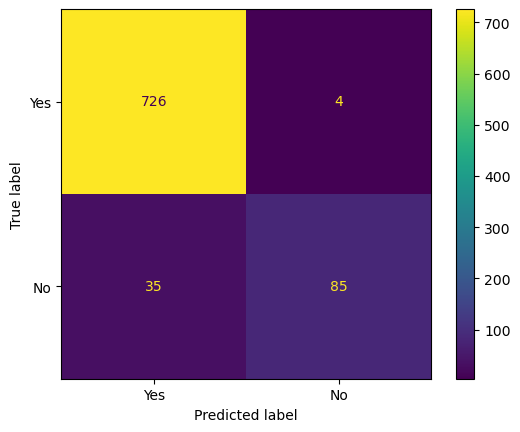

In [23]:
plot_confusion_matrix(new_model, x_test, y_test, values_format='d', display_labels=['Yes','No'])

In [24]:
y_pred = new_model.predict(x_test)

print_scores(y_test,y_pred)

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       730
           1       0.96      0.71      0.81       120

    accuracy                           0.95       850
   macro avg       0.95      0.85      0.89       850
weighted avg       0.95      0.95      0.95       850

